# Match Kitti Sequence version 22-11

Reads a sequence of stereo images as Frame. The Frames are scanned to identify FramePoints that are pixels that are at the top or botrom of vertical lines in the image. A patch is taken around each of the FramePoints in the left hand image, to match these to a patch in the right hand image and estimate the disparity/distance of the framePoint.

A Sequence is created in which the first Frame is the KeyFrame. It's initial FramePoints are culled to keep only the points for which there is a confident estimate of its depth. The consecutive frames are used to track the KeyFrame's remaining FramePoints. Only a limited number of all framePoints will be found in the consecutive frames, mostly because nearby objects become larger quickly as we get closer. The matching FramePoints are given the same FramePointId as the corresponding point in the KeyFrame and its depth is estimated.

The results are dumped into a folder 'dump', containing files 0.txt, 1.txt, etc. 0.txt contains the FramePoints as observed from the first frame, 1.txt form the second frame, etc. In these files, each row contains a single FramePoint with the values FramePointID, X, Y, Depth.

In [1]:
# when you change a setting you have to restart the kernel (settings are only loaded once)
import os
os.environ['STEREO_CONFIDENCE'] = '1.6'
os.environ['SEQUENCE_CONFIDENCE'] = '1.6'
#os.environ['PATCH_SIZE'] = '17'

import sys
sys.path.append('..')
from src.kitti import *
%matplotlib inline
import numpy as np
import glob

Read the frames for KITTI sequence 00.

In [2]:
%%time
SEQUENCE=7
LEFTDIR = '/data/urbinn/datasets/kitti/sequences/%02d/image_2'%SEQUENCE
RIGHTDIR = '/data/urbinn/datasets/kitti/sequences/%02d/image_3'%SEQUENCE

frame = []
for filename in sorted(glob.glob(LEFTDIR + '/*')):
    left_frame = Frame(filename, RIGHTDIR)
    frame.append(left_frame)

CPU times: user 2.06 ms, sys: 3.79 ms, total: 5.85 ms
Wall time: 5.24 ms


Turn the list of frames into a sequence. The first frame is automatically taken as the KeyFrame and its FramePoints are rerieved, depth is estimated, only the most confident points are kept, and they are tracked in the other frames.

In [3]:
seq = Sequence()
for f in ProgressBar()(frame[:]):
    seq.add_keyframe(f, run_ba=False)
    if f.get_previous_keyframe() is not None:
        v = f.get_pose() - f.get_previous_keyframe().get_pose()
        print(f.keyframeid, sum(sum(v* v)))

  0% (1 of 1101) |                        | Elapsed Time: 0:00:00 ETA:  0:10:27

connected mappoints  0
1 
 [[  9.99978673e-01  -3.51963893e-04   6.52148880e-03   6.32208525e-03]
 [  3.53057368e-04   9.99999924e-01  -1.66522225e-04  -1.62464561e-03]
 [ -6.52142969e-03   1.68821133e-04   9.99978721e-01  -9.24820226e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  0% (2 of 1101) |                        | Elapsed Time: 0:00:01 ETA:  0:12:32

connected mappoints  111
1 0.00868089725771
2 
 [[  9.99975903e-01  -6.95203842e-04   6.90725701e-03   9.33147954e-03]
 [  6.94578477e-04   9.99999754e-01   9.29358913e-05   1.89887833e-03]
 [ -6.90731992e-03  -8.81360198e-05   9.99976140e-01  -9.68139051e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  0% (3 of 1101) |                        | Elapsed Time: 0:00:02 ETA:  0:14:13

connected mappoints  134
2 4.0902420271e-05
3 
 [[  9.99973473e-01  -3.94808728e-04   7.27303829e-03   1.12348431e-02]
 [  3.89494846e-04   9.99999656e-01   7.32029463e-04   1.84029844e-03]
 [ -7.27332480e-03  -7.29177233e-04   9.99973283e-01  -9.91773606e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  0% (4 of 1101) |                        | Elapsed Time: 0:00:03 ETA:  0:15:07

connected mappoints  133
3 1.04826035381e-05
4 
 [[  9.99958419e-01  -7.88942010e-04   9.08507246e-03   1.15136282e-02]
 [  7.76800846e-04   9.99998801e-01   1.33983731e-03   1.37446771e-03]
 [ -9.08611861e-03  -1.33272430e-03   9.99957832e-01  -1.06775892e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  0% (5 of 1101) |                        | Elapsed Time: 0:00:04 ETA:  0:15:11

connected mappoints  147
4 6.56416066188e-05
5 
 [[  9.99940237e-01  -3.62893184e-04   1.09266285e-02   1.86181741e-02]
 [  3.45993039e-04   9.99998741e-01   1.54854405e-03   2.24293403e-03]
 [ -1.09271767e-02  -1.54467097e-03   9.99939104e-01  -1.14309702e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  0% (6 of 1101) |                        | Elapsed Time: 0:00:05 ETA:  0:15:25

connected mappoints  133
5 0.000115224192254
6 
 [[  9.99909614e-01   1.02676991e-04   1.34444775e-02   1.64504404e-02]
 [ -1.16995734e-04   9.99999427e-01   1.06424570e-03  -1.97181156e-03]
 [ -1.34443605e-02  -1.06572245e-03   9.99909053e-01  -1.30973904e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  0% (7 of 1101) |                        | Elapsed Time: 0:00:06 ETA:  0:15:54

connected mappoints  147
6 0.000313731446887
7 
 [[  9.99870969e-01   2.19831617e-04   1.60623110e-02   1.73573023e-02]
 [ -2.17994150e-04   9.99999969e-01  -1.16146965e-04   5.61170437e-04]
 [ -1.60623360e-02   1.12630489e-04   9.99870986e-01  -1.42455910e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  0% (8 of 1101) |                        | Elapsed Time: 0:00:07 ETA:  0:16:13

connected mappoints  150
7 0.000155590407851
8 
 [[  9.99832969e-01   1.33745166e-03   1.82276219e-02   2.31926259e-02]
 [ -1.34032613e-03   9.99999091e-01   1.45483310e-04   6.93181725e-04]
 [ -1.82274107e-02  -1.69889968e-04   9.99833853e-01  -1.62169143e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  0% (9 of 1101) |                        | Elapsed Time: 0:00:08 ETA:  0:16:39

connected mappoints  147
8 0.000434715917657
9 
 [[  9.99806321e-01   1.03596073e-03   1.96531597e-02   2.07168119e-02]
 [ -1.03569584e-03   9.99999463e-01  -2.36561436e-05   5.03806875e-03]
 [ -1.96531737e-02   3.29686603e-06   9.99806858e-01  -1.66668554e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  0% (10 of 1101) |                       | Elapsed Time: 0:00:09 ETA:  0:17:03

connected mappoints  145
9 4.9561096056e-05
10 
 [[  9.99760484e-01   2.68134295e-04   2.18838504e-02   2.78671853e-02]
 [ -2.75127384e-04   9.99999912e-01   3.16544629e-04   2.33515970e-03]
 [ -2.18837636e-02  -3.22489658e-04   9.99760470e-01  -1.77228208e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  0% (11 of 1101) |                       | Elapsed Time: 0:00:10 ETA:  0:18:10

connected mappoints  163
10 0.000181285499851
11 
 [[ 0.99971072 -0.00379492  0.02375015  0.03489811]
 [ 0.0037636   0.99999199  0.00136316  0.00454264]
 [-0.02375513 -0.00127338  0.999717   -0.18313689]
 [ 0.          0.          0.          1.        ]]


  1% (12 of 1101) |                       | Elapsed Time: 0:00:11 ETA:  0:18:51

connected mappoints  164
11 0.000131028174925
12 
 [[ 0.99966987 -0.00456882  0.02528385  0.03712841]
 [ 0.00452694  0.99998829  0.00171347  0.00327961]
 [-0.02529138 -0.00159844  0.99967884 -0.19262476]
 [ 0.          0.          0.          1.        ]]


  1% (13 of 1101) |                       | Elapsed Time: 0:00:12 ETA:  0:19:15

connected mappoints  155
12 0.00010271466852
13 
 [[ 0.99963427 -0.00262744  0.02691498  0.03584111]
 [ 0.00259674  0.99999594  0.00117543  0.00312862]
 [-0.02691796 -0.00110511  0.99963704 -0.19683768]
 [ 0.          0.          0.          1.        ]]


  1% (14 of 1101) |                       | Elapsed Time: 0:00:14 ETA:  0:19:41

connected mappoints  156
13 3.27654381756e-05
14 
 [[  9.99561663e-01  -1.18984839e-03   2.95815013e-02   3.55355753e-02]
 [  1.17144379e-03   9.99999109e-01   6.39488430e-04   1.30765315e-03]
 [ -2.95822359e-02  -6.04555053e-04   9.99562167e-01  -2.22434881e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  1% (15 of 1101) |                       | Elapsed Time: 0:00:15 ETA:  0:20:30

connected mappoints  166
14 0.000677481734599
15 
 [[  9.99509326e-01  -2.03955458e-03   3.12561561e-02   3.23101624e-02]
 [  2.04322309e-03   9.99997909e-01  -8.54301616e-05   4.69140073e-03]
 [ -3.12559165e-02   1.49251543e-04   9.99511403e-01  -2.15867510e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  1% (16 of 1101) |                       | Elapsed Time: 0:00:16 ETA:  0:21:07

connected mappoints  164
15 7.31701255729e-05
16 
 [[  9.99467794e-01  -1.39805908e-03   3.25910172e-02   3.59697629e-02]
 [  1.41025215e-03   9.99998944e-01  -3.51139697e-04  -3.39205285e-04]
 [ -3.25904918e-02   3.96914370e-04   9.99468710e-01  -2.18262851e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  1% (17 of 1101) |                       | Elapsed Time: 0:00:18 ETA:  0:21:37

connected mappoints  166
16 4.89479348358e-05
17 
 [[  9.99379898e-01  -1.98981863e-03   3.51548106e-02   3.49044404e-02]
 [  2.00698524e-03   9.99997883e-01  -4.53032887e-04   1.83597935e-03]
 [ -3.51538347e-02   5.23307146e-04   9.99381776e-01  -2.31783025e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  1% (18 of 1101) |                       | Elapsed Time: 0:00:19 ETA:  0:22:10

connected mappoints  148
17 0.000202553114967
18 
 [[  9.99371915e-01  -1.73799112e-03   3.53942762e-02   2.91268192e-02]
 [  1.71776071e-03   9.99998343e-01   6.01973898e-04  -1.34887871e-03]
 [ -3.53952638e-02  -5.40796910e-04   9.99373245e-01  -2.06479528e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  1% (19 of 1101) |                       | Elapsed Time: 0:00:20 ETA:  0:22:57

connected mappoints  180
18 0.000686299378882
19 
 [[  9.99356364e-01  -3.35292454e-03   3.57157503e-02   3.08363920e-02]
 [  3.34974042e-03   9.99994379e-01   1.48989634e-04   2.13189775e-03]
 [ -3.57160491e-02  -2.92552459e-05   9.99361978e-01  -2.17586271e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  1% (20 of 1101) |                       | Elapsed Time: 0:00:22 ETA:  0:23:59

connected mappoints  191
19 0.00014434306085
20 
 [[  9.99276702e-01  -1.00520591e-03   3.80139841e-02   3.08884249e-02]
 [  9.97828714e-04   9.99999479e-01   2.13037302e-04   2.47551968e-03]
 [ -3.80141785e-02  -1.74951768e-04   9.99277185e-01  -2.31616520e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  1% (21 of 1101) |                       | Elapsed Time: 0:00:24 ETA:  0:24:53

connected mappoints  198
20 0.000218614100111
21 
 [[  9.99145275e-01   4.50865776e-03   4.10900386e-02   1.89502870e-02]
 [ -4.58121434e-03   9.99988109e-01   1.67180478e-03  -1.90206576e-04]
 [ -4.10820124e-02  -1.85861812e-03   9.99154049e-01  -2.30891553e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  1% (22 of 1101) |                       | Elapsed Time: 0:00:26 ETA:  0:25:52

connected mappoints  202
21 0.000235548240006
22 
 [[  9.99048638e-01   4.48095760e-03   4.33790299e-02   2.21560118e-02]
 [ -4.52606022e-03   9.99989314e-01   9.41574286e-04   6.08244491e-03]
 [ -4.33743472e-02  -1.13701461e-03   9.99058243e-01  -2.33070003e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  2% (23 of 1101) |                       | Elapsed Time: 0:00:27 ETA:  0:26:44

connected mappoints  192
22 6.59390289267e-05
23 
 [[  9.98889354e-01  -5.97899048e-04   4.71137112e-02   3.24721131e-02]
 [  7.25717866e-04   9.99996103e-01  -2.69592712e-03   1.08523008e-02]
 [ -4.71119157e-02   2.72712416e-03   9.98885894e-01  -2.41402907e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  2% (24 of 1101) |                       | Elapsed Time: 0:00:29 ETA:  0:27:38

connected mappoints  154
23 0.000308122091256
24 
 [[ 0.99869113 -0.00470747  0.05093005  0.03853099]
 [ 0.00484678  0.99998484 -0.00261222  0.00883136]
 [-0.05091698  0.00285565  0.99869881 -0.24803871]
 [ 0.          0.          0.          1.        ]]


  2% (25 of 1101) |                       | Elapsed Time: 0:00:31 ETA:  0:28:26

connected mappoints  142
24 0.00014784073849
25 
 [[  9.98572896e-01  -3.75849832e-03   5.32732984e-02   4.14496768e-02]
 [  3.80948493e-03   9.99992378e-01  -8.55564243e-04   1.08477024e-02]
 [ -5.32696767e-02   1.05728709e-03   9.98579603e-01  -2.53218463e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  2% (26 of 1101) |                       | Elapsed Time: 0:00:33 ETA:  0:29:27

connected mappoints  152
25 5.87649607103e-05
26 
 [[  9.98464838e-01   5.10345868e-04   5.53868877e-02   3.37298864e-02]
 [ -5.52703822e-04   9.99999566e-01   7.49449672e-04   4.86200821e-03]
 [ -5.53864812e-02  -7.78911690e-04   9.98464687e-01  -2.73220080e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  2% (27 of 1101) |                       | Elapsed Time: 0:00:35 ETA:  0:30:20

connected mappoints  137
26 0.000547660835286
27 
 [[  9.98310941e-01   5.47744858e-03   5.78382482e-02   2.60141368e-02]
 [ -5.47221898e-03   9.99984996e-01  -2.48802914e-04   4.51362026e-03]
 [ -5.78387433e-02  -6.81208879e-05   9.98325936e-01  -2.80720257e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  2% (28 of 1101) |                       | Elapsed Time: 0:00:36 ETA:  0:31:10

connected mappoints  136
27 0.000178348204631
28 
 [[  9.98282704e-01   4.72614688e-03   5.83892634e-02   3.06707941e-02]
 [ -4.74043354e-03   9.99988758e-01   1.06167873e-04   2.75015862e-03]
 [ -5.83881053e-02  -3.82775974e-04   9.98293886e-01  -2.99793965e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  2% (29 of 1101) |                       | Elapsed Time: 0:00:38 ETA:  0:31:33

connected mappoints  124
28 0.000390532808662
29 
 [[ 0.9983214   0.00207513  0.05787987  0.03659965]
 [-0.0019933   0.99999693 -0.00147143  0.00352558]
 [-0.05788275  0.00135359  0.99832247 -0.30896241]
 [ 0.          0.          0.          1.        ]]


  2% (30 of 1101) |                       | Elapsed Time: 0:00:40 ETA:  0:31:14

connected mappoints  95
29 0.000140408697249
30 
 [[  9.98250132e-01   1.40356398e-03   5.91160281e-02   4.06423904e-02]
 [ -1.29186241e-03   9.99997308e-01  -1.92770699e-03   9.83846125e-04]
 [ -5.91185746e-02   1.84796399e-03   9.98249257e-01  -3.18843044e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  2% (31 of 1101) |                       | Elapsed Time: 0:00:41 ETA:  0:30:36

connected mappoints  111
30 0.000124892443371
31 
 [[ 0.99817951  0.00132468  0.06029852  0.04253711]
 [-0.00123552  0.99999809 -0.00151582  0.0034299 ]
 [-0.06030041  0.00143856  0.99817924 -0.32977968]
 [ 0.          0.          0.          1.        ]]


  2% (32 of 1101) |                       | Elapsed Time: 0:00:42 ETA:  0:29:43

connected mappoints  119
31 0.000132334643028
32 
 [[  9.98203251e-01  -1.47537438e-04   5.99186787e-02   4.45727640e-02]
 [  2.28936469e-04   9.99999060e-01  -1.35162908e-03  -1.06492840e-03]
 [ -5.99184229e-02   1.36291812e-03   9.98202347e-01  -3.41111397e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  2% (33 of 1101) |                       | Elapsed Time: 0:00:43 ETA:  0:28:29

connected mappoints  96
32 0.000157391235266
33 
 [[  9.98196458e-01  -2.65914589e-04   6.00313216e-02   4.13000053e-02]
 [  3.87061685e-04   9.99997912e-01  -2.00644541e-03  -1.10796468e-03]
 [ -6.00306627e-02   2.02606253e-03   9.98194477e-01  -3.57157641e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  3% (34 of 1101) |                       | Elapsed Time: 0:00:44 ETA:  0:27:08

connected mappoints  117
33 0.000269127729994
34 
 [[  9.98252889e-01  -1.09296829e-03   5.90760148e-02   4.29848257e-02]
 [  1.17559506e-03   9.99998379e-01  -1.36391459e-03  -3.58382156e-04]
 [ -5.90744283e-02   1.43098115e-03   9.98252555e-01  -3.58944673e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  3% (35 of 1101) |                       | Elapsed Time: 0:00:45 ETA:  0:25:37

connected mappoints  139
34 1.05002989777e-05
35 
 [[ 0.99834888  0.00145629  0.05742293  0.04508672]
 [-0.00124304  0.9999922  -0.0037492   0.00680435]
 [-0.05742794  0.00367163  0.9983429  -0.37561178]
 [ 0.          0.          0.          1.        ]]


  3% (36 of 1101) |                       | Elapsed Time: 0:00:46 ETA:  0:24:01

connected mappoints  114
35 0.00036203490638
36 
 [[ 0.99848267  0.00311869  0.05497844  0.03805251]
 [-0.00295501  0.99999096 -0.00305809  0.01038093]
 [-0.05498748  0.00289099  0.99848286 -0.38600156]
 [ 0.          0.          0.          1.        ]]


  3% (37 of 1101) |                       | Elapsed Time: 0:00:47 ETA:  0:22:11

connected mappoints  112
36 0.000188969678791
37 
 [[  9.98706065e-01   5.63496245e-04   5.08515298e-02   5.13600254e-02]
 [ -5.29413385e-04   9.99999626e-01  -6.83709528e-04   9.05382963e-03]
 [ -5.08518961e-02   6.55903371e-04   9.98705990e-01  -3.66850584e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  3% (38 of 1101) |                       | Elapsed Time: 0:00:48 ETA:  0:20:13

connected mappoints  81
37 0.000602890973839
38 
 [[  9.98873711e-01  -3.24918894e-03   4.73365745e-02   4.14560554e-02]
 [  3.27689531e-03   9.99994502e-01  -5.07715375e-04   8.51783767e-03]
 [ -4.73346645e-02   6.62260541e-04   9.98878867e-01  -4.16915625e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  3% (39 of 1101) |                       | Elapsed Time: 0:00:48 ETA:  0:18:12

connected mappoints  85
38 0.00265872366087
39 
 [[  9.99118289e-01  -3.45360944e-03   4.18415807e-02   4.49588663e-02]
 [  3.45762349e-03   9.99994022e-01  -2.35668789e-05   4.16696440e-03]
 [ -4.18412492e-02   1.68218532e-04   9.99124257e-01  -4.15792897e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  3% (40 of 1101) |                       | Elapsed Time: 0:00:49 ETA:  0:16:31

connected mappoints  83
39 9.3505830458e-05
40 
 [[ 0.99929934 -0.00214635  0.03736608  0.03738036]
 [ 0.00209207  0.9999967   0.00149173  0.00244993]
 [-0.03736916 -0.00141251  0.99930053 -0.45097719]
 [ 0.          0.          0.          1.        ]]


  3% (41 of 1101) |                       | Elapsed Time: 0:00:50 ETA:  0:15:12

connected mappoints  91
40 0.00134677872735
41 
 [[  9.99426140e-01   1.25572828e-04   3.38729101e-02   3.33708840e-02]
 [ -2.16463611e-04   9.99996386e-01   2.67963446e-03   4.24839543e-03]
 [ -3.38724513e-02  -2.68542898e-03   9.99422556e-01  -4.69590115e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  3% (42 of 1101) |                       | Elapsed Time: 0:00:50 ETA:  0:14:03

connected mappoints  84
41 0.000403733797864
42 
 [[  9.99529354e-01  -9.36738439e-04   3.06625754e-02   3.26243980e-02]
 [  8.48412618e-04   9.99995454e-01   2.89345772e-03   4.34547548e-03]
 [ -3.06651464e-02  -2.86608141e-03   9.99525605e-01  -4.84014722e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  3% (43 of 1101) |                       | Elapsed Time: 0:00:51 ETA:  0:13:30

connected mappoints  101
42 0.000231591098496
43 
 [[ 0.99965988 -0.00105701  0.02605762  0.02782214]
 [ 0.00100906  0.99999777  0.00185312  0.00527645]
 [-0.02605952 -0.0018262   0.99965873 -0.5035391 ]
 [ 0.          0.          0.          1.        ]]


  3% (44 of 1101) |                       | Elapsed Time: 0:00:52 ETA:  0:12:56

connected mappoints  95
43 0.000449786023655
44 
 [[  9.99789107e-01  -7.33837503e-04   2.05232161e-02   2.19945817e-02]
 [  6.85640095e-04   9.99996991e-01   2.35537143e-03   8.22303132e-04]
 [ -2.05248828e-02  -2.34080316e-03   9.99786602e-01  -5.23708343e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  4% (45 of 1101) |                       | Elapsed Time: 0:00:52 ETA:  0:12:26

connected mappoints  91
44 0.000522619002746
45 
 [[  9.99871821e-01   5.70883028e-04   1.60005173e-02   1.76726628e-02]
 [ -5.83557648e-04   9.99999520e-01   7.87480442e-04  -2.69786529e-04]
 [ -1.60000600e-02  -7.96716727e-04   9.99871673e-01  -5.37659716e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  4% (46 of 1101) |                       | Elapsed Time: 0:00:53 ETA:  0:12:04

connected mappoints  96
45 0.000263610998228
46 
 [[  9.99918806e-01  -1.10966257e-03   1.26945000e-02   1.71018713e-02]
 [  1.11878332e-03   9.99999121e-01  -7.11401890e-04   1.70648481e-02]
 [ -1.26936995e-02   7.25546524e-04   9.99919169e-01  -5.45459459e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  4% (47 of 1101) |                       | Elapsed Time: 0:00:54 ETA:  0:11:47

connected mappoints  97
46 0.000393803726657
47 
 [[  9.99954107e-01   2.39648294e-04   9.57734791e-03   1.71066301e-02]
 [ -2.29424750e-04   9.99999403e-01  -1.06855572e-03   1.16489975e-03]
 [ -9.57759826e-03   1.06630940e-03   9.99953565e-01  -5.63691124e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  4% (48 of 1101) |#                      | Elapsed Time: 0:00:54 ETA:  0:11:40

connected mappoints  102
47 0.000608513100222
48 
 [[ 0.99997586 -0.00178153  0.00671622  0.01507671]
 [ 0.00179124  0.99999736 -0.00144012  0.01141935]
 [-0.00671364  0.00145212  0.99997641 -0.58819703]
 [ 0.          0.          0.          1.        ]]


  4% (49 of 1101) |#                      | Elapsed Time: 0:00:55 ETA:  0:11:43

connected mappoints  95
48 0.000734658402988
49 
 [[  9.99990271e-01   9.67242248e-05   4.40995241e-03   1.22669805e-02]
 [ -9.26151614e-05   9.99999561e-01  -9.31965175e-04   9.66745566e-03]
 [ -4.41004062e-03   9.31547680e-04   9.99989842e-01  -6.12727524e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  4% (50 of 1101) |#                      | Elapsed Time: 0:00:56 ETA:  0:11:50

connected mappoints  93
49 0.000630940450935
50 
 [[  9.99996057e-01   2.39098174e-03   1.47287016e-03   5.85588775e-03]
 [ -2.39045921e-03   9.99997079e-01  -3.56425792e-04  -2.27409048e-03]
 [ -1.47371807e-03   3.52903551e-04   9.99998852e-01  -6.29191565e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  4% (51 of 1101) |#                      | Elapsed Time: 0:00:57 ETA:  0:12:07

connected mappoints  102
50 0.000483225638909
51 
 [[  9.99997870e-01   1.91532893e-03  -7.68667185e-04   5.09444294e-03]
 [ -1.91681063e-03   9.99996298e-01  -1.93152974e-03   8.36814275e-03]
 [  7.64964824e-04   1.93299902e-03   9.99997839e-01  -6.37000940e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  4% (52 of 1101) |#                      | Elapsed Time: 0:00:57 ETA:  0:12:31

connected mappoints  114
51 0.000190287695504
52 
 [[  9.99998759e-01  -6.17525804e-04  -1.44906792e-03   6.07671290e-03]
 [  6.14044904e-04   9.99996928e-01  -2.40138134e-03   1.01002228e-02]
 [  1.45054638e-03   2.40048857e-03   9.99996067e-01  -6.58507644e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  4% (53 of 1101) |#                      | Elapsed Time: 0:00:58 ETA:  0:12:48

connected mappoints  136
52 0.000480696160598
53 
 [[  9.99997196e-01  -1.75933641e-03  -1.58538959e-03   1.01378798e-02]
 [  1.75913887e-03   9.99998445e-01  -1.25982818e-04   1.13647690e-02]
 [  1.58560877e-03   1.23193544e-04   9.99998735e-01  -6.67386952e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  4% (54 of 1101) |#                      | Elapsed Time: 0:00:59 ETA:  0:13:16

connected mappoints  128
53 0.000109949580655
54 
 [[ 0.99999729 -0.00166049 -0.00162892  0.01286676]
 [ 0.00166412  0.99999614  0.0022261   0.00819208]
 [ 0.00162521 -0.00222881  0.9999962  -0.68564638]
 [ 0.          0.          0.          1.        ]]


  4% (55 of 1101) |#                      | Elapsed Time: 0:01:00 ETA:  0:13:39

connected mappoints  119
54 0.000362005856521
55 
 [[  9.99999094e-01   3.01454200e-04  -1.31191905e-03   7.62748839e-03]
 [ -3.01323970e-04   9.99999950e-01   9.94633597e-05   2.43507982e-03]
 [  1.31194896e-03  -9.90679570e-05   9.99999134e-01  -7.00841915e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  5% (56 of 1101) |#                      | Elapsed Time: 0:01:01 ETA:  0:13:52

connected mappoints  97
55 0.000308466577913
56 
 [[  9.99998664e-01   8.19471180e-06  -1.63470829e-03   2.30697298e-03]
 [ -1.23402353e-05   9.99996784e-01  -2.53594689e-03   2.80040449e-03]
 [  1.63468225e-03   2.53596367e-03   9.99995448e-01  -7.21438077e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  5% (57 of 1101) |#                      | Elapsed Time: 0:01:02 ETA:  0:14:00

connected mappoints  96
56 0.000466909904851
57 
 [[  9.99998143e-01  -5.83942339e-04  -1.83671728e-03   9.77878442e-03]
 [  5.77041553e-04   9.99992782e-01  -3.75541900e-03   1.65953221e-02]
 [  1.83889697e-03   3.75435216e-03   9.99991262e-01  -7.36823866e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  5% (58 of 1101) |#                      | Elapsed Time: 0:01:03 ETA:  0:14:05

connected mappoints  101
57 0.000486602340114
58 
 [[  9.99998673e-01   2.23516270e-04  -1.61400742e-03   2.92459919e-03]
 [ -2.27008003e-04   9.99997634e-01  -2.16353467e-03   1.43654794e-02]
 [  1.61352002e-03   2.16389819e-03   9.99996357e-01  -7.39349662e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  5% (59 of 1101) |#                      | Elapsed Time: 0:01:03 ETA:  0:14:06

connected mappoints  95
58 6.47942659258e-05
59 
 [[  9.99995527e-01  -2.38373891e-03  -1.80633681e-03   1.26505980e-02]
 [  2.38431660e-03   9.99997107e-01   3.17731491e-04   1.32191093e-02]
 [  1.80557420e-03  -3.22036949e-04   9.99998318e-01  -7.67994545e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  5% (60 of 1101) |#                      | Elapsed Time: 0:01:04 ETA:  0:14:19

connected mappoints  113
59 0.000942465827214
60 
 [[ 0.99999528 -0.00244897 -0.00185643  0.01727247]
 [ 0.0024544   0.9999927   0.00292733  0.00669681]
 [ 0.00184925 -0.00293187  0.99999399 -0.77412154]
 [ 0.          0.          0.          1.        ]]


  5% (61 of 1101) |#                      | Elapsed Time: 0:01:05 ETA:  0:14:18

connected mappoints  101
60 0.000115077073946
61 
 [[  9.99997826e-01  -1.36916539e-03  -1.57240263e-03   1.08735928e-02]
 [  1.37001708e-03   9.99998915e-01   5.40697838e-04   8.91410153e-03]
 [  1.57166062e-03  -5.42850881e-04   9.99998618e-01  -7.89121641e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  5% (62 of 1101) |#                      | Elapsed Time: 0:01:06 ETA:  0:14:05

connected mappoints  96
61 0.000284768053464
62 
 [[ 0.9999949   0.00289142 -0.00135511  0.00569739]
 [-0.0028947   0.99999287 -0.00242407  0.0202962 ]
 [ 0.00134809  0.00242798  0.99999614 -0.78071483]
 [ 0.          0.          0.          1.        ]]


  5% (63 of 1101) |#                      | Elapsed Time: 0:01:06 ETA:  0:13:53

connected mappoints  120
62 0.000281073034162
63 
 [[  9.99997148e-01   2.20775934e-03  -9.11431859e-04   2.38512802e-03]
 [ -2.20966917e-03   9.99995354e-01  -2.09974851e-03   1.71632407e-02]
 [  9.06791885e-04   2.10175648e-03   9.99997380e-01  -7.95795587e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  5% (64 of 1101) |#                      | Elapsed Time: 0:01:07 ETA:  0:13:33

connected mappoints  98
63 0.000249755593626
64 
 [[  9.99998465e-01   1.44055573e-03  -9.97497059e-04   8.26532505e-03]
 [ -1.44228869e-03   9.99997448e-01  -1.73878121e-03   1.89365252e-02]
 [  9.94989703e-04   1.74021722e-03   9.99997991e-01  -8.19063179e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  5% (65 of 1101) |#                      | Elapsed Time: 0:01:08 ETA:  0:13:18

connected mappoints  98
64 0.00058055581061
65 
 [[  9.99999799e-01   1.37412541e-04  -6.19581927e-04   1.04364882e-02]
 [ -1.34529844e-04   9.99989178e-01   4.65029317e-03   1.41188681e-02]
 [  6.20214230e-04  -4.65020888e-03   9.99988995e-01  -8.18884679e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  5% (66 of 1101) |#                      | Elapsed Time: 0:01:09 ETA:  0:13:23

connected mappoints  126
65 0.000113305291623
66 
 [[  9.99998277e-01   1.85318990e-03  -1.04509603e-04   6.27865578e-03]
 [ -1.85241031e-03   9.99973627e-01   7.02234393e-03   6.08964342e-03]
 [  1.17520583e-04  -7.02213824e-03   9.99975338e-01  -8.22456237e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  6% (67 of 1101) |#                      | Elapsed Time: 0:01:10 ETA:  0:13:38

connected mappoints  129
66 0.000112178155517
67 
 [[  9.99995265e-01   3.06897024e-03   2.24935715e-04   4.78244949e-03]
 [ -3.07000928e-03   9.99983890e-01   4.77444910e-03   4.60062764e-03]
 [ -2.10279449e-04  -4.77511705e-03   9.99988577e-01  -8.41764403e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  6% (68 of 1101) |#                      | Elapsed Time: 0:01:11 ETA:  0:13:54

connected mappoints  134
67 0.000390540184292
68 
 [[  9.99999434e-01   8.85462659e-04   5.89269947e-04   5.87040439e-03]
 [ -8.84886912e-04   9.99999132e-01  -9.76595857e-04   1.29198113e-02]
 [ -5.90134174e-04   9.76073868e-04   9.99999350e-01  -8.45518128e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  6% (69 of 1101) |#                      | Elapsed Time: 0:01:11 ETA:  0:14:08

connected mappoints  110
68 0.000160453486471
69 
 [[  9.99999913e-01  -4.03238859e-04   1.09509318e-04   9.16188650e-03]
 [  4.04032408e-04   9.99972938e-01  -7.34573567e-03   1.81360210e-02]
 [ -1.06544268e-04   7.34577927e-03   9.99973014e-01  -8.63191115e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  6% (70 of 1101) |#                      | Elapsed Time: 0:01:12 ETA:  0:14:10

connected mappoints  121
69 0.00043530373716
70 
 [[  9.99997857e-01  -2.05693687e-03   2.32452478e-04   1.56042557e-02]
 [  2.05850104e-03   9.99973785e-01  -6.94198428e-03   1.82147985e-02]
 [ -2.18167161e-04   6.94244791e-03   9.99975877e-01  -8.74453789e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  6% (71 of 1101) |#                      | Elapsed Time: 0:01:13 ETA:  0:14:14

connected mappoints  122
70 0.000174183419409
71 
 [[  9.99997961e-01  -1.98694237e-03   3.61880920e-04   1.00275131e-02]
 [  1.98891324e-03   9.99982733e-01  -5.52978212e-03   2.55533356e-02]
 [ -3.50887313e-04   5.53049059e-03   9.99984645e-01  -8.59948373e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  6% (72 of 1101) |#                      | Elapsed Time: 0:01:14 ETA:  0:14:29

connected mappoints  115
71 0.000299393477641
72 
 [[  9.99998954e-01  -1.35310743e-03   5.10605571e-04   1.35689031e-02]
 [  1.35339145e-03   9.99998929e-01  -5.56312586e-04   2.04987438e-02]
 [ -5.09852274e-04   5.57003053e-04   9.99999715e-01  -8.72101185e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  6% (73 of 1101) |#                      | Elapsed Time: 0:01:15 ETA:  0:14:46

connected mappoints  124
72 0.000236105652087
73 
 [[  9.99999891e-01  -1.54014382e-04   4.40626019e-04   1.13525956e-02]
 [  1.52459301e-04   9.99993768e-01   3.52711286e-03   1.36437581e-02]
 [ -4.41166499e-04  -3.52704530e-03   9.99993683e-01  -8.58715652e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  6% (74 of 1101) |#                      | Elapsed Time: 0:01:16 ETA:  0:15:04

connected mappoints  131
73 0.000267318894339
74 
 [[  9.99999867e-01  -3.04742271e-04   4.16465749e-04   1.10161147e-02]
 [  3.03632434e-04   9.99996410e-01   2.66236568e-03   1.24199644e-02]
 [ -4.17275590e-04  -2.66223887e-03   9.99996369e-01  -8.55938264e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  6% (75 of 1101) |#                      | Elapsed Time: 0:01:17 ETA:  0:15:23

connected mappoints  129
74 1.08671894992e-05
75 
 [[  9.99998950e-01  -1.43260992e-03   2.16661655e-04   1.13361563e-02]
 [  1.43289059e-03   9.99998127e-01  -1.30088549e-03   1.51366861e-02]
 [ -2.14797588e-04   1.30119457e-03   9.99999130e-01  -8.53058367e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  6% (76 of 1101) |#                      | Elapsed Time: 0:01:18 ETA:  0:15:31

connected mappoints  127
75 4.9821218183e-05
76 
 [[  9.99999182e-01  -1.27902131e-03   2.85804786e-05   7.44699743e-03]
 [  1.27908213e-03   9.99996672e-01  -2.24034029e-03   1.92049629e-02]
 [ -2.57149406e-05   2.24037502e-03   9.99997490e-01  -8.58578233e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  6% (77 of 1101) |#                      | Elapsed Time: 0:01:19 ETA:  0:15:46

connected mappoints  119
76 6.40283674001e-05
77 
 [[  9.99999899e-01  -9.28247831e-05   4.40167244e-04  -6.25860658e-04]
 [  9.21229857e-05   9.99998725e-01   1.59414031e-03   1.83727726e-02]
 [ -4.40314659e-04  -1.59409960e-03   9.99998632e-01  -8.50975118e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  7% (78 of 1101) |#                      | Elapsed Time: 0:01:20 ETA:  0:15:52

connected mappoints  105
77 0.000156234610514
78 
 [[  9.99999869e-01  -5.12196839e-04  -2.39469000e-05  -2.27948996e-03]
 [  5.12312700e-04   9.99986770e-01   5.11840438e-03   9.57417879e-03]
 [  2.13249526e-05  -5.11841598e-03   9.99986901e-01  -8.30854242e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  7% (79 of 1101) |#                      | Elapsed Time: 0:01:21 ETA:  0:16:04

connected mappoints  128
78 0.000510621865512
79 
 [[  9.99999648e-01  -8.30030626e-04  -1.23062643e-04   1.36190972e-02]
 [  8.30531303e-04   9.99991144e-01   4.12583101e-03   9.04883734e-03]
 [  1.19636987e-04  -4.12593177e-03   9.99991481e-01  -8.61543012e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  7% (80 of 1101) |#                      | Elapsed Time: 0:01:22 ETA:  0:16:30

connected mappoints  140
79 0.00119703372538
80 
 [[  9.99999862e-01   2.84146026e-04  -4.41941773e-04   1.23079565e-02]
 [ -2.84426415e-04   9.99999758e-01  -6.34513892e-04   1.02305661e-02]
 [  4.41761372e-04   6.34639504e-04   9.99999701e-01  -8.51564880e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  7% (81 of 1101) |#                      | Elapsed Time: 0:01:23 ETA:  0:17:12

connected mappoints  151
80 0.000150692721949
81 
 [[  9.99999438e-01   8.12410828e-04  -6.80838324e-04   1.53270744e-02]
 [ -8.14010876e-04   9.99996900e-01  -2.35314195e-03   2.01872036e-02]
 [  6.78924495e-04   2.35369483e-03   9.99997000e-01  -8.59001783e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  7% (82 of 1101) |#                      | Elapsed Time: 0:01:24 ETA:  0:17:38

connected mappoints  147
81 0.000170138923451
82 
 [[  9.99999769e-01   1.64468959e-04  -6.59255239e-04   2.41730331e-02]
 [ -1.67690228e-04   9.99988034e-01  -4.88915020e-03   2.32147389e-02]
 [  6.58443237e-04   4.88925962e-03   9.99987831e-01  -8.71511281e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  7% (83 of 1101) |#                      | Elapsed Time: 0:01:26 ETA:  0:17:59

connected mappoints  149
82 0.000257603531902
83 
 [[  9.99999123e-01   1.16890584e-03  -6.22620334e-04   1.86567963e-02]
 [ -1.17236907e-03   9.99983681e-01  -5.59132877e-03   2.21893175e-02]
 [  6.16074436e-04   5.59205381e-03   9.99984175e-01  -8.73091559e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  7% (84 of 1101) |#                      | Elapsed Time: 0:01:27 ETA:  0:18:26

connected mappoints  151
83 3.69860536235e-05
84 
 [[  9.99999997e-01  -7.08376937e-05  -3.50029722e-05   2.13971086e-02]
 [  7.07348220e-05   9.99995704e-01  -2.93025488e-03   1.80494862e-02]
 [  3.52103943e-05   2.93025240e-03   9.99995706e-01  -8.78375011e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  7% (85 of 1101) |#                      | Elapsed Time: 0:01:28 ETA:  0:18:43

connected mappoints  170
84 7.04941261698e-05
85 
 [[  9.99999876e-01   4.70266778e-04  -1.63418922e-04   1.23217276e-02]
 [ -4.70257986e-04   9.99999888e-01   5.38391178e-05   1.92420257e-02]
 [  1.63444223e-04  -5.37622621e-05   9.99999985e-01  -8.63693890e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  7% (86 of 1101) |#                      | Elapsed Time: 0:01:29 ETA:  0:18:41

connected mappoints  149
85 0.000317747615415
86 
 [[  9.99999893e-01  -4.61029026e-04  -4.02575748e-05   9.14087966e-03]
 [  4.61196300e-04   9.99990824e-01   4.25895053e-03   1.76989189e-02]
 [  3.82937056e-05  -4.25896864e-03   9.99990930e-01  -8.48638311e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  7% (87 of 1101) |#                      | Elapsed Time: 0:01:30 ETA:  0:18:46

connected mappoints  108
86 0.00027630206561
87 
 [[  9.99999544e-01  -8.69542452e-04  -3.95486528e-04   1.67693263e-02]
 [  8.71174878e-04   9.99991024e-01   4.14637122e-03   1.60655212e-02]
 [  3.91877533e-04  -4.14671387e-03   9.99991326e-01  -8.63979910e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  7% (88 of 1101) |#                      | Elapsed Time: 0:01:31 ETA:  0:19:00

connected mappoints  101
87 0.00029683730484
88 
 [[ 0.99998981 -0.00314121  0.00324305 -0.03965684]
 [ 0.00313048  0.99998963  0.00330676  0.00128208]
 [-0.0032534  -0.00329657  0.99998927 -0.81495153]
 [ 0.          0.          0.          1.        ]]


  8% (89 of 1101) |#                      | Elapsed Time: 0:01:32 ETA:  0:19:09

connected mappoints  123
88 0.00584446374504
89 
 [[  9.99994650e-01  -3.23698967e-03   4.70193036e-04   1.89031262e-02]
 [  3.23627444e-03   9.99993617e-01   1.51400059e-03   1.71425844e-02]
 [ -4.75090839e-04  -1.51247082e-03   9.99998743e-01  -8.62975405e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  8% (90 of 1101) |#                      | Elapsed Time: 0:01:33 ETA:  0:19:10

connected mappoints  129
89 0.00600894261723
90 
 [[  9.99997659e-01   2.05803912e-03   6.67548554e-04   1.48795067e-02]
 [ -2.05934772e-03   9.99995948e-01   1.96557911e-03   1.86058720e-02]
 [ -6.63500610e-04  -1.96694922e-03   9.99997845e-01  -8.62365304e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  8% (91 of 1101) |#                      | Elapsed Time: 0:01:35 ETA:  0:18:56

connected mappoints  147
90 7.52688284778e-05
91 
 [[ 0.99999162  0.00385865  0.0013695   0.00700007]
 [-0.00386381  0.99998538  0.0037833   0.0152001 ]
 [-0.00135488 -0.00378856  0.99999191 -0.85652376]
 [ 0.          0.          0.          1.        ]]


  8% (92 of 1101) |#                      | Elapsed Time: 0:01:36 ETA:  0:18:51

connected mappoints  116
91 0.000121899970366
92 
 [[  9.99991219e-01   4.11790323e-03   7.77987474e-04   1.01968425e-02]
 [ -4.11939889e-03   9.99989651e-01   1.93075693e-03   7.96002429e-03]
 [ -7.70028753e-04  -1.93394481e-03   9.99997833e-01  -8.51895988e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  8% (93 of 1101) |#                      | Elapsed Time: 0:01:37 ETA:  0:18:43

connected mappoints  124
92 9.1750319213e-05
93 
 [[  9.99998279e-01   3.22794697e-04   1.82675932e-03   1.48633085e-02]
 [ -3.16764826e-04   9.99994504e-01  -3.30018375e-03   1.52450889e-02]
 [ -1.82781456e-03   3.29959941e-03   9.99992886e-01  -8.58306867e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  8% (94 of 1101) |#                      | Elapsed Time: 0:01:38 ETA:  0:18:29

connected mappoints  138
93 0.000201781971936
94 
 [[ 0.9999955   0.00245026  0.00173159  0.00974802]
 [-0.00243984  0.99997904 -0.00599664  0.02345483]
 [-0.00174625  0.00599239  0.99998052 -0.84981068]
 [ 0.          0.          0.          1.        ]]


  8% (95 of 1101) |#                      | Elapsed Time: 0:01:39 ETA:  0:18:14

connected mappoints  138
94 0.000189322964354
95 
 [[ 0.99999633  0.00189093  0.00193767  0.00926907]
 [-0.00188401  0.99999185 -0.00356956  0.02140673]
 [-0.00194441  0.0035659   0.99999175 -0.84674329]
 [ 0.          0.          0.          1.        ]]


  8% (96 of 1101) |##                     | Elapsed Time: 0:01:40 ETA:  0:18:18

connected mappoints  122
95 2.63154276598e-05
96 
 [[  9.99998851e-01  -3.41986598e-04   1.47709463e-03   1.02389170e-02]
 [  3.40540286e-04   9.99999463e-01   9.79300698e-04   1.94353706e-02]
 [ -1.47742875e-03  -9.78796562e-04   9.99998430e-01  -8.33223385e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  8% (97 of 1101) |##                     | Elapsed Time: 0:01:41 ETA:  0:18:04

connected mappoints  124
96 0.000239325955397
97 
 [[  9.99993355e-01  -3.51209893e-03   9.76825272e-04   1.53548616e-02]
 [  3.50878085e-03   9.99988139e-01   3.37802728e-03   1.93560095e-02]
 [ -9.88677652e-04  -3.37457737e-03   9.99993817e-01  -8.25045585e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  8% (98 of 1101) |##                     | Elapsed Time: 0:01:42 ETA:  0:17:55

connected mappoints  119
97 0.000125125946422
98 
 [[ 0.99998809 -0.00471753  0.00125237  0.01769501]
 [ 0.00471337  0.99998344  0.00330324  0.01339029]
 [-0.00126793 -0.0032973   0.99999376 -0.81789735]
 [ 0.          0.          0.          1.        ]]


  8% (99 of 1101) |##                     | Elapsed Time: 0:01:43 ETA:  0:17:48

connected mappoints  128
98 9.52330612124e-05
99 
 [[ 0.99998971 -0.0043918   0.00113912  0.0187087 ]
 [ 0.00439045  0.99998966  0.00118832  0.01132434]
 [-0.00114433 -0.00118331  0.99999865 -0.82014398]
 [ 0.          0.          0.          1.        ]]


  9% (100 of 1101) |#                     | Elapsed Time: 0:01:44 ETA:  0:17:38

connected mappoints  112
99 1.95233971538e-05
100 
 [[  9.99997697e-01  -1.94216342e-03   9.13560995e-04   1.49450836e-02]
 [  1.94331717e-03   9.99997313e-01  -1.26373343e-03   1.71947509e-02]
 [ -9.11104164e-04   1.26550585e-03   9.99998784e-01  -8.16973659e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  9% (101 of 1101) |##                    | Elapsed Time: 0:01:45 ETA:  0:17:40

connected mappoints  129
100 8.27812972645e-05
101 
 [[  9.99999628e-01  -1.59123156e-04   8.47715135e-04   1.33628581e-02]
 [  1.60425912e-04   9.99998806e-01  -1.53693799e-03   2.11767956e-02]
 [ -8.47469561e-04   1.53707341e-03   9.99998460e-01  -8.09194501e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  9% (102 of 1101) |##                    | Elapsed Time: 0:01:46 ETA:  0:17:45

connected mappoints  127
101 8.5390124992e-05
102 
 [[  9.99997979e-01  -1.81329858e-03   8.68523116e-04   1.78349136e-02]
 [  1.81301742e-03   9.99998304e-01   3.24401978e-04   1.75719592e-02]
 [ -8.69109881e-04  -3.22826675e-04   9.99999570e-01  -8.01953054e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  9% (103 of 1101) |##                    | Elapsed Time: 0:01:48 ETA:  0:17:59

connected mappoints  113
102 9.78247537845e-05
103 
 [[  9.99999748e-01  -5.25037158e-04   4.77022519e-04   1.63232933e-02]
 [  5.25057908e-04   9.99999861e-01  -4.33752761e-05   1.93967755e-02]
 [ -4.76999679e-04   4.36257296e-05   9.99999885e-01  -8.01946387e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  9% (104 of 1101) |##                    | Elapsed Time: 0:01:49 ETA:  0:18:12

connected mappoints  111
103 9.51002862842e-06
104 
 [[  9.99999444e-01   9.05690669e-04   5.39671533e-04   1.10158661e-02]
 [ -9.04762116e-04   9.99998114e-01  -1.71835545e-03   1.68664753e-02]
 [ -5.41226814e-04   1.71786622e-03   9.99998378e-01  -7.93153159e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  9% (105 of 1101) |##                    | Elapsed Time: 0:01:50 ETA:  0:18:28

connected mappoints  89
104 0.000121600116942
105 
 [[  9.99999355e-01   9.85831136e-04   5.64445550e-04   2.32998779e-03]
 [ -9.84306003e-04   9.99995882e-01  -2.69593510e-03   1.83210887e-02]
 [ -5.67100962e-04   2.69537777e-03   9.99996207e-01  -8.13237440e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  9% (106 of 1101) |##                    | Elapsed Time: 0:01:51 ETA:  0:18:36

connected mappoints  109
105 0.000482863945074
106 
 [[  9.99999887e-01   2.51024640e-04   4.04943321e-04   4.14215302e-03]
 [ -2.49335822e-04   9.99991295e-01  -4.16517716e-03   2.09716969e-02]
 [ -4.05985358e-04   4.16507572e-03   9.99991244e-01  -7.99354750e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  9% (107 of 1101) |##                    | Elapsed Time: 0:01:52 ETA:  0:18:54

connected mappoints  119
106 0.00020848900752
107 
 [[  9.99999503e-01   2.34952572e-04   9.69418938e-04   5.12853518e-03]
 [ -2.33022639e-04   9.99997992e-01  -1.99044715e-03   2.03542382e-02]
 [ -9.69884652e-04   1.99022027e-03   9.99997549e-01  -7.89293808e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  9% (108 of 1101) |##                    | Elapsed Time: 0:01:54 ETA:  0:19:24

connected mappoints  135
107 0.000112673428483
108 
 [[  9.99999549e-01   5.36721309e-04   7.83797847e-04   1.35544189e-02]
 [ -5.36759264e-04   9.99999855e-01   4.82150638e-05   1.91072615e-02]
 [ -7.83771855e-04  -4.86357528e-05   9.99999692e-01  -7.76952988e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  9% (109 of 1101) |##                    | Elapsed Time: 0:01:55 ETA:  0:19:29

connected mappoints  130
108 0.000233411799678
109 
 [[  9.99999570e-01   8.94808178e-04   2.43592850e-04   1.67939392e-02]
 [ -8.95327609e-04   9.99997308e-01   2.14068137e-03   1.12782232e-02]
 [ -2.41676695e-04  -2.14089855e-03   9.99997679e-01  -7.89592111e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  9% (110 of 1101) |##                    | Elapsed Time: 0:01:56 ETA:  0:19:22

connected mappoints  112
109 0.000241134234883
110 
 [[  9.99999708e-01   2.18549942e-04   7.32764525e-04   4.93017654e-03]
 [ -2.21183437e-04   9.99993511e-01   3.59576472e-03   1.60305485e-02]
 [ -7.31973916e-04  -3.59592574e-03   9.99993267e-01  -7.73182305e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 10% (111 of 1101) |##                    | Elapsed Time: 0:01:57 ETA:  0:18:59

connected mappoints  108
110 0.000438241054745
111 
 [[  9.99999946e-01  -3.20628468e-04   6.98132912e-05   6.66601532e-03]
 [  3.20424042e-04   9.99995718e-01   2.90876717e-03   1.31958005e-02]
 [ -7.07456258e-05  -2.90874464e-03   9.99995767e-01  -7.53725173e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 10% (112 of 1101) |##                    | Elapsed Time: 0:01:58 ETA:  0:18:33

connected mappoints  128
111 0.000392033913971
112 
 [[  9.99999148e-01  -4.08615036e-04  -1.23939427e-03   1.37706919e-02]
 [  4.11614461e-04   9.99996985e-01   2.42078490e-03   1.16848371e-02]
 [  1.23840136e-03  -2.42129300e-03   9.99996302e-01  -7.42387212e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 10% (113 of 1101) |##                    | Elapsed Time: 0:01:58 ETA:  0:17:59

connected mappoints  114
112 0.000185228470913
113 
 [[  9.99995044e-01  -2.41139318e-03  -2.02390795e-03   9.50364956e-03]
 [  2.41204187e-03   9.99997040e-01   3.18135378e-04   2.01053184e-02]
 [  2.02313481e-03  -3.23015553e-04   9.99997901e-01  -7.22696368e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 10% (114 of 1101) |##                    | Elapsed Time: 0:01:59 ETA:  0:17:28

connected mappoints  120
113 0.000494909532905
114 
 [[  9.99991397e-01  -3.55497948e-04  -4.13271092e-03   1.10060540e-02]
 [  3.50741770e-04   9.99999275e-01  -1.15152938e-03   2.01973886e-02]
 [  4.13311729e-03   1.15006996e-03   9.99990797e-01  -6.98705132e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 10% (115 of 1101) |##                    | Elapsed Time: 0:02:00 ETA:  0:17:01

connected mappoints  129
114 0.000599549795381
115 
 [[  9.99984070e-01   8.07148935e-04  -5.58642591e-03   5.25756117e-03]
 [ -8.14831269e-04   9.99998725e-01  -1.37303922e-03   1.58532072e-02]
 [  5.58531055e-03   1.37756934e-03   9.99983453e-01  -6.79444724e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 10% (116 of 1101) |##                    | Elapsed Time: 0:02:01 ETA:  0:16:36

connected mappoints  125
115 0.000429913799523
116 
 [[ 0.99997524  0.00125158 -0.00692473  0.00720495]
 [-0.00126129  0.99999823 -0.00139715  0.01631104]
 [ 0.00692297  0.00140585  0.99997505 -0.67702058]
 [ 0.          0.          0.          1.        ]]


 10% (117 of 1101) |##                    | Elapsed Time: 0:02:02 ETA:  0:16:05

connected mappoints  119
116 1.38571792364e-05
117 
 [[  9.99963710e-01  -8.84278298e-04  -8.47330245e-03   6.83124709e-03]
 [  8.71860696e-04   9.99998541e-01  -1.46907903e-03   1.73416305e-02]
 [  8.47458916e-03   1.46163818e-03   9.99963022e-01  -6.54102965e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 10% (118 of 1101) |##                    | Elapsed Time: 0:02:03 ETA:  0:15:21

connected mappoints  120
117 0.000540345104484
118 
 [[ 0.99993092 -0.00166768 -0.01163475  0.00976907]
 [ 0.00164946  0.9999974  -0.00157542  0.0129226 ]
 [ 0.01163735  0.00155612  0.99993107 -0.64522359]
 [ 0.          0.          0.          1.        ]]


 10% (119 of 1101) |##                    | Elapsed Time: 0:02:04 ETA:  0:15:00

connected mappoints  128
118 0.000128240383959
119 
 [[ 0.99988808 -0.0026317  -0.01472767  0.00858765]
 [ 0.00260939  0.99999542 -0.00153385  0.01360338]
 [ 0.01473164  0.00149525  0.99989037 -0.6215595 ]
 [ 0.          0.          0.          1.        ]]


 10% (120 of 1101) |##                    | Elapsed Time: 0:02:05 ETA:  0:14:47

connected mappoints  123
119 0.000582849111713
120 
 [[  9.99835483e-01  -1.02885418e-03  -1.81093312e-02   4.14048331e-04]
 [  1.00666234e-03   9.99998731e-01  -1.23450967e-03   1.56978239e-02]
 [  1.81105783e-02   1.21607659e-03   9.99835250e-01  -5.98698841e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 10% (121 of 1101) |##                    | Elapsed Time: 0:02:06 ETA:  0:14:33

connected mappoints  120
120 0.000621968189467
121 
 [[  9.99762148e-01  -5.24480492e-05  -2.18092778e-02  -5.30307011e-03]
 [  3.11512905e-05   9.99999522e-01  -9.76838537e-04   1.51294533e-02]
 [  2.18093186e-02   9.75926807e-04   9.99761672e-01  -5.71146262e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 11% (122 of 1101) |##                    | Elapsed Time: 0:02:06 ETA:  0:14:27

connected mappoints  129
121 0.00082156320275
122 
 [[  9.99689020e-01   1.77498825e-03  -2.48739253e-02  -1.46227398e-02]
 [ -1.78131533e-03   9.99998386e-01  -2.32210837e-04   1.52357461e-02]
 [  2.48734730e-02   2.76446929e-04   9.99690569e-01  -5.61260414e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 11% (123 of 1101) |##                    | Elapsed Time: 0:02:07 ETA:  0:14:22

connected mappoints  129
122 0.000211057344611
123 
 [[  9.99581456e-01   2.46363346e-03  -2.88243640e-02  -1.72818225e-02]
 [ -2.45151073e-03   9.99996891e-01   4.55903832e-04   1.07433525e-02]
 [  2.88253976e-02  -3.85049778e-04   9.99584388e-01  -5.34883854e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 11% (124 of 1101) |##                    | Elapsed Time: 0:02:08 ETA:  0:14:20

connected mappoints  145
123 0.00075605625378
124 
 [[  9.99436774e-01   2.08157951e-03  -3.34933100e-02  -2.15704086e-02]
 [ -2.08468327e-03   9.99997825e-01  -5.77469105e-05   1.22251917e-02]
 [  3.34931170e-02   1.27537329e-04   9.99438940e-01  -5.18911922e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 11% (125 of 1101) |##                    | Elapsed Time: 0:02:09 ETA:  0:14:11

connected mappoints  134
124 0.000320126299477
125 
 [[  9.99321296e-01   2.12216205e-03  -3.67755814e-02  -3.30002518e-02]
 [ -2.15007656e-03   9.99997430e-01  -7.19517969e-04   1.69539506e-02]
 [  3.67739599e-02   7.98099945e-04   9.99323290e-01  -5.02078583e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 11% (126 of 1101) |##                    | Elapsed Time: 0:02:10 ETA:  0:13:59

connected mappoints  121
125 0.000458821236118
126 
 [[  9.99189277e-01   1.94730499e-03  -4.02119093e-02  -3.73679192e-02]
 [ -1.94842656e-03   9.99998102e-01   1.12993412e-05   1.12193387e-02]
 [  4.02118549e-02   6.70597714e-05   9.99191174e-01  -4.84206007e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 11% (127 of 1101) |##                    | Elapsed Time: 0:02:11 ETA:  0:13:54

connected mappoints  121
126 0.000396193379786
127 
 [[ 0.99898295  0.00240552 -0.04502531 -0.03307385]
 [-0.00247308  0.9999959  -0.00144481  0.01280526]
 [ 0.04502165  0.00155469  0.9989848  -0.49167106]
 [ 0.          0.          0.          1.        ]]


 11% (128 of 1101) |##                    | Elapsed Time: 0:02:12 ETA:  0:13:59

connected mappoints  116
127 0.000127887776399
128 
 [[  9.98773129e-01   5.21480721e-03  -4.92447166e-02  -2.71925398e-02]
 [ -5.20304352e-03   9.99986397e-01   3.67069005e-04   1.31149566e-02]
 [  4.92459609e-02  -1.10396255e-04   9.98786675e-01  -4.72741356e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 11% (129 of 1101) |##                    | Elapsed Time: 0:02:13 ETA:  0:14:08

connected mappoints  100
128 0.000450151157162
129 
 [[ 0.99861935  0.00953948 -0.05165641 -0.02875664]
 [-0.00944883  0.99995336  0.0019988   0.02148388]
 [ 0.05167306 -0.00150795  0.99866292 -0.46017574]
 [ 0.          0.          0.          1.        ]]


 11% (130 of 1101) |##                    | Elapsed Time: 0:02:14 ETA:  0:14:27

connected mappoints  104
129 0.000283472429209
130 
 [[ 0.99851865  0.00686021 -0.05397629 -0.03462133]
 [-0.00668563  0.99997182  0.00341428  0.00931814]
 [ 0.0539982  -0.00304835  0.99853638 -0.4718093 ]
 [ 0.          0.          0.          1.        ]]


 11% (131 of 1101) |##                    | Elapsed Time: 0:02:15 ETA:  0:14:54

connected mappoints  81
130 0.000347744704457
131 
 [[ 0.99836787  0.0065319  -0.05673555 -0.02287275]
 [-0.0063728   0.99997524  0.00298477  0.00209752]
 [ 0.05675364 -0.00261833  0.99838478 -0.46536881]
 [ 0.          0.          0.          1.        ]]


 11% (132 of 1101) |##                    | Elapsed Time: 0:02:16 ETA:  0:15:33

connected mappoints  90
131 0.000247473146793
132 
 [[  9.98353473e-01   8.08372433e-04  -5.73558194e-02  -1.01314027e-02]
 [ -7.93845978e-04   9.99999647e-01   2.76053233e-04   2.00349841e-03]
 [  5.73560223e-02  -2.30067018e-04   9.98353762e-01  -4.50412267e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 12% (133 of 1101) |##                    | Elapsed Time: 0:02:18 ETA:  0:16:28

connected mappoints  105
132 0.000463722701739
133 
 [[  9.98445183e-01   2.92500743e-03  -5.56656132e-02  -1.45908510e-02]
 [ -2.91656639e-03   9.99995720e-01   2.32877058e-04   1.29671287e-03]
 [  5.56660561e-02  -7.01625199e-05   9.98449441e-01  -4.59248954e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 12% (134 of 1101) |##                    | Elapsed Time: 0:02:19 ETA:  0:17:37

connected mappoints  94
133 0.000113217133563
134 
 [[  9.98552840e-01   8.93619650e-03  -5.30317897e-02  -2.95287084e-02]
 [ -8.98500471e-03   9.99959401e-01  -6.82010942e-04   1.14736215e-02]
 [  5.30235421e-02   1.15751484e-03   9.98592592e-01  -4.60791272e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 12% (135 of 1101) |##                    | Elapsed Time: 0:02:21 ETA:  0:18:58

connected mappoints  149
134 0.000418345654481
135 
 [[  9.98527144e-01   1.18779073e-02  -5.29382380e-02  -4.20418664e-02]
 [ -1.18967541e-02   9.99929230e-01  -4.09001982e-05   1.16762818e-02]
 [  5.29340058e-02   6.70633159e-04   9.98597788e-01  -4.61088578e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 12% (136 of 1101) |##                    | Elapsed Time: 0:02:23 ETA:  0:20:36

connected mappoints  109
135 0.000174506976936
136 
 [[ 0.99853745  0.00301796 -0.05398007 -0.02645175]
 [-0.00279665  0.99998737  0.00417505  0.00995471]
 [ 0.05399199 -0.00401798  0.99853328 -0.45434024]
 [ 0.          0.          0.          1.        ]]


 12% (137 of 1101) |##                    | Elapsed Time: 0:02:25 ETA:  0:22:24

connected mappoints  150
136 0.00049483603526
137 
 [[ 0.99849585 -0.00184758 -0.05479625 -0.02072539]
 [ 0.00227127  0.999968    0.00767088  0.00858882]
 [ 0.05478033 -0.0077838   0.99846809 -0.44665819]
 [ 0.          0.          0.          1.        ]]


 12% (138 of 1101) |##                    | Elapsed Time: 0:02:26 ETA:  0:23:41

connected mappoints  149
137 0.000170724170195
138 
 [[ 0.99837005 -0.00216965 -0.05703102 -0.0149991 ]
 [ 0.00288199  0.99991883  0.01241119 -0.0045194 ]
 [ 0.05699947 -0.01255532  0.99829526 -0.46316005]
 [ 0.          0.          0.          1.        ]]


 12% (139 of 1101) |##                    | Elapsed Time: 0:02:28 ETA:  0:24:31

connected mappoints  131
138 0.000532608556348
139 
 [[ 0.99826417 -0.00388134 -0.05876722 -0.01204986]
 [ 0.00440525  0.99995168  0.00878815 -0.00484054]
 [ 0.05873028 -0.00903178  0.99823303 -0.47752293]
 [ 0.          0.          0.          1.        ]]


 12% (140 of 1101) |##                    | Elapsed Time: 0:02:29 ETA:  0:24:57

connected mappoints  111
139 0.000251911505642
140 
 [[  9.98247474e-01  -1.57089971e-03  -5.91566730e-02  -1.66481362e-02]
 [  1.77063640e-03   9.99992907e-01   3.32413462e-03   8.30645388e-04]
 [  5.91510316e-02  -3.42305394e-03   9.98243176e-01  -5.00424141e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 12% (141 of 1101) |##                    | Elapsed Time: 0:02:31 ETA:  0:25:09

connected mappoints  109
140 0.000651695487679
141 
 [[  9.98273032e-01  -1.07506279e-05  -5.87448224e-02  -1.85206553e-02]
 [  1.63093457e-04   9.99996637e-01   2.58850401e-03  -2.67188610e-03]
 [  5.87445970e-02  -2.59361464e-03   9.98269676e-01  -5.14904715e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 12% (142 of 1101) |##                    | Elapsed Time: 0:02:32 ETA:  0:24:48

connected mappoints  99
141 0.000232044642819
142 
 [[  9.98328450e-01  -3.83198662e-03  -5.76682029e-02  -1.50937952e-02]
 [  4.00143995e-03   9.99988009e-01   2.82323123e-03  -5.10778345e-04]
 [  5.76566928e-02  -3.04926790e-03   9.98331812e-01  -5.28114769e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 12% (143 of 1101) |##                    | Elapsed Time: 0:02:33 ETA:  0:24:14

connected mappoints  110
142 0.000222866397813
143 
 [[ 0.99854672 -0.00156544 -0.05387023 -0.01914228]
 [ 0.00150292  0.99999815 -0.00120107  0.01286158]
 [ 0.05387201  0.00111836  0.99854722 -0.53399811]
 [ 0.          0.          0.          1.        ]]


 13% (144 of 1101) |##                    | Elapsed Time: 0:02:34 ETA:  0:23:35

connected mappoints  119
143 0.000303610415916
144 
 [[  9.98798487e-01  -7.33536466e-03  -4.84538343e-02  -1.34873965e-02]
 [  7.29695072e-03   9.99972907e-01  -9.69636086e-04   1.08753097e-02]
 [  4.84596342e-02   6.14905815e-04   9.98824953e-01  -5.58902234e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 13% (145 of 1101) |##                    | Elapsed Time: 0:02:35 ETA:  0:22:48

connected mappoints  127
144 0.00078208057188
145 
 [[ 0.99898602 -0.00538219 -0.04469867  0.00248685]
 [ 0.00545447  0.99998401  0.00149515  0.00378122]
 [ 0.0446899  -0.00173744  0.9989994  -0.58097427]
 [ 0.          0.          0.          1.        ]]


 13% (146 of 1101) |##                    | Elapsed Time: 0:02:36 ETA:  0:21:50

connected mappoints  137
145 0.000839873512
146 
 [[ 0.99924367 -0.00486528 -0.03857998  0.00413575]
 [ 0.00480311  0.99998701 -0.00170395  0.00358982]
 [ 0.03858777  0.00151736  0.99925406 -0.59910853]
 [ 0.          0.          0.          1.        ]]


 13% (147 of 1101) |##                    | Elapsed Time: 0:02:37 ETA:  0:20:25

connected mappoints  128
146 0.00042793203788
147 
 [[  9.99503421e-01  -3.71104010e-04  -3.15083176e-02  -4.52498244e-03]
 [  3.03575788e-04   9.99997647e-01  -2.14794387e-03   1.05051996e-02]
 [  3.15090406e-02   2.13731208e-03   9.99501182e-01  -5.99887292e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 13% (148 of 1101) |##                    | Elapsed Time: 0:02:39 ETA:  0:19:32

connected mappoints  119
147 0.000264707738981
148 
 [[ 0.99968254  0.00118779 -0.02516755 -0.00719759]
 [-0.00123293  0.99999766 -0.0017779   0.01208537]
 [ 0.02516538  0.00180837  0.99968167 -0.61910825]
 [ 0.          0.          0.          1.        ]]


 13% (149 of 1101) |##                    | Elapsed Time: 0:02:40 ETA:  0:19:29

connected mappoints  135
148 0.000464633036639
149 
 [[  9.99763654e-01   6.06116941e-04  -2.17317465e-02   3.89191889e-03]
 [ -6.51406490e-04   9.99997631e-01  -2.07700874e-03   5.52445697e-03]
 [  2.17304361e-02   2.09067404e-03   9.99761680e-01  -6.43316378e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 13% (150 of 1101) |##                    | Elapsed Time: 0:02:42 ETA:  0:19:47

connected mappoints  162
149 0.00077651858134
150 
 [[ 0.99981934 -0.00253682 -0.0188373   0.00758992]
 [ 0.00248573  0.99999317 -0.00273508  0.01344781]
 [ 0.01884411  0.00268776  0.99981882 -0.65397633]
 [ 0.          0.          0.          1.        ]]


 13% (151 of 1101) |###                   | Elapsed Time: 0:02:44 ETA:  0:20:45

connected mappoints  149
150 0.000227313732992
151 
 [[ 0.99986267 -0.00481276 -0.0158578   0.01790156]
 [ 0.00478752  0.99998721 -0.00162882  0.00745659]
 [ 0.01586544  0.00155268  0.99987293 -0.67672741]
 [ 0.          0.          0.          1.        ]]


 13% (152 of 1101) |###                   | Elapsed Time: 0:02:46 ETA:  0:22:18

connected mappoints  146
151 0.000690581384874
152 
 [[ 0.99989926 -0.00400654 -0.01361675  0.01320263]
 [ 0.00398441  0.9999907  -0.00165251  0.01733198]
 [ 0.01362325  0.00159809  0.99990592 -0.68223436]
 [ 0.          0.          0.          1.        ]]


 13% (153 of 1101) |###                   | Elapsed Time: 0:02:48 ETA:  0:23:55

connected mappoints  206
152 0.000161279494719
153 
 [[  9.99910329e-01   1.18738666e-03  -1.33388474e-02   6.48759075e-03]
 [ -1.18853105e-03   9.99999291e-01  -7.78676356e-05   1.32404875e-02]
 [  1.33387454e-02   9.37142875e-05   9.99911031e-01  -6.97419204e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 13% (154 of 1101) |###                   | Elapsed Time: 0:02:50 ETA:  0:25:17

connected mappoints  172
153 0.000351048913227
154 
 [[  9.99903454e-01  -4.88487133e-04  -1.38868020e-02   4.89790359e-03]
 [  4.90708303e-04   9.99999867e-01   1.56541337e-04   1.19394839e-02]
 [  1.38867236e-02  -1.63340593e-04   9.99903561e-01  -7.11341065e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 14% (155 of 1101) |###                   | Elapsed Time: 0:02:52 ETA:  0:26:44

connected mappoints  177
154 0.000204387989865
155 
 [[  9.99897060e-01  -6.20642318e-05  -1.43480447e-02   3.55212012e-04]
 [  5.05631681e-05   9.99999677e-01  -8.01938444e-04   8.43556165e-03]
 [  1.43480899e-02   8.01130410e-04   9.99896740e-01  -7.21860444e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 14% (156 of 1101) |###                   | Elapsed Time: 0:02:54 ETA:  0:28:16

connected mappoints  187
155 0.000146221000968
156 
 [[  9.99897119e-01  -1.76822040e-03  -1.42346671e-02   1.34806922e-02]
 [  1.75904952e-03   9.99998237e-01  -6.56758602e-04   1.17598555e-02]
 [  1.42358033e-02   6.31651549e-04   9.99898466e-01  -7.49350692e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 14% (157 of 1101) |###                   | Elapsed Time: 0:02:56 ETA:  0:29:47

connected mappoints  156
156 0.000944948054345
157 
 [[  9.99923384e-01  -6.37649423e-04  -1.23620498e-02   1.75182441e-04]
 [  6.67995756e-04   9.99996774e-01   2.45082415e-03   1.65127094e-02]
 [  1.23604472e-02  -2.45889418e-03   9.99920583e-01  -7.46448889e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 14% (158 of 1101) |###                   | Elapsed Time: 0:02:58 ETA:  0:30:55

connected mappoints  163
157 0.00023674864116
158 
 [[ 0.99993696 -0.0010886  -0.01117583  0.00987679]
 [ 0.00114499  0.99998664  0.00504113  0.0083127 ]
 [ 0.01117019 -0.00505361  0.99992484 -0.76701965]
 [ 0.          0.          0.          1.        ]]


 14% (159 of 1101) |###                   | Elapsed Time: 0:03:00 ETA:  0:31:22

connected mappoints  157
158 0.000601214682283
159 
 [[  9.99951375e-01   7.00037715e-04  -9.83656037e-03   9.11715875e-03]
 [ -6.43402408e-04   9.99983206e-01   5.75961858e-03   9.03363074e-03]
 [  9.84042713e-03  -5.75300965e-03   9.99935032e-01  -7.68651145e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 14% (160 of 1101) |###                   | Elapsed Time: 0:03:02 ETA:  0:31:52

connected mappoints  127
159 1.47237539475e-05
160 
 [[  9.99969097e-01  -1.81516412e-04  -7.85956439e-03   2.91431559e-03]
 [  1.81720007e-04   9.99999983e-01   2.51900249e-05   6.87443580e-03]
 [  7.85955968e-03  -2.66174866e-05   9.99969113e-01  -7.81795679e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 14% (161 of 1101) |###                   | Elapsed Time: 0:03:04 ETA:  0:31:39

connected mappoints  149
160 0.000290883474732
161 
 [[ 0.99997955 -0.00133073 -0.006255    0.0027691 ]
 [ 0.00129261  0.99998059 -0.0060942   0.01235751]
 [ 0.00626299  0.00608599  0.99996187 -0.79643543]
 [ 0.          0.          0.          1.        ]]


 14% (162 of 1101) |###                   | Elapsed Time: 0:03:06 ETA:  0:31:13

connected mappoints  140
161 0.000326897324773
162 
 [[ 0.99998194 -0.0036503  -0.00477464  0.01511789]
 [ 0.00361146  0.99996052 -0.00811898  0.02097496]
 [ 0.00480409  0.00810159  0.99995564 -0.8031754 ]
 [ 0.          0.          0.          1.        ]]


 14% (163 of 1101) |###                   | Elapsed Time: 0:03:07 ETA:  0:30:21

connected mappoints  124
162 0.000295420424603
163 
 [[  9.99991509e-01   1.71907431e-04  -4.11742700e-03   1.29518468e-02]
 [ -1.87040746e-04   9.99993228e-01  -3.67532709e-03   1.87913934e-02]
 [  4.11676730e-03   3.67606600e-03   9.99984769e-01  -8.02473397e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 14% (164 of 1101) |###                   | Elapsed Time: 0:03:09 ETA:  0:29:52

connected mappoints  151
163 7.9228026619e-05
164 
 [[  9.99994329e-01   1.09299487e-03  -3.18536435e-03   2.68422481e-03]
 [ -1.08988806e-03   9.99998929e-01   9.76912558e-04   1.64587141e-02]
 [  3.18642870e-03  -9.73435328e-04   9.99994450e-01  -7.88728113e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 14% (165 of 1101) |###                   | Elapsed Time: 0:03:11 ETA:  0:29:18

connected mappoints  138
164 0.000346457417456
165 
 [[  9.99995205e-01  -1.41204842e-04  -3.09352335e-03   1.29262020e-02]
 [  1.43759680e-04   9.99999649e-01   8.25660083e-04   1.51869889e-02]
 [  3.09340568e-03  -8.26100848e-04   9.99994874e-01  -7.96867025e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 15% (166 of 1101) |###                   | Elapsed Time: 0:03:13 ETA:  0:28:46

connected mappoints  146
165 0.00017586406981
166 
 [[ 0.99999525  0.00125147 -0.00281522  0.00798983]
 [-0.00125771  0.99999675 -0.00221714  0.01777751]
 [ 0.00281244  0.00222067  0.99999358 -0.7931504 ]
 [ 0.          0.          0.          1.        ]]


 15% (167 of 1101) |###                   | Elapsed Time: 0:03:15 ETA:  0:28:23

connected mappoints  142
166 6.74933530541e-05
167 
 [[ 0.99999432  0.00222892 -0.0025287   0.01104003]
 [-0.00223533  0.99999428 -0.00253673  0.02020894]
 [ 0.00252303  0.00254237  0.99999359 -0.79614073]
 [ 0.          0.          0.          1.        ]]


 15% (168 of 1101) |###                   | Elapsed Time: 0:03:17 ETA:  0:28:23

connected mappoints  132
167 2.64402725319e-05
168 
 [[ 0.99999375  0.00222728 -0.00274725  0.00694981]
 [-0.0022317   0.99999621 -0.0016092   0.01916308]
 [ 0.00274366  0.00161532  0.99999493 -0.79929084]
 [ 0.          0.          0.          1.        ]]


 15% (169 of 1101) |###                   | Elapsed Time: 0:03:19 ETA:  0:28:32

connected mappoints  116
168 2.95631455718e-05
169 
 [[  9.99996676e-01   5.76305420e-04  -2.51306118e-03   8.93359211e-03]
 [ -5.68101609e-04   9.99994512e-01   3.26396235e-03   2.13773522e-02]
 [  2.51492843e-03  -3.26252382e-03   9.99991516e-01  -7.87936285e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 15% (170 of 1101) |###                   | Elapsed Time: 0:03:20 ETA:  0:28:20

connected mappoints  119
169 0.000190905842097
170 
 [[ 0.99999316 -0.00329445 -0.00168324  0.01468186]
 [ 0.00330655  0.99996836  0.00723472  0.01025751]
 [ 0.00165936 -0.00724023  0.99997241 -0.77979053]
 [ 0.          0.          0.          1.        ]]


 15% (171 of 1101) |###                   | Elapsed Time: 0:03:22 ETA:  0:28:06

connected mappoints  101
170 0.000286053205328
171 
 [[  9.99998560e-01  -8.19484714e-04  -1.48584590e-03   6.08530078e-03]
 [  8.30511423e-04   9.99972009e-01   7.43579929e-03   1.06172009e-02]
 [  1.47971079e-03  -7.43702260e-03   9.99971250e-01  -7.72031243e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 15% (172 of 1101) |###                   | Elapsed Time: 0:03:23 ETA:  0:27:36

connected mappoints  98
171 0.000146643520743
172 
 [[ 0.99999838 -0.00105609 -0.00145643  0.01454944]
 [ 0.00106213  0.99999083  0.00414805  0.00665042]
 [ 0.00145204 -0.00414959  0.99999034 -0.78119711]
 [ 0.          0.          0.          1.        ]]


 15% (173 of 1101) |###                   | Elapsed Time: 0:03:25 ETA:  0:27:20

connected mappoints  101
172 0.000193118616012
173 
 [[ 0.9999966  -0.001569   -0.0020823   0.01386829]
 [ 0.00156523  0.99999713 -0.00181348  0.01650983]
 [ 0.00208514  0.00181022  0.99999619 -0.78402836]
 [ 0.          0.          0.          1.        ]]


 15% (174 of 1101) |###                   | Elapsed Time: 0:03:26 ETA:  0:26:33

connected mappoints  89
173 0.000178055893416
174 
 [[ 0.99999328 -0.00285899 -0.00229349  0.02044684]
 [ 0.0028497   0.99998777 -0.00404177  0.01936551]
 [ 0.00230502  0.00403521  0.9999892  -0.78734471]
 [ 0.          0.          0.          1.        ]]


 15% (175 of 1101) |###                   | Elapsed Time: 0:03:28 ETA:  0:25:37

connected mappoints  57
174 7.57533220782e-05
175 
 [[ 0.99999269 -0.00303074 -0.00233045  0.01961262]
 [ 0.00301825  0.99998116 -0.00534467  0.02362799]
 [ 0.00234661  0.0053376   0.999983   -0.77613386]
 [ 0.          0.          0.          1.        ]]


 15% (176 of 1101) |###                   | Elapsed Time: 0:03:29 ETA:  0:24:29

connected mappoints  65
175 0.000148002694134
176 
 [[ 0.99999438  0.00208032 -0.00262938  0.0133214 ]
 [-0.00208551  0.99999588 -0.00197336  0.01729582]
 [ 0.00262526  0.00197883  0.9999946  -0.7829338 ]
 [ 0.          0.          0.          1.        ]]


 16% (177 of 1101) |###                   | Elapsed Time: 0:03:30 ETA:  0:23:18

connected mappoints  58
176 0.000200900662068
177 
 [[  9.99995572e-01   2.69440427e-03  -1.26315389e-03   1.03902951e-02]
 [ -2.69435538e-03   9.99996369e-01   4.04059380e-05   1.75678878e-02]
 [  1.26325818e-03  -3.70023736e-05   9.99999201e-01  -7.78353229e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 16% (178 of 1101) |###                   | Elapsed Time: 0:03:31 ETA:  0:21:55

connected mappoints  70
177 4.22352985278e-05
178 
 [[  9.99998416e-01   1.29231314e-03  -1.22398304e-03   8.46077146e-03]
 [ -1.29265916e-03   9.99999125e-01  -2.81950735e-04   2.26706111e-02]
 [  1.22361760e-03   2.83532481e-04   9.99999211e-01  -7.75606731e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 16% (179 of 1101) |###                   | Elapsed Time: 0:03:32 ETA:  0:20:24

connected mappoints  80
178 4.14444860699e-05
179 
 [[  9.99999135e-01   8.26427252e-05  -1.31241815e-03   1.26117175e-02]
 [ -8.04500554e-05   9.99998601e-01   1.67067469e-03   1.45115493e-02]
 [  1.31255439e-03  -1.67056766e-03   9.99997743e-01  -7.71063742e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 16% (180 of 1101) |###                   | Elapsed Time: 0:03:33 ETA:  0:19:01

connected mappoints  90
179 0.000115019129768
180 
 [[  9.99999766e-01   1.80204439e-04  -6.60553867e-04  -2.96634279e-04]
 [ -1.79388768e-04   9.99999222e-01   1.23468016e-03   1.94421068e-02]
 [  6.60775848e-04  -1.23456138e-03   9.99999020e-01  -7.61445177e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 16% (181 of 1101) |###                   | Elapsed Time: 0:03:34 ETA:  0:17:45

connected mappoints  79
180 0.000284701988014
181 
 [[  9.99999571e-01   5.10834350e-04  -7.72981701e-04   5.87184613e-03]
 [ -5.10955016e-04   9.99999857e-01  -1.55915145e-04   1.32069068e-02]
 [  7.72901944e-04   1.56310037e-04   9.99999689e-01  -7.66224394e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 16% (182 of 1101) |###                   | Elapsed Time: 0:03:34 ETA:  0:16:29

connected mappoints  66
181 0.000103881530606
182 
 [[  9.99994089e-01  -3.32830195e-03  -8.62565226e-04   1.14533253e-02]
 [  3.32777948e-03   9.99994279e-01  -6.06450507e-04   7.38901479e-03]
 [  8.64578742e-04   6.03576496e-04   9.99999444e-01  -7.85940616e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 16% (183 of 1101) |###                   | Elapsed Time: 0:03:35 ETA:  0:15:24

connected mappoints  75
182 0.000483624570838
183 
 [[  9.99999991e-01  -1.04245845e-04  -8.41551708e-05   1.60814003e-02]
 [  1.04312327e-04   9.99999682e-01   7.90365301e-04   1.79920494e-02]
 [  8.40727518e-05  -7.90374072e-04   9.99999684e-01  -7.95535898e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 16% (184 of 1101) |###                   | Elapsed Time: 0:03:36 ETA:  0:14:16

connected mappoints  80
183 0.000251807503484
184 
 [[  9.99997052e-01   1.53426283e-03   1.88193063e-03   1.48426220e-03]
 [ -1.53438799e-03   9.99998821e-01   6.50665003e-05   5.65131566e-03]
 [ -1.88182858e-03  -6.79539202e-05   9.99998227e-01  -7.44355512e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 16% (185 of 1101) |###                   | Elapsed Time: 0:03:36 ETA:  0:13:15

connected mappoints  79
184 0.00299895037723
185 
 [[  9.99996109e-01   2.11104524e-03   1.82349706e-03   1.56416655e-02]
 [ -2.11019471e-03   9.99997664e-01  -4.68225832e-04   1.25372277e-02]
 [ -1.82448125e-03   4.64376076e-04   9.99998228e-01  -8.03195157e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 16% (186 of 1101) |###                   | Elapsed Time: 0:03:37 ETA:  0:12:17

connected mappoints  68
185 0.00371119045239
186 
 [[  9.99994013e-01  -1.84549636e-03   2.92699197e-03   1.08729310e-02]
 [  1.84483357e-03   9.99998272e-01   2.29125576e-04   2.09997020e-02]
 [ -2.92740977e-03  -2.23724391e-04   9.99995690e-01  -8.06150338e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 16% (187 of 1101) |###                   | Elapsed Time: 0:03:37 ETA:  0:11:21

connected mappoints  53
186 0.000137777808635
187 
 [[  9.99990368e-01  -3.38628527e-03   2.79223764e-03   1.91935867e-02]
 [  3.38563122e-03   9.99994240e-01   2.38931682e-04   1.55143290e-02]
 [ -2.79303065e-03  -2.29475894e-04   9.99996073e-01  -8.10112347e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 17% (188 of 1101) |###                   | Elapsed Time: 0:03:38 ETA:  0:10:37

connected mappoints  44
187 0.000119804609171
188 
 [[ 0.99999631 -0.00125458  0.00240907  0.02245512]
 [ 0.00124276  0.99998722  0.00490149  0.01571083]
 [-0.00241519 -0.00489847  0.99998509 -0.83443619]
 [ 0.          0.          0.          1.        ]]


 17% (189 of 1101) |###                   | Elapsed Time: 0:03:39 ETA:  0:10:11

connected mappoints  37
188 0.000655290504439
189 
 [[  9.99996967e-01  -6.14945561e-04   2.38495588e-03   1.00631408e-02]
 [  6.06693633e-04   9.99993833e-01   3.45917347e-03   9.51639823e-03]
 [ -2.38706837e-03  -3.45771604e-03   9.99991173e-01  -8.31277464e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 17% (190 of 1101) |###                   | Elapsed Time: 0:03:39 ETA:  0:09:58

connected mappoints  39
189 0.000206880815767
190 
 [[ 0.99999782  0.00122837  0.00168809  0.01534232]
 [-0.00123108  0.99999795  0.00160511  0.0084861 ]
 [-0.00168612 -0.00160718  0.99999729 -0.84401805]
 [ 0.          0.          0.          1.        ]]


 17% (191 of 1101) |###                   | Elapsed Time: 0:03:40 ETA:  0:10:26

connected mappoints  63
190 0.00020586805756
191 
 [[  9.99996859e-01  -1.63715349e-04   2.50122198e-03   9.02704815e-03]
 [  1.67382951e-04   9.99998911e-01  -1.46618512e-03   1.92493164e-02]
 [ -2.50097922e-03   1.46659917e-03   9.99995797e-01  -8.61392226e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 17% (192 of 1101) |###                   | Elapsed Time: 0:03:42 ETA:  0:11:32

connected mappoints  72
191 0.000481691253284
192 
 [[  9.99996858e-01   1.39551442e-03   2.08264970e-03   9.69044922e-03]
 [ -1.39431840e-03   9.99998862e-01  -5.75618944e-04   1.37093911e-02]
 [ -2.08345061e-03   5.72713258e-04   9.99997666e-01  -8.53790749e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 17% (193 of 1101) |###                   | Elapsed Time: 0:03:44 ETA:  0:13:07

connected mappoints  138
192 9.57251030614e-05
193 
 [[  9.99997856e-01   9.80091478e-04   1.82392233e-03   1.08414201e-02]
 [ -9.76871322e-04   9.99997964e-01  -1.76556623e-03   1.26806907e-02]
 [ -1.82564904e-03   1.76378071e-03   9.99996778e-01  -8.63610036e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 17% (194 of 1101) |###                   | Elapsed Time: 0:03:46 ETA:  0:15:14

connected mappoints  145
193 0.000102116202913
194 
 [[  9.99999129e-01   8.95566845e-04   9.69112711e-04   1.86770283e-02]
 [ -8.92116725e-04   9.99993284e-01  -3.55467679e-03   1.50246434e-02]
 [ -9.72289653e-04   3.55380913e-03   9.99993213e-01  -8.76035136e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 17% (195 of 1101) |###                   | Elapsed Time: 0:03:48 ETA:  0:17:30

connected mappoints  134
194 0.00022915240638
195 
 [[  9.99999450e-01  -1.42158307e-04   1.03926230e-03   1.07614237e-02]
 [  1.46726780e-04   9.99990322e-01  -4.39712682e-03   1.76784942e-02]
 [ -1.03862716e-03   4.39727689e-03   9.99989793e-01  -8.75965781e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 17% (196 of 1101) |###                   | Elapsed Time: 0:03:50 ETA:  0:19:43

connected mappoints  124
195 7.32911018333e-05
196 
 [[  9.99999754e-01   4.20969132e-04  -5.61900619e-04   1.00575648e-02]
 [ -4.22049576e-04   9.99998060e-01  -1.92410657e-03   1.67889370e-02]
 [  5.61089539e-04   1.92434325e-03   9.99997991e-01  -8.80605268e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 17% (197 of 1101) |###                   | Elapsed Time: 0:03:52 ETA:  0:21:49

connected mappoints  129
196 4.08063616584e-05
197 
 [[  9.99993187e-01  -2.95672977e-03  -2.20976697e-03   2.23417933e-02]
 [  2.95610637e-03   9.99995590e-01  -2.85324195e-04   1.84787809e-02]
 [  2.21060085e-03   2.78789945e-04   9.99997518e-01  -8.84163027e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 17% (198 of 1101) |###                   | Elapsed Time: 0:03:54 ETA:  0:23:40

connected mappoints  131
197 0.000200066133933
198 
 [[  9.99998208e-01  -2.33061667e-04  -1.87900770e-03   1.25341968e-02]
 [  2.35521559e-04   9.99999115e-01   1.30902924e-03   1.40941349e-02]
 [  1.87870095e-03  -1.30946944e-03   9.99997378e-01  -8.78610089e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 18% (199 of 1101) |###                   | Elapsed Time: 0:03:55 ETA:  0:25:19

connected mappoints  135
198 0.000166353267243
199 
 [[ 0.99999613  0.00223171 -0.00166004  0.00884855]
 [-0.00222775  0.99999467  0.00238512  0.01135901]
 [ 0.00166536 -0.00238141  0.99999578 -0.89220593]
 [ 0.          0.          0.          1.        ]]


 18% (200 of 1101) |###                   | Elapsed Time: 0:03:57 ETA:  0:26:42

connected mappoints  147
199 0.000220455124756
200 
 [[ 0.99999342  0.00309526 -0.00188979  0.01040006]
 [-0.00309204  0.99999377  0.00170509  0.01612371]
 [ 0.00189505 -0.00169924  0.99999676 -0.89977799]
 [ 0.          0.          0.          1.        ]]


 18% (201 of 1101) |####                  | Elapsed Time: 0:03:59 ETA:  0:27:23

connected mappoints  122
200 8.4971645041e-05
201 
 [[  9.99997531e-01   1.06435544e-03  -1.95069775e-03   1.77761591e-02]
 [ -1.06317252e-03   9.99999250e-01   6.07345495e-04   7.98107227e-03]
 [  1.95134272e-03  -6.05270067e-04   9.99997913e-01  -9.05456733e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 18% (202 of 1101) |####                  | Elapsed Time: 0:04:00 ETA:  0:27:17

connected mappoints  119
201 0.000163607297413
202 
 [[ 0.99999628  0.00248285 -0.00113367  0.01693682]
 [-0.00248561  0.99999392 -0.00244406  0.01573534]
 [ 0.0011276   0.00244687  0.99999637 -0.91183121]
 [ 0.          0.          0.          1.        ]]


 18% (203 of 1101) |####                  | Elapsed Time: 0:04:01 ETA:  0:26:34

connected mappoints  129
202 0.000125475346336
203 
 [[  9.99995133e-01   3.03296742e-03  -7.31114790e-04   3.54193999e-03]
 [ -3.03481033e-03   9.99992187e-01  -2.53289075e-03   2.21057455e-02]
 [  7.23426903e-04   2.53509722e-03   9.99996525e-01  -8.95877712e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 18% (204 of 1101) |####                  | Elapsed Time: 0:04:03 ETA:  0:25:20

connected mappoints  108
203 0.000475464509327
204 
 [[  9.99999490e-01   6.84852635e-04  -7.41877669e-04   5.71032900e-03]
 [ -6.85143820e-04   9.99999688e-01  -3.92314932e-04   2.35141079e-02]
 [  7.41608760e-04   3.92823025e-04   9.99999648e-01  -9.01106607e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 18% (205 of 1101) |####                  | Elapsed Time: 0:04:04 ETA:  0:24:04

connected mappoints  135
204 5.42332482353e-05
205 
 [[ 0.9999978  -0.00160873 -0.00134877  0.02190395]
 [ 0.00161273  0.99999429  0.00297041  0.0208738 ]
 [ 0.00134398 -0.00297258  0.99999468 -0.902617  ]
 [ 0.          0.          0.          1.        ]]


 18% (206 of 1101) |####                  | Elapsed Time: 0:04:05 ETA:  0:22:57

connected mappoints  119
205 0.000305391732912
206 
 [[  9.99994697e-01  -3.14355931e-03  -8.50759582e-04   2.12423376e-02]
 [  3.14843783e-03   9.99978252e-01   5.79505517e-03   1.71265745e-02]
 [  8.32523980e-04  -5.79770300e-03   9.99982847e-01  -9.03448470e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 18% (207 of 1101) |####                  | Elapsed Time: 0:04:07 ETA:  0:22:01

connected mappoints  85
206 3.63548485006e-05
207 
 [[ 0.99999632 -0.00244657 -0.00117452  0.01599673]
 [ 0.00245271  0.99998318  0.0052566   0.0165418 ]
 [ 0.00116164 -0.00525946  0.99998549 -0.87644219]
 [ 0.          0.          0.          1.        ]]


 18% (208 of 1101) |####                  | Elapsed Time: 0:04:08 ETA:  0:21:27

connected mappoints  108
207 0.000758960280708
208 
 [[  9.99988005e-01  -4.79583658e-03  -9.95013150e-04   2.02175797e-02]
 [  4.80134763e-03   9.99972724e-01   5.61225237e-03   1.19957905e-02]
 [  9.68070565e-04  -5.61696246e-03   9.99983756e-01  -8.93130864e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 18% (209 of 1101) |####                  | Elapsed Time: 0:04:09 ETA:  0:20:56

connected mappoints  119
208 0.000328353024405
209 
 [[  9.99999419e-01   2.74704977e-04  -1.04215842e-03   1.36411678e-02]
 [ -2.73929101e-04   9.99999685e-01   7.44559260e-04   1.62868078e-02]
 [  1.04236263e-03  -7.44273350e-04   9.99999180e-01  -8.86358347e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 19% (210 of 1101) |####                  | Elapsed Time: 0:04:11 ETA:  0:20:36

connected mappoints  105
209 0.0002064442156
210 
 [[  9.99992918e-01   3.75962422e-03   1.71346935e-04   1.49481218e-03]
 [ -3.75856092e-03   9.99975926e-01  -5.83268473e-03   1.70085960e-02]
 [ -1.93271513e-04   5.83199941e-03   9.99982975e-01  -8.95391840e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 19% (211 of 1101) |####                  | Elapsed Time: 0:04:13 ETA:  0:20:29

connected mappoints  103
210 0.000343454014595
211 
 [[  9.99999062e-01   1.33728516e-03   2.94768707e-04   1.80961066e-02]
 [ -1.33464255e-03   9.99960477e-01  -8.78998196e-03   2.34040173e-02]
 [ -3.06511769e-04   8.78958030e-03   9.99961324e-01  -8.77210908e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 19% (212 of 1101) |####                  | Elapsed Time: 0:04:14 ETA:  0:20:53

connected mappoints  102
211 0.000676315482115
212 
 [[ 0.99999733  0.00169008  0.00157306  0.00370851]
 [-0.00167792  0.99996894 -0.00770064  0.02935724]
 [-0.00158603  0.00769798  0.99996911 -0.86344263]
 [ 0.          0.          0.          1.        ]]


 19% (213 of 1101) |####                  | Elapsed Time: 0:04:16 ETA:  0:21:17

connected mappoints  130
212 0.000437901381567
213 
 [[ 0.99999565  0.00159967  0.00247908  0.00694573]
 [-0.00160529  0.99999615  0.00226359  0.01960999]
 [-0.00247545 -0.00226756  0.99999437 -0.86255613]
 [ 0.          0.          0.          1.        ]]


 19% (214 of 1101) |####                  | Elapsed Time: 0:04:18 ETA:  0:22:08

connected mappoints  149
213 0.000306498611753
214 
 [[ 0.99998879  0.00433867  0.00189416  0.00723338]
 [-0.00434556  0.9999839   0.00364952  0.0165609 ]
 [-0.0018783  -0.00365771  0.99999155 -0.85830356]
 [ 0.          0.          0.          1.        ]]


 19% (215 of 1101) |####                  | Elapsed Time: 0:04:19 ETA:  0:22:59

connected mappoints  99
214 4.70275014795e-05
215 
 [[  9.99996591e-01   9.87253192e-04   2.41745041e-03   1.44954073e-02]
 [ -9.90658462e-04   9.99998518e-01   1.40782846e-03   2.16971512e-02]
 [ -2.41605694e-03  -1.41021853e-03   9.99996087e-01  -8.60319446e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 19% (216 of 1101) |####                  | Elapsed Time: 0:04:21 ETA:  0:23:22

connected mappoints  102
215 0.000116309004428
216 
 [[ 0.99999444 -0.00180816  0.00280092  0.01380567]
 [ 0.00180196  0.99999592  0.00221442  0.01884353]
 [-0.00280492 -0.00220936  0.99999363 -0.85623645]
 [ 0.          0.          0.          1.        ]]


 19% (217 of 1101) |####                  | Elapsed Time: 0:04:23 ETA:  0:24:31

connected mappoints  142
216 4.24902780424e-05
217 
 [[ 0.99999296 -0.00173782  0.00332671  0.01564833]
 [ 0.0017265   0.99999272  0.00340322  0.01586686]
 [-0.0033326  -0.00339745  0.99998868 -0.84664633]
 [ 0.          0.          0.          1.        ]]


 19% (218 of 1101) |####                  | Elapsed Time: 0:04:25 ETA:  0:25:43

connected mappoints  155
217 0.000107616734567
218 
 [[  9.99991920e-01  -7.19677216e-04   3.95512280e-03   1.42622861e-02]
 [  7.06108257e-04   9.99993865e-01   3.43105650e-03   1.09300697e-02]
 [ -3.95756778e-03  -3.42823603e-03   9.99986292e-01  -8.37643534e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 19% (219 of 1101) |####                  | Elapsed Time: 0:04:28 ETA:  0:27:03

connected mappoints  179
218 0.000110208373265
219 
 [[ 0.99999309 -0.00205901  0.00309672  0.0158774 ]
 [ 0.00204754  0.99999105  0.00370305  0.01633987]
 [-0.00310432 -0.00369669  0.99998835 -0.83536295]
 [ 0.          0.          0.          1.        ]]


 19% (220 of 1101) |####                  | Elapsed Time: 0:04:30 ETA:  0:28:07

connected mappoints  155
219 4.22797771843e-05
220 
 [[  9.99984711e-01  -4.66384660e-03   2.97080582e-03   2.35195775e-02]
 [  4.66344396e-03   9.99989116e-01   1.42446054e-04   1.73615062e-02]
 [ -2.97143783e-03  -1.28589690e-04   9.99995577e-01  -8.32625555e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 20% (221 of 1101) |####                  | Elapsed Time: 0:04:32 ETA:  0:28:54

connected mappoints  147
220 0.000106010891322
221 
 [[ 0.99998843 -0.00330345  0.00349564  0.01878852]
 [ 0.00330936  0.9999931  -0.00168679  0.01318296]
 [-0.00349004  0.00169834  0.99999247 -0.82601013]
 [ 0.          0.          0.          1.        ]]


 20% (222 of 1101) |####                  | Elapsed Time: 0:04:34 ETA:  0:29:40

connected mappoints  148
221 9.45194431414e-05
222 
 [[ 0.99998984 -0.00235155  0.00384621  0.01716359]
 [ 0.00237487  0.99997875 -0.0060706   0.02477439]
 [-0.00383186  0.00607967  0.99997418 -0.8179448 ]
 [ 0.          0.          0.          1.        ]]


 20% (223 of 1101) |####                  | Elapsed Time: 0:04:37 ETA:  0:30:21

connected mappoints  92
222 0.000242484668025
223 
 [[  9.99991588e-01  -8.67154612e-06   4.10160257e-03   1.63831370e-02]
 [  3.09904771e-05   9.99985195e-01  -5.44148251e-03   2.52404861e-02]
 [ -4.10149466e-03   5.44156385e-03   9.99976783e-01  -8.21639360e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 20% (224 of 1101) |####                  | Elapsed Time: 0:04:39 ETA:  0:30:51

connected mappoints  87
223 2.63999170073e-05
224 
 [[ 0.99998581  0.00150118  0.00511076  0.01086391]
 [-0.00148361  0.99999298 -0.00343991  0.02100506]
 [-0.00511589  0.00343228  0.99998102 -0.81833385]
 [ 0.          0.          0.          1.        ]]


 20% (225 of 1101) |####                  | Elapsed Time: 0:04:41 ETA:  0:31:25

connected mappoints  145
224 7.39917902929e-05
225 
 [[  9.99981422e-01   6.16216201e-04   6.06426286e-03   1.90268570e-02]
 [ -6.09746681e-04   9.99999243e-01  -1.06861817e-03   1.89677413e-02]
 [ -6.06491677e-03   1.06490065e-03   9.99981041e-01  -7.99850226e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 20% (226 of 1101) |####                  | Elapsed Time: 0:04:44 ETA:  0:32:58

connected mappoints  166
225 0.000427013041446
226 
 [[ 0.99997745  0.00290327  0.00605527  0.00808196]
 [-0.00288123  0.9999892  -0.00364574  0.02072279]
 [-0.00606579  0.00362822  0.99997502 -0.8086468 ]
 [ 0.          0.          0.          1.        ]]


 20% (227 of 1101) |####                  | Elapsed Time: 0:04:47 ETA:  0:34:01

connected mappoints  136
226 0.000223853329275
227 
 [[  9.99980559e-01  -4.01997786e-04   6.22252362e-03   1.59460899e-02]
 [  3.98282260e-04   9.99999742e-01   5.98336829e-04   1.60879130e-02]
 [ -6.22276254e-03  -5.95846876e-04   9.99980461e-01  -8.05343324e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 20% (228 of 1101) |####                  | Elapsed Time: 0:04:50 ETA:  0:35:23

connected mappoints  140
227 0.000151827294464
228 
 [[  9.99970045e-01  -5.26523410e-03   5.67322694e-03   2.53540753e-02]
 [  5.25994891e-03   9.99985719e-01   9.46119914e-04   2.29708380e-02]
 [ -5.67812746e-03  -9.16250690e-04   9.99983460e-01  -8.03429413e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 20% (229 of 1101) |####                  | Elapsed Time: 0:04:53 ETA:  0:36:34

connected mappoints  152
228 0.00018765705652
229 
 [[ 0.99997959 -0.00257998  0.00584428  0.01739005]
 [ 0.00255797  0.99998962  0.00377045  0.01737496]
 [-0.00585394 -0.00375543  0.99997581 -0.7967013 ]
 [ 0.          0.          0.          1.        ]]


 20% (230 of 1101) |####                  | Elapsed Time: 0:04:56 ETA:  0:37:30

connected mappoints  154
229 0.000170616329268
230 
 [[  9.99982587e-01   7.84944255e-04   5.84883068e-03   1.49100371e-02]
 [ -8.02042908e-04   9.99995410e-01   2.92165920e-03   1.62336794e-02]
 [ -5.84651049e-03  -2.92629934e-03   9.99978627e-01  -7.94758731e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 20% (231 of 1101) |####                  | Elapsed Time: 0:04:59 ETA:  0:38:31

connected mappoints  145
230 3.52470296173e-05
231 
 [[ 0.99998503 -0.00165785  0.00521419  0.01640012]
 [ 0.00165027  0.99999758  0.00145643  0.01460279]
 [-0.00521659 -0.0014478   0.99998535 -0.79287591]
 [ 0.          0.          0.          1.        ]]


 21% (232 of 1101) |####                  | Elapsed Time: 0:05:01 ETA:  0:39:01

connected mappoints  154
231 2.55387068617e-05
232 
 [[  9.99988157e-01  -9.29854929e-04   4.77707025e-03   1.48287125e-02]
 [  9.52307794e-04   9.99988501e-01  -4.70001026e-03   1.30007897e-02]
 [ -4.77264499e-03   4.70450384e-03   9.99977544e-01  -7.97338258e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 21% (233 of 1101) |####                  | Elapsed Time: 0:05:04 ETA:  0:39:32

connected mappoints  139
232 0.000102106312458
233 
 [[  9.99981785e-01  -2.95905502e-04   6.02844906e-03   1.86187356e-02]
 [  3.20846207e-04   9.99991393e-01  -4.13662068e-03   2.20586888e-02]
 [ -6.02717312e-03   4.13847953e-03   9.99973273e-01  -7.91036018e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 21% (234 of 1101) |####                  | Elapsed Time: 0:05:07 ETA:  0:40:13

connected mappoints  164
233 0.000140706324549
234 
 [[ 0.9999799   0.00132184  0.00620147  0.01324279]
 [-0.00130848  0.99999682 -0.00215739  0.0254842 ]
 [-0.0062043   0.00214923  0.99997844 -0.78348814]
 [ 0.          0.          0.          1.        ]]


 21% (235 of 1101) |####                  | Elapsed Time: 0:05:10 ETA:  0:41:14

connected mappoints  199
234 0.000110812950438
235 
 [[ 0.99997389  0.0018015   0.00699783  0.01218213]
 [-0.00182958  0.99999029  0.00400894  0.01497384]
 [-0.00699054 -0.00402164  0.99996748 -0.78104907]
 [ 0.          0.          0.          1.        ]]


 21% (236 of 1101) |####                  | Elapsed Time: 0:05:13 ETA:  0:41:50

connected mappoints  162
235 0.000195399381068
236 
 [[  9.99965610e-01   6.01297968e-04   8.27148933e-03   1.38772478e-02]
 [ -6.61716098e-04   9.99973110e-01   7.30358710e-03   8.78639722e-03]
 [ -8.26687527e-03  -7.30880931e-03   9.99939118e-01  -7.76526463e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 21% (237 of 1101) |####                  | Elapsed Time: 0:05:16 ETA:  0:42:09

connected mappoints  151
236 8.93287856655e-05
237 
 [[ 0.99995634  0.0025775   0.00898216  0.01444338]
 [-0.0025941   0.99999495  0.00183641  0.00915135]
 [-0.00897738 -0.00185963  0.99995797 -0.77506968]
 [ 0.          0.          0.          1.        ]]


 21% (238 of 1101) |####                  | Elapsed Time: 0:05:19 ETA:  0:41:54

connected mappoints  154
237 7.08098624386e-05
238 
 [[  9.99942360e-01   8.24208228e-04   1.07049901e-02   1.49141467e-02]
 [ -7.95628014e-04   9.99996109e-01  -2.67378730e-03   1.67372489e-02]
 [ -1.07071522e-02   2.66511599e-03   9.99939125e-01  -7.76558033e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 21% (239 of 1101) |####                  | Elapsed Time: 0:05:22 ETA:  0:41:27

connected mappoints  156
238 0.000113067203589
239 
 [[ 0.99993604  0.0011783   0.01124885  0.01664874]
 [-0.00111673  0.99998437 -0.00547865  0.0102771 ]
 [-0.01125513  0.00546573  0.99992172 -0.77605804]
 [ 0.          0.          0.          1.        ]]


 21% (240 of 1101) |####                  | Elapsed Time: 0:05:24 ETA:  0:40:26

connected mappoints  167
239 6.15281211722e-05
240 
 [[  9.99927619e-01  -3.68324946e-04   1.20258421e-02   1.57414402e-02]
 [  4.56404996e-04   9.99973087e-01  -7.32230863e-03   2.27295919e-02]
 [ -1.20228214e-02   7.32726729e-03   9.99900877e-01  -7.76071232e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 21% (241 of 1101) |####                  | Elapsed Time: 0:05:26 ETA:  0:38:31

connected mappoints  123
240 0.000168812955438
241 
 [[  9.99935988e-01   1.44089997e-04   1.13137070e-02   1.05334492e-02]
 [ -1.07092816e-04   9.99994646e-01  -3.27065788e-03   2.17658979e-02]
 [ -1.13141177e-02   3.26923690e-03   9.99930649e-01  -7.57091272e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 21% (242 of 1101) |####                  | Elapsed Time: 0:05:27 ETA:  0:36:50

connected mappoints  136
241 0.000422765167536
242 
 [[ 0.99992377 -0.00492209  0.01132341  0.0236794 ]
 [ 0.00486913  0.9999771   0.00469971  0.02163065]
 [-0.01134629 -0.00464421  0.99992484 -0.76171305]
 [ 0.          0.          0.          1.        ]]


 22% (243 of 1101) |####                  | Elapsed Time: 0:05:28 ETA:  0:34:50

connected mappoints  115
242 0.000370775197771
243 
 [[ 0.99992599 -0.00169226  0.0120475   0.01803379]
 [ 0.00157968  0.99995506  0.00934839  0.01369183]
 [-0.01206277 -0.00932867  0.99988373 -0.74914339]
 [ 0.          0.          0.          1.        ]]


 22% (244 of 1101) |####                  | Elapsed Time: 0:05:29 ETA:  0:32:42

connected mappoints  131
243 0.00031874065302
244 
 [[  9.99922726e-01   8.74745943e-04   1.24007117e-02   1.73552987e-02]
 [ -9.38317781e-04   9.99986444e-01   5.12157603e-03   8.20568916e-03]
 [ -1.23960636e-02  -5.13281607e-03   9.99909992e-01  -7.53405893e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 22% (245 of 1101) |####                  | Elapsed Time: 0:05:31 ETA:  0:30:15

connected mappoints  124
244 9.73655733794e-05
245 
 [[ 0.99992337  0.00205928  0.01220685  0.01917097]
 [-0.00200409  0.99998772 -0.00453152  0.01301647]
 [-0.01221603  0.00450671  0.99991523 -0.76256745]
 [ 0.          0.          0.          1.        ]]


 22% (246 of 1101) |####                  | Elapsed Time: 0:05:32 ETA:  0:27:55

connected mappoints  106
245 0.000299086202212
246 
 [[  9.99934400e-01   8.84701774e-04   1.14198674e-02   2.46587008e-02]
 [ -8.02967527e-04   9.99974046e-01  -7.15979943e-03   2.19693851e-02]
 [ -1.14259053e-02   7.15015996e-03   9.99909158e-01  -7.73195296e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 22% (247 of 1101) |####                  | Elapsed Time: 0:05:34 ETA:  0:25:44

connected mappoints  102
246 0.000241182977097
247 
 [[  9.99926882e-01   8.68045742e-04   1.20613501e-02   2.29977622e-02]
 [ -8.07245270e-04   9.99986949e-01  -5.04488856e-03   2.61206700e-02]
 [ -1.20655719e-02   5.03478322e-03   9.99914533e-01  -7.72092719e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 22% (248 of 1101) |####                  | Elapsed Time: 0:05:35 ETA:  0:23:33

connected mappoints  98
247 3.097644672e-05
248 
 [[ 0.99991726  0.00133931  0.01279375  0.01894906]
 [-0.00136822  0.99999653  0.00225072  0.01749231]
 [-0.01279069 -0.00226803  0.99991562 -0.77306768]
 [ 0.          0.          0.          1.        ]]


 22% (249 of 1101) |####                  | Elapsed Time: 0:05:37 ETA:  0:22:04

connected mappoints  133
248 0.000199947354015
249 
 [[  9.99932413e-01   6.53387749e-05   1.16260279e-02   1.59339300e-02]
 [ -1.17915611e-04   9.99989770e-01   4.52171070e-03   1.58169190e-02]
 [ -1.16256135e-02  -4.52277599e-03   9.99922192e-01  -7.56325369e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 22% (250 of 1101) |####                  | Elapsed Time: 0:05:39 ETA:  0:21:42

connected mappoints  155
249 0.000308351602246
250 
 [[ 0.99995901  0.00126414  0.00896576  0.02146376]
 [-0.00132558  0.99997566  0.00684971  0.0151588 ]
 [-0.00895688 -0.00686131  0.99993635 -0.76065822]
 [ 0.          0.          0.          1.        ]]


 22% (251 of 1101) |#####                 | Elapsed Time: 0:05:41 ETA:  0:22:24

connected mappoints  149
250 7.77698631524e-05
251 
 [[ 0.99996653  0.00218967  0.00788375  0.01413312]
 [-0.00223628  0.99998004  0.0059089   0.00841091]
 [-0.00787066 -0.00592633  0.99995146 -0.76709432]
 [ 0.          0.          0.          1.        ]]


 22% (252 of 1101) |#####                 | Elapsed Time: 0:05:44 ETA:  0:23:44

connected mappoints  164
251 0.000146491922735
252 
 [[ 0.99996994 -0.00103775  0.00768393  0.01283432]
 [ 0.00102124  0.99999716  0.00215229  0.00881778]
 [-0.00768614 -0.00214438  0.99996816 -0.76611493]
 [ 0.          0.          0.          1.        ]]


 22% (253 of 1101) |#####                 | Elapsed Time: 0:05:46 ETA:  0:25:32

connected mappoints  173
252 5.23290559098e-05
253 
 [[  9.99951501e-01  -5.75110302e-03   7.99497412e-03   2.32696152e-02]
 [  5.75099373e-03   9.99983462e-01   3.66601429e-05   1.80486788e-02]
 [ -7.99505273e-03   9.32068109e-06   9.99968039e-01  -7.73321700e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 23% (254 of 1101) |#####                 | Elapsed Time: 0:05:49 ETA:  0:27:07

connected mappoints  161
253 0.000299935803387
254 
 [[  9.99965996e-01   6.78805610e-04   8.21861088e-03   1.79796963e-02]
 [ -6.61292008e-04   9.99997505e-01  -2.13349863e-03   1.71942285e-02]
 [ -8.22003861e-03   2.12799119e-03   9.99963951e-01  -7.76649140e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 23% (255 of 1101) |#####                 | Elapsed Time: 0:05:51 ETA:  0:28:10

connected mappoints  146
254 0.00013154572444
255 
 [[ 0.99996108  0.00224282  0.00853294  0.00957108]
 [-0.00218955  0.99997809 -0.00624671  0.01019249]
 [-0.00854676  0.00622778  0.99994408 -0.78280968]
 [ 0.          0.          0.          1.        ]]


 23% (256 of 1101) |#####                 | Elapsed Time: 0:05:53 ETA:  0:29:02

connected mappoints  142
255 0.000196396254907
256 
 [[  9.99971970e-01   7.92231971e-04   7.44517301e-03   5.44380952e-03]
 [ -7.33174877e-04   9.99968275e-01  -7.93165058e-03   2.13031434e-02]
 [ -7.45122052e-03   7.92596964e-03   9.99940827e-01  -7.82820491e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 23% (257 of 1101) |#####                 | Elapsed Time: 0:05:55 ETA:  0:29:43

connected mappoints  123
256 0.00015281290558
257 
 [[ 0.99995763 -0.00668862  0.00632406  0.02904843]
 [ 0.00673004  0.9999559  -0.0065509   0.02343701]
 [-0.00627997  0.00659319  0.99995855 -0.79395277]
 [ 0.          0.          0.          1.        ]]


 23% (258 of 1101) |#####                 | Elapsed Time: 0:05:57 ETA:  0:30:05

connected mappoints  113
257 0.000803634156872
258 
 [[ 0.99994484 -0.00874737  0.00581419  0.02999367]
 [ 0.00873049  0.99995762  0.00292229  0.02087379]
 [-0.0058395  -0.00287136  0.99997883 -0.77593569]
 [ 0.          0.          0.          1.        ]]


 23% (259 of 1101) |#####                 | Elapsed Time: 0:05:59 ETA:  0:30:17

connected mappoints  122
258 0.000520092696915
259 
 [[  9.99983859e-01   2.20991375e-04   5.67739775e-03   1.64021647e-02]
 [ -2.64570616e-04   9.99970502e-01   7.67631423e-03   1.33679315e-02]
 [ -5.67553387e-03  -7.67769240e-03   9.99954420e-01  -7.76139070e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 23% (260 of 1101) |#####                 | Elapsed Time: 0:06:01 ETA:  0:30:09

connected mappoints  109
259 0.000448200416894
260 
 [[ 0.99996533  0.00594091  0.00583401 -0.01381362]
 [-0.00598472  0.99995381  0.00752049  0.0035983 ]
 [-0.00578906 -0.00755514  0.9999547  -0.75535717]
 [ 0.          0.          0.          1.        ]]


 23% (261 of 1101) |#####                 | Elapsed Time: 0:06:03 ETA:  0:30:21

connected mappoints  104
260 0.00150584176514
261 
 [[  9.99989910e-01  -1.35969135e-03   4.28145621e-03   7.32575239e-03]
 [  1.35698024e-03   9.99998877e-01   6.36063780e-04   1.08282950e-02]
 [ -4.28231625e-03  -6.30247511e-04   9.99990632e-01  -7.79633748e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 23% (262 of 1101) |#####                 | Elapsed Time: 0:06:05 ETA:  0:30:12

connected mappoints  119
261 0.00129573165236
262 
 [[ 0.99997998 -0.00450696  0.00444123  0.03685222]
 [ 0.00452858  0.99997789 -0.00487042  0.01703604]
 [-0.00441918  0.00489044  0.99997828 -0.81166833]
 [ 0.          0.          0.          1.        ]]


 23% (263 of 1101) |#####                 | Elapsed Time: 0:06:08 ETA:  0:29:51

connected mappoints  122
262 0.00201737161493
263 
 [[ 0.99998339 -0.00117924  0.00564198  0.02007783]
 [ 0.00120244  0.99999083 -0.00411132  0.02046489]
 [-0.00563708  0.00411804  0.99997563 -0.80118988]
 [ 0.          0.          0.          1.        ]]


 23% (264 of 1101) |#####                 | Elapsed Time: 0:06:10 ETA:  0:29:23

connected mappoints  130
263 0.000429170388941
264 
 [[  9.99978561e-01   3.11481656e-03   5.75980404e-03  -6.62396676e-04]
 [ -3.12639422e-03   9.99993108e-01   2.00216922e-03   2.31375379e-02]
 [ -5.75352796e-03  -2.02013371e-03   9.99981408e-01  -7.82558412e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 24% (265 of 1101) |#####                 | Elapsed Time: 0:06:12 ETA:  0:29:00

connected mappoints  79
264 0.000896688603001
265 
 [[ 0.999986   -0.00175399  0.00499164  0.00904655]
 [ 0.00172329  0.99997961  0.00614858  0.01873909]
 [-0.00500233 -0.0061399   0.99996864 -0.77675418]
 [ 0.          0.          0.          1.        ]]


 24% (266 of 1101) |#####                 | Elapsed Time: 0:06:13 ETA:  0:28:13

connected mappoints  89
265 0.000229843952383
266 
 [[  9.99986816e-01  -3.39525519e-05   5.13487935e-03   1.34593034e-02]
 [ -8.46657553e-07   9.99977037e-01   6.77687172e-03   4.87729554e-03]
 [ -5.13499153e-03  -6.77678672e-03   9.99963853e-01  -7.91396599e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 24% (267 of 1101) |#####                 | Elapsed Time: 0:06:15 ETA:  0:27:54

connected mappoints  150
266 0.00043279193929
267 
 [[ 0.99998565 -0.00194901  0.00499029  0.01781845]
 [ 0.00194126  0.9999969   0.00155782  0.009856  ]
 [-0.00499331 -0.00154811  0.99998633 -0.79180656]
 [ 0.          0.          0.          1.        ]]


 24% (268 of 1101) |#####                 | Elapsed Time: 0:06:17 ETA:  0:27:42

connected mappoints  163
267 0.000106016380367
268 
 [[  9.99989297e-01  -7.67044454e-04   4.56254449e-03   1.19271345e-02]
 [  7.85867356e-04   9.99991183e-01  -4.12516610e-03   1.66769001e-02]
 [ -4.55934008e-03   4.12870750e-03   9.99981083e-01  -7.99759474e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 24% (269 of 1101) |#####                 | Elapsed Time: 0:06:19 ETA:  0:27:03

connected mappoints  158
268 0.000212107112461
269 
 [[  9.99989242e-01  -6.74442570e-04   4.58914950e-03   1.53891939e-02]
 [  6.84122990e-04   9.99997544e-01  -2.10817200e-03   2.00333212e-02]
 [ -4.58771638e-03   2.11128887e-03   9.99987248e-01  -7.95042523e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 24% (270 of 1101) |#####                 | Elapsed Time: 0:06:20 ETA:  0:26:18

connected mappoints  143
269 5.36598018872e-05
270 
 [[  9.99987022e-01  -9.87752191e-04   4.99806744e-03   1.60518509e-02]
 [  9.90195552e-04   9.99999391e-01  -4.86410241e-04   1.73902283e-02]
 [ -4.99758394e-03   4.91352993e-04   9.99987391e-01  -7.93348764e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 24% (271 of 1101) |#####                 | Elapsed Time: 0:06:22 ETA:  0:25:25

connected mappoints  133
270 1.60752346209e-05
271 
 [[  9.99985807e-01   1.96349800e-03   4.95279190e-03   1.08346784e-02]
 [ -1.96786825e-03   9.99997679e-01   8.77663093e-04   1.75575600e-02]
 [ -4.95105712e-03  -8.87397079e-04   9.99987350e-01  -7.89216108e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 24% (272 of 1101) |#####                 | Elapsed Time: 0:06:23 ETA:  0:23:53

connected mappoints  126
271 6.5551624141e-05
272 
 [[  9.99984662e-01   2.34330359e-03   5.01845156e-03  -5.11304178e-04]
 [ -2.34723129e-03   9.99996943e-01   7.76904751e-04   1.14252688e-02]
 [ -5.01661570e-03  -7.88672301e-04   9.99987106e-01  -7.79227147e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 24% (273 of 1101) |#####                 | Elapsed Time: 0:06:24 ETA:  0:22:25

connected mappoints  133
272 0.000266432330538
273 
 [[  9.99987985e-01   1.12221765e-03   4.77181850e-03   8.23356373e-03]
 [ -1.12048377e-03   9.99999305e-01  -3.66017045e-04   1.51051966e-02]
 [ -4.77222593e-03   3.60665902e-04   9.99988548e-01  -7.83496346e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 24% (274 of 1101) |#####                 | Elapsed Time: 0:06:25 ETA:  0:21:15

connected mappoints  142
273 0.000113984429048
274 
 [[  9.99988189e-01  -1.08912301e-03   4.73655105e-03   1.23102118e-02]
 [  1.09082794e-03   9.99999341e-01  -3.57384386e-04   1.77445516e-02]
 [ -4.73615870e-03   3.62546927e-04   9.99988719e-01  -7.80857921e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 24% (275 of 1101) |#####                 | Elapsed Time: 0:06:26 ETA:  0:20:16

connected mappoints  139
274 4.03290925867e-05
275 
 [[  9.99988716e-01  -1.05989050e-03   4.63086377e-03   1.54408037e-02]
 [  1.06002834e-03   9.99999438e-01  -2.73113051e-05   2.23540979e-02]
 [ -4.63083222e-03   3.22198437e-05   9.99989277e-01  -7.72585241e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 25% (276 of 1101) |#####                 | Elapsed Time: 0:06:27 ETA:  0:19:37

connected mappoints  138
275 9.97278891893e-05
276 
 [[ 0.99998481  0.00172812  0.00523357  0.00359053]
 [-0.00175062  0.99998923  0.00429807  0.01284093]
 [-0.00522608 -0.00430717  0.99997707 -0.76543392]
 [ 0.          0.          0.          1.        ]]


 25% (277 of 1101) |#####                 | Elapsed Time: 0:06:29 ETA:  0:18:45

connected mappoints  153
276 0.000336000491846
277 
 [[ 0.99998953  0.00127091  0.00439707  0.01717039]
 [-0.00129013  0.99998961  0.00437261  0.01694644]
 [-0.00439146 -0.00437824  0.99998077 -0.76143769]
 [ 0.          0.          0.          1.        ]]


 25% (278 of 1101) |#####                 | Elapsed Time: 0:06:30 ETA:  0:18:05

connected mappoints  160
277 0.000219065529531
278 
 [[  9.99990819e-01  -7.71421781e-05   4.28441789e-03   8.13894187e-03]
 [  6.60296698e-05   9.99996634e-01   2.59378406e-03   1.39784007e-02]
 [ -4.28460356e-03  -2.59347735e-03   9.99987458e-01  -7.51294428e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 25% (279 of 1101) |#####                 | Elapsed Time: 0:06:31 ETA:  0:17:44

connected mappoints  174
278 0.000203292202249
279 
 [[  9.99992604e-01   2.91985095e-04   3.83487262e-03   1.62257059e-02]
 [ -2.77310622e-04   9.99992640e-01  -3.82656114e-03   1.78482185e-02]
 [ -3.83596169e-03   3.82546939e-03   9.99985325e-01  -7.50881780e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 25% (280 of 1101) |#####                 | Elapsed Time: 0:06:33 ETA:  0:17:36

connected mappoints  197
279 0.000163622762134
280 
 [[  9.99994319e-01   2.07199248e-04   3.36439795e-03   1.90215600e-02]
 [ -1.77663843e-04   9.99961468e-01  -8.77673540e-03   2.40960121e-02]
 [ -3.36608685e-03   8.77608780e-03   9.99955824e-01  -7.66728468e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 25% (281 of 1101) |#####                 | Elapsed Time: 0:06:34 ETA:  0:17:12

connected mappoints  186
280 0.000347443161486
281 
 [[ 0.99999059  0.00321843  0.0029093   0.01195983]
 [-0.00319214  0.99995444 -0.00899614  0.01941354]
 [-0.00293812  0.00898677  0.9999553  -0.74519669]
 [ 0.          0.          0.          1.        ]]


 25% (282 of 1101) |#####                 | Elapsed Time: 0:06:35 ETA:  0:17:19

connected mappoints  168
281 0.000554048546586
282 
 [[ 0.999989    0.00334624  0.00328691  0.00692918]
 [-0.00333079  0.99998343 -0.00469626  0.02730115]
 [-0.00330257  0.00468526  0.99998357 -0.73462322]
 [ 0.          0.          0.          1.        ]]


 25% (283 of 1101) |#####                 | Elapsed Time: 0:06:37 ETA:  0:17:28

connected mappoints  167
282 0.000236624425516
283 
 [[ 0.99999022  0.00365172  0.00249564  0.03411984]
 [-0.00365429  0.9999928   0.00102449  0.01230964]
 [-0.00249188 -0.0010336   0.99999636 -0.74277806]
 [ 0.          0.          0.          1.        ]]


 25% (284 of 1101) |#####                 | Elapsed Time: 0:06:38 ETA:  0:17:47

connected mappoints  187
283 0.0010974922357
284 
 [[  9.99995156e-01   1.33486517e-04   3.10958591e-03   2.38716548e-02]
 [ -1.44439265e-04   9.99993786e-01   3.52229452e-03   1.82521591e-02]
 [ -3.10909641e-03  -3.52272661e-03   9.99988962e-01  -7.06362338e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 25% (285 of 1101) |#####                 | Elapsed Time: 0:06:40 ETA:  0:18:27

connected mappoints  191
284 0.00150433337355
285 
 [[  9.99995987e-01   3.89129221e-04   2.80632487e-03   1.92952189e-02]
 [ -3.97246418e-04   9.99995738e-01   2.89248804e-03   1.41421490e-02]
 [ -2.80518736e-03  -2.89359124e-03   9.99991879e-01  -6.73483332e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 25% (286 of 1101) |#####                 | Elapsed Time: 0:06:42 ETA:  0:19:11

connected mappoints  185
285 0.00111997102956
286 
 [[ 0.99999539  0.00134515  0.00272184  0.01529463]
 [-0.00134826  0.99999844  0.00114077  0.0167709 ]
 [-0.00272031 -0.00114444  0.99999565 -0.66822252]
 [ 0.          0.          0.          1.        ]]


 26% (287 of 1101) |#####                 | Elapsed Time: 0:06:43 ETA:  0:19:57

connected mappoints  202
286 5.85520522434e-05
287 
 [[  9.99996192e-01   1.66818246e-03   2.19858436e-03   1.56732921e-02]
 [ -1.66890921e-03   9.99998553e-01   3.28760503e-04   1.66221178e-02]
 [ -2.19803275e-03  -3.32428489e-04   9.99997529e-01  -6.50787417e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 26% (288 of 1101) |#####                 | Elapsed Time: 0:06:46 ETA:  0:21:06

connected mappoints  221
287 0.000306220733958
288 
 [[  9.99997390e-01  -1.29860694e-04   2.28094433e-03   1.53663985e-02]
 [  1.32291943e-04   9.99999423e-01  -1.06577720e-03   1.93618632e-02]
 [ -2.28080461e-03   1.06607617e-03   9.99996831e-01  -6.27266994e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 26% (289 of 1101) |#####                 | Elapsed Time: 0:06:48 ETA:  0:22:17

connected mappoints  222
288 0.000571202159344
289 
 [[  9.99997444e-01   7.20546905e-04   2.14291182e-03   1.26933753e-02]
 [ -7.16963367e-04   9.99998344e-01  -1.67257308e-03   2.28503316e-02]
 [ -2.14411344e-03   1.67103242e-03   9.99996305e-01  -6.14285573e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 26% (290 of 1101) |#####                 | Elapsed Time: 0:06:50 ETA:  0:23:30

connected mappoints  214
289 0.00019004809058
290 
 [[  9.99993543e-01   2.12045375e-03   2.90121553e-03   3.07786165e-03]
 [ -2.11816217e-03   9.99997442e-01  -7.92713761e-04   2.16026801e-02]
 [ -2.90288902e-03   7.86563397e-04   9.99995477e-01  -5.90734968e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 26% (291 of 1101) |#####                 | Elapsed Time: 0:06:53 ETA:  0:24:57

connected mappoints  202
290 0.000655276047252
291 
 [[  9.99995396e-01   1.95874067e-03   2.31748794e-03   1.23836566e-02]
 [ -1.96032429e-03   9.99997847e-01   6.81259812e-04  -1.94832146e-03]
 [ -2.31614853e-03  -6.85799703e-04   9.99997083e-01  -5.59759170e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 26% (292 of 1101) |#####                 | Elapsed Time: 0:06:55 ETA:  0:26:38

connected mappoints  233
291 0.00160582405792
292 
 [[  9.99997552e-01   5.33286113e-04   2.14727922e-03   9.36554309e-03]
 [ -5.34877917e-04   9.99999583e-01   7.40805892e-04   2.14281994e-02]
 [ -2.14688327e-03  -7.41952611e-04   9.99997420e-01  -5.32003768e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 26% (293 of 1101) |#####                 | Elapsed Time: 0:06:58 ETA:  0:28:26

connected mappoints  243
292 0.00133006122466
293 
 [[ 0.99999449 -0.00224761  0.00244447  0.00948125]
 [ 0.00223945  0.99999192  0.00333804  0.01547041]
 [-0.00245196 -0.00333255  0.99999144 -0.51371786]
 [ 0.          0.          0.          1.        ]]


 26% (294 of 1101) |#####                 | Elapsed Time: 0:07:01 ETA:  0:30:32

connected mappoints  249
293 0.000398951719854
294 
 [[  9.99996116e-01   3.43400813e-04   2.76585658e-03   1.17868244e-02]
 [ -3.54856358e-04   9.99991357e-01   4.14234571e-03   1.05423124e-02]
 [ -2.76441019e-03  -4.14331110e-03   9.99987595e-01  -4.90263471e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 26% (295 of 1101) |#####                 | Elapsed Time: 0:07:04 ETA:  0:32:26

connected mappoints  246
294 0.000594659095048
295 
 [[ 0.99998652  0.00296841  0.00426058  0.00335986]
 [-0.00297825  0.99999291  0.002305    0.00597991]
 [-0.0042537  -0.00231766  0.99998827 -0.46741599]
 [ 0.          0.          0.          1.        ]]


 26% (296 of 1101) |#####                 | Elapsed Time: 0:07:07 ETA:  0:34:16

connected mappoints  231
295 0.000638770782077
296 
 [[  9.99975217e-01   4.94399578e-03   5.01217757e-03   7.25015895e-04]
 [ -4.94303434e-03   9.99987762e-01  -2.04190053e-04   5.54113577e-03]
 [ -5.01312575e-03   1.79409627e-04   9.99987418e-01  -4.48805360e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 26% (297 of 1101) |#####                 | Elapsed Time: 0:07:10 ETA:  0:35:52

connected mappoints  233
296 0.000374926842125
297 
 [[  9.99980696e-01  -3.84924508e-04   6.20152436e-03   6.19815389e-03]
 [  3.93148201e-04   9.99999045e-01  -1.32491149e-03   6.51946691e-03]
 [ -6.20100845e-03   1.32732403e-03   9.99979893e-01  -4.28986888e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 27% (298 of 1101) |#####                 | Elapsed Time: 0:07:13 ETA:  0:37:16

connected mappoints  248
297 0.000485955986486
298 
 [[ 0.99997478 -0.00319028  0.00634563  0.02152539]
 [ 0.00320062  0.99999356 -0.00162058  0.00879059]
 [-0.00634041  0.00164085  0.99997855 -0.41570701]
 [ 0.          0.          0.          1.        ]]


 27% (299 of 1101) |#####                 | Elapsed Time: 0:07:17 ETA:  0:38:33

connected mappoints  255
298 0.000432415030111
299 
 [[ 0.99997177 -0.00430645  0.00615779  0.01943673]
 [ 0.00433388  0.99998072 -0.00444722  0.01220763]
 [-0.00613851  0.00447378  0.99997115 -0.38985615]
 [ 0.          0.          0.          1.        ]]


 27% (300 of 1101) |#####                 | Elapsed Time: 0:07:20 ETA:  0:40:07

connected mappoints  256
299 0.000702927343865
300 
 [[ 0.99997516 -0.00165269  0.00685254  0.01203286]
 [ 0.00169714  0.99997753 -0.00648593  0.00836489]
 [-0.00684166  0.0064974   0.99995549 -0.37196829]
 [ 0.          0.          0.          1.        ]]


 27% (301 of 1101) |######                | Elapsed Time: 0:07:24 ETA:  0:41:19

connected mappoints  216
300 0.000412783286609
301 
 [[  9.99966445e-01   5.86746136e-04   8.17098651e-03   9.98722720e-03]
 [ -5.52970874e-04   9.99991297e-01  -4.13520576e-03   1.56680697e-02]
 [ -8.17334172e-03   4.13054868e-03   9.99958067e-01  -3.47879652e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 27% (302 of 1101) |######                | Elapsed Time: 0:07:27 ETA:  0:42:22

connected mappoints  240
301 0.000662501462753
302 
 [[ 0.99994729  0.00427602  0.00933464  0.00591874]
 [-0.00426561  0.99999026 -0.00113467  0.01006883]
 [-0.0093394   0.00109479  0.99995579 -0.32893625]
 [ 0.          0.          0.          1.        ]]


 27% (303 of 1101) |######                | Elapsed Time: 0:07:31 ETA:  0:43:30

connected mappoints  235
302 0.000455084190216
303 
 [[  9.99921951e-01   3.11637661e-03   1.20987875e-02   8.80789198e-04]
 [ -3.10401086e-03   9.99994641e-01  -1.04070818e-03   1.17826450e-02]
 [ -1.21019659e-02   1.00307218e-03   9.99926265e-01  -3.11663262e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 27% (304 of 1101) |######                | Elapsed Time: 0:07:34 ETA:  0:44:11

connected mappoints  271
303 0.000344659442627
304 
 [[  9.99889222e-01   2.86944122e-03   1.46051225e-02   6.50001918e-03]
 [ -2.85499321e-03   9.99995414e-01  -1.00999604e-03   8.58508496e-03]
 [ -1.46079536e-02   9.68186625e-04   9.99892829e-01  -2.88942291e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 27% (305 of 1101) |######                | Elapsed Time: 0:07:38 ETA:  0:45:07

connected mappoints  255
304 0.000570731655938
305 
 [[  9.99859528e-01  -9.27701874e-05   1.67605096e-02   1.29988647e-02]
 [  1.02963303e-04   9.99999810e-01  -6.07300763e-04   7.83386902e-03]
 [ -1.67604501e-02   6.08941172e-04   9.99859348e-01  -2.73925952e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 27% (306 of 1101) |######                | Elapsed Time: 0:07:42 ETA:  0:45:59

connected mappoints  246
305 0.000295386141905
306 
 [[  9.99804461e-01  -2.25441758e-03   1.96457776e-02   1.56942885e-02]
 [  2.24928656e-03   9.99997430e-01   2.83269756e-04   1.06027770e-02]
 [ -1.96463657e-02  -2.39025383e-04   9.99806963e-01  -2.57215507e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 27% (307 of 1101) |######                | Elapsed Time: 0:07:46 ETA:  0:47:05

connected mappoints  239
306 0.000321621792034
307 
 [[  9.99760930e-01  -3.80818902e-04   2.18617856e-02   1.45045008e-02]
 [  3.25002383e-04   9.99996679e-01   2.55665086e-03   1.02166907e-02]
 [ -2.18626866e-02  -2.54893451e-03   9.99757734e-01  -2.45143776e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 27% (308 of 1101) |######                | Elapsed Time: 0:07:50 ETA:  0:47:52

connected mappoints  207
307 0.000174835618026
308 
 [[ 0.999748   -0.00124514  0.02241411  0.01883201]
 [ 0.00112556  0.99998507  0.0053468   0.00466097]
 [-0.02242043 -0.00532023  0.99973447 -0.231463  ]
 [ 0.          0.          0.          1.        ]]


 28% (309 of 1101) |######                | Elapsed Time: 0:07:54 ETA:  0:48:49

connected mappoints  220
308 0.000254226956565
309 
 [[  9.99746569e-01   7.51725968e-05   2.25120573e-02   1.27307969e-02]
 [ -1.98751587e-04   9.99984925e-01   5.48727073e-03   1.41266083e-03]
 [ -2.25113055e-02  -5.49035439e-03   9.99731513e-01  -2.19464343e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 28% (310 of 1101) |######                | Elapsed Time: 0:07:58 ETA:  0:49:32

connected mappoints  210
309 0.000195307667388
310 
 [[  9.99747942e-01  -4.04320865e-03   2.20840430e-02   2.32524456e-02]
 [  3.95005559e-03   9.99983124e-01   4.26011073e-03   4.16946334e-05]
 [ -2.21008948e-02  -4.17180374e-03   9.99747041e-01  -2.14227234e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 28% (311 of 1101) |######                | Elapsed Time: 0:08:02 ETA:  0:50:08

connected mappoints  216
310 0.000177781986919
311 
 [[ 0.99971712 -0.0075466   0.02255523  0.02141571]
 [ 0.00749579  0.99996918  0.00233648  0.00133323]
 [-0.02257217 -0.00216675  0.99974287 -0.21441793]
 [ 0.          0.          0.          1.        ]]


 28% (312 of 1101) |######                | Elapsed Time: 0:08:06 ETA:  0:50:44

connected mappoints  209
311 3.8089856635e-05
312 
 [[  9.99710398e-01  -2.70718509e-03   2.39121384e-02   1.98886312e-02]
 [  2.70132411e-03   9.99996313e-01   2.77403236e-04  -1.41882424e-03]
 [ -2.39128012e-02  -2.12728464e-04   9.99714025e-01  -2.14945849e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 28% (313 of 1101) |######                | Elapsed Time: 0:08:09 ETA:  0:50:42

connected mappoints  210
312 6.82893146074e-05
313 
 [[ 0.99965833  0.00310085  0.025954    0.00346101]
 [-0.00306953  0.99999451 -0.00124677  0.00587839]
 [-0.02595773  0.00116668  0.99966236 -0.21763456]
 [ 0.          0.          0.          1.        ]]


 28% (314 of 1101) |######                | Elapsed Time: 0:08:13 ETA:  0:51:05

connected mappoints  219
313 0.000409963514157
314 
 [[  9.99636189e-01   2.82168287e-03   2.68240125e-02   9.76518159e-03]
 [ -2.78857300e-03   9.99995303e-01  -1.27166381e-03   8.09303455e-04]
 [ -2.68274747e-02   1.19640044e-03   9.99639363e-01  -2.20195589e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 28% (315 of 1101) |######                | Elapsed Time: 0:08:17 ETA:  0:51:21

connected mappoints  209
314 7.36698814558e-05
315 
 [[  9.99578600e-01   6.46091481e-05   2.90279009e-02   1.68050277e-02]
 [ -7.52612456e-06   9.99998066e-01  -1.96659311e-03   9.85465258e-04]
 [ -2.90279719e-02   1.96554592e-03   9.99576667e-01  -2.19897795e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 28% (316 of 1101) |######                | Elapsed Time: 0:08:22 ETA:  0:51:58

connected mappoints  219
315 7.57959025553e-05
316 
 [[ 0.99952318 -0.00379656  0.03064302  0.02095006]
 [ 0.00387147  0.99998966 -0.00238555 -0.00222577]
 [-0.03063365  0.00250305  0.99952755 -0.22172977]
 [ 0.          0.          0.          1.        ]]


 28% (317 of 1101) |######                | Elapsed Time: 0:08:26 ETA:  0:52:08

connected mappoints  231
316 6.64615657333e-05
317 
 [[ 0.99953885 -0.00248765  0.03026398  0.0249262 ]
 [ 0.00258838  0.99999124 -0.00328992  0.00541792]
 [-0.03025553  0.00336674  0.99953653 -0.2204679 ]
 [ 0.          0.          0.          1.        ]]


 28% (318 of 1101) |######                | Elapsed Time: 0:08:30 ETA:  0:52:48

connected mappoints  209
317 8.10383617426e-05
318 
 [[  9.99513823e-01  -2.22338180e-03   3.10994124e-02   2.00579757e-02]
 [  2.27775533e-03   9.99995939e-01  -1.71306022e-03   4.21257309e-04]
 [ -3.10954773e-02   1.78306422e-03   9.99514828e-01  -2.20452357e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 28% (319 of 1101) |######                | Elapsed Time: 0:08:34 ETA:  0:52:21

connected mappoints  211
318 5.52319053429e-05
319 
 [[  9.99523676e-01  -3.71502686e-03   3.06368944e-02   2.57512365e-02]
 [  3.74719431e-03   9.99992487e-01  -9.92609905e-04   9.17795507e-04]
 [ -3.06329766e-02   1.10693950e-03   9.99530087e-01  -2.18186178e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 29% (320 of 1101) |######                | Elapsed Time: 0:08:37 ETA:  0:51:20

connected mappoints  194
319 4.35839571759e-05
320 
 [[ 0.99950765 -0.00482656  0.03100267  0.02791267]
 [ 0.00488323  0.99998654 -0.00175236  0.00247351]
 [-0.03099379  0.00190289  0.99951777 -0.21899826]
 [ 0.          0.          0.          1.        ]]


 29% (321 of 1101) |######                | Elapsed Time: 0:08:40 ETA:  0:50:14

connected mappoints  179
320 1.17527799285e-05
321 
 [[ 0.99948099 -0.00275724  0.03209577  0.02289146]
 [ 0.00282018  0.99999419 -0.00191593  0.00926925]
 [-0.0320903   0.00200545  0.99948296 -0.21684125]
 [ 0.          0.          0.          1.        ]]


 29% (322 of 1101) |######                | Elapsed Time: 0:08:43 ETA:  0:48:55

connected mappoints  177
321 8.70220387656e-05
322 
 [[  9.99444417e-01   8.64519496e-05   3.33294064e-02   2.33786266e-02]
 [ -1.26117148e-04   9.99999286e-01   1.18799571e-03   1.58261285e-03]
 [ -3.33292799e-02  -1.19153909e-03   9.99443715e-01  -2.18321076e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 29% (323 of 1101) |######                | Elapsed Time: 0:08:46 ETA:  0:47:37

connected mappoints  169
322 0.000101193851683
323 
 [[  9.99370969e-01  -9.61088532e-04   3.54505678e-02   2.56611399e-02]
 [  8.23355470e-04   9.99992058e-01   3.89960876e-03   4.47937777e-03]
 [ -3.54540341e-02  -3.86796737e-03   9.99363823e-01  -2.31685130e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 29% (324 of 1101) |######                | Elapsed Time: 0:08:49 ETA:  0:45:47

connected mappoints  189
323 0.00021773975477
324 
 [[  9.99302564e-01  -3.86507500e-04   3.73394781e-02   2.79924710e-02]
 [  1.97942590e-04   9.99987211e-01   5.05357947e-03  -1.08039891e-03]
 [ -3.73409538e-02  -5.04266385e-03   9.99289860e-01  -2.50098926e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 29% (325 of 1101) |######                | Elapsed Time: 0:08:51 ETA:  0:43:46

connected mappoints  202
324 0.000385985585452
325 
 [[  9.99129848e-01  -2.02394435e-04   4.17073895e-02   2.65278709e-02]
 [  9.33902910e-05   9.99996575e-01   2.61547693e-03   2.02336980e-04]
 [ -4.17077760e-02  -2.60930600e-03   9.99126445e-01  -2.69612305e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 29% (326 of 1101) |######                | Elapsed Time: 0:08:54 ETA:  0:41:25

connected mappoints  210
325 0.000434677217867
326 
 [[  9.99057574e-01  -7.54279974e-05   4.34045757e-02   2.90787389e-02]
 [  1.43669003e-05   9.99999010e-01   1.40709963e-03  -2.99419940e-03]
 [ -4.34046389e-02  -1.40514995e-03   9.99056586e-01  -2.88796361e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 29% (327 of 1101) |######                | Elapsed Time: 0:08:56 ETA:  0:39:12

connected mappoints  191
326 0.000393455212641
327 
 [[  9.99005551e-01   9.23940684e-05   4.45858747e-02   3.77618852e-02]
 [ -2.03522167e-04   9.99996884e-01   2.48791787e-03  -5.91168670e-03]
 [ -4.45855059e-02  -2.49451797e-03   9.99002457e-01  -3.03843729e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 29% (328 of 1101) |######                | Elapsed Time: 0:08:59 ETA:  0:36:32

connected mappoints  197
327 0.000315558116978
328 
 [[  9.98870701e-01   6.12921921e-04   4.75073449e-02   3.72951896e-02]
 [ -7.44110813e-04   9.99995959e-01   2.74380824e-03  -3.15218714e-03]
 [ -4.75054712e-02  -2.77606039e-03   9.98867120e-01  -3.14351796e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 29% (329 of 1101) |######                | Elapsed Time: 0:09:01 ETA:  0:34:35

connected mappoints  183
328 0.000136057742239
329 
 [[  9.98776969e-01   5.32101328e-04   4.94396972e-02   3.42447335e-02]
 [ -6.32272319e-04   9.99997779e-01   2.01050755e-03  -2.42568506e-03]
 [ -4.94385176e-02  -2.03930799e-03   9.98775087e-01  -3.31957698e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 29% (330 of 1101) |######                | Elapsed Time: 0:09:03 ETA:  0:33:15

connected mappoints  192
329 0.000328388351708
330 
 [[  9.98757994e-01   4.59233607e-05   4.98243595e-02   3.92754267e-02]
 [ -7.07129298e-05   9.99999875e-01   4.95776549e-04  -2.37949139e-03]
 [ -4.98243305e-02  -4.98684018e-04   9.98757872e-01  -3.47572585e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 30% (331 of 1101) |######                | Elapsed Time: 0:09:06 ETA:  0:32:30

connected mappoints  211
330 0.000274651831448
331 
 [[  9.98648416e-01   2.49082548e-04   5.19738332e-02   3.28186875e-02]
 [ -1.85484299e-04   9.99999228e-01  -1.22847884e-03   2.91404210e-04]
 [ -5.19740991e-02   1.21717812e-03   9.98647691e-01  -3.67822628e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 30% (332 of 1101) |######                | Elapsed Time: 0:09:08 ETA:  0:32:00

connected mappoints  201
331 0.000474124975818
332 
 [[ 0.99857859  0.00258703  0.05323629  0.0268531 ]
 [-0.00246055  0.99999399 -0.00244132  0.00423231]
 [-0.05324228  0.00230686  0.99857896 -0.37889439]
 [ 0.          0.          0.          1.        ]]


 30% (333 of 1101) |######                | Elapsed Time: 0:09:11 ETA:  0:32:15

connected mappoints  224
332 0.000190214995252
333 
 [[ 0.99855989  0.00242826  0.0535934   0.02684567]
 [-0.00232367  0.99999527 -0.00201385  0.00471058]
 [-0.05359803  0.00188641  0.99856081 -0.38466134]
 [ 0.          0.          0.          1.        ]]


 30% (334 of 1101) |######                | Elapsed Time: 0:09:14 ETA:  0:32:33

connected mappoints  207
333 3.41446666181e-05
334 
 [[ 0.99855145  0.0030359   0.05371958  0.02746719]
 [-0.00295491  0.99999437 -0.00158703  0.00475363]
 [-0.05372409  0.00142599  0.9985548  -0.40099924]
 [ 0.          0.          0.          1.        ]]


 30% (335 of 1101) |######                | Elapsed Time: 0:09:17 ETA:  0:33:01

connected mappoints  185
334 0.000268509083883
335 
 [[ 0.99857791  0.0018104   0.05328109  0.03066899]
 [-0.00173508  0.99999743 -0.00145988  0.00350101]
 [-0.05328359  0.00136536  0.99857849 -0.41314085]
 [ 0.          0.          0.          1.        ]]


 30% (336 of 1101) |######                | Elapsed Time: 0:09:20 ETA:  0:33:43

connected mappoints  180
335 0.000162636350109
336 
 [[  9.98642678e-01   6.98099259e-04   5.20798904e-02   2.94104512e-02]
 [ -6.46545991e-04   9.99999284e-01  -1.00672907e-03   1.60865523e-03]
 [ -5.20805560e-02   9.71690573e-04   9.98642414e-01  -4.46391717e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 30% (337 of 1101) |######                | Elapsed Time: 0:09:23 ETA:  0:34:42

connected mappoints  149
336 0.0011164661516
337 
 [[  9.98707009e-01   2.15031927e-03   5.07906046e-02   2.49450965e-02]
 [ -2.10726087e-03   9.99997374e-01  -9.01297155e-04   5.90068260e-03]
 [ -5.07924093e-02   7.93102733e-04   9.98708918e-01  -4.64385439e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 30% (338 of 1101) |######                | Elapsed Time: 0:09:27 ETA:  0:35:56

connected mappoints  186
337 0.000369750716703
338 
 [[  9.98740807e-01   3.65835982e-03   5.00341569e-02   2.68610808e-02]
 [ -3.64149114e-03   9.99993278e-01  -4.28295991e-04   2.40303008e-03]
 [ -5.00353874e-02   2.45557744e-04   9.98747415e-01  -4.72050398e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 30% (339 of 1101) |######                | Elapsed Time: 0:09:30 ETA:  0:36:59

connected mappoints  174
338 8.09556811262e-05
339 
 [[  9.98786448e-01   4.03687183e-03   4.90849829e-02   2.47866983e-02]
 [ -4.01239296e-03   9.99991772e-01  -5.97227548e-04   1.00886146e-02]
 [ -4.90869900e-02   3.99554542e-04   9.98794427e-01  -4.96632517e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 30% (340 of 1101) |######                | Elapsed Time: 0:09:33 ETA:  0:37:13

connected mappoints  102
339 0.000669789651023
340 
 [[  9.98880093e-01   3.34805093e-03   4.71948141e-02   2.80207328e-02]
 [ -3.32462746e-03   9.99994308e-01  -5.74802289e-04   3.30471134e-03]
 [ -4.71964700e-02   4.17253389e-04   9.98885539e-01  -5.13069936e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 30% (341 of 1101) |######                | Elapsed Time: 0:09:35 ETA:  0:37:10

connected mappoints  160
340 0.000334781230382
341 
 [[  9.98973155e-01   2.70672357e-03   4.52250952e-02   3.72281451e-02]
 [ -2.67721764e-03   9.99996162e-01  -7.12980900e-04   3.28556918e-03]
 [ -4.52268514e-02   5.91171357e-04   9.98976568e-01  -5.18766307e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 31% (342 of 1101) |######                | Elapsed Time: 0:09:37 ETA:  0:36:27

connected mappoints  163
341 0.000125881371209
342 
 [[  9.99083767e-01   2.45762329e-03   4.27268945e-02   3.33481375e-02]
 [ -2.42172087e-03   9.99996670e-01  -8.92016382e-04   9.81967202e-03]
 [ -4.27289444e-02   7.87726474e-04   9.99086391e-01  -5.43201509e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 31% (343 of 1101) |######                | Elapsed Time: 0:09:39 ETA:  0:34:36

connected mappoints  66
342 0.000667530940417
343 
 [[  9.99273006e-01   7.34801442e-04   3.81171743e-02   3.38898135e-02]
 [ -7.07980936e-04   9.99999492e-01  -7.17126367e-04   1.11605645e-02]
 [ -3.81176819e-02   6.89618788e-04   9.99273019e-01  -5.66619578e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 31% (344 of 1101) |######                | Elapsed Time: 0:09:40 ETA:  0:33:03

connected mappoints  89
343 0.000599026516073
344 
 [[  9.99473278e-01  -8.68960999e-04   3.24408890e-02   3.09033326e-02]
 [  8.76984786e-04   9.99999588e-01  -2.33107592e-04   7.13987747e-03]
 [ -3.24406731e-02   2.61434975e-04   9.99473629e-01  -5.76415532e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 31% (345 of 1101) |######                | Elapsed Time: 0:09:42 ETA:  0:31:18

connected mappoints  169
344 0.000191076474966
345 
 [[  9.99651214e-01  -2.53786130e-03   2.62870588e-02   3.30856022e-02]
 [  2.53208590e-03   9.99996762e-01   2.52989220e-04   3.45028826e-03]
 [ -2.62876158e-02  -1.86339890e-04   9.99654404e-01  -5.99047273e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 31% (346 of 1101) |######                | Elapsed Time: 0:09:43 ETA:  0:29:16

connected mappoints  172
345 0.000612326541015
346 
 [[  9.99782331e-01  -1.89552021e-03   2.07773447e-02   3.10326309e-02]
 [  1.87980114e-03   9.99997932e-01   7.76053045e-04   5.52502546e-03]
 [ -2.07787728e-02  -7.36826846e-04   9.99783826e-01  -6.09341180e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 31% (347 of 1101) |######                | Elapsed Time: 0:09:45 ETA:  0:26:57

connected mappoints  171
346 0.000176636708604
347 
 [[  9.99863475e-01  -1.40389179e-03   1.64639068e-02   2.23457577e-02]
 [  1.41060132e-03   9.99998927e-01  -3.95924070e-04   3.02932853e-03]
 [ -1.64633333e-02   4.19094025e-04   9.99864382e-01  -6.42468555e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 31% (348 of 1101) |######                | Elapsed Time: 0:09:46 ETA:  0:24:28

connected mappoints  140
347 0.00121952660886
348 
 [[  9.99904130e-01   9.64757956e-04   1.38130049e-02   9.58207352e-03]
 [ -9.56958791e-04   9.99999379e-01  -5.71223203e-04   5.84471108e-03]
 [ -1.38135474e-02   5.57949964e-04   9.99904433e-01  -6.68342330e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 31% (349 of 1101) |######                | Elapsed Time: 0:09:48 ETA:  0:22:22

connected mappoints  173
348 0.000865608002443
349 
 [[  9.99930541e-01   8.24960679e-04   1.17572025e-02   2.08912987e-02]
 [ -8.11341914e-04   9.99998995e-01  -1.16305641e-03   1.47822130e-02]
 [ -1.17581502e-02   1.15343651e-03   9.99930205e-01  -6.53328617e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 31% (350 of 1101) |######                | Elapsed Time: 0:09:49 ETA:  0:21:10

connected mappoints  166
349 0.00044238704467
350 
 [[ 0.9999512   0.00131986  0.00979075  0.01389813]
 [-0.00130949  0.99999858 -0.00106541  0.0112287 ]
 [-0.00979214  0.00105254  0.9999515  -0.68677864]
 [ 0.          0.          0.          1.        ]]


 31% (351 of 1101) |#######               | Elapsed Time: 0:09:51 ETA:  0:19:34

connected mappoints  125
350 0.0011886814096
351 
 [[  9.99968095e-01  -1.31765360e-03   7.87861090e-03   1.03414076e-02]
 [  1.32420143e-03   9.99998782e-01  -8.25930908e-04   1.08136993e-02]
 [ -7.87751302e-03   8.36337425e-04   9.99968622e-01  -7.18692449e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 31% (352 of 1101) |#######               | Elapsed Time: 0:09:52 ETA:  0:18:35

connected mappoints  132
351 0.00105263347462
352 
 [[  9.99974711e-01  -5.21767448e-04   7.09255295e-03   1.36112789e-02]
 [  5.25408094e-04   9.99999731e-01  -5.11451822e-04   9.83913224e-03]
 [ -7.09228419e-03   5.15165373e-04   9.99974717e-01  -7.28827868e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 32% (353 of 1101) |#######               | Elapsed Time: 0:09:53 ETA:  0:18:20

connected mappoints  136
352 0.000117076652347
353 
 [[  9.99984185e-01   8.01989018e-04   5.56660058e-03   1.15118624e-02]
 [ -7.99434135e-04   9.99999574e-01  -4.61176493e-04   1.22513768e-02]
 [ -5.56696806e-03   4.56719068e-04   9.99984400e-01  -7.43834820e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 32% (354 of 1101) |#######               | Elapsed Time: 0:09:55 ETA:  0:17:52

connected mappoints  147
353 0.000243603885829
354 
 [[  9.99990974e-01   1.05308384e-03   4.11611611e-03   1.35631493e-02]
 [ -1.05116493e-03   9.99999338e-01  -4.68330390e-04   8.62744199e-03]
 [ -4.11660658e-03   4.63999446e-04   9.99991419e-01  -7.66838263e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 32% (355 of 1101) |#######               | Elapsed Time: 0:09:56 ETA:  0:17:21

connected mappoints  132
354 0.000550833132282
355 
 [[  9.99996103e-01   6.40455990e-04   2.71742604e-03   1.23396127e-02]
 [ -6.39063905e-04   9.99999664e-01  -5.13117911e-04   1.04416634e-02]
 [ -2.71775375e-03   5.11379302e-04   9.99996176e-01  -7.79085679e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 32% (356 of 1101) |#######               | Elapsed Time: 0:09:57 ETA:  0:17:00

connected mappoints  143
355 0.000159045150414
356 
 [[  9.99998563e-01   9.89545433e-04   1.37633349e-03   5.71307495e-03]
 [ -9.89247109e-04   9.99999487e-01  -2.17416815e-04   1.25744805e-02]
 [ -1.37654792e-03   2.16054969e-04   9.99999029e-01  -7.96673240e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 32% (357 of 1101) |#######               | Elapsed Time: 0:09:58 ETA:  0:16:41

connected mappoints  113
356 0.00036179872418
357 
 [[  9.99999516e-01  -1.56262468e-04   9.70983276e-04   1.18036584e-02]
 [  1.55775747e-04   9.99999862e-01   5.01321425e-04   1.10769819e-02]
 [ -9.71061480e-04  -5.01169927e-04   9.99999403e-01  -8.06220478e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 32% (358 of 1101) |#######               | Elapsed Time: 0:09:59 ETA:  0:16:13

connected mappoints  129
357 0.000134471149883
358 
 [[  9.99998639e-01   1.11365498e-03   1.21742566e-03   5.96404416e-03]
 [ -1.11454518e-03   9.99999112e-01   7.30785782e-04   1.58942983e-02]
 [ -1.21661073e-03  -7.32141664e-04   9.99998992e-01  -8.34698653e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 32% (359 of 1101) |#######               | Elapsed Time: 0:10:01 ETA:  0:15:49

connected mappoints  131
358 0.000871767542479
359 
 [[  9.99998866e-01   1.09197195e-03   1.03708260e-03   7.57910556e-03]
 [ -1.09295232e-03   9.99998956e-01   9.45218958e-04   1.05318742e-02]
 [ -1.03604936e-03  -9.46351368e-04   9.99999016e-01  -8.47956087e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 32% (360 of 1101) |#######               | Elapsed Time: 0:10:02 ETA:  0:15:20

connected mappoints  142
359 0.000207281500089
360 
 [[  9.99999795e-01   3.67841883e-04   5.24477031e-04   2.20272579e-02]
 [ -3.67522024e-04   9.99999747e-01  -6.09828625e-04   3.56936647e-03]
 [ -5.24701218e-04   6.09635743e-04   9.99999677e-01  -8.60789673e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 32% (361 of 1101) |#######               | Elapsed Time: 0:10:03 ETA:  0:15:19

connected mappoints  125
360 0.000428340665244
361 
 [[  9.99999281e-01  -1.08581375e-03   5.09808466e-04   1.73752101e-02]
 [  1.08706379e-03   9.99996388e-01  -2.45813358e-03   1.20021548e-02]
 [ -5.07137550e-04   2.45868601e-03   9.99996849e-01  -8.77966608e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 32% (362 of 1101) |#######               | Elapsed Time: 0:10:04 ETA:  0:15:10

connected mappoints  102
361 0.000398865257103
362 
 [[  9.99999312e-01  -2.40233366e-04   1.14797572e-03   1.06199919e-02]
 [  2.42764486e-04   9.99997539e-01  -2.20522494e-03   2.19007714e-02]
 [ -1.14744313e-03   2.20550211e-03   9.99996910e-01  -9.02760831e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 32% (363 of 1101) |#######               | Elapsed Time: 0:10:05 ETA:  0:14:55

connected mappoints  108
362 0.000760742243617
363 
 [[  9.99998980e-01   1.14131786e-03   8.58932304e-04   1.20399516e-02]
 [ -1.14153770e-03   9.99999316e-01   2.55500315e-04   1.74334936e-02]
 [ -8.58640110e-04  -2.56480558e-04   9.99999598e-01  -9.02577457e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 33% (364 of 1101) |#######               | Elapsed Time: 0:10:07 ETA:  0:14:43

connected mappoints  107
363 3.8114949921e-05
364 
 [[  9.99999261e-01   6.68752400e-04   1.01523455e-03   1.13668909e-02]
 [ -6.71192479e-04   9.99996883e-01   2.40502769e-03   6.95240789e-03]
 [ -1.01362301e-03  -2.40570733e-03   9.99996593e-01  -9.14958833e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 33% (365 of 1101) |#######               | Elapsed Time: 0:10:08 ETA:  0:14:44

connected mappoints  116
364 0.000273337281815
365 
 [[  9.99999474e-01   9.64581056e-04   3.48294127e-04   1.64499920e-02]
 [ -9.65018190e-04   9.99998744e-01   1.25709290e-03   9.37535795e-03]
 [ -3.47081122e-04  -1.25742835e-03   9.99999149e-01  -9.28868874e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 33% (366 of 1101) |#######               | Elapsed Time: 0:10:09 ETA:  0:14:46

connected mappoints  120
365 0.00022889709872
366 
 [[  9.99996629e-01   2.31121912e-03   1.18317547e-03   6.24102245e-03]
 [ -2.31168096e-03   9.99997252e-01   3.89120302e-04   6.94302789e-03]
 [ -1.18227287e-03  -3.91854115e-04   9.99999224e-01  -9.35833578e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 33% (367 of 1101) |#######               | Elapsed Time: 0:10:10 ETA:  0:14:55

connected mappoints  121
366 0.000165170508842
367 
 [[  9.99996265e-01   2.55594142e-03   9.67615842e-04   7.05288136e-03]
 [ -2.55643185e-03   9.99996604e-01   5.05949816e-04   1.82444136e-02]
 [ -9.66319378e-04  -5.08421571e-04   9.99999404e-01  -9.60342096e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 33% (368 of 1101) |#######               | Elapsed Time: 0:10:12 ETA:  0:15:12

connected mappoints  126
367 0.000729287993957
368 
 [[  9.99998784e-01  -8.41572117e-04   1.31311455e-03   1.40478012e-02]
 [  8.37818461e-04   9.99995569e-01   2.85652609e-03   4.13575251e-03]
 [ -1.31551270e-03  -2.85542247e-03   9.99995058e-01  -9.45474270e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 33% (369 of 1101) |#######               | Elapsed Time: 0:10:13 ETA:  0:15:32

connected mappoints  79
368 0.000503374463155
369 
 [[  9.99999187e-01   1.75986495e-04   1.26332696e-03   1.26309494e-02]
 [ -1.81376820e-04   9.99990876e-01   4.26792389e-03   1.47291041e-02]
 [ -1.26256433e-03  -4.26814956e-03   9.99990094e-01  -9.79484314e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 33% (370 of 1101) |#######               | Elapsed Time: 0:10:15 ETA:  0:15:57

connected mappoints  85
369 0.00127697705712
370 
 [[  9.99997212e-01  -2.23463357e-03   7.63565543e-04   1.74287506e-02]
 [  2.23166941e-03   9.99990056e-01   3.86104709e-03   4.72628307e-03]
 [ -7.72185975e-04  -3.85933230e-03   9.99992255e-01  -9.78863912e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 33% (371 of 1101) |#######               | Elapsed Time: 0:10:17 ETA:  0:16:49

connected mappoints  103
370 0.000135917026533
371 
 [[  9.99996967e-01  -2.44002066e-03  -3.34992623e-04   1.08639328e-02]
 [  2.44025603e-03   9.99996775e-01   7.04030013e-04   1.22310063e-02]
 [  3.33273694e-04  -7.04845346e-04   9.99999696e-01  -9.97197620e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 33% (372 of 1101) |#######               | Elapsed Time: 0:10:19 ETA:  0:17:44

connected mappoints  119
371 0.000457974790555
372 
 [[  9.99999056e-01  -1.36861334e-03  -1.19924219e-04   1.74545767e-02]
 [  1.36839472e-03   9.99997436e-01  -1.80447257e-03   1.64341690e-02]
 [  1.22393536e-04   1.80430676e-03   9.99998365e-01  -1.00280705e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 33% (373 of 1101) |#######               | Elapsed Time: 0:10:21 ETA:  0:18:44

connected mappoints  119
372 0.000107544783287
373 
 [[  9.99999155e-01  -1.29547708e-03  -1.07347201e-04   1.50052423e-02]
 [  1.29518508e-03   9.99995578e-01  -2.67697339e-03   1.65817370e-02]
 [  1.10814684e-04   2.67683210e-03   9.99996411e-01  -1.00838874e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 33% (374 of 1101) |#######               | Elapsed Time: 0:10:23 ETA:  0:19:32

connected mappoints  118
373 3.8709929788e-05
374 
 [[  9.99999428e-01   1.00005041e-03   3.79975050e-04   6.85822068e-03]
 [ -9.99019961e-04   9.99995849e-01  -2.70246428e-03   2.38979398e-02]
 [ -3.82676074e-04   2.70208313e-03   9.99996276e-01  -1.02998053e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 34% (375 of 1101) |#######               | Elapsed Time: 0:10:24 ETA:  0:20:07

connected mappoints  128
374 0.00059712128577
375 
 [[  9.99998853e-01   1.44745796e-03   4.45651888e-04   4.55587583e-03]
 [ -1.44668312e-03   9.99997450e-01  -1.73410649e-03   1.90645225e-02]
 [ -4.48160798e-04   1.73345978e-03   9.99998397e-01  -1.02405629e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 34% (376 of 1101) |#######               | Elapsed Time: 0:10:26 ETA:  0:20:41

connected mappoints  115
375 6.6044453919e-05
376 
 [[  9.99999744e-01   5.92385049e-04   4.00849462e-04   5.49211141e-03]
 [ -5.91992862e-04   9.99999347e-01  -9.77803201e-04   2.52399574e-02]
 [ -4.01428436e-04   9.77565651e-04   9.99999442e-01  -1.01918470e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 34% (377 of 1101) |#######               | Elapsed Time: 0:10:28 ETA:  0:20:56

connected mappoints  98
376 6.53542079803e-05
377 
 [[  9.99999401e-01   1.02453017e-03   3.85709422e-04   3.51519584e-03]
 [ -1.02423881e-03   9.99999191e-01  -7.54835478e-04   2.23523632e-02]
 [ -3.86482462e-04   7.54439967e-04   9.99999641e-01  -1.02114128e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 34% (378 of 1101) |#######               | Elapsed Time: 0:10:29 ETA:  0:20:54

connected mappoints  87
377 1.65481691589e-05
378 
 [[  9.99998461e-01  -1.74906723e-03   1.38820947e-04   1.53916166e-02]
 [  1.74908622e-03   9.99998461e-01  -1.36778319e-04   2.01319300e-02]
 [ -1.38581499e-04   1.37020919e-04   9.99999981e-01  -1.01565009e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 34% (379 of 1101) |#######               | Elapsed Time: 0:10:30 ETA:  0:20:23

connected mappoints  107
378 0.000192402654395
379 
 [[  9.99999822e-01   5.93358659e-04   6.76794230e-05   1.27150741e-02]
 [ -5.93300177e-04   9.99999453e-01  -8.60875244e-04   1.98763185e-02]
 [ -6.81901937e-05   8.60834936e-04   9.99999627e-01  -1.01476093e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 34% (380 of 1101) |#######               | Elapsed Time: 0:10:31 ETA:  0:19:43

connected mappoints  98
379 2.00518060149e-05
380 
 [[  9.99999815e-01  -2.47632670e-04   5.55194612e-04   5.36884873e-03]
 [  2.48364788e-04   9.99999099e-01  -1.31898741e-03   1.74259780e-02]
 [ -5.54867488e-04   1.31912506e-03   9.99998976e-01  -1.03349308e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 34% (381 of 1101) |#######               | Elapsed Time: 0:10:32 ETA:  0:18:34

connected mappoints  116
380 0.000413174866936
381 
 [[  9.99999918e-01   3.94732182e-04   8.63031217e-05   2.01478273e-02]
 [ -3.94643937e-04   9.99999402e-01  -1.02013638e-03   1.84701928e-02]
 [ -8.67057507e-05   1.02010223e-03   9.99999476e-01  -1.03071883e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 34% (382 of 1101) |#######               | Elapsed Time: 0:10:33 ETA:  0:17:23

connected mappoints  93
381 0.000228648931183
382 
 [[  9.99999557e-01  -7.88267014e-04   5.14291118e-04   1.53113089e-02]
 [  7.87961697e-04   9.99999513e-01   5.93599068e-04   2.46817848e-02]
 [ -5.14758782e-04  -5.93193563e-04   9.99999692e-01  -1.01764142e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 34% (383 of 1101) |#######               | Elapsed Time: 0:10:34 ETA:  0:16:15

connected mappoints  95
382 0.000241365843844
383 
 [[  9.99999035e-01   1.15917242e-03   7.65711785e-04   1.26870256e-02]
 [ -1.15972374e-03   9.99999068e-01   7.19959229e-04   1.98494346e-02]
 [ -7.64876515e-04  -7.20846548e-04   9.99999448e-01  -1.03139119e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 34% (384 of 1101) |#######               | Elapsed Time: 0:10:35 ETA:  0:15:12

connected mappoints  96
383 0.000227038726367
384 
 [[  9.99999370e-01   5.82685560e-04   9.59800515e-04   2.04311689e-02]
 [ -5.83636955e-04   9.99999338e-01   9.91261291e-04   1.85795505e-02]
 [ -9.59222286e-04  -9.91820841e-04   9.99999048e-01  -1.03625905e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 34% (385 of 1101) |#######               | Elapsed Time: 0:10:37 ETA:  0:14:26

connected mappoints  105
384 8.61671289749e-05
385 
 [[  9.99999657e-01   1.27062487e-04   8.18181788e-04   1.83681819e-02]
 [ -1.26956140e-04   9.99999983e-01  -1.30030262e-04   1.86003098e-02]
 [ -8.18198296e-04   1.29926344e-04   9.99999657e-01  -1.03007653e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 35% (386 of 1101) |#######               | Elapsed Time: 0:10:38 ETA:  0:13:32

connected mappoints  100
385 4.54516534462e-05
386 
 [[  9.99998662e-01  -4.39171872e-04   1.57587975e-03   6.01788693e-03]
 [  4.38649872e-04   9.99999849e-01   3.31573801e-04   2.77935014e-02]
 [ -1.57602513e-03  -3.30882097e-04   9.99998703e-01  -1.02102855e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 35% (387 of 1101) |#######               | Elapsed Time: 0:10:39 ETA:  0:12:49

connected mappoints  93
386 0.000321124742902
387 
 [[  9.99999441e-01  -7.56196864e-04   7.39072593e-04   1.11408566e-02]
 [  7.55738700e-04   9.99999522e-01   6.20001030e-04   2.25220263e-02]
 [ -7.39541082e-04  -6.19442138e-04   9.99999535e-01  -1.02729364e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 35% (388 of 1101) |#######               | Elapsed Time: 0:10:40 ETA:  0:12:22

connected mappoints  86
387 9.50520527342e-05
388 
 [[  9.99998911e-01  -1.22090307e-03   8.28649314e-04   8.56737534e-03]
 [  1.22016265e-03   9.99998856e-01   8.93451964e-04   2.89056313e-02]
 [ -8.29739184e-04  -8.92439904e-04   9.99999258e-01  -1.01931170e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 35% (389 of 1101) |#######               | Elapsed Time: 0:10:41 ETA:  0:12:22

connected mappoints  104
388 0.000111681755687
389 
 [[  9.99999938e-01  -2.70121155e-04  -2.25782100e-04   2.96638398e-02]
 [  2.70159945e-04   9.99999949e-01   1.71788367e-04   1.56224115e-02]
 [  2.25735684e-04  -1.71849354e-04   9.99999960e-01  -9.97007145e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 35% (390 of 1101) |#######               | Elapsed Time: 0:10:42 ETA:  0:12:20

connected mappoints  98
389 0.00112407011097
390 
 [[  9.99991898e-01  -4.02511732e-03   5.70395430e-05   1.55914327e-02]
 [  4.02511197e-03   9.99991895e-01   9.35243391e-05   1.20157915e-02]
 [ -5.74155271e-05  -9.32939908e-05   9.99999994e-01  -1.01416765e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 35% (391 of 1101) |#######               | Elapsed Time: 0:10:43 ETA:  0:12:18

connected mappoints  88
390 0.000533895614195
391 
 [[  9.99998198e-01  -1.41111170e-03  -1.26965403e-03   1.82112102e-02]
 [  1.41118044e-03   9.99999003e-01   5.32481400e-05   2.66733136e-02]
 [  1.26957763e-03  -5.50397550e-05   9.99999193e-01  -1.01800498e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 35% (392 of 1101) |#######               | Elapsed Time: 0:10:44 ETA:  0:12:22

connected mappoints  68
391 0.000253621101843
392 
 [[ 0.99999862 -0.00106934 -0.0012678   0.01633759]
 [ 0.0010712   0.99999834  0.00147137  0.01413919]
 [ 0.00126623 -0.00147273  0.99999811 -1.01155363]
 [ 0.          0.          0.          1.        ]]


 35% (393 of 1101) |#######               | Elapsed Time: 0:10:45 ETA:  0:12:28

connected mappoints  72
392 0.000206487917439
393 
 [[ 0.99999787 -0.0013073  -0.00159645  0.01396969]
 [ 0.00130946  0.99999823  0.00134799  0.02252019]
 [ 0.00159469 -0.00135008  0.99999782 -1.01411224]
 [ 0.          0.          0.          1.        ]]


 35% (394 of 1101) |#######               | Elapsed Time: 0:10:46 ETA:  0:12:42

connected mappoints  74
393 8.27542313591e-05
394 
 [[  9.99997937e-01   8.99030624e-04  -1.82142442e-03   1.18013349e-02]
 [ -8.99127285e-04   9.99999594e-01  -5.22508267e-05   1.39969083e-02]
 [  1.82137670e-03   5.38884113e-05   9.99998340e-01  -1.02934462e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 35% (395 of 1101) |#######               | Elapsed Time: 0:10:47 ETA:  0:12:49

connected mappoints  72
394 0.000323152939414
395 
 [[ 0.99999845  0.00139583 -0.00107493  0.00728895]
 [-0.00139752  0.99999779 -0.00156982  0.01815234]
 [ 0.00107274  0.00157132  0.99999819 -1.01554953]
 [ 0.          0.          0.          1.        ]]


 35% (396 of 1101) |#######               | Elapsed Time: 0:10:49 ETA:  0:13:25

connected mappoints  65
395 0.000234152264901
396 
 [[ 0.9999954   0.00268925 -0.00140471  0.00755374]
 [-0.00269625  0.99998382 -0.00500989  0.02560092]
 [ 0.00139122  0.00501366  0.99998646 -1.01289266]
 [ 0.          0.          0.          1.        ]]


 36% (397 of 1101) |#######               | Elapsed Time: 0:10:50 ETA:  0:13:36

connected mappoints  58
396 8.98642879397e-05
397 
 [[  9.99997457e-01   2.07314874e-03  -8.87534218e-04   6.39939638e-03]
 [ -2.07889631e-03   9.99976553e-01  -6.52469902e-03   2.34544763e-02]
 [  8.73986736e-04   6.52652752e-03   9.99978320e-01  -1.00897415e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 36% (398 of 1101) |#######               | Elapsed Time: 0:10:52 ETA:  0:13:56

connected mappoints  66
397 2.71736415274e-05
398 
 [[  9.99999756e-01   4.95441945e-04  -4.91696190e-04   1.57659913e-02]
 [ -4.96312763e-04   9.99998306e-01  -1.77251044e-03   2.64482727e-02]
 [  4.90817181e-04   1.77275404e-03   9.99998308e-01  -1.00079580e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 36% (399 of 1101) |#######               | Elapsed Time: 0:10:53 ETA:  0:14:09

connected mappoints  84
398 0.000214061139482
399 
 [[  9.99999992e-01   1.11561949e-04   6.17542491e-05   1.26384433e-02]
 [ -1.11848144e-04   9.99989164e-01   4.65397260e-03   1.05748811e-02]
 [ -6.12343737e-05  -4.65397947e-03   9.99989168e-01  -9.98389869e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 36% (400 of 1101) |#######               | Elapsed Time: 0:10:54 ETA:  0:14:20

connected mappoints  72
399 0.000351043625376
400 
 [[  9.99999989e-01  -1.16225631e-04   8.99229254e-05   1.30557308e-02]
 [  1.15806065e-04   9.99989173e-01   4.65186285e-03   1.68932653e-02]
 [ -9.04626176e-05  -4.65185239e-03   9.99989176e-01  -1.00549104e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 36% (401 of 1101) |########              | Elapsed Time: 0:10:55 ETA:  0:14:39

connected mappoints  74
400 9.06281039749e-05
401 
 [[  9.99999450e-01   1.04371385e-03  -9.96147767e-05   1.57675467e-02]
 [ -1.04369348e-03   9.99999434e-01   2.04333482e-04   1.83758081e-02]
 [  9.98279861e-05  -2.04229403e-04   9.99999974e-01  -1.00450772e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 36% (402 of 1101) |########              | Elapsed Time: 0:10:57 ETA:  0:15:09

connected mappoints  71
401 5.28429236575e-05
402 
 [[  9.99999658e-01  -8.25462672e-04   5.63713078e-05   2.06233462e-02]
 [  8.25670334e-04   9.99992481e-01  -3.78890294e-03   3.59418346e-02]
 [ -5.32432860e-05   3.78894819e-03   9.99992820e-01  -1.02414963e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 36% (403 of 1101) |########              | Elapsed Time: 0:10:59 ETA:  0:15:46

connected mappoints  62
402 0.000756876446009
403 
 [[  9.99999829e-01   5.35768895e-04   2.32752775e-04   1.39673866e-02]
 [ -5.35509086e-04   9.99999235e-01  -1.11487790e-03   2.06072332e-02]
 [ -2.33349914e-04   1.11475307e-03   9.99999351e-01  -1.01255601e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 36% (404 of 1101) |########              | Elapsed Time: 0:11:00 ETA:  0:16:23

connected mappoints  56
403 0.000431934951249
404 
 [[  9.99998112e-01   1.80480771e-03   7.19947929e-04   1.20412299e-02]
 [ -1.80555123e-03   9.99997836e-01   1.03343189e-03   3.35919145e-02]
 [ -7.18081225e-04  -1.03472984e-03   9.99999207e-01  -9.79135212e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 36% (405 of 1101) |########              | Elapsed Time: 0:11:02 ETA:  0:16:36

connected mappoints  51
404 0.00130219316026
405 
 [[  9.99999660e-01   3.49826480e-04   7.46939738e-04   8.62987726e-03]
 [ -3.50860464e-04   9.99998980e-01   1.38461086e-03   2.59996654e-02]
 [ -7.46454602e-04  -1.38487246e-03   9.99998762e-01  -9.95246264e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 36% (406 of 1101) |########              | Elapsed Time: 0:11:03 ETA:  0:16:10

connected mappoints  53
405 0.000333326141924
406 
 [[  9.99999086e-01  -1.29939120e-03   3.74436054e-04   2.18858689e-02]
 [  1.29983523e-03   9.99998449e-01  -1.18805434e-03   2.11239580e-02]
 [ -3.72891726e-04   1.18853996e-03   9.99999224e-01  -9.71236158e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 36% (407 of 1101) |########              | Elapsed Time: 0:11:04 ETA:  0:16:08

connected mappoints  82
406 0.000794943125615
407 
 [[  9.99999711e-01   5.36158483e-04   5.39527365e-04   1.29743824e-02]
 [ -5.33849605e-04   9.99990739e-01  -4.27052815e-03   2.83801925e-02]
 [ -5.41812048e-04   4.27023889e-03   9.99990736e-01  -9.85311412e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 37% (408 of 1101) |########              | Elapsed Time: 0:11:05 ETA:  0:15:59

connected mappoints  103
407 0.000355966385746
408 
 [[  9.99999660e-01   7.39939913e-04   3.63384659e-04   1.70570702e-02]
 [ -7.38822439e-04   9.99995028e-01  -3.06574696e-03   2.74074960e-02]
 [ -3.65651321e-04   3.06547744e-03   9.99995235e-01  -9.94942962e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 37% (409 of 1101) |########              | Elapsed Time: 0:11:07 ETA:  0:16:00

connected mappoints  99
408 0.000113429822534
409 
 [[  9.99999559e-01   7.01608101e-04   6.24078427e-04   1.16019403e-02]
 [ -7.01275952e-04   9.99999612e-01  -5.32282535e-04   2.00108523e-02]
 [ -6.24451639e-04   5.31844649e-04   9.99999664e-01  -9.81047842e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 37% (410 of 1101) |########              | Elapsed Time: 0:11:08 ETA:  0:15:55

connected mappoints  95
409 0.000290518751296
410 
 [[  9.99998953e-01   9.99346352e-04   1.04618542e-03   8.96065763e-03]
 [ -1.00094609e-03   9.99998329e-01   1.52971060e-03   2.07385580e-02]
 [ -1.04465496e-03  -1.53075617e-03   9.99998283e-01  -9.95381239e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 37% (411 of 1101) |########              | Elapsed Time: 0:11:09 ETA:  0:15:47

connected mappoints  125
410 0.000221991537524
411 
 [[  9.99999695e-01   2.79978102e-05   7.80289314e-04   1.02595634e-02]
 [ -2.94233006e-05   9.99998331e-01   1.82692251e-03   2.31744213e-02]
 [ -7.80236862e-04  -1.82694491e-03   9.99998027e-01  -9.96785528e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 37% (412 of 1101) |########              | Elapsed Time: 0:11:10 ETA:  0:15:25

connected mappoints  116
411 1.179666891e-05
412 
 [[  9.99996626e-01  -2.59578441e-03  -9.63897791e-05   1.37438144e-02]
 [  2.59587749e-03   9.99996152e-01   9.78512490e-04   1.82390952e-02]
 [  9.38494007e-05  -9.78759405e-04   9.99999517e-01  -9.85985372e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 37% (413 of 1101) |########              | Elapsed Time: 0:11:12 ETA:  0:14:51

connected mappoints  98
412 0.000169889074987
413 
 [[  9.99997915e-01  -1.79936448e-03  -9.65201707e-04   1.46164976e-02]
 [  1.79986637e-03   9.99998245e-01   5.19360318e-04   2.25976591e-02]
 [  9.64265495e-04  -5.21096469e-04   9.99999399e-01  -9.69829111e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 37% (414 of 1101) |########              | Elapsed Time: 0:11:13 ETA:  0:14:09

connected mappoints  81
413 0.000283984099766
414 
 [[  9.99997953e-01  -1.81307045e-03  -8.97955896e-04   1.72573454e-02]
 [  1.81324250e-03   9.99998338e-01   1.90824707e-04   2.26322710e-02]
 [  8.97608425e-04  -1.92452528e-04   9.99999579e-01  -9.69254736e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 37% (415 of 1101) |########              | Elapsed Time: 0:11:14 ETA:  0:13:51

connected mappoints  98
414 7.53045544841e-06
415 
 [[  9.99998291e-01  -1.78853666e-03  -4.68180430e-04   1.37755133e-02]
 [  1.78852144e-03   9.99998400e-01  -3.29071381e-05   2.09097886e-02]
 [  4.68238537e-04   3.20697311e-05   9.99999890e-01  -9.75112902e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 37% (416 of 1101) |########              | Elapsed Time: 0:11:15 ETA:  0:13:54

connected mappoints  115
415 4.98789567745e-05
416 
 [[  9.99998849e-01  -1.24471506e-03  -8.67984913e-04   1.70007835e-02]
 [  1.24412279e-03   9.99998993e-01  -6.82553260e-04   2.27863810e-02]
 [  8.68833624e-04   6.81472595e-04   9.99999390e-01  -9.68717085e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 37% (417 of 1101) |########              | Elapsed Time: 0:11:16 ETA:  0:13:56

connected mappoints  109
416 5.65866431118e-05
417 
 [[  9.99999458e-01   4.67274218e-04  -9.30479201e-04   1.79595387e-02]
 [ -4.67350552e-04   9.99999887e-01  -8.18222323e-05   2.50035038e-02]
 [  9.30440863e-04   8.22570479e-05   9.99999564e-01  -9.71584585e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 37% (418 of 1101) |########              | Elapsed Time: 0:11:18 ETA:  0:13:59

connected mappoints  84
417 2.06450889545e-05
418 
 [[  9.99999173e-01  -1.04082887e-03  -7.55876900e-04   1.94460613e-02]
 [  1.04164233e-03   9.99998878e-01   1.07657660e-03   2.46899368e-02]
 [  7.54755520e-04  -1.07736306e-03   9.99999135e-01  -9.58361314e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 38% (419 of 1101) |########              | Elapsed Time: 0:11:19 ETA:  0:13:58

connected mappoints  95
418 0.00018446237538
419 
 [[ 0.99999765 -0.00128635  0.00174468 -0.01685618]
 [ 0.00128257  0.99999684  0.00216274  0.00798226]
 [-0.00174746 -0.0021605   0.99999614 -0.96704744]
 [ 0.          0.          0.          1.        ]]


 38% (420 of 1101) |########              | Elapsed Time: 0:11:21 ETA:  0:14:30

connected mappoints  94
419 0.00168743295449
420 
 [[  9.99999942e-01   2.25044851e-04  -2.57028301e-04   5.35852769e-03]
 [ -2.25037530e-04   9.99999974e-01   2.85079768e-05   1.65485349e-02]
 [  2.57034710e-04  -2.84501341e-05   9.99999967e-01  -9.57861740e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 38% (421 of 1101) |########              | Elapsed Time: 0:11:22 ETA:  0:15:09

connected mappoints  93
420 0.000672933909319
421 
 [[  9.99996816e-01   2.37862763e-03  -8.42381620e-04   1.17756341e-02]
 [ -2.37971900e-03   9.99996327e-01  -1.29695747e-03   1.60965774e-02]
 [  8.39293548e-04   1.29895797e-03   9.99998804e-01  -9.58898224e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 38% (422 of 1101) |########              | Elapsed Time: 0:11:25 ETA:  0:16:16

connected mappoints  116
421 5.5938949398e-05
422 
 [[  9.99999585e-01   9.03762556e-04  -1.12424592e-04   2.09650199e-03]
 [ -9.03777835e-04   9.99999582e-01  -1.35924393e-04   2.39641971e-02]
 [  1.12301701e-04   1.36025944e-04   9.99999984e-01  -9.55916468e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 38% (423 of 1101) |########              | Elapsed Time: 0:11:27 ETA:  0:17:57

connected mappoints  130
422 0.000172591317217
423 
 [[  9.99999958e-01   7.57585546e-05  -2.80396105e-04   3.91323444e-03]
 [ -7.51298688e-05   9.99997485e-01   2.24146629e-03   2.56749353e-02]
 [  2.80565210e-04  -2.24144513e-03   9.99997449e-01  -9.31057170e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 38% (424 of 1101) |########              | Elapsed Time: 0:11:30 ETA:  0:19:56

connected mappoints  147
423 0.000636944979015
424 
 [[  9.99998605e-01   1.65629477e-03  -2.16627439e-04   4.67764899e-03]
 [ -1.65542487e-03   9.99990805e-01   3.95600969e-03   1.57284887e-02]
 [  2.23177765e-04  -3.95564556e-03   9.99992151e-01  -9.29145920e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 38% (425 of 1101) |########              | Elapsed Time: 0:11:34 ETA:  0:22:08

connected mappoints  158
424 0.000114050012289
425 
 [[  9.99999206e-01   5.98662468e-04  -1.10919428e-03   9.58618223e-03]
 [ -5.96344066e-04   9.99997640e-01   2.08932087e-03   1.51390660e-02]
 [  1.11044246e-03  -2.08865775e-03   9.99997202e-01  -9.39465207e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 38% (426 of 1101) |########              | Elapsed Time: 0:11:37 ETA:  0:24:25

connected mappoints  163
425 0.000141723208391
426 
 [[  9.99995610e-01  -2.85328526e-03  -7.98779724e-04   1.04322980e-02]
 [  2.85256082e-03   9.99995520e-01  -9.06597736e-04   1.72939978e-02]
 [  8.01362928e-04   9.04315189e-04   9.99999270e-01  -9.41009187e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 38% (427 of 1101) |########              | Elapsed Time: 0:11:41 ETA:  0:27:29

connected mappoints  218
426 4.96797285628e-05
427 
 [[  9.99999644e-01  -8.09485653e-04  -2.36620662e-04   1.38976333e-02]
 [  8.09237508e-04   9.99999125e-01  -1.04692549e-03   1.85008177e-02]
 [  2.37467926e-04   1.04673363e-03   9.99999424e-01  -9.25077136e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 38% (428 of 1101) |########              | Elapsed Time: 0:11:45 ETA:  0:30:48

connected mappoints  236
427 0.000276321515982
428 
 [[  9.99999825e-01  -5.29759921e-04   2.62105639e-04   9.99493453e-03]
 [  5.29725442e-04   9.99999851e-01   1.31598951e-04   2.32283835e-02]
 [ -2.62175316e-04  -1.31460084e-04   9.99999957e-01  -9.16135057e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 38% (429 of 1101) |########              | Elapsed Time: 0:11:50 ETA:  0:34:25

connected mappoints  256
428 0.000120973506623
429 
 [[  9.99999957e-01   1.11439261e-04   2.71302333e-04   1.03173770e-02]
 [ -1.11651214e-04   9.99999689e-01   7.81351856e-04   1.78365575e-02]
 [ -2.71215175e-04  -7.81382114e-04   9.99999658e-01  -8.99305437e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 39% (430 of 1101) |########              | Elapsed Time: 0:11:54 ETA:  0:37:43

connected mappoints  245
429 0.000314079113396
430 
 [[  9.99999966e-01  -1.01954600e-04  -2.40795597e-04   1.44510596e-02]
 [  1.01948205e-04   9.99999994e-01  -2.65732120e-05   1.89069477e-02]
 [  2.40798305e-04   2.65486625e-05   9.99999971e-01  -8.79316141e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 39% (431 of 1101) |########              | Elapsed Time: 0:11:59 ETA:  0:40:38

connected mappoints  260
430 0.000419726078685
431 
 [[  9.99999526e-01  -9.69971924e-04  -7.98097386e-05   1.53502190e-02]
 [  9.69993431e-04   9.99999493e-01   2.69878524e-04   1.40378998e-02]
 [  7.95479235e-05  -2.69955811e-04   9.99999960e-01  -8.74301070e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 39% (432 of 1101) |########              | Elapsed Time: 0:12:03 ETA:  0:42:47

connected mappoints  231
431 5.14017270233e-05
432 
 [[  9.99999334e-01  -1.15448303e-03   8.89269087e-06   4.65916433e-03]
 [  1.15448322e-03   9.99999333e-01  -2.19123446e-05   1.66203378e-02]
 [ -8.86738751e-06   2.19225965e-05   1.00000000e+00  -8.76274417e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 39% (433 of 1101) |########              | Elapsed Time: 0:12:07 ETA:  0:44:28

connected mappoints  233
432 0.000125115832804
433 
 [[  9.99999940e-01  -3.30060696e-04   1.00336764e-04   1.44674949e-02]
 [  3.30027896e-04   9.99999892e-01   3.26744853e-04   1.72820210e-02]
 [ -1.00444599e-04  -3.26711720e-04   9.99999942e-01  -8.47679506e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 39% (434 of 1101) |########              | Elapsed Time: 0:12:12 ETA:  0:45:50

connected mappoints  259
433 0.000915929358223
434 
 [[  9.99999789e-01   3.56312092e-04   5.43265854e-04   1.23377820e-03]
 [ -3.55802551e-04   9.99999497e-01  -9.37731465e-04   1.88359249e-02]
 [ -5.43599706e-04   9.37537972e-04   9.99999413e-01  -8.47216634e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 39% (435 of 1101) |########              | Elapsed Time: 0:12:16 ETA:  0:46:55

connected mappoints  252
434 0.000182291396729
435 
 [[  9.99999893e-01   4.07070551e-04   2.21894618e-04   5.40936636e-03]
 [ -4.06678574e-04   9.99998362e-01  -1.76369450e-03   2.12411781e-02]
 [ -2.22612203e-04   1.76360408e-03   9.99998420e-01  -8.33769987e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 39% (436 of 1101) |########              | Elapsed Time: 0:12:20 ETA:  0:47:43

connected mappoints  260
435 0.000205609176054
436 
 [[  9.99999761e-01   6.78435748e-04   1.34027191e-04   1.28581070e-02]
 [ -6.78098295e-04   9.99996640e-01  -2.50199084e-03   2.44955662e-02]
 [ -1.35724181e-04   2.50189936e-03   9.99996861e-01  -8.10123458e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 39% (437 of 1101) |########              | Elapsed Time: 0:12:24 ETA:  0:47:46

connected mappoints  271
436 0.000626485854787
437 
 [[  9.99999510e-01   9.87347689e-04   7.48911904e-05   7.95997299e-03]
 [ -9.87215958e-04   9.99998001e-01  -1.73906097e-03   2.34832535e-02]
 [ -7.66080985e-05   1.73898618e-03   9.99998485e-01  -8.03917332e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 39% (438 of 1101) |########              | Elapsed Time: 0:12:28 ETA:  0:47:23

connected mappoints  235
437 6.48945653659e-05
438 
 [[  9.99997740e-01   2.00405751e-03   7.09674533e-04   3.37194347e-03]
 [ -2.00319372e-03   9.99997255e-01  -1.21578527e-03   2.13899646e-02]
 [ -7.12109088e-04   1.21436090e-03   9.99999009e-01  -7.97673556e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 39% (439 of 1101) |########              | Elapsed Time: 0:12:32 ETA:  0:46:20

connected mappoints  259
438 6.78383907293e-05
439 
 [[  9.99997721e-01   2.00401932e-03   7.35901138e-04   1.72991272e-03]
 [ -2.00331669e-03   9.99997538e-01  -9.54293128e-04   2.14066662e-02]
 [ -7.37811748e-04   9.52816710e-04   9.99999274e-01  -7.83236219e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 39% (440 of 1101) |########              | Elapsed Time: 0:12:35 ETA:  0:45:06

connected mappoints  244
439 0.000211271375217
440 
 [[  9.99999115e-01   1.12267960e-03   7.14406613e-04   8.54653772e-03]
 [ -1.12272264e-03   9.99999368e-01   5.98506341e-05   2.26016118e-02]
 [ -7.14338969e-04  -6.06526616e-05   9.99999743e-01  -7.59885336e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 40% (441 of 1101) |########              | Elapsed Time: 0:12:39 ETA:  0:43:51

connected mappoints  254
440 0.000596766818225
441 
 [[  9.99999267e-01  -2.99695836e-04   1.17284410e-03   8.30210796e-03]
 [  3.00317337e-04   9.99999815e-01  -5.29768421e-04   1.91557084e-02]
 [ -1.17268512e-03   5.30120258e-04   9.99999172e-01  -7.38312306e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 40% (442 of 1101) |########              | Elapsed Time: 0:12:42 ETA:  0:42:25

connected mappoints  242
441 0.00048249473935
442 
 [[  9.99998304e-01   1.34401727e-03   1.25885245e-03   5.37605516e-03]
 [ -1.34441410e-03   9.99999047e-01   3.14437021e-04   1.41863405e-02]
 [ -1.25842864e-03  -3.16128907e-04   9.99999158e-01  -7.26594332e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 40% (443 of 1101) |########              | Elapsed Time: 0:12:44 ETA:  0:40:39

connected mappoints  245
442 0.000177417816284
443 
 [[ 0.99999477  0.00157286  0.00282773  0.00416257]
 [-0.00157625  0.99999804  0.00119763  0.02008239]
 [-0.00282585 -0.00120208  0.99999528 -0.71305095]
 [ 0.          0.          0.          1.        ]]


 40% (444 of 1101) |########              | Elapsed Time: 0:12:47 ETA:  0:38:34

connected mappoints  246
443 0.000226248432746
444 
 [[  9.99984277e-01   2.75606241e-03   4.88359714e-03   3.77096402e-04]
 [ -2.76264988e-03   9.99995282e-01   1.34266552e-03   1.47443068e-02]
 [ -4.87987363e-03  -1.35613608e-03   9.99987174e-01  -7.01003264e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 40% (445 of 1101) |########              | Elapsed Time: 0:12:49 ETA:  0:36:11

connected mappoints  229
444 0.000199269789146
445 
 [[  9.99970732e-01   2.75854027e-03   7.13625099e-03   7.50350100e-03]
 [ -2.76241976e-03   9.99996042e-01   5.33831486e-04   1.13468446e-02]
 [ -7.13475015e-03  -5.53529183e-04   9.99974394e-01  -6.84759550e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 40% (446 of 1101) |########              | Elapsed Time: 0:12:51 ETA:  0:33:36

connected mappoints  222
445 0.000337644274106
446 
 [[  9.99945057e-01   2.43494198e-03   1.01957983e-02   9.53600227e-03]
 [ -2.43722276e-03   9.99997008e-01   2.11278837e-04   1.21552626e-02]
 [ -1.01952533e-02  -2.36116660e-04   9.99947999e-01  -6.75815599e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 40% (447 of 1101) |########              | Elapsed Time: 0:12:53 ETA:  0:31:06

connected mappoints  195
446 0.000103923000859
447 
 [[  9.99929567e-01   2.62144730e-03   1.15753657e-02   1.93413191e-02]
 [ -2.60995110e-03   9.99996086e-01  -1.00815569e-03   2.23094182e-02]
 [ -1.15779632e-02   9.77873540e-04   9.99932495e-01  -6.60808140e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 40% (448 of 1101) |########              | Elapsed Time: 0:12:54 ETA:  0:28:34

connected mappoints  203
447 0.000431315908076
448 
 [[  9.99904433e-01   1.94915697e-03   1.36866948e-02   1.38872472e-02]
 [ -1.94116083e-03   9.99997937e-01  -5.97487979e-04   1.47570651e-02]
 [ -1.36878312e-02   5.70862803e-04   9.99906154e-01  -6.47351325e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 40% (449 of 1101) |########              | Elapsed Time: 0:12:56 ETA:  0:26:11

connected mappoints  200
448 0.000278014946617
449 
 [[  9.99857905e-01   2.27682474e-03   1.67028640e-02   1.01588877e-02]
 [ -2.26413593e-03   9.99997134e-01  -7.78549294e-04   1.69675432e-02]
 [ -1.67045888e-02   7.40621112e-04   9.99860194e-01  -6.41959902e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 40% (450 of 1101) |########              | Elapsed Time: 0:12:57 ETA:  0:23:44

connected mappoints  176
449 6.63299887674e-05
450 
 [[  9.99803474e-01   3.70684990e-03   1.94749026e-02   1.79253363e-02]
 [ -3.69410587e-03   9.99992938e-01  -6.90316529e-04   1.86527394e-02]
 [ -1.94773240e-02   6.18238512e-04   9.99810108e-01  -6.28678469e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 40% (451 of 1101) |#########             | Elapsed Time: 0:12:59 ETA:  0:21:27

connected mappoints  181
450 0.000259044371622
451 
 [[  9.99738841e-01   2.99375791e-03   2.26558321e-02   1.47734919e-02]
 [ -2.98395184e-03   9.99995439e-01  -4.66621545e-04   1.20681653e-02]
 [ -2.26571257e-02   3.98895771e-04   9.99743215e-01  -6.15693463e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 41% (452 of 1101) |#########             | Elapsed Time: 0:13:00 ETA:  0:19:39

connected mappoints  161
451 0.000243250183846
452 
 [[  9.99662484e-01   5.69382524e-04   2.59729532e-02   2.63298803e-02]
 [ -5.37559892e-04   9.99999096e-01  -1.23218767e-03   8.41766293e-03]
 [ -2.59736314e-02   1.21780977e-03   9.99661887e-01  -6.12731794e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 41% (453 of 1101) |#########             | Elapsed Time: 0:13:01 ETA:  0:18:11

connected mappoints  170
452 0.000190781867682
453 
 [[ 0.99958706 -0.00296944  0.02858126  0.03028315]
 [ 0.00303531  0.99999284 -0.00226178  0.01944202]
 [-0.02857434  0.0023476   0.99958891 -0.58129703]
 [ 0.          0.          0.          1.        ]]


 41% (454 of 1101) |#########             | Elapsed Time: 0:13:03 ETA:  0:17:00

connected mappoints  183
453 0.00116651232971
454 
 [[ 0.99952319 -0.0035804   0.03066887  0.03752685]
 [ 0.00365265  0.99999068 -0.00230017  0.01213698]
 [-0.03066035  0.00241109  0.99952695 -0.58980173]
 [ 0.          0.          0.          1.        ]]


 41% (455 of 1101) |#########             | Elapsed Time: 0:13:04 ETA:  0:16:09

connected mappoints  202
454 0.000187642100119
455 
 [[ 0.99942688 -0.00396976  0.03361762  0.03502624]
 [ 0.00403652  0.99999001 -0.00191822  0.01594285]
 [-0.03360967  0.00205282  0.99943293 -0.57068138]
 [ 0.          0.          0.          1.        ]]


 41% (456 of 1101) |#########             | Elapsed Time: 0:13:05 ETA:  0:15:43

connected mappoints  198
455 0.000404310075575
456 
 [[ 0.99931693 -0.00314049  0.03682141  0.04490823]
 [ 0.00322495  0.9999923  -0.00223464  0.01944334]
 [-0.03681411  0.00235186  0.99931936 -0.56919085]
 [ 0.          0.          0.          1.        ]]


 41% (457 of 1101) |#########             | Elapsed Time: 0:13:07 ETA:  0:15:07

connected mappoints  147
456 0.000134222457704
457 
 [[  9.99158238e-01  -1.31601061e-04   4.10219263e-02   2.63635487e-02]
 [  2.40369027e-04   9.99996469e-01  -2.64653826e-03   1.02542023e-02]
 [ -4.10214331e-02   2.65417091e-03   9.99154741e-01  -5.47090275e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 41% (458 of 1101) |#########             | Elapsed Time: 0:13:08 ETA:  0:14:45

connected mappoints  153
457 0.000970401479176
458 
 [[ 0.99897989 -0.00524168  0.04485213  0.04161725]
 [ 0.00531476  0.99998474 -0.00151021  0.011627  ]
 [-0.04484353  0.00174705  0.9989925  -0.53472302]
 [ 0.          0.          0.          1.        ]]


 41% (459 of 1101) |#########             | Elapsed Time: 0:13:09 ETA:  0:14:23

connected mappoints  140
458 0.000470822653527
459 
 [[  9.98865945e-01  -8.39024217e-03   4.68660515e-02   3.42622926e-02]
 [  8.37199835e-03   9.99964783e-01   5.85554798e-04   1.31102023e-02]
 [ -4.68693139e-02  -1.92528241e-04   9.98901011e-01  -5.21904832e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 41% (460 of 1101) |#########             | Elapsed Time: 0:13:11 ETA:  0:14:14

connected mappoints  145
459 0.000256197114493
460 
 [[ 0.99884899 -0.01214852  0.04640162  0.04207605]
 [ 0.0120774   0.99992542  0.00181284  0.01116727]
 [-0.04642019 -0.00125035  0.99892122 -0.51778225]
 [ 0.          0.          0.          1.        ]]


 41% (461 of 1101) |#########             | Elapsed Time: 0:13:12 ETA:  0:14:21

connected mappoints  162
460 0.000112725016775
461 
 [[ 0.99888337 -0.00900112  0.04637887  0.04169175]
 [ 0.00892369  0.99995842  0.00187612  0.01210166]
 [-0.04639383 -0.00146016  0.99892216 -0.51075509]
 [ 0.          0.          0.          1.        ]]


 41% (462 of 1101) |#########             | Elapsed Time: 0:13:14 ETA:  0:14:31

connected mappoints  170
461 7.03051531686e-05
462 
 [[ 0.9987984  -0.00696744  0.04850987  0.03053766]
 [ 0.00682425  0.99997186  0.00311687  0.01556763]
 [-0.04853023 -0.00278208  0.99881784 -0.5011023 ]
 [ 0.          0.          0.          1.        ]]


 42% (463 of 1101) |#########             | Elapsed Time: 0:13:15 ETA:  0:14:42

connected mappoints  139
462 0.000250557022289
463 
 [[ 0.99873444 -0.00212161  0.05024959  0.02088898]
 [ 0.00204839  0.99999676  0.00150849  0.00491576]
 [-0.05025262 -0.00140365  0.99873555 -0.50450773]
 [ 0.          0.          0.          1.        ]]


 42% (464 of 1101) |#########             | Elapsed Time: 0:13:17 ETA:  0:14:59

connected mappoints  164
463 0.000274939024309
464 
 [[  9.98724334e-01  -1.41275288e-03   5.04748384e-02   2.36145992e-02]
 [  1.44823579e-03   9.99998729e-01  -6.66416066e-04   6.84712278e-03]
 [ -5.04738328e-02   7.38665409e-04   9.98725111e-01  -5.11408633e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 42% (465 of 1101) |#########             | Elapsed Time: 0:13:18 ETA:  0:15:21

connected mappoints  164
464 6.90638519966e-05
465 
 [[  9.98714915e-01  -6.56820554e-04   5.06763048e-02   1.80544402e-02]
 [  7.67816369e-04   9.99997349e-01  -2.17085375e-03   7.32549264e-03]
 [ -5.06747446e-02   2.20697411e-03   9.98712771e-01  -5.08251394e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 42% (466 of 1101) |#########             | Elapsed Time: 0:13:20 ETA:  0:15:32

connected mappoints  128
465 4.66472240457e-05
466 
 [[ 0.99866546 -0.00806843  0.05101168  0.03070888]
 [ 0.00828616  0.99995743 -0.00405808  0.01463234]
 [-0.05097677  0.00447536  0.99868981 -0.49977686]
 [ 0.          0.          0.          1.        ]]


 42% (467 of 1101) |#########             | Elapsed Time: 0:13:22 ETA:  0:15:56

connected mappoints  136
466 0.000405715656317
467 
 [[ 0.99865883 -0.0107331   0.05064913  0.04079379]
 [ 0.01098739  0.99992838 -0.00474484  0.00733385]
 [-0.05059458  0.00529497  0.99870524 -0.50455378]
 [ 0.          0.          0.          1.        ]]


 42% (468 of 1101) |#########             | Elapsed Time: 0:13:24 ETA:  0:16:35

connected mappoints  157
467 0.000193611323476
468 
 [[ 0.99869126 -0.00355764  0.0510206   0.03514492]
 [ 0.00371532  0.99998861 -0.00299592  0.00602821]
 [-0.05100936  0.00318156  0.99869311 -0.49684155]
 [ 0.          0.          0.          1.        ]]


 42% (469 of 1101) |#########             | Elapsed Time: 0:13:26 ETA:  0:17:27

connected mappoints  159
468 0.000205302923184
469 
 [[  9.98637601e-01   2.97427248e-03   5.20969880e-02   2.29919859e-02]
 [ -3.00672781e-03   9.99995331e-01   5.44615900e-04   6.33202741e-03]
 [ -5.20951250e-02  -7.00515378e-04   9.98641881e-01  -4.94184221e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 42% (470 of 1101) |#########             | Elapsed Time: 0:13:28 ETA:  0:18:24

connected mappoints  158
469 0.00027264836732
470 
 [[ 0.99863564  0.00704725  0.05174161  0.0148974 ]
 [-0.00714889  0.99997286  0.00177971  0.00136942]
 [-0.05172767 -0.00214717  0.99865892 -0.49402013]
 [ 0.          0.          0.          1.        ]]


 42% (471 of 1101) |#########             | Elapsed Time: 0:13:30 ETA:  0:19:14

connected mappoints  155
470 0.000127803624395
471 
 [[ 0.99869074  0.00304802  0.05106389  0.02491371]
 [-0.00314489  0.9999934   0.0018168   0.01213122]
 [-0.05105801 -0.00197501  0.99869374 -0.48058284]
 [ 0.          0.          0.          1.        ]]


 42% (472 of 1101) |#########             | Elapsed Time: 0:13:33 ETA:  0:20:20

connected mappoints  181
471 0.000429672300401
472 
 [[  9.98745011e-01   3.11703816e-04   5.00829908e-02   3.29536508e-02]
 [ -3.73612974e-04   9.99999178e-01   1.22677447e-03   8.27340986e-03]
 [ -5.00825673e-02  -1.24394653e-03   9.98744306e-01  -4.74383012e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 42% (473 of 1101) |#########             | Elapsed Time: 0:13:36 ETA:  0:21:42

connected mappoints  175
472 0.000135930488013
473 
 [[  9.98767160e-01  -2.30348995e-03   4.95868274e-02   3.42102940e-02]
 [  2.18757293e-03   9.99994747e-01   2.39180138e-03  -9.07515667e-04]
 [ -4.95920764e-02  -2.28037787e-03   9.98766953e-01  -4.73944163e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 43% (474 of 1101) |#########             | Elapsed Time: 0:13:39 ETA:  0:23:03

connected mappoints  178
473 0.000102379305406
474 
 [[  9.98745951e-01   7.57619526e-04   5.00594742e-02   3.53532793e-02]
 [ -8.22885690e-04   9.99998838e-01   1.28317579e-03  -9.89611206e-04]
 [ -5.00584439e-02  -1.32275985e-03   9.98745414e-01  -4.66651563e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 43% (475 of 1101) |#########             | Elapsed Time: 0:13:42 ETA:  0:24:30

connected mappoints  174
474 7.55163323017e-05
475 
 [[  9.98713345e-01   4.18975886e-03   5.05381040e-02   2.34565836e-02]
 [ -4.20075289e-03   9.99991171e-01   1.11323939e-04  -4.66060691e-03]
 [ -5.05371913e-02  -3.23478790e-04   9.98722127e-01  -4.70645269e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 43% (476 of 1101) |#########             | Elapsed Time: 0:13:45 ETA:  0:26:07

connected mappoints  167
475 0.000196978581657
476 
 [[  9.98929225e-01   1.39794435e-03   4.62433696e-02   3.39160561e-02]
 [ -1.43161390e-03   9.99998734e-01   6.94983429e-04  -1.80721875e-03]
 [ -4.62423395e-02  -7.60441909e-04   9.98929961e-01  -4.70480662e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 43% (477 of 1101) |#########             | Elapsed Time: 0:13:48 ETA:  0:27:14

connected mappoints  176
476 0.000170543789227
477 
 [[ 0.99902589 -0.00477961  0.04386827  0.04180641]
 [ 0.0048949   0.99998484 -0.00252092  0.00657852]
 [-0.04385556  0.00273319  0.99903414 -0.48357584]
 [ 0.          0.          0.          1.        ]]


 43% (478 of 1101) |#########             | Elapsed Time: 0:13:51 ETA:  0:28:05

connected mappoints  161
477 0.000416154518944
478 
 [[ 0.99913649 -0.00232152  0.04148367  0.03496106]
 [ 0.00253579  0.99998371 -0.00511328  0.00994363]
 [-0.04147112  0.00521406  0.9991261  -0.49030564]
 [ 0.          0.          0.          1.        ]]


 43% (479 of 1101) |#########             | Elapsed Time: 0:13:54 ETA:  0:29:10

connected mappoints  145
478 0.000139348185242
479 
 [[ 0.99929718  0.00207002  0.03742813  0.02634345]
 [-0.00190743  0.99998859 -0.00437929  0.00762544]
 [-0.03743677  0.00430482  0.99928973 -0.48687646]
 [ 0.          0.          0.          1.        ]]


 43% (480 of 1101) |#########             | Elapsed Time: 0:13:58 ETA:  0:31:09

connected mappoints  125
479 0.000164565720552
480 
 [[ 0.99945337  0.00406172  0.03280953  0.01977859]
 [-0.00396183  0.99998732 -0.00310892  0.01246474]
 [-0.03282174  0.00297723  0.99945679 -0.49462087]
 [ 0.          0.          0.          1.        ]]


 43% (481 of 1101) |#########             | Elapsed Time: 0:14:02 ETA:  0:32:59

connected mappoints  135
480 0.000180738162042
481 
 [[  9.99573270e-01  -7.99711750e-04   2.91999634e-02   2.97034747e-02]
 [  8.44024939e-04   9.99998511e-01  -1.50528302e-03   8.81550218e-03]
 [ -2.91987161e-02   1.52928617e-03   9.99572457e-01  -4.92129744e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 43% (482 of 1101) |#########             | Elapsed Time: 0:14:07 ETA:  0:34:53

connected mappoints  148
481 0.000195607108029
482 
 [[ 0.99968203 -0.00194066  0.0251412   0.02775369]
 [ 0.00197921  0.9999969  -0.0015086   0.0071951 ]
 [-0.0251382   0.00155788  0.99968277 -0.49673179]
 [ 0.          0.          0.          1.        ]]


 43% (483 of 1101) |#########             | Elapsed Time: 0:14:11 ETA:  0:36:35

connected mappoints  168
482 6.31827550383e-05
483 
 [[  9.99774214e-01  -1.75661493e-03   2.11762703e-02   2.18265140e-02]
 [  1.75686261e-03   9.99998457e-01   6.90776161e-06   1.16592623e-02]
 [ -2.11762497e-02   3.02975956e-05   9.99775758e-01  -5.04533345e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 43% (484 of 1101) |#########             | Elapsed Time: 0:14:16 ETA:  0:38:08

connected mappoints  173
483 0.000152072926739
484 
 [[  9.99855307e-01  -1.00947404e-03   1.69807413e-02   1.96230189e-02]
 [  1.00916681e-03   9.99999490e-01   2.66619930e-05   1.08495231e-02]
 [ -1.69807596e-02  -9.52173472e-06   9.99855816e-01  -5.09085640e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 44% (485 of 1101) |#########             | Elapsed Time: 0:14:21 ETA:  0:40:01

connected mappoints  193
484 6.25712975437e-05
485 
 [[  9.99908208e-01  -1.44820264e-03   1.34713954e-02   1.76204746e-02]
 [  1.44290376e-03   9.99998878e-01   4.03054002e-04   1.30942266e-02]
 [ -1.34719640e-02  -3.83579078e-04   9.99909175e-01  -5.17290048e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 44% (486 of 1101) |#########             | Elapsed Time: 0:14:26 ETA:  0:42:14

connected mappoints  236
485 0.000101656188674
486 
 [[  9.99938733e-01  -2.24209466e-03   1.08398677e-02   1.55823566e-02]
 [  2.23590773e-03   9.99997331e-01   5.82841923e-04   9.57705682e-03]
 [ -1.08411456e-02  -5.58569270e-04   9.99941077e-01  -5.20920911e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 44% (487 of 1101) |#########             | Elapsed Time: 0:14:32 ETA:  0:44:36

connected mappoints  218
486 4.4877731368e-05
487 
 [[ 0.99995924 -0.00224321  0.00874566  0.01538763]
 [ 0.00222572  0.99999551  0.00200873  0.00993061]
 [-0.00875013 -0.00198919  0.99995974 -0.53641987]
 [ 0.          0.          0.          1.        ]]


 44% (488 of 1101) |#########             | Elapsed Time: 0:14:36 ETA:  0:46:30

connected mappoints  228
487 0.000253219468194
488 
 [[  9.99975445e-01   6.68360559e-04   6.97589055e-03   1.39515006e-02]
 [ -6.78162028e-04   9.99998786e-01   1.40277826e-03   5.94130437e-03]
 [ -6.97494452e-03  -1.40747459e-03   9.99974684e-01  -5.42687942e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 44% (489 of 1101) |#########             | Elapsed Time: 0:14:41 ETA:  0:47:54

connected mappoints  221
488 8.11649283742e-05
489 
 [[  9.99983892e-01   1.70778805e-03   5.41284717e-03   9.33558979e-03]
 [ -1.71078407e-03   9.99998386e-01   5.48919428e-04   3.77326192e-03]
 [ -5.41190100e-03  -5.58170799e-04   9.99985200e-01  -5.56999039e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 44% (490 of 1101) |#########             | Elapsed Time: 0:14:46 ETA:  0:48:24

connected mappoints  270
489 0.0002392980449
490 
 [[  9.99986325e-01   3.18346567e-03   4.14918641e-03   7.07089858e-03]
 [ -3.18519320e-03   9.99994843e-01   4.09813108e-04   8.57953385e-03]
 [ -4.14786039e-03  -4.23023465e-04   9.99991308e-01  -5.64053184e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 44% (491 of 1101) |#########             | Elapsed Time: 0:14:50 ETA:  0:48:51

connected mappoints  232
490 8.55738457635e-05
491 
 [[ 0.99999115 -0.00251749  0.00337186  0.01384927]
 [ 0.00251263  0.9999958   0.00144316  0.00777992]
 [-0.00337548 -0.00143467  0.99999327 -0.57383308]
 [ 0.          0.          0.          1.        ]]


 44% (492 of 1101) |#########             | Elapsed Time: 0:14:55 ETA:  0:49:03

connected mappoints  216
491 0.000210490266838
492 
 [[ 0.99998509 -0.00497152  0.00226068  0.0207589 ]
 [ 0.00496852  0.99998677  0.00133067  0.0075273 ]
 [-0.00226727 -0.00131941  0.99999656 -0.58528478]
 [ 0.          0.          0.          1.        ]]


 44% (493 of 1101) |#########             | Elapsed Time: 0:15:00 ETA:  0:49:27

connected mappoints  217
492 0.000193490749801
493 
 [[  9.99993533e-01  -3.28233107e-03   1.47003768e-03   1.79822899e-02]
 [  3.28248067e-03   9.99994608e-01  -9.93637536e-05   2.92384396e-03]
 [ -1.46970361e-03   1.04188481e-04   9.99998915e-01  -6.02649675e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 44% (494 of 1101) |#########             | Elapsed Time: 0:15:05 ETA:  0:50:08

connected mappoints  234
493 0.000341470037823
494 
 [[  9.99996333e-01   2.59550580e-03   7.72969672e-04   7.15288015e-03]
 [ -2.59473646e-03   9.99996139e-01  -9.94649845e-04   5.09445993e-03]
 [ -7.75548307e-04   9.92640545e-04   9.99999207e-01  -6.16159935e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 44% (495 of 1101) |#########             | Elapsed Time: 0:15:10 ETA:  0:49:49

connected mappoints  192
494 0.000376164115591
495 
 [[  9.99987530e-01   4.99172494e-03  -1.50792735e-04   4.75621130e-04]
 [ -4.99173668e-03   9.99987538e-01  -7.76252914e-05   1.00636523e-02]
 [  1.50403371e-04   7.83770411e-05   9.99999986e-01  -6.31348905e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 45% (496 of 1101) |#########             | Elapsed Time: 0:15:15 ETA:  0:49:05

connected mappoints  147
495 0.000314858623223
496 
 [[  9.99999636e-01   3.34980639e-04  -7.84473089e-04   6.52799011e-03]
 [ -3.34392251e-04   9.99999663e-01   7.50053297e-04   1.34216780e-02]
 [  7.84724078e-04  -7.49790703e-04   9.99999411e-01  -6.45395726e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 45% (497 of 1101) |#########             | Elapsed Time: 0:15:19 ETA:  0:48:04

connected mappoints  145
496 0.000290771946517
497 
 [[  9.99989131e-01  -4.65365664e-03  -2.85341292e-04   1.47094159e-02]
 [  4.65476122e-03   9.99981162e-01   4.00100038e-03   9.24633930e-03]
 [  2.66716635e-04  -4.00228509e-03   9.99991955e-01  -6.55535135e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 45% (498 of 1101) |#########             | Elapsed Time: 0:15:23 ETA:  0:47:03

connected mappoints  135
497 0.000258620300863
498 
 [[  9.99998117e-01  -1.92023560e-03  -2.80736616e-04   1.18517322e-02]
 [  1.92208032e-03   9.99975537e-01   6.72545175e-03   2.03881969e-03]
 [  2.67815297e-04  -6.72597868e-03   9.99977344e-01  -6.73325804e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 45% (499 of 1101) |#########             | Elapsed Time: 0:15:27 ETA:  0:46:08

connected mappoints  136
498 0.000406403229252
499 
 [[  9.99999584e-01  -6.55405025e-04  -6.33905346e-04   8.86207754e-03]
 [  6.58228131e-04   9.99989821e-01   4.46360562e-03  -3.11622743e-03]
 [  6.30973424e-04  -4.46402102e-03   9.99989837e-01  -6.91731585e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 45% (500 of 1101) |#########             | Elapsed Time: 0:15:31 ETA:  0:44:54

connected mappoints  149
499 0.00038797178812
500 
 [[  9.99997728e-01   2.10646118e-03  -3.27083440e-04   1.13989809e-03]
 [ -2.10640570e-03   9.99997767e-01   1.69896215e-04   3.26369727e-03]
 [  3.27440589e-04  -1.69206859e-04   9.99999932e-01  -7.17087287e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 45% (501 of 1101) |##########            | Elapsed Time: 0:15:34 ETA:  0:43:46

connected mappoints  155
500 0.00079558603706
501 
 [[  9.99997969e-01  -1.93844451e-03  -5.51979641e-04   8.35155925e-03]
 [  1.93724687e-03   9.99995786e-01  -2.16204785e-03   7.58375230e-03]
 [  5.56168325e-04   2.16097414e-03   9.99997510e-01  -7.35386613e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 45% (502 of 1101) |##########            | Elapsed Time: 0:15:38 ETA:  0:42:49

connected mappoints  168
501 0.00044921927566
502 
 [[  9.99981420e-01  -6.07615946e-03  -4.90555920e-04   1.80215974e-02]
 [  6.07488553e-03   9.99978276e-01  -2.55792584e-03   8.95092376e-03]
 [  5.06087629e-04   2.55489824e-03   9.99996608e-01  -7.51459082e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 45% (503 of 1101) |##########            | Elapsed Time: 0:15:42 ETA:  0:41:37

connected mappoints  172
502 0.000388262543519
503 
 [[  9.99991292e-01  -4.14691913e-03   4.67779009e-04   1.25189528e-02]
 [  4.14739159e-03   9.99990886e-01  -1.01361070e-03   3.05443721e-03]
 [ -4.63571384e-04   1.01554194e-03   9.99999377e-01  -7.67719170e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 45% (504 of 1101) |##########            | Elapsed Time: 0:15:46 ETA:  0:40:26

connected mappoints  161
503 0.000343488761569
504 
 [[  9.99999547e-01  -8.99361138e-04   3.10957405e-04   7.65863904e-03]
 [  8.99779259e-04   9.99998688e-01  -1.34710902e-03   6.87926629e-03]
 [ -3.09745460e-04   1.34738821e-03   9.99999044e-01  -7.89181572e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 45% (505 of 1101) |##########            | Elapsed Time: 0:15:50 ETA:  0:39:26

connected mappoints  153
504 0.000520250007544
505 
 [[  9.99999917e-01  -4.03331859e-04   6.25130339e-05   4.62183524e-03]
 [  4.03521069e-04   9.99995246e-01  -3.05685487e-03   8.17599729e-03]
 [ -6.12798097e-05   3.05687984e-03   9.99995326e-01  -8.06705257e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 45% (506 of 1101) |##########            | Elapsed Time: 0:15:53 ETA:  0:37:57

connected mappoints  120
505 0.00032444461793
506 
 [[  9.99999131e-01   1.18692753e-03  -5.73927018e-04   1.11620940e-02]
 [ -1.18910625e-03   9.99992032e-01  -3.81083523e-03   8.36721373e-03]
 [  5.69399259e-04   3.81151438e-03   9.99992574e-01  -8.20144620e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 46% (507 of 1101) |##########            | Elapsed Time: 0:15:57 ETA:  0:36:52

connected mappoints  123
506 0.000230434220116
507 
 [[  9.99996002e-01  -2.81800385e-03   2.34846667e-04   1.41360916e-02]
 [  2.81842044e-03   9.99994421e-01  -1.79286007e-03   1.47880713e-02]
 [ -2.29793070e-04   1.79351480e-03   9.99998365e-01  -8.32439660e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 46% (508 of 1101) |##########            | Elapsed Time: 0:16:00 ETA:  0:35:56

connected mappoints  123
507 0.000242777241918
508 
 [[  9.99994274e-01  -3.35691881e-03   4.27777511e-04   1.75670520e-02]
 [  3.35590428e-03   9.99991606e-01   2.35067603e-03   1.59513557e-02]
 [ -4.35664949e-04  -2.34922699e-03   9.99997146e-01  -8.41571442e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 46% (509 of 1101) |##########            | Elapsed Time: 0:16:02 ETA:  0:34:39

connected mappoints  96
508 0.000131504297472
509 
 [[  9.99999191e-01   1.03682135e-03   7.36512289e-04   6.06829141e-03]
 [ -1.03881408e-03   9.99995787e-01   2.71042685e-03   1.16069328e-02]
 [ -7.33698958e-04  -2.71118976e-03   9.99996056e-01  -8.56577424e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 46% (510 of 1101) |##########            | Elapsed Time: 0:16:04 ETA:  0:33:17

connected mappoints  107
509 0.000415338113137
510 
 [[  9.99995645e-01   2.80471253e-03   9.18617171e-04   1.10554504e-03]
 [ -2.80308449e-03   9.99994507e-01  -1.76879489e-03   1.82033557e-02]
 [ -9.23573086e-04   1.76621222e-03   9.99998014e-01  -8.77969037e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 46% (511 of 1101) |##########            | Elapsed Time: 0:16:06 ETA:  0:31:45

connected mappoints  118
510 0.000572160651905
511 
 [[  9.99997954e-01   2.01692844e-03  -1.53294873e-04   1.37977649e-03]
 [ -2.01770072e-03   9.99984357e-01  -5.21674032e-03   1.27119027e-02]
 [  1.42770683e-04   5.21703895e-03   9.99986381e-01  -8.92288127e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 46% (512 of 1101) |##########            | Elapsed Time: 0:16:08 ETA:  0:29:54

connected mappoints  104
511 0.000262587885337
512 
 [[  9.99994480e-01   3.31541012e-03  -2.19536749e-04  -7.80454782e-05]
 [ -3.31594181e-03   9.99991458e-01  -2.46747159e-03   1.60687133e-02]
 [  2.11354194e-04   2.46818594e-03   9.99996932e-01  -9.04366430e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 46% (513 of 1101) |##########            | Elapsed Time: 0:16:11 ETA:  0:28:04

connected mappoints  96
512 0.000177774238359
513 
 [[  9.99996841e-01   2.37360869e-03   8.26561305e-04  -6.11489959e-04]
 [ -2.37408286e-03   9.99997018e-01   5.73157449e-04   2.00768277e-02]
 [ -8.25198388e-04  -5.75117963e-04   9.99999494e-01  -9.05887417e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 46% (514 of 1101) |##########            | Elapsed Time: 0:16:13 ETA:  0:26:10

connected mappoints  101
513 4.11129634116e-05
514 
 [[  9.99995960e-01   2.84236424e-03  -2.13526950e-05   1.09213878e-02]
 [ -2.84227523e-03   9.99990182e-01   3.39967435e-03   1.67045267e-02]
 [  3.10155982e-05  -3.39959992e-03   9.99994221e-01  -9.07532441e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 46% (515 of 1101) |##########            | Elapsed Time: 0:16:15 ETA:  0:24:37

connected mappoints  104
514 0.000164943756077
515 
 [[  9.99991594e-01   4.08115817e-03   3.94221510e-04   5.47637843e-04]
 [ -4.08278680e-03   9.99982749e-01   4.22276768e-03   1.11040802e-02]
 [ -3.76980927e-04  -4.22434171e-03   9.99991006e-01  -9.41044908e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 46% (516 of 1101) |##########            | Elapsed Time: 0:16:18 ETA:  0:23:45

connected mappoints  107
515 0.00126683552598
516 
 [[  9.99999926e-01   3.83985797e-04  -1.35746793e-05   5.04665957e-03]
 [ -3.83952946e-04   9.99997183e-01   2.34241962e-03   9.33146563e-03]
 [  1.44740969e-05  -2.34241424e-03   9.99997256e-01  -9.43000079e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 46% (517 of 1101) |##########            | Elapsed Time: 0:16:20 ETA:  0:23:00

connected mappoints  105
516 6.19537197608e-05
517 
 [[  9.99999048e-01  -1.11739054e-03  -8.09480089e-04   6.86921179e-03]
 [  1.11815753e-03   9.99998926e-01   9.47679399e-04   8.71093356e-03]
 [  8.08420291e-04  -9.48583623e-04   9.99999223e-01  -9.53137335e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 47% (518 of 1101) |##########            | Elapsed Time: 0:16:23 ETA:  0:22:26

connected mappoints  95
517 0.000116133062652
518 
 [[  9.99999931e-01   3.15714644e-04  -1.94519022e-04   3.31641445e-03]
 [ -3.16215812e-04   9.99996617e-01  -2.58182431e-03   2.64611514e-02]
 [  1.93703245e-04   2.58188564e-03   9.99996648e-01  -9.68586519e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 47% (519 of 1101) |##########            | Elapsed Time: 0:16:25 ETA:  0:22:27

connected mappoints  99
518 0.000596158796909
519 
 [[  9.99999443e-01  -1.03499874e-03   2.05600003e-04  -5.15229284e-03]
 [  1.03564478e-03   9.99994448e-01  -3.16738548e-03   1.29677495e-02]
 [ -2.02320621e-04   3.16759665e-03   9.99994963e-01  -9.75861944e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 47% (520 of 1101) |##########            | Elapsed Time: 0:16:28 ETA:  0:22:55

connected mappoints  85
519 0.00031137753131
520 
 [[  9.99998900e-01   1.44394612e-03  -3.38969912e-04  -5.94954841e-03]
 [ -1.44475546e-03   9.99996077e-01  -2.39968345e-03   1.96510060e-02]
 [  3.35503568e-04   2.40017054e-03   9.99997063e-01  -1.00163202e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 47% (521 of 1101) |##########            | Elapsed Time: 0:16:31 ETA:  0:23:41

connected mappoints  97
520 0.000723460210134
521 
 [[  9.99985263e-01   5.42104564e-03  -2.94512160e-04   4.59438922e-03]
 [ -5.42141480e-03   9.99984501e-01  -1.26747985e-03   1.45817526e-02]
 [  2.87636530e-04   1.26905785e-03   9.99999153e-01  -9.61329590e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 47% (522 of 1101) |##########            | Elapsed Time: 0:16:34 ETA:  0:24:30

connected mappoints  87
521 0.00179535510129
522 
 [[  9.99969708e-01   7.76835700e-03   4.84577264e-04  -2.15209284e-02]
 [ -7.76783086e-03   9.99969248e-01  -1.07837063e-03   2.22385335e-02]
 [ -4.92939531e-04   1.07457385e-03   9.99999301e-01  -9.78586234e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 47% (523 of 1101) |##########            | Elapsed Time: 0:16:37 ETA:  0:25:04

connected mappoints  96
522 0.00105073374418
523 
 [[  9.99995433e-01   3.01963706e-03   1.26018979e-04  -9.00115348e-03]
 [ -3.01926106e-03   9.99991283e-01  -2.88421681e-03   1.33243219e-02]
 [ -1.34727168e-04   2.88382316e-03   9.99995833e-01  -9.88827281e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 47% (524 of 1101) |##########            | Elapsed Time: 0:16:40 ETA:  0:25:47

connected mappoints  100
523 0.000392978735604
524 
 [[  9.99990797e-01   4.28640318e-03   1.81986288e-04  -1.72393923e-03]
 [ -4.28528080e-03   9.99974142e-01  -5.77507023e-03   2.66326457e-02]
 [ -2.06735862e-04   5.77423722e-03   9.99983308e-01  -9.74688068e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 47% (525 of 1101) |##########            | Elapsed Time: 0:16:43 ETA:  0:26:32

connected mappoints  100
524 0.000449914496209
525 
 [[  9.99991920e-01   3.96034423e-03   6.89014308e-04  -1.17492256e-02]
 [ -3.95672632e-03   9.99978780e-01  -5.17527373e-03   3.02412415e-02]
 [ -7.09495552e-04   5.17250568e-03   9.99986371e-01  -9.97253220e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 47% (526 of 1101) |##########            | Elapsed Time: 0:16:46 ETA:  0:27:14

connected mappoints  101
525 0.00062416041801
526 
 [[  9.99998592e-01   1.63419522e-03  -3.81483563e-04   1.13056978e-02]
 [ -1.63355324e-03   9.99997259e-01   1.67715863e-03   2.02260141e-02]
 [  3.84223322e-04  -1.67653309e-03   9.99998521e-01  -9.48830589e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 47% (527 of 1101) |##########            | Elapsed Time: 0:16:50 ETA:  0:28:03

connected mappoints  105
526 0.00308360148559
527 
 [[  9.99998686e-01  -1.61765041e-03   1.03329765e-04  -6.34482002e-03]
 [  1.61683556e-03   9.99970931e-01   7.45137344e-03   2.28882738e-02]
 [ -1.15380478e-04  -7.45119659e-03   9.99972233e-01  -9.72033492e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 47% (528 of 1101) |##########            | Elapsed Time: 0:16:53 ETA:  0:28:41

connected mappoints  106
527 0.000945316969925
528 
 [[  9.99999920e-01   2.71476238e-04  -2.92230061e-04  -9.83515028e-03]
 [ -2.68919922e-04   9.99962010e-01   8.71239497e-03   1.22505161e-02]
 [  2.94584167e-04  -8.71231569e-03   9.99962004e-01  -9.67946434e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 48% (529 of 1101) |##########            | Elapsed Time: 0:16:56 ETA:  0:29:17

connected mappoints  106
528 0.000152678529729
529 
 [[  9.99998998e-01   1.15563648e-03  -8.17802047e-04   2.07163494e-02]
 [ -1.15357788e-03   9.99996176e-01   2.51323825e-03   2.19448347e-02]
 [  8.20703310e-04  -2.51229233e-03   9.99996507e-01  -9.30430385e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 48% (530 of 1101) |##########            | Elapsed Time: 0:16:59 ETA:  0:29:48

connected mappoints  132
529 0.00251381744641
530 
 [[  9.99998997e-01   1.01916771e-03  -9.83410786e-04   7.40350359e-03]
 [ -1.02173463e-03   9.99996063e-01  -2.61325965e-03   2.55413887e-02]
 [  9.80743565e-04   2.61426182e-03   9.99996102e-01  -9.54236250e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 48% (531 of 1101) |##########            | Elapsed Time: 0:17:03 ETA:  0:30:17

connected mappoints  107
530 0.000809537849337
531 
 [[  9.99999347e-01   8.96122388e-04  -7.09164363e-04   1.17236841e-02]
 [ -8.97884525e-04   9.99996501e-01  -2.48840268e-03   2.36656022e-02]
 [  7.06931968e-04   2.48903780e-03   9.99996652e-01  -9.41512397e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 48% (532 of 1101) |##########            | Elapsed Time: 0:17:06 ETA:  0:30:39

connected mappoints  128
531 0.000184290895628
532 
 [[  9.99999572e-01  -1.13530313e-04  -9.18024598e-04   1.04488078e-02]
 [  1.12147670e-04   9.99998860e-01  -1.50601761e-03   2.76714844e-02]
 [  9.18194529e-04   1.50591401e-03   9.99998445e-01  -9.36595563e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 48% (533 of 1101) |##########            | Elapsed Time: 0:17:10 ETA:  0:31:13

connected mappoints  122
532 4.59071048562e-05
533 
 [[  9.99990973e-01  -2.69121888e-03  -3.28791111e-03   1.36820040e-02]
 [  2.69044175e-03   9.99996352e-01  -2.40759449e-04   2.01754976e-02]
 [  3.28854705e-03   2.31911342e-04   9.99994566e-01  -9.37271475e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 48% (534 of 1101) |##########            | Elapsed Time: 0:17:13 ETA:  0:31:36

connected mappoints  119
533 9.48513016959e-05
534 
 [[  9.99974808e-01  -2.80024199e-03  -6.52241055e-03   1.96882255e-02]
 [  2.79778193e-03   9.99996012e-01  -3.86264418e-04   2.36178182e-02]
 [  6.52346617e-03   3.68006404e-04   9.99978654e-01  -9.24240159e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 48% (535 of 1101) |##########            | Elapsed Time: 0:17:16 ETA:  0:31:45

connected mappoints  120
534 0.000238729762854
535 
 [[  9.99958892e-01  -1.34878875e-03  -8.96630778e-03   1.42700900e-02]
 [  1.34629682e-03   9.99999053e-01  -2.83951304e-04   2.49953250e-02]
 [  8.96668228e-03   2.71868319e-04   9.99959762e-01  -9.20412256e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 48% (536 of 1101) |##########            | Elapsed Time: 0:17:20 ETA:  0:31:49

connected mappoints  138
535 6.20823506318e-05
536 
 [[  9.99929219e-01   6.19930262e-04  -1.18816310e-02   2.50773727e-02]
 [ -6.09719465e-04   9.99999442e-01   8.62979741e-04   2.37571188e-02]
 [  1.18821594e-02  -8.55674197e-04   9.99929039e-01  -8.99713343e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 48% (537 of 1101) |##########            | Elapsed Time: 0:17:23 ETA:  0:31:49

connected mappoints  163
536 0.000574065135968
537 
 [[  9.99899302e-01   1.84208427e-03  -1.40709733e-02  -6.35235337e-03]
 [ -1.85121207e-03   9.99998084e-01  -6.35699870e-04   2.11276453e-02]
 [  1.40697753e-02   6.61684212e-04   9.99900797e-01  -9.24878572e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 48% (538 of 1101) |##########            | Elapsed Time: 0:17:27 ETA:  0:31:50

connected mappoints  141
537 0.00164519453457
538 
 [[ 0.99984444  0.00411332 -0.01715169 -0.01015179]
 [-0.00415496  0.99998851 -0.00239267  0.01791416]
 [ 0.01714165  0.00246357  0.99985004 -0.91969014]
 [ 0.          0.          0.          1.        ]]


 48% (539 of 1101) |##########            | Elapsed Time: 0:17:29 ETA:  0:31:14

connected mappoints  125
538 8.74144557818e-05
539 
 [[ 0.999795    0.00303455 -0.02001862 -0.00909639]
 [-0.00308208  0.9999925  -0.00234391  0.02283207]
 [ 0.02001135  0.00240513  0.99979686 -0.91067046]
 [ 0.          0.          0.          1.        ]]


 49% (540 of 1101) |##########            | Elapsed Time: 0:17:32 ETA:  0:30:20

connected mappoints  138
539 0.000125434787503
540 
 [[  9.99712273e-01   2.30970465e-03  -2.38754173e-02  -9.09170977e-03]
 [ -2.32088208e-03   9.99997210e-01  -4.40457019e-04   1.87870849e-02]
 [  2.38743334e-02   4.95742316e-04   9.99714845e-01  -9.10089094e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 49% (541 of 1101) |##########            | Elapsed Time: 0:17:34 ETA:  0:29:31

connected mappoints  121
540 5.48847453468e-05
541 
 [[  9.99589748e-01   4.54979967e-03  -2.82778347e-02   7.34820363e-03]
 [ -4.53284359e-03   9.99989506e-01   6.63698429e-04   2.85081953e-02]
 [  2.82805576e-02  -5.35247144e-04   9.99599882e-01  -8.96118837e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 49% (542 of 1101) |##########            | Elapsed Time: 0:17:37 ETA:  0:28:38

connected mappoints  117
541 0.000610956091149
542 
 [[  9.99508643e-01   3.85420476e-03  -3.11065575e-02  -5.46021674e-03]
 [ -3.85099759e-03   9.99992572e-01   1.63012474e-04   1.50885248e-02]
 [  3.11069547e-02  -4.31410986e-05   9.99516061e-01  -8.97996111e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 49% (543 of 1101) |##########            | Elapsed Time: 0:17:39 ETA:  0:27:37

connected mappoints  110
542 0.000365112774564
543 
 [[  9.99464488e-01   3.30117698e-03  -3.25551608e-02  -1.00893776e-02]
 [ -3.28551103e-03   9.99994460e-01   5.34695170e-04   2.46738913e-02]
 [  3.25567456e-02  -4.27448495e-04   9.99469797e-01  -9.01279506e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 49% (544 of 1101) |##########            | Elapsed Time: 0:17:42 ETA:  0:26:35

connected mappoints  99
543 0.000129204957595
544 
 [[ 0.99947305  0.00211127 -0.03239097 -0.00874884]
 [-0.00203374  0.99999499  0.00242639  0.01522981]
 [ 0.03239593 -0.00235923  0.99947233 -0.90527607]
 [ 0.          0.          0.          1.        ]]


 49% (545 of 1101) |##########            | Elapsed Time: 0:17:44 ETA:  0:25:52

connected mappoints  101
544 0.000117306183553
545 
 [[ 0.99948304  0.00310198 -0.03200035 -0.0162741 ]
 [-0.00278906  0.99994791  0.00981856  0.015924  ]
 [ 0.03202914 -0.00972423  0.99943963 -0.88848764]
 [ 0.          0.          0.          1.        ]]


 49% (546 of 1101) |##########            | Elapsed Time: 0:17:47 ETA:  0:24:38

connected mappoints  98
545 0.00044969250797
546 
 [[  9.99487799e-01   1.31246163e-03  -3.19752731e-02  -3.37696397e-02]
 [ -9.73693313e-04   9.99943260e-01   1.06079651e-02   1.21161509e-02]
 [  3.19873814e-02  -1.05713975e-02   9.99432365e-01  -8.99344832e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 49% (547 of 1101) |##########            | Elapsed Time: 0:17:49 ETA:  0:23:21

connected mappoints  117
546 0.000446313575705
547 
 [[ 0.99946927 -0.00354158 -0.03238272 -0.01208028]
 [ 0.00378187  0.99996575  0.00736223  0.00951322]
 [ 0.03235553 -0.00748079  0.99944843 -0.90359524]
 [ 0.          0.          0.          1.        ]]


 49% (548 of 1101) |##########            | Elapsed Time: 0:17:51 ETA:  0:22:22

connected mappoints  103
547 0.000561836021386
548 
 [[ 0.99951545 -0.00384053 -0.03088886 -0.00966231]
 [ 0.00388578  0.99999146  0.00140498  0.01881447]
 [ 0.0308832  -0.00152432  0.99952184 -0.89033186]
 [ 0.          0.          0.          1.        ]]


 49% (549 of 1101) |##########            | Elapsed Time: 0:17:53 ETA:  0:21:38

connected mappoints  115
548 0.000343753208083
549 
 [[  9.99591845e-01  -1.41354820e-03  -2.85332163e-02  -5.99978058e-03]
 [  1.43925572e-03   9.99998577e-01   8.80451013e-04   2.08933957e-02]
 [  2.85319311e-02  -9.21158248e-04   9.99592457e-01  -8.88889456e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 49% (550 of 1101) |##########            | Elapsed Time: 0:17:55 ETA:  0:21:01

connected mappoints  90
549 4.34196065458e-05
550 
 [[ 0.99968257  0.00184815 -0.02512637 -0.00694252]
 [-0.0017878   0.99999546  0.00242421  0.01452824]
 [ 0.02513074 -0.00237852  0.99968134 -0.88550014]
 [ 0.          0.          0.          1.        ]]


 50% (551 of 1101) |###########           | Elapsed Time: 0:17:57 ETA:  0:20:36

connected mappoints  121
550 0.000101641879989
551 
 [[ 0.99976567  0.00316979 -0.02141408 -0.0053368 ]
 [-0.00310751  0.99999085  0.00294084  0.0087786 ]
 [ 0.02142321 -0.00287361  0.99976637 -0.88566126]
 [ 0.          0.          0.          1.        ]]


 50% (552 of 1101) |###########           | Elapsed Time: 0:17:59 ETA:  0:20:12

connected mappoints  120
551 6.72040724116e-05
552 
 [[  9.99815845e-01  -7.92392898e-04  -1.91741296e-02   3.84886625e-03]
 [  7.77245331e-04   9.99999380e-01  -7.97439562e-04   1.43797308e-02]
 [  1.91747496e-02   7.82389707e-04   9.99815841e-01  -8.92980240e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 50% (553 of 1101) |###########           | Elapsed Time: 0:18:01 ETA:  0:19:42

connected mappoints  104
552 0.000237525924206
553 
 [[ 0.99981559 -0.00263553 -0.01902193  0.00682445]
 [ 0.00254136  0.99998441 -0.00497294  0.02003162]
 [ 0.01903473  0.00492368  0.9998067  -0.90331975]
 [ 0.          0.          0.          1.        ]]


 50% (554 of 1101) |###########           | Elapsed Time: 0:18:03 ETA:  0:19:06

connected mappoints  89
553 0.000188840850972
554 
 [[  9.99829147e-01  -9.87643491e-05  -1.84842395e-02   5.70977647e-03]
 [  6.76290996e-05   9.99998578e-01  -1.68503897e-03   1.32510673e-02]
 [  1.84843796e-02   1.68350100e-03   9.99827732e-01  -9.11518952e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 50% (555 of 1101) |###########           | Elapsed Time: 0:18:04 ETA:  0:18:17

connected mappoints  111
554 0.00014890172025
555 
 [[  9.99848861e-01  -1.14539852e-04  -1.73851272e-02   3.94725623e-03]
 [  1.24867538e-04   9.99999816e-01   5.92968605e-04   2.04467511e-02]
 [  1.73850561e-02  -5.95049822e-04   9.99848691e-01  -9.07653240e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 50% (556 of 1101) |###########           | Elapsed Time: 0:18:06 ETA:  0:17:39

connected mappoints  97
555 8.26301050716e-05
556 
 [[  9.99869406e-01  -9.64299293e-04  -1.61320165e-02   7.79958739e-03]
 [  1.04082438e-03   9.99988244e-01   4.73595473e-03   1.21671060e-02]
 [  1.61272600e-02  -4.75212683e-03   9.99858654e-01  -9.25197428e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 50% (557 of 1101) |###########           | Elapsed Time: 0:18:07 ETA:  0:16:58

connected mappoints  85
556 0.000430351216916
557 
 [[ 0.99989566  0.00333912 -0.01405408  0.01128806]
 [-0.0032918   0.99998884  0.00338852  0.01454035]
 [ 0.01406524 -0.0033419   0.99989549 -0.94255759]
 [ 0.          0.          0.          1.        ]]


 50% (558 of 1101) |###########           | Elapsed Time: 0:18:09 ETA:  0:16:11

connected mappoints  87
557 0.000368844089379
558 
 [[ 0.99992821  0.00641477 -0.01012101  0.00152651]
 [-0.00644319  0.99997539 -0.00277723  0.00844156]
 [ 0.01010294  0.00284224  0.99994492 -0.94630079]
 [ 0.          0.          0.          1.        ]]


 50% (559 of 1101) |###########           | Elapsed Time: 0:18:10 ETA:  0:15:34

connected mappoints  95
558 0.000273318174334
559 
 [[ 0.99995972  0.00565694 -0.00696784 -0.00641254]
 [-0.00572014  0.99994238 -0.00908341  0.02108623]
 [ 0.00691605  0.0091229   0.99993447 -0.94949981]
 [ 0.          0.          0.          1.        ]]


 50% (560 of 1101) |###########           | Elapsed Time: 0:18:11 ETA:  0:14:58

connected mappoints  94
559 0.000333562485007
560 
 [[  9.99986954e-01   3.69952702e-03  -3.52202579e-03   7.85384105e-04]
 [ -3.72940628e-03   9.99956791e-01  -8.51511501e-03   2.19115165e-02]
 [  3.49037171e-03   8.52813899e-03   9.99957543e-01  -9.76737337e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 50% (561 of 1101) |###########           | Elapsed Time: 0:18:12 ETA:  0:13:55

connected mappoints  76
560 0.000826455527428
561 
 [[  9.99997474e-01  -1.75248090e-03  -1.40738530e-03   8.22947372e-03]
 [  1.75214417e-03   9.99998436e-01  -2.40456886e-04   1.63751349e-02]
 [  1.40780449e-03   2.37990337e-04   9.99998981e-01  -9.99356065e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 51% (562 of 1101) |###########           | Elapsed Time: 0:18:14 ETA:  0:13:07

connected mappoints  97
561 0.000803453486461
562 
 [[  9.99994530e-01  -3.25059618e-03  -6.11219504e-04   8.65249170e-03]
 [  3.25230914e-03   9.99990727e-01   2.82273629e-03   1.37123844e-02]
 [  6.02038261e-04  -2.82470873e-03   9.99995829e-01  -9.88620174e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 51% (563 of 1101) |###########           | Elapsed Time: 0:18:15 ETA:  0:12:27

connected mappoints  106
562 0.000147069874838
563 
 [[  9.99982478e-01  -5.86264551e-03  -8.20793505e-04   2.04365613e-02]
 [  5.86601205e-03   9.99974137e-01   4.16106506e-03   1.55039109e-02]
 [  7.96377428e-04  -4.16580693e-03   9.99991006e-01  -9.97926774e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 51% (564 of 1101) |###########           | Elapsed Time: 0:18:16 ETA:  0:11:50

connected mappoints  89
563 0.0002460127198
564 
 [[  9.99967183e-01  -8.09659340e-03  -2.79453110e-04   2.06833343e-02]
 [  8.09717824e-03   9.99964886e-01   2.15931603e-03   1.34121992e-02]
 [  2.61960194e-04  -2.16150795e-03   9.99997630e-01  -1.01397030e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 51% (565 of 1101) |###########           | Elapsed Time: 0:18:17 ETA:  0:11:23

connected mappoints  91
564 0.000280402625387
565 
 [[  9.99987956e-01  -4.89763851e-03  -3.16632298e-04   2.13683976e-02]
 [  4.89764514e-03   9.99988006e-01   2.01516645e-05   1.19657900e-02]
 [  3.16529805e-04  -2.17021744e-05   9.99999950e-01  -1.01911418e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 51% (566 of 1101) |###########           | Elapsed Time: 0:18:18 ETA:  0:11:10

connected mappoints  108
565 5.86514218126e-05
566 
 [[  9.99996522e-01  -2.61491536e-03   3.42921785e-04   1.84590991e-02]
 [  2.61563463e-03   9.99994345e-01  -2.11408362e-03   1.47015848e-02]
 [ -3.37391696e-04   2.11497322e-03   9.99997707e-01  -1.03368472e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 51% (567 of 1101) |###########           | Elapsed Time: 0:18:20 ETA:  0:11:02

connected mappoints  79
566 0.000248650592832
567 
 [[  9.99997047e-01  -2.32449910e-03   7.08695127e-04   1.84979588e-02]
 [  2.32540336e-03   9.99996480e-01  -1.27781922e-03   1.41312831e-02]
 [ -7.05722342e-04   1.27946345e-03   9.99998932e-01  -1.04268257e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 51% (568 of 1101) |###########           | Elapsed Time: 0:18:21 ETA:  0:10:54

connected mappoints  66
567 8.31236091046e-05
568 
 [[  9.99999444e-01  -7.03493288e-04   7.86111960e-04   1.94902587e-02]
 [  7.03886647e-04   9.99999627e-01  -5.00220630e-04   1.69158609e-02]
 [ -7.85759765e-04   5.00773685e-04   9.99999566e-01  -1.05119497e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 51% (569 of 1101) |###########           | Elapsed Time: 0:18:22 ETA:  0:10:50

connected mappoints  71
568 8.76798684587e-05
569 
 [[ 0.9999946  -0.00293867  0.0014731   0.01243298]
 [ 0.00293701  0.99999505  0.00112785  0.01094554]
 [-0.00147641 -0.00112352  0.99999828 -1.05804801]
 [ 0.          0.          0.          1.        ]]


 51% (570 of 1101) |###########           | Elapsed Time: 0:18:24 ETA:  0:10:53

connected mappoints  67
569 0.000148634926632
570 
 [[  9.99998255e-01  -1.57262673e-03   1.00840693e-03   1.22631820e-02]
 [  1.57057550e-03   9.99996703e-01   2.03169757e-03   1.28610952e-02]
 [ -1.01159871e-03  -2.03011024e-03   9.99997428e-01  -1.06282947e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 51% (571 of 1101) |###########           | Elapsed Time: 0:18:25 ETA:  0:10:58

connected mappoints  62
570 3.23645500497e-05
571 
 [[  9.99997753e-01  -1.91895682e-03   9.00416194e-04   1.09108526e-02]
 [  1.91709686e-03   9.99996036e-01   2.06200325e-03   1.65005146e-02]
 [ -9.04369520e-04  -2.06027243e-03   9.99997469e-01  -1.06615660e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 51% (572 of 1101) |###########           | Elapsed Time: 0:18:26 ETA:  0:10:52

connected mappoints  72
571 2.64089488095e-05
572 
 [[  9.99996236e-01  -2.74179844e-03   1.02707933e-04   1.48682733e-02]
 [  2.74169674e-03   9.99995764e-01   9.77587167e-04   1.60789210e-02]
 [ -1.05387845e-04  -9.77301894e-04   9.99999517e-01  -1.06735607e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 52% (573 of 1101) |###########           | Elapsed Time: 0:18:27 ETA:  0:10:53

connected mappoints  77
572 2.22581977349e-05
573 
 [[  9.99997292e-01  -1.78473756e-03  -1.49366778e-03   1.80777456e-02]
 [  1.78455314e-03   9.99998400e-01  -1.24788374e-04   1.87788755e-02]
 [  1.49388811e-03   1.22122507e-04   9.99998877e-01  -1.07804238e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 52% (574 of 1101) |###########           | Elapsed Time: 0:18:29 ETA:  0:11:03

connected mappoints  66
573 0.000141149796925
574 
 [[  9.99998363e-01  -1.27680258e-03  -1.28174236e-03   1.49554298e-02]
 [  1.27603210e-03   9.99999005e-01  -6.01756517e-04   1.90942302e-02]
 [  1.28250941e-03   6.00119988e-04   9.99998998e-01  -1.08330665e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 52% (575 of 1101) |###########           | Elapsed Time: 0:18:30 ETA:  0:11:03

connected mappoints  78
574 3.86229683831e-05
575 
 [[  9.99998828e-01   1.62806684e-04  -1.52255184e-03   1.33035859e-02]
 [ -1.63328674e-04   9.99999928e-01  -3.42720594e-04   1.82782065e-02]
 [  1.52249594e-03   3.42968869e-04   9.99998782e-01  -1.08492753e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 52% (576 of 1101) |###########           | Elapsed Time: 0:18:31 ETA:  0:11:03

connected mappoints  79
575 1.04147882022e-05
576 
 [[  9.99994718e-01  -2.85763880e-03  -1.54862018e-03   1.91920342e-02]
 [  2.85737553e-03   9.99995903e-01  -1.72186119e-04   8.04497833e-03]
 [  1.54910589e-03   1.67760220e-04   9.99998786e-01  -1.08551898e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 52% (577 of 1101) |###########           | Elapsed Time: 0:18:32 ETA:  0:10:58

connected mappoints  70
576 0.000158051543752
577 
 [[  9.99999232e-01  -1.05082694e-03  -6.57124155e-04  -6.95538112e-03]
 [  1.04965088e-03   9.99997852e-01  -1.78750695e-03   1.20823659e-02]
 [  6.59001104e-04   1.78681582e-03   9.99998187e-01  -1.11278494e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 52% (578 of 1101) |###########           | Elapsed Time: 0:18:34 ETA:  0:10:55

connected mappoints  61
577 0.00145677017433
578 
 [[  9.99999825e-01   1.20355476e-04  -5.79167181e-04   2.33494948e-03]
 [ -1.21658675e-04   9.99997460e-01  -2.25061709e-03   3.07300084e-02]
 [  5.78894836e-04   2.25068716e-03   9.99997300e-01  -1.10162855e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 52% (579 of 1101) |###########           | Elapsed Time: 0:18:35 ETA:  0:10:54

connected mappoints  62
578 0.000561695634412
579 
 [[  9.99999269e-01  -9.82857144e-05  -1.20535187e-03   8.52013233e-03]
 [  9.63097833e-05   9.99998652e-01  -1.63924671e-03   2.59905087e-02]
 [  1.20551136e-03   1.63912943e-03   9.99997930e-01  -1.11784946e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 52% (580 of 1101) |###########           | Elapsed Time: 0:18:36 ETA:  0:10:52

connected mappoints  62
579 0.000325465394423
580 
 [[  9.99999499e-01  -4.16428929e-04  -9.10694404e-04   1.33881213e-02]
 [  4.17931074e-04   9.99998552e-01   1.64988278e-03   2.46205084e-02]
 [  9.10006026e-04  -1.65026256e-03   9.99998224e-01  -1.07402764e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 52% (581 of 1101) |###########           | Elapsed Time: 0:18:37 ETA:  0:11:00

connected mappoints  68
580 0.0019679435833
581 
 [[  9.99999681e-01  -3.07968205e-04  -7.36835672e-04   1.71930685e-02]
 [  3.09740937e-04   9.99997055e-01   2.40696866e-03   2.65985795e-02]
 [  7.36092233e-04  -2.40719612e-03   9.99996832e-01  -1.05038593e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 52% (582 of 1101) |###########           | Elapsed Time: 0:18:39 ETA:  0:11:19

connected mappoints  80
581 0.000578551254745
582 
 [[  9.99999016e-01  -1.19505879e-03  -7.34214678e-04   1.32357371e-02]
 [  1.19603738e-03   9.99998395e-01   1.33384815e-03   2.05011496e-02]
 [  7.32619473e-04  -1.33472498e-03   9.99998841e-01  -1.07511047e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 52% (583 of 1101) |###########           | Elapsed Time: 0:18:41 ETA:  0:11:37

connected mappoints  102
582 0.000668016613509
583 
 [[  9.99999191e-01  -7.08019634e-04  -1.05662906e-03   1.34129585e-02]
 [  7.07581486e-04   9.99999664e-01  -4.14982322e-04   2.63613086e-02]
 [  1.05692252e-03   4.14234335e-04   9.99999356e-01  -1.07240839e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 53% (584 of 1101) |###########           | Elapsed Time: 0:18:42 ETA:  0:11:47

connected mappoints  91
583 4.84762958123e-05
584 
 [[  9.99998682e-01  -5.77473001e-04  -1.51752302e-03   9.77814736e-03]
 [  5.75608132e-04   9.99999079e-01  -1.22903968e-03   2.69041259e-02]
 [  1.51823136e-03   1.22816457e-03   9.99998093e-01  -1.07341808e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 53% (585 of 1101) |###########           | Elapsed Time: 0:18:44 ETA:  0:11:57

connected mappoints  85
584 1.631082975e-05
585 
 [[  9.99995205e-01  -9.54579715e-04  -2.94588382e-03   1.87904533e-02]
 [  9.48981867e-04   9.99997743e-01  -1.90104012e-03   3.23716743e-02]
 [  2.94769186e-03   1.89823542e-03   9.99993854e-01  -1.06503352e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 53% (586 of 1101) |###########           | Elapsed Time: 0:18:46 ETA:  0:12:29

connected mappoints  57
585 0.000186682367146
586 
 [[  9.99996578e-01  -4.72855344e-04  -2.57304316e-03   6.71583785e-03]
 [  4.72981766e-04   9.99999887e-01   4.85249238e-05   2.16329261e-02]
 [  2.57301992e-03  -4.97417603e-05   9.99996689e-01  -1.07328326e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 53% (587 of 1101) |###########           | Elapsed Time: 0:18:47 ETA:  0:12:47

connected mappoints  49
586 0.000337508783657
587 
 [[  9.99998420e-01   8.97416158e-04  -1.53440073e-03  -7.00845694e-04]
 [ -8.97986167e-04   9.99999528e-01  -3.70838234e-04   3.82851587e-02]
 [  1.53406721e-03   3.72215518e-04   9.99998754e-01  -1.05556545e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 53% (588 of 1101) |###########           | Elapsed Time: 0:18:49 ETA:  0:13:16

connected mappoints  22
587 0.000652494379437
588 
 [[  9.99993398e-01  -1.52584794e-03  -3.29771113e-03   2.26978397e-02]
 [  1.52906849e-03   9.99998356e-01   9.74302840e-04   2.51557430e-02]
 [  3.29621907e-03  -9.79338834e-04   9.99994088e-01  -1.03775077e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 53% (589 of 1101) |###########           | Elapsed Time: 0:18:50 ETA:  0:13:06

connected mappoints  33
588 0.00105885628838
589 
 [[  9.99996238e-01   7.70878509e-05  -2.74180574e-03  -1.77147003e-03]
 [ -8.14253033e-05   9.99998745e-01  -1.58189280e-03   3.19052987e-02]
 [  2.74168035e-03   1.58211010e-03   9.99994990e-01  -9.86792582e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 53% (590 of 1101) |###########           | Elapsed Time: 0:18:52 ETA:  0:13:11

connected mappoints  42
589 0.00325991502
590 
 [[  9.99996487e-01   3.71875177e-05  -2.65032291e-03   1.77164492e-02]
 [ -4.07618698e-05   9.99999090e-01  -1.34860654e-03   2.37243311e-02]
 [  2.65027035e-03   1.34870983e-03   9.99995579e-01  -1.05834369e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 53% (591 of 1101) |###########           | Elapsed Time: 0:18:53 ETA:  0:13:14

connected mappoints  53
590 0.00556639755439
591 
 [[  9.99995044e-01  -7.00975490e-04  -3.06933094e-03   1.67350318e-02]
 [  6.96516805e-04   9.99998701e-01  -1.45348512e-03   2.96554928e-02]
 [  3.07034581e-03   1.45134008e-03   9.99994233e-01  -1.05268031e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 53% (592 of 1101) |###########           | Elapsed Time: 0:18:55 ETA:  0:13:14

connected mappoints  49
591 6.96778247643e-05
592 
 [[  9.99996891e-01   7.83375455e-04  -2.36718083e-03   1.60510918e-02]
 [ -7.83365461e-04   9.99999693e-01   5.14912889e-06   1.64667667e-02]
 [  2.36718414e-03  -3.29474518e-06   9.99997198e-01  -1.04814980e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 53% (593 of 1101) |###########           | Elapsed Time: 0:18:57 ETA:  0:13:43

connected mappoints  103
592 0.000204560189908
593 
 [[  9.99998822e-01  -4.51440254e-05  -1.53405460e-03  -3.21382379e-03]
 [  4.56849546e-05   9.99999937e-01   3.52580808e-04   2.42555335e-02]
 [  1.53403859e-03  -3.52650476e-04   9.99998761e-01  -1.01074255e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 53% (594 of 1101) |###########           | Elapsed Time: 0:18:59 ETA:  0:14:14

connected mappoints  55
593 0.00183410848515
594 
 [[  9.99998478e-01   7.48015203e-04  -1.57634473e-03   1.66247452e-02]
 [ -7.46422773e-04   9.99999211e-01   1.01055054e-03   1.85430969e-02]
 [  1.57709940e-03  -1.00937238e-03   9.99998247e-01  -1.04040725e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 54% (595 of 1101) |###########           | Elapsed Time: 0:19:01 ETA:  0:14:48

connected mappoints  91
594 0.00130831965005
595 
 [[  9.99999109e-01  -5.94107066e-04  -1.19522318e-03   1.21794732e-02]
 [  5.94049570e-04   9.99999822e-01  -4.84590521e-05   2.29356887e-02]
 [  1.19525176e-03   4.77489871e-05   9.99999285e-01  -1.04660698e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 54% (596 of 1101) |###########           | Elapsed Time: 0:19:04 ETA:  0:15:27

connected mappoints  117
595 8.36201058101e-05
596 
 [[  9.99998814e-01  -8.96536120e-04  -1.25215166e-03   1.69020132e-02]
 [  8.95573935e-04   9.99999303e-01  -7.68774531e-04   2.43204424e-02]
 [  1.25284002e-03   7.67652225e-04   9.99998921e-01  -1.02805607e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 54% (597 of 1101) |###########           | Elapsed Time: 0:19:07 ETA:  0:16:10

connected mappoints  109
596 0.000369582332791
597 
 [[  9.99999901e-01  -9.73709172e-06  -4.45428259e-04   6.65865529e-03]
 [  1.03949420e-05   9.99998909e-01   1.47691531e-03   2.42813877e-02]
 [  4.45413392e-04  -1.47691980e-03   9.99998810e-01  -1.03038047e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 54% (598 of 1101) |###########           | Elapsed Time: 0:19:09 ETA:  0:16:31

connected mappoints  88
597 0.000123284674214
598 
 [[  9.99999928e-01  -2.94729433e-05  -3.78202354e-04   1.34598586e-02]
 [  3.11939737e-05   9.99989642e-01   4.55135564e-03   1.66574080e-02]
 [  3.78064295e-04  -4.55136711e-03   9.99989571e-01  -1.02615939e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 54% (599 of 1101) |###########           | Elapsed Time: 0:19:11 ETA:  0:17:29

connected mappoints  101
598 0.00014111341981
599 
 [[  9.99999271e-01  -1.20030008e-03  -1.34047673e-04   1.66430557e-02]
 [  1.20063796e-03   9.99996029e-01   2.54968000e-03   2.42281992e-02]
 [  1.30986759e-04  -2.54983908e-03   9.99996741e-01  -1.01468914e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 54% (600 of 1101) |###########           | Elapsed Time: 0:19:13 ETA:  0:18:13

connected mappoints  108
599 0.000209888234892
600 
 [[  9.99999491e-01   8.91367396e-04   4.73733594e-04   8.90585336e-03]
 [ -8.91812398e-04   9.99999161e-01   9.39970110e-04   2.23526463e-02]
 [ -4.72895337e-04  -9.40392113e-04   9.99999446e-01  -1.02929705e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 54% (601 of 1101) |############          | Elapsed Time: 0:19:16 ETA:  0:18:55

connected mappoints  113
600 0.000291442078479
601 
 [[  9.99999264e-01   8.87318129e-04   8.27793828e-04   1.00242974e-02]
 [ -8.86337730e-04   9.99998906e-01  -1.18396682e-03   2.62111190e-02]
 [ -8.28843478e-04   1.18323224e-03   9.99998956e-01  -1.01987978e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 54% (602 of 1101) |############          | Elapsed Time: 0:19:18 ETA:  0:19:44

connected mappoints  154
601 0.00011409657841
602 
 [[  9.99998236e-01   1.76879900e-03   6.32108127e-04   1.50987502e-02]
 [ -1.76808520e-03   9.99997801e-01  -1.12801728e-03   2.63818060e-02]
 [ -6.34101973e-04   1.12689767e-03   9.99999164e-01  -1.00730437e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 54% (603 of 1101) |############          | Elapsed Time: 0:19:21 ETA:  0:20:20

connected mappoints  149
602 0.000185557381863
603 
 [[ 0.99999761  0.00190285  0.00107247  0.0051737 ]
 [-0.00190163  0.99999755 -0.00113563  0.02535029]
 [-0.00107463  0.00113359  0.99999878 -1.01553307]
 [ 0.          0.          0.          1.        ]]


 54% (604 of 1101) |############          | Elapsed Time: 0:19:24 ETA:  0:21:02

connected mappoints  171
603 0.000167706197937
604 
 [[  9.99999190e-01   8.42333240e-04   9.54670889e-04   1.54656961e-02]
 [ -8.41502863e-04   9.99999268e-01  -8.69872901e-04   2.29282139e-02]
 [ -9.55402913e-04   8.69068837e-04   9.99999166e-01  -1.00745699e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 54% (605 of 1101) |############          | Elapsed Time: 0:19:28 ETA:  0:21:43

connected mappoints  167
604 0.000179432033934
605 
 [[  9.99999489e-01   1.27807668e-04   1.00269164e-03   5.32501757e-03]
 [ -1.27057274e-04   9.99999712e-01  -7.48407805e-04   2.20774853e-02]
 [ -1.00278700e-03   7.48280024e-04   9.99999217e-01  -1.01032285e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 55% (606 of 1101) |############          | Elapsed Time: 0:19:31 ETA:  0:21:49

connected mappoints  148
605 0.000112825096435
606 
 [[  9.99998773e-01  -1.22719228e-03   9.73458140e-04   1.54820235e-02]
 [  1.22762896e-03   9.99999146e-01  -4.48115651e-04   2.48757405e-02]
 [ -9.72907384e-04   4.49310146e-04   9.99999426e-01  -9.98345399e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 55% (607 of 1101) |############          | Elapsed Time: 0:19:33 ETA:  0:22:03

connected mappoints  132
606 0.000258306732124
607 
 [[  9.99999304e-01  -8.04927300e-04   8.62926076e-04   1.50550973e-02]
 [  8.04142620e-04   9.99999263e-01   9.09286329e-04   1.86415192e-02]
 [ -8.63657350e-04  -9.08591780e-04   9.99999214e-01  -9.90894559e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 55% (608 of 1101) |############          | Elapsed Time: 0:19:36 ETA:  0:22:25

connected mappoints  137
607 9.86310429571e-05
608 
 [[ 0.99999641  0.00199343  0.00179338  0.01606696]
 [-0.00199533  0.99999745  0.00105931  0.02269965]
 [-0.00179126 -0.00106289  0.99999783 -0.97954904]
 [ 0.          0.          0.          1.        ]]


 55% (609 of 1101) |############          | Elapsed Time: 0:19:39 ETA:  0:22:37

connected mappoints  152
608 0.00016365339751
609 
 [[  9.99994824e-01   7.77262230e-04   3.12227364e-03   1.07867788e-02]
 [ -7.80659440e-04   9.99999105e-01   1.08698543e-03   2.27452217e-02]
 [ -3.12142597e-03  -1.08941723e-03   9.99994535e-01  -9.85494655e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 55% (610 of 1101) |############          | Elapsed Time: 0:19:41 ETA:  0:22:41

connected mappoints  140
609 6.97240224843e-05
610 
 [[  9.99994704e-01  -1.87139070e-03   2.66251646e-03   1.95016917e-02]
 [  1.87050832e-03   9.99998195e-01   3.33859030e-04   1.84824688e-02]
 [ -2.66313643e-03  -3.28877003e-04   9.99996400e-01  -9.77074162e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 55% (611 of 1101) |############          | Elapsed Time: 0:19:43 ETA:  0:22:32

connected mappoints  110
610 0.00018063655084
611 
 [[  9.99996675e-01  -2.65348310e-04   2.56521858e-03   8.80688344e-03]
 [  2.61749495e-04   9.99998981e-01   1.40316121e-03   1.94585049e-02]
 [ -2.56558829e-03  -1.40248510e-03   9.99995725e-01  -9.84060724e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 55% (612 of 1101) |############          | Elapsed Time: 0:19:46 ETA:  0:22:05

connected mappoints  112
611 0.000171626123254
612 
 [[  9.99997260e-01   4.18930867e-05   2.34067910e-03  -2.09704971e-03]
 [ -4.35597106e-05   9.99999746e-01   7.11979338e-04   1.91255292e-02]
 [ -2.34064868e-03  -7.12079346e-04   9.99997007e-01  -9.85207136e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 55% (613 of 1101) |############          | Elapsed Time: 0:19:48 ETA:  0:21:26

connected mappoints  102
612 0.000121563913401
613 
 [[  9.99998496e-01  -1.44809958e-03   9.54797428e-04   8.54556668e-03]
 [  1.44841265e-03   9.99998897e-01  -3.27283866e-04   1.69321351e-02]
 [ -9.54322435e-04   3.28666314e-04   9.99999491e-01  -9.85799456e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 55% (614 of 1101) |############          | Elapsed Time: 0:19:50 ETA:  0:20:44

connected mappoints  114
613 0.000128878960884
614 
 [[  9.99998625e-01  -1.58623849e-03   4.83307867e-04   9.12262630e-03]
 [  1.58719787e-03   9.99996758e-01  -1.99116076e-03   2.30526682e-02]
 [ -4.80147845e-04   1.99192512e-03   9.99997901e-01  -9.66325802e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 55% (615 of 1101) |############          | Elapsed Time: 0:19:52 ETA:  0:20:09

connected mappoints  149
614 0.000423037543914
615 
 [[  9.99999490e-01  -1.00757950e-03  -7.02602752e-05  -1.20732552e-02]
 [  1.00744861e-03   9.99997802e-01  -1.83871575e-03   2.23891506e-02]
 [  7.21127731e-05   1.83864403e-03   9.99998307e-01  -9.93838577e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 55% (616 of 1101) |############          | Elapsed Time: 0:19:55 ETA:  0:19:54

connected mappoints  128
615 0.00120798755817
616 
 [[  9.99999213e-01  -7.47331460e-04  -1.00788410e-03   1.43847694e-02]
 [  7.46454820e-04   9.99999343e-01  -8.69877989e-04   2.26345867e-02]
 [  1.00853353e-03   8.69124965e-04   9.99999114e-01  -9.37070036e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 56% (617 of 1101) |############          | Elapsed Time: 0:19:58 ETA:  0:19:55

connected mappoints  138
616 0.00392652505667
617 
 [[  9.99998570e-01  -1.37835514e-03  -9.79862584e-04   3.79306567e-03]
 [  1.37813321e-03   9.99999025e-01  -2.27134409e-04   2.09666751e-02]
 [  9.80174700e-04   2.25783703e-04   9.99999494e-01  -9.34768489e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 56% (618 of 1101) |############          | Elapsed Time: 0:20:01 ETA:  0:19:46

connected mappoints  109
617 0.000121889040591
618 
 [[  9.99997517e-01  -1.20416129e-03  -1.87504488e-03   9.36118635e-03]
 [  1.20449489e-03   9.99999259e-01   1.76793933e-04   2.31551986e-02]
 [  1.87483061e-03  -1.79051976e-04   9.99998226e-01  -9.04998136e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 56% (619 of 1101) |############          | Elapsed Time: 0:20:03 ETA:  0:19:37

connected mappoints  113
618 0.000924056846648
619 
 [[  9.99991459e-01  -1.16235904e-03  -3.96628219e-03   1.69220076e-02]
 [  1.16223008e-03   9.99999324e-01  -3.48192528e-05   1.37218465e-02]
 [  3.96631998e-03   3.02092229e-05   9.99992134e-01  -8.97961943e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 56% (620 of 1101) |############          | Elapsed Time: 0:20:06 ETA:  0:19:34

connected mappoints  137
619 0.000204501938487
620 
 [[  9.99985797e-01   4.81419847e-04  -5.30797196e-03   1.01210900e-02]
 [ -4.81462973e-04   9.99999884e-01  -6.84690379e-06   2.44409886e-02]
 [  5.30796805e-03   9.40239850e-06   9.99985913e-01  -8.81104040e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 56% (621 of 1101) |############          | Elapsed Time: 0:20:08 ETA:  0:19:29

connected mappoints  113
620 0.000454346531645
621 
 [[  9.99976482e-01   1.01654368e-04  -6.85746106e-03   3.59746223e-03]
 [ -1.02117524e-04   9.99999993e-01  -6.71903839e-05   2.34094105e-02]
 [  6.85745417e-03   6.78890707e-05   9.99976485e-01  -8.53571525e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 56% (622 of 1101) |############          | Elapsed Time: 0:20:10 ETA:  0:19:16

connected mappoints  115
621 0.000806758471198
622 
 [[  9.99968051e-01   2.20428825e-03  -7.68356813e-03   7.11763712e-04]
 [ -2.20801779e-03   9.99997449e-01  -4.76943084e-04   2.83904114e-02]
 [  7.68249720e-03   4.93893301e-04   9.99970367e-01  -8.54356109e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 56% (623 of 1101) |############          | Elapsed Time: 0:20:12 ETA:  0:19:00

connected mappoints  120
622 4.43217245761e-05
623 
 [[ 0.99996854  0.00277887 -0.00743012 -0.00389511]
 [-0.0027865   0.9999956  -0.00101712  0.01799067]
 [ 0.00742726  0.00103779  0.99997188 -0.82214876]
 [ 0.          0.          0.          1.        ]]


 56% (624 of 1101) |############          | Elapsed Time: 0:20:14 ETA:  0:18:46

connected mappoints  119
623 0.0011680727557
624 
 [[  9.99966362e-01   3.33059740e-03  -7.49540224e-03  -3.61987121e-03]
 [ -3.33257530e-03   9.99994415e-01  -2.51408647e-04   1.97216788e-02]
 [  7.49452304e-03   2.76379183e-04   9.99971877e-01  -7.97554056e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 56% (625 of 1101) |############          | Elapsed Time: 0:20:16 ETA:  0:18:21

connected mappoints  141
624 0.000609749251113
625 
 [[  9.99971556e-01   1.77663472e-03  -7.33008774e-03   2.40932714e-03]
 [ -1.77831567e-03   9.99998394e-01  -2.22811006e-04   1.85168040e-02]
 [  7.32968012e-03   2.35839878e-04   9.99973110e-01  -7.56105782e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 56% (626 of 1101) |############          | Elapsed Time: 0:20:18 ETA:  0:17:47

connected mappoints  151
625 0.00176064998164
626 
 [[  9.99976685e-01   1.19602579e-03  -6.72308198e-03  -1.51760714e-02]
 [ -1.19949109e-03   9.99999150e-01  -5.11424718e-04   1.64474658e-02]
 [  6.72246459e-03   5.19477070e-04   9.99977269e-01  -7.44474709e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 56% (627 of 1101) |############          | Elapsed Time: 0:20:20 ETA:  0:17:03

connected mappoints  157
626 0.000450383356836
627 
 [[  9.99980190e-01   9.15542287e-04  -6.22747792e-03  -9.06409442e-03]
 [ -9.13302369e-04   9.99999517e-01   3.62517317e-04   1.53134151e-02]
 [  6.22780682e-03  -3.56822565e-04   9.99980543e-01  -7.21200796e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 57% (628 of 1101) |############          | Elapsed Time: 0:20:22 ETA:  0:16:40

connected mappoints  175
627 0.000582499961338
628 
 [[  9.99983385e-01   1.60384741e-03  -5.53697874e-03  -1.56671546e-02]
 [ -1.59986383e-03   9.99998458e-01   7.23804162e-04   1.88626123e-02]
 [  5.53813107e-03  -7.14933724e-04   9.99984409e-01  -6.92880917e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 57% (629 of 1101) |############          | Elapsed Time: 0:20:24 ETA:  0:16:26

connected mappoints  179
628 0.000860369101047
629 
 [[  9.99986300e-01   8.95440514e-04  -5.15731978e-03  -2.06688414e-02]
 [ -8.91642414e-04   9.99999330e-01   7.38700584e-04   7.98949115e-03]
 [  5.15797779e-03  -7.34091979e-04   9.99986428e-01  -6.77881517e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 57% (630 of 1101) |############          | Elapsed Time: 0:20:26 ETA:  0:16:09

connected mappoints  166
629 0.000369516301746
630 
 [[  9.99988980e-01   7.91512494e-04  -4.62746689e-03  -1.99894101e-02]
 [ -7.88231981e-04   9.99999437e-01   7.10702629e-04   9.85224217e-03]
 [  4.62802681e-03  -7.07047279e-04   9.99989041e-01  -6.34656365e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 57% (631 of 1101) |############          | Elapsed Time: 0:20:28 ETA:  0:15:51

connected mappoints  133
630 0.00187292984102
631 
 [[  9.99985464e-01   2.79711568e-03  -4.60946783e-03   5.06085385e-03]
 [ -2.79470345e-03   9.99995955e-01   5.29679422e-04   2.31003699e-02]
 [  4.61093076e-03  -5.16789628e-04   9.99989236e-01  -5.89466538e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 57% (632 of 1101) |############          | Elapsed Time: 0:20:30 ETA:  0:15:42

connected mappoints  114
631 0.00285326708817
632 
 [[ 0.99999071  0.00138773 -0.00408084 -0.00717533]
 [-0.00139243  0.99999837 -0.00115116  0.01392184]
 [ 0.00407924  0.00115683  0.99999101 -0.56867052]
 [ 0.          0.          0.          1.        ]]


 57% (633 of 1101) |############          | Elapsed Time: 0:20:32 ETA:  0:15:33

connected mappoints  130
632 0.000676585055962
633 
 [[  9.99994044e-01   6.18598392e-04  -3.39552912e-03  -1.34599777e-02]
 [ -6.23582422e-04   9.99998730e-01  -1.46695892e-03   8.87955875e-03]
 [  3.39461735e-03   1.46906758e-03   9.99993159e-01  -5.50892366e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 57% (634 of 1101) |############          | Elapsed Time: 0:20:33 ETA:  0:15:20

connected mappoints  109
633 0.000383302470463
634 
 [[  9.99995397e-01   5.80199925e-04  -2.97805318e-03  -1.65387659e-02]
 [ -5.82046359e-04   9.99999639e-01  -6.19184543e-04   1.07301832e-02]
 [  2.97769286e-03   6.20915059e-04   9.99995374e-01  -5.17804865e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 57% (635 of 1101) |############          | Elapsed Time: 0:20:35 ETA:  0:15:11

connected mappoints  85
634 0.00110947585893
635 
 [[  9.99996816e-01   6.17164257e-04  -2.44686619e-03  -1.52041069e-02]
 [ -6.16724181e-04   9.99999794e-01   1.80603148e-04   3.42914008e-03]
 [  2.44697714e-03  -1.79093531e-04   9.99996990e-01  -4.99215455e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 57% (636 of 1101) |############          | Elapsed Time: 0:20:37 ETA:  0:14:50

connected mappoints  70
635 0.000402498796786
636 
 [[  9.99998019e-01   1.45781376e-03  -1.35519990e-03  -2.79608696e-02]
 [ -1.45914327e-03   9.99998455e-01  -9.80572508e-04   1.94719674e-02]
 [  1.35376832e-03   9.82547996e-04   9.99998601e-01  -4.54484007e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 57% (637 of 1101) |############          | Elapsed Time: 0:20:38 ETA:  0:14:34

connected mappoints  86
636 0.00242751061427
637 
 [[  9.99997853e-01   2.06442070e-03  -1.79105674e-04  -2.14817113e-02]
 [ -2.06432550e-03   9.99997729e-01   5.30084657e-04  -1.21125272e-02]
 [  1.80199585e-04  -5.29713787e-04   9.99999843e-01  -3.75940775e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 57% (638 of 1101) |############          | Elapsed Time: 0:20:40 ETA:  0:14:04

connected mappoints  79
637 0.00721666283955
638 
 [[  9.99999010e-01   1.15864169e-03  -7.98544945e-04  -4.61961280e-03]
 [ -1.15816650e-03   9.99999152e-01   5.95273625e-04  -1.73490259e-02]
 [  7.99233977e-04  -5.94348188e-04   9.99999504e-01  -4.02692990e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 58% (639 of 1101) |############          | Elapsed Time: 0:20:41 ETA:  0:13:15

connected mappoints  51
638 0.00102984917
639 
 [[  9.99977766e-01  -6.75304177e-04  -6.63409135e-03   1.85967584e-01]
 [  6.55443103e-04   9.99995299e-01  -2.99550771e-03   5.13767742e-02]
 [  6.63608304e-03   2.99109284e-03   9.99973508e-01  -3.95431073e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 58% (640 of 1101) |############          | Elapsed Time: 0:20:42 ETA:  0:12:28

connected mappoints  62
639 0.0411999757444
640 
 [[  9.99999485e-01  -8.81149759e-04  -5.02953608e-04   4.39026402e-02]
 [  8.83476685e-04   9.99988821e-01   4.64520263e-03  -8.78890828e-02]
 [  4.98854867e-04  -4.64564459e-03   9.99989085e-01  -3.70255395e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 58% (641 of 1101) |############          | Elapsed Time: 0:20:43 ETA:  0:11:36

connected mappoints  69
640 0.0404032936976
641 
 [[  9.99989697e-01  -3.17366358e-04  -4.52826613e-03   9.11604818e-02]
 [  3.06821524e-04   9.99997240e-01  -2.32917400e-03   4.34528666e-02]
 [  4.52899283e-03   2.32776063e-03   9.99987035e-01  -1.96679093e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 58% (642 of 1101) |############          | Elapsed Time: 0:20:44 ETA:  0:10:36

connected mappoints  45
641 0.0497431099184
642 
 [[ 0.99989013 -0.00958057 -0.01131068  0.71813536]
 [ 0.0095951   0.99995321  0.00123068  0.08338011]
 [ 0.01129836 -0.00133908  0.99993527 -0.92937399]
 [ 0.          0.          0.          1.        ]]


 58% (643 of 1101) |############          | Elapsed Time: 0:20:44 ETA:  0:09:44

connected mappoints  49
642 0.931823529321
643 
 [[ 0.99989576 -0.01427549  0.00216451  1.19883494]
 [ 0.01425142  0.99984058  0.01075662 -0.12333554]
 [-0.00231772 -0.01072465  0.9999398  -0.10509298]
 [ 0.          0.          0.          1.        ]]


 58% (644 of 1101) |############          | Elapsed Time: 0:20:45 ETA:  0:08:56

connected mappoints  63
643 0.953832188995
644 
 [[  9.99995827e-01  -9.36873741e-04   2.73278572e-03  -1.29690192e-03]
 [  9.33178718e-04   9.99998649e-01   1.35307031e-03   6.39719337e-03]
 [ -2.73404968e-03  -1.35051448e-03   9.99995351e-01  -2.11538781e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 58% (645 of 1101) |############          | Elapsed Time: 0:20:46 ETA:  0:08:20

connected mappoints  82
644 1.46900985269
645 
 [[  9.99995712e-01  -1.71591445e-04   2.92332615e-03  -2.90806503e-03]
 [  1.64021175e-04   9.99996633e-01   2.58965150e-03   5.37195124e-03]
 [ -2.92376068e-03  -2.58916091e-03   9.99992374e-01  -1.98540550e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 58% (646 of 1101) |############          | Elapsed Time: 0:20:47 ETA:  0:08:05

connected mappoints  116
645 0.000176913937712
646 
 [[  9.99998231e-01   7.90681016e-04   1.70682949e-03   2.22032973e-02]
 [ -7.94252773e-04   9.99997494e-01   2.09296396e-03   2.08281511e-03]
 [ -1.70517035e-03  -2.09431591e-03   9.99996353e-01  -1.95803875e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 58% (647 of 1101) |############          | Elapsed Time: 0:20:49 ETA:  0:07:56

connected mappoints  148
646 0.000654189005434
647 
 [[  9.99997623e-01   7.50645751e-04   2.04720061e-03   7.72724029e-03]
 [ -7.49981609e-04   9.99999666e-01  -3.25162957e-04   1.17758515e-02]
 [ -2.04744401e-03   3.23626821e-04   9.99997852e-01  -1.91198805e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 58% (648 of 1101) |############          | Elapsed Time: 0:20:50 ETA:  0:07:49

connected mappoints  167
647 0.000336648207363
648 
 [[  9.99995805e-01  -1.04690662e-03   2.70062634e-03   1.30468379e-04]
 [  1.04981292e-03   9.99998871e-01  -1.07496131e-03   3.19500118e-03]
 [ -2.69949791e-03   1.07779195e-03   9.99995776e-01  -1.82671789e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 58% (649 of 1101) |############          | Elapsed Time: 0:20:52 ETA:  0:07:56

connected mappoints  159
648 0.000212505500282
649 
 [[  9.99995054e-01  -1.92399841e-03   2.48787784e-03   9.77174885e-03]
 [  1.92510179e-03   9.99998050e-01  -4.41186629e-04   6.39294863e-03]
 [ -2.48702414e-03   4.45973865e-04   9.99996808e-01  -1.75354961e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 59% (650 of 1101) |############          | Elapsed Time: 0:20:53 ETA:  0:08:07

connected mappoints  167
649 0.000159143821684
650 
 [[  9.99993381e-01  -1.70595390e-03   3.21362908e-03   1.57123867e-03]
 [  1.70572578e-03   9.99998543e-01   7.37245269e-05   1.44995029e-02]
 [ -3.21375016e-03  -6.82424690e-05   9.99994834e-01  -1.64214115e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 59% (651 of 1101) |#############         | Elapsed Time: 0:20:54 ETA:  0:08:30

connected mappoints  162
650 0.000258763120456
651 
 [[  9.99992022e-01   7.81051177e-04   3.91742064e-03   1.82833650e-03]
 [ -7.84588146e-04   9.99999286e-01   9.01426465e-04   1.48035148e-04]
 [ -3.91671378e-03  -9.04492835e-04   9.99991921e-01  -1.55172752e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 59% (652 of 1101) |#############         | Elapsed Time: 0:20:56 ETA:  0:09:02

connected mappoints  148
651 0.000302537713962
652 
 [[  9.99987957e-01   1.24879000e-03   4.74617414e-03   1.81641148e-03]
 [ -1.25033616e-03   9.99999166e-01   3.22817730e-04   6.70762151e-03]
 [ -4.74576705e-03  -3.28748156e-04   9.99988685e-01  -1.46714266e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 59% (653 of 1101) |#############         | Elapsed Time: 0:20:57 ETA:  0:09:33

connected mappoints  150
652 0.000117050462427
653 
 [[  9.99985263e-01   1.92645508e-04   5.42555078e-03   2.34718515e-03]
 [ -1.93444439e-04   9.99999971e-01   1.46728968e-04   4.12666038e-03]
 [ -5.42552236e-03  -1.47776349e-04   9.99985271e-01  -1.40236607e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 59% (654 of 1101) |#############         | Elapsed Time: 0:20:58 ETA:  0:09:50

connected mappoints  145
653 5.21230144858e-05
654 
 [[  9.99978643e-01  -1.21011853e-03   6.42259448e-03   1.70355321e-02]
 [  1.21026676e-03   9.99999267e-01  -1.91930509e-05   2.02737853e-03]
 [ -6.42256655e-03   2.69656936e-05   9.99979375e-01  -1.23370657e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 59% (655 of 1101) |#############         | Elapsed Time: 0:21:00 ETA:  0:10:00

connected mappoints  141
654 0.000510599284301
655 
 [[  9.99967806e-01  -2.10330277e-03   7.74363747e-03   1.15987480e-02]
 [  2.10122176e-03   9.99997754e-01   2.76863001e-04  -4.58611940e-03]
 [ -7.74420241e-03  -2.60582988e-04   9.99969979e-01  -1.22939674e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 59% (656 of 1101) |#############         | Elapsed Time: 0:21:01 ETA:  0:09:56

connected mappoints  139
655 7.87367184698e-05
656 
 [[  9.99977939e-01  -2.15373153e-03   6.28347023e-03   4.25465304e-02]
 [  2.15582012e-03   9.99997623e-01  -3.25639988e-04   1.44440650e-03]
 [ -6.28275395e-03   3.39178836e-04   9.99980206e-01  -1.15725284e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 59% (657 of 1101) |#############         | Elapsed Time: 0:21:02 ETA:  0:09:46

connected mappoints  140
656 0.0010511762854
657 
 [[  9.99977244e-01  -9.92511355e-04   6.67279564e-03   1.78318963e-02]
 [  1.00079307e-03   9.99998733e-01  -1.23789118e-03   7.83523735e-03]
 [ -6.67155857e-03   1.24454110e-03   9.99976970e-01  -1.01787306e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 59% (658 of 1101) |#############         | Elapsed Time: 0:21:04 ETA:  0:09:43

connected mappoints  156
657 0.000850560234957
658 
 [[  9.99976879e-01  -1.09243110e-03   6.71178287e-03   5.92882803e-05]
 [  1.09324349e-03   9.99999396e-01  -1.17372513e-04  -2.80810161e-03]
 [ -6.71165059e-03   1.24707412e-04   9.99977469e-01  -8.36257329e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 59% (659 of 1101) |#############         | Elapsed Time: 0:21:05 ETA:  0:09:35

connected mappoints  142
658 0.00076152024202
659 
 [[  9.99990144e-01  -9.17677129e-04   4.34385986e-03   1.42873875e-02]
 [  9.18748921e-04   9.99999548e-01  -2.44748228e-04  -2.37128340e-05]
 [ -4.34363329e-03   2.48736732e-04   9.99990535e-01  -6.56991228e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 59% (660 of 1101) |#############         | Elapsed Time: 0:21:06 ETA:  0:09:32

connected mappoints  132
659 0.000542862486653
660 
 [[  9.99991981e-01   2.22162591e-04   3.99856994e-03   9.60106166e-03]
 [ -2.24442242e-04   9.99999813e-01   5.69676811e-04   4.70953964e-03]
 [ -3.99844263e-03  -5.70569691e-04   9.99991843e-01  -5.04580251e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 60% (661 of 1101) |#############         | Elapsed Time: 0:21:07 ETA:  0:09:30

connected mappoints  167
660 0.000280835447048
661 
 [[  9.99995929e-01  -1.58667345e-04   2.84887502e-03   1.13867259e-02]
 [  1.57546271e-04   9.99999910e-01   3.93734796e-04  -2.43969604e-03]
 [ -2.84893724e-03  -3.93284364e-04   9.99995864e-01  -4.22936396e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 60% (662 of 1101) |#############         | Elapsed Time: 0:21:09 ETA:  0:09:34

connected mappoints  205
661 0.000123953883582
662 
 [[  9.99997467e-01   3.86403930e-04   2.21748256e-03   2.36781568e-03]
 [ -3.87083077e-04   9.99999878e-01   3.05848193e-04  -3.16519702e-03]
 [ -2.21736411e-03  -3.06705768e-04   9.99997495e-01  -2.84959394e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 60% (663 of 1101) |#############         | Elapsed Time: 0:21:10 ETA:  0:09:30

connected mappoints  178
662 0.000273650111453
663 
 [[  9.99997761e-01  -8.86627562e-04   1.92132701e-03   2.30163068e-03]
 [  8.85562311e-04   9.99999454e-01   5.55214837e-04  -2.26114718e-04]
 [ -1.92181823e-03  -5.53512140e-04   9.99998000e-01  -1.85469819e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 60% (664 of 1101) |#############         | Elapsed Time: 0:21:12 ETA:  0:09:38

connected mappoints  168
663 0.000111162729232
664 
 [[  9.99999739e-01  -1.05621349e-04   7.14331213e-04   1.31906152e-03]
 [  1.05940686e-04   9.99999894e-01  -4.47020517e-04   3.70538642e-03]
 [ -7.14283923e-04   4.47096078e-04   9.99999645e-01  -1.05767587e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 60% (665 of 1101) |#############         | Elapsed Time: 0:21:13 ETA:  0:09:34

connected mappoints  168
664 8.60850600081e-05
665 
 [[  9.99999992e-01   1.17974559e-04  -4.31729599e-05   4.35685572e-04]
 [ -1.17971035e-04   9.99999990e-01   8.16097488e-05  -1.19189657e-03]
 [  4.31825874e-05  -8.16046550e-05   9.99999996e-01  -5.01427953e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 60% (666 of 1101) |#############         | Elapsed Time: 0:21:14 ETA:  0:09:37

connected mappoints  255
665 0.00013738005003
666 
 [[  9.99999762e-01   6.75080585e-04   1.40590607e-04  -2.08402555e-03]
 [ -6.75171218e-04   9.99999564e-01   6.45615166e-04   4.50653994e-04]
 [ -1.40154704e-04  -6.45709935e-04   9.99999782e-01   1.06815632e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 60% (667 of 1101) |#############         | Elapsed Time: 0:21:15 ETA:  0:09:34

connected mappoints  188
666 1.16220473752e-05
667 
 [[  9.99999994e-01   9.63499268e-06   1.04499186e-04  -1.98585736e-04]
 [ -9.77521955e-06   9.99999100e-01   1.34197690e-03   1.14592329e-03]
 [ -1.04486162e-04  -1.34197791e-03   9.99999094e-01  -1.82463100e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 60% (668 of 1101) |#############         | Elapsed Time: 0:21:17 ETA:  0:09:29

connected mappoints  195
667 1.42643552153e-05
668 
 [[  9.99999961e-01  -1.85106424e-04  -2.06954419e-04   1.72022944e-03]
 [  1.85215250e-04   9.99999845e-01   5.25949467e-04  -4.36348479e-04]
 [  2.06857030e-04  -5.25987777e-04   9.99999840e-01  -2.73182487e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 60% (669 of 1101) |#############         | Elapsed Time: 0:21:18 ETA:  0:09:34

connected mappoints  163
668 8.61006154549e-06
669 
 [[  9.99999904e-01  -4.16888880e-04   1.33340832e-04  -2.56322274e-03]
 [  4.16947257e-04   9.99999817e-01  -4.38071582e-04   6.12053459e-04]
 [ -1.33158181e-04   4.38127136e-04   9.99999895e-01  -2.46196002e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 60% (670 of 1101) |#############         | Elapsed Time: 0:21:20 ETA:  0:09:37

connected mappoints  154
669 2.7823148174e-05
670 
 [[  9.99999975e-01  -2.08207942e-04   8.20310714e-05  -1.98016606e-03]
 [  2.08185057e-04   9.99999939e-01   2.78890127e-04   2.17614186e-03]
 [ -8.20891336e-05  -2.78873042e-04   9.99999958e-01  -1.04432704e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 60% (671 of 1101) |#############         | Elapsed Time: 0:21:21 ETA:  0:09:43

connected mappoints  193
670 4.54383426284e-06
671 
 [[  9.99999995e-01   9.51247852e-05   2.89538451e-06  -1.07491275e-03]
 [ -9.51250901e-05   9.99999990e-01   1.05497193e-04  -2.66092771e-03]
 [ -2.88534909e-06  -1.05497468e-04   9.99999994e-01  -1.05248442e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 61% (672 of 1101) |#############         | Elapsed Time: 0:21:22 ETA:  0:09:44

connected mappoints  227
671 2.44734598072e-05
672 
 [[  9.99999997e-01   7.12112594e-06   7.75221055e-05  -2.26451394e-04]
 [ -7.10270232e-06   9.99999972e-01  -2.37654028e-04  -5.20862209e-04]
 [ -7.75237957e-05   2.37653477e-04   9.99999969e-01  -4.66009989e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 61% (673 of 1101) |#############         | Elapsed Time: 0:21:24 ETA:  0:09:46

connected mappoints  199
672 6.5737064432e-06
673 
 [[  9.99999986e-01   1.64243238e-04   3.54177486e-05  -9.35072599e-04]
 [ -1.64248020e-04   9.99999977e-01   1.35067233e-04   1.56106116e-03]
 [ -3.53955639e-05  -1.35073048e-04   9.99999990e-01  -6.90323648e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 61% (674 of 1101) |#############         | Elapsed Time: 0:21:25 ETA:  0:09:44

connected mappoints  226
673 5.58170354641e-06
674 
 [[  9.99999999e-01   2.42150563e-05  -2.06777835e-05   8.20831903e-04]
 [ -2.42142507e-05   9.99999999e-01   3.89597333e-05  -1.14720860e-03]
 [  2.06787269e-05  -3.89592326e-05   9.99999999e-01  -4.56809280e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 61% (675 of 1101) |#############         | Elapsed Time: 0:21:27 ETA:  0:09:53

connected mappoints  269
674 1.05364375494e-05
675 
 [[  9.99999996e-01   6.89645648e-05   6.06115927e-05  -1.31506272e-03]
 [ -6.89588581e-05   9.99999993e-01  -9.41482186e-05   1.42485673e-03]
 [ -6.06180852e-05   9.41440385e-05   9.99999994e-01   4.80193407e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 61% (676 of 1101) |#############         | Elapsed Time: 0:21:28 ETA:  0:09:55

connected mappoints  235
675 1.14850737531e-05
676 
 [[  9.99999994e-01   1.02294689e-04  -3.49603752e-05   8.09512801e-04]
 [ -1.02294545e-04   9.99999995e-01   4.12995790e-06   1.54699931e-03]
 [  3.49607975e-05  -4.12638162e-06   9.99999999e-01  -2.65493657e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 61% (677 of 1101) |#############         | Elapsed Time: 0:21:30 ETA:  0:09:56

connected mappoints  267
676 4.66683751878e-06
677 
 [[  1.00000000e+00   1.35142076e-05  -1.98669792e-05   9.52238054e-04]
 [ -1.35155065e-05   9.99999998e-01  -6.53814336e-05   3.89736745e-04]
 [  1.98660956e-05   6.53817021e-05   9.99999998e-01  -4.69136536e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 61% (678 of 1101) |#############         | Elapsed Time: 0:21:31 ETA:  0:09:59

connected mappoints  216
677 1.42698012853e-06
678 
 [[  9.99999971e-01   2.33343410e-04   5.44493316e-05   6.80586860e-04]
 [ -2.33344700e-04   9.99999972e-01   2.36770964e-05   3.71896252e-04]
 [ -5.44438052e-05  -2.36898012e-05   9.99999998e-01   6.34220293e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 61% (679 of 1101) |#############         | Elapsed Time: 0:21:32 ETA:  0:09:53

connected mappoints  225
678 1.41506873083e-06
679 
 [[  9.99999989e-01   1.46773472e-04   3.26148392e-05   5.16648797e-04]
 [ -1.46771579e-04   9.99999988e-01  -5.80291150e-05   4.56322365e-04]
 [ -3.26233559e-05   5.80243274e-05   9.99999998e-01  -5.62274855e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 61% (680 of 1101) |#############         | Elapsed Time: 0:21:34 ETA:  0:09:51

connected mappoints  244
679 1.49489933689e-06
680 
 [[  9.99999998e-01   6.42806925e-05  -8.85341523e-06   2.96200260e-05]
 [ -6.42807725e-05   9.99999998e-01  -9.03367387e-06  -6.66074832e-04]
 [  8.85283453e-06   9.03424296e-06   1.00000000e+00  -3.42880904e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 61% (681 of 1101) |#############         | Elapsed Time: 0:21:35 ETA:  0:09:48

connected mappoints  284
680 1.56695646108e-06
681 
 [[  9.99999995e-01  -9.88294478e-05  -2.76116753e-05   8.05900778e-04]
 [  9.88307380e-05   9.99999994e-01   4.67295453e-05   7.42347701e-06]
 [  2.76070569e-05  -4.67322739e-05   9.99999999e-01  -1.64307792e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 61% (682 of 1101) |#############         | Elapsed Time: 0:21:36 ETA:  0:09:47

connected mappoints  287
681 1.14823345114e-06
682 
 [[  9.99999997e-01   5.01200968e-05   5.26137037e-05  -2.36574538e-04]
 [ -5.01170630e-05   9.99999997e-01  -5.76623012e-05   6.70906125e-04]
 [ -5.26165935e-05   5.76596642e-05   9.99999997e-01   6.58934937e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 62% (683 of 1101) |#############         | Elapsed Time: 0:21:38 ETA:  0:09:41

connected mappoints  257
682 2.28373129299e-06
683 
 [[  9.99999985e-01   1.70256091e-04   4.24430271e-05   4.04645577e-04]
 [ -1.70260600e-04   9.99999980e-01   1.06244178e-04  -2.74950887e-03]
 [ -4.24249375e-05  -1.06251403e-04   9.99999993e-01  -3.76540207e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 62% (684 of 1101) |#############         | Elapsed Time: 0:21:39 ETA:  0:09:39

connected mappoints  252
683 1.32654173451e-05
684 
 [[  9.99999980e-01   1.60274360e-04   1.16732840e-04   1.11151508e-03]
 [ -1.60283987e-04   9.99999984e-01   8.24605338e-05   2.80059664e-04]
 [ -1.16719622e-04  -8.24792426e-05   9.99999990e-01   3.26985807e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 62% (685 of 1101) |#############         | Elapsed Time: 0:21:40 ETA:  0:09:29

connected mappoints  212
684 1.01852674661e-05
685 
 [[  9.99999982e-01  -7.26845147e-05   1.72575903e-04   2.12559223e-03]
 [  7.26740982e-05   9.99999996e-01   6.03647904e-05  -2.64681948e-03]
 [ -1.72580290e-04  -6.03522476e-05   9.99999983e-01   1.33550712e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 62% (686 of 1101) |#############         | Elapsed Time: 0:21:42 ETA:  0:09:23

connected mappoints  184
685 1.07278452233e-05
686 
 [[  9.99999916e-01   6.88192835e-05   4.02947493e-04  -3.34966185e-03]
 [ -6.88674553e-05   9.99999990e-01   1.19536132e-04  -1.39912379e-03]
 [ -4.02939263e-04  -1.19563872e-04   9.99999912e-01  -1.00184907e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 62% (687 of 1101) |#############         | Elapsed Time: 0:21:43 ETA:  0:09:15

connected mappoints  183
686 3.34987918895e-05
687 
 [[  9.99999969e-01   1.50294838e-04   1.99084217e-04   3.00993012e-03]
 [ -1.50327825e-04   9.99999975e-01   1.65687981e-04  -1.61448364e-03]
 [ -1.99059310e-04  -1.65717903e-04   9.99999966e-01  -1.88305042e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 62% (688 of 1101) |#############         | Elapsed Time: 0:21:44 ETA:  0:09:08

connected mappoints  174
687 4.4099700012e-05
688 
 [[  9.99999992e-01   2.81236683e-05   1.25782174e-04  -6.58614936e-04]
 [ -2.80937033e-05   9.99999971e-01  -2.38224806e-04   3.36268504e-03]
 [ -1.25788870e-04   2.38221270e-04   9.99999964e-01   4.04179787e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 62% (689 of 1101) |#############         | Elapsed Time: 0:21:46 ETA:  0:09:10

connected mappoints  221
688 4.38287740749e-05
689 
 [[  1.00000000e+00   4.62006385e-06  -1.37623613e-05   3.35136224e-04]
 [ -4.61875270e-06   9.99999995e-01   9.52691062e-05  -1.64123097e-03]
 [  1.37628014e-05  -9.52690426e-05   9.99999995e-01   6.01718311e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 62% (690 of 1101) |#############         | Elapsed Time: 0:21:47 ETA:  0:09:11

connected mappoints  308
689 2.63282230404e-05
690 
 [[  9.99999994e-01   1.11176855e-04   2.26159688e-05  -2.74953643e-04]
 [ -1.11176800e-04   9.99999994e-01  -2.45446849e-06   1.57146003e-04]
 [ -2.26162416e-05   2.45195410e-06   1.00000000e+00  -1.87792927e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 62% (691 of 1101) |#############         | Elapsed Time: 0:21:48 ETA:  0:09:03

connected mappoints  297
690 4.27415243684e-06
691 
 [[  9.99999992e-01   8.26143126e-05   9.79910767e-05   1.67938429e-03]
 [ -8.26138740e-05   9.99999997e-01  -4.47938281e-06  -9.52130545e-04]
 [ -9.79914464e-05   4.47128736e-06   9.99999995e-01   8.74770270e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 62% (692 of 1101) |#############         | Elapsed Time: 0:21:50 ETA:  0:08:55

connected mappoints  207
691 6.19197443411e-06
692 
 [[  9.99999999e-01   4.18218564e-05   1.47979768e-06   6.80766418e-04]
 [ -4.18218828e-05   9.99999999e-01   1.78406961e-05   1.32707382e-04]
 [ -1.47905154e-06  -1.78407579e-05   1.00000000e+00  -7.07168369e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 62% (693 of 1101) |#############         | Elapsed Time: 0:21:51 ETA:  0:08:50

connected mappoints  261
692 4.69959393291e-06
693 
 [[  9.99999997e-01  -7.57841327e-05   4.97493966e-06   9.69114525e-04]
 [  7.57834713e-05   9.99999988e-01   1.32804744e-04  -3.13842455e-03]
 [ -4.98500409e-06  -1.32804367e-04   9.99999991e-01  -1.12220975e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 63% (694 of 1101) |#############         | Elapsed Time: 0:21:52 ETA:  0:08:49

connected mappoints  249
693 1.10098281245e-05
694 
 [[  9.99999987e-01   1.22655253e-04   1.07189708e-04  -1.19051886e-03]
 [ -1.22643193e-04   9.99999986e-01  -1.12508111e-04   1.06362248e-03]
 [ -1.07203506e-04   1.12494963e-04   9.99999988e-01  -2.19825337e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 63% (695 of 1101) |#############         | Elapsed Time: 0:21:54 ETA:  0:08:58

connected mappoints  253
694 2.36990834302e-05
695 
 [[  1.00000000e+00   1.99600984e-05   4.63418658e-06   9.95268471e-05]
 [ -1.99601355e-05   1.00000000e+00   7.99441141e-06  -3.97773864e-04]
 [ -4.63402701e-06  -7.99450390e-06   1.00000000e+00  -1.58634746e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 63% (696 of 1101) |#############         | Elapsed Time: 0:21:55 ETA:  0:09:07

connected mappoints  275
695 8.63388966445e-06
696 
 [[  9.99999989e-01  -1.47328891e-04  -3.43207070e-05   8.95901593e-04]
 [  1.47327768e-04   9.99999989e-01  -3.27148294e-05  -7.87106557e-05]
 [  3.43255265e-05   3.27097727e-05   9.99999999e-01  -8.26620359e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 63% (697 of 1101) |#############         | Elapsed Time: 0:21:57 ETA:  0:09:16

connected mappoints  232
696 1.45566105248e-06
697 
 [[  1.00000000e+00   7.18941466e-06   5.30895319e-06  -9.61301202e-05]
 [ -7.18980926e-06   9.99999997e-01   7.43301456e-05  -1.12781856e-03]
 [ -5.30841878e-06  -7.43301837e-05   9.99999997e-01   3.18790423e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 63% (698 of 1101) |#############         | Elapsed Time: 0:21:58 ETA:  0:09:29

connected mappoints  280
697 2.8955846674e-06
698 
 [[  9.99999995e-01   1.01671964e-04  -7.75586076e-06   5.77729127e-04]
 [ -1.01672697e-04   9.99999990e-01  -9.45637795e-05   4.36156979e-04]
 [  7.74624620e-06   9.45645676e-05   9.99999995e-01   1.60432150e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 63% (699 of 1101) |#############         | Elapsed Time: 0:22:00 ETA:  0:09:35

connected mappoints  233
698 2.99187735493e-06
699 
 [[  9.99999993e-01   1.19244649e-04   1.13206151e-05   4.92033606e-04]
 [ -1.19244337e-04   9.99999993e-01  -2.75173828e-05   3.52040150e-04]
 [ -1.13238963e-05   2.75160327e-05   1.00000000e+00   1.11888600e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 63% (700 of 1101) |#############         | Elapsed Time: 0:22:01 ETA:  0:09:37

connected mappoints  229
699 9.43389009449e-07
700 
 [[  9.99999988e-01   1.02888836e-04   1.11752444e-04  -6.55196169e-04]
 [ -1.02880425e-04   9.99999992e-01  -7.52723873e-05   1.66929041e-03]
 [ -1.11760187e-04   7.52608893e-05   9.99999991e-01  -1.26951212e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 63% (701 of 1101) |##############        | Elapsed Time: 0:22:03 ETA:  0:09:43

connected mappoints  243
700 8.78099937087e-06
701 
 [[  9.99999987e-01   1.32591980e-04   9.45297733e-05   1.50534251e-04]
 [ -1.32581851e-04   9.99999985e-01  -1.07153513e-04   1.69548904e-03]
 [ -9.45439797e-05   1.07140978e-04   9.99999990e-01  -2.50563634e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 63% (702 of 1101) |##############        | Elapsed Time: 0:22:04 ETA:  0:09:51

connected mappoints  221
701 1.69253411135e-06
702 
 [[  9.99999994e-01   8.73622513e-05   6.70673920e-05  -8.17337673e-04]
 [ -8.73653809e-05   9.99999995e-01   4.66622878e-05  -3.05526779e-04]
 [ -6.70633151e-05  -4.66681469e-05   9.99999997e-01  -4.61567143e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 63% (703 of 1101) |##############        | Elapsed Time: 0:22:06 ETA:  0:10:03

connected mappoints  263
702 5.03827903083e-06
703 
 [[  1.00000000e+00  -6.94816698e-06   1.94134198e-06  -1.29137006e-04]
 [  6.94820441e-06   1.00000000e+00  -1.92776852e-05   1.45676416e-05]
 [ -1.94120804e-06   1.92776987e-05   1.00000000e+00  -7.28140930e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 63% (704 of 1101) |##############        | Elapsed Time: 0:22:07 ETA:  0:10:07

connected mappoints  297
703 7.62178263554e-07
704 
 [[  9.99999999e-01  -3.54833829e-05   2.08480481e-05   8.95002982e-05]
 [  3.54827912e-05   9.99999999e-01   2.83825115e-05  -7.98588408e-04]
 [ -2.08490552e-05  -2.83817717e-05   9.99999999e-01   3.45499499e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 64% (705 of 1101) |##############        | Elapsed Time: 0:22:09 ETA:  0:10:04

connected mappoints  257
704 8.90897663716e-07
705 
 [[  9.99999999e-01   3.53970215e-05  -3.35225861e-05   7.43917081e-04]
 [ -3.53973482e-05   9.99999999e-01  -9.74445758e-06   3.92976580e-04]
 [  3.35222412e-05   9.74564418e-06   9.99999999e-01  -3.67358538e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 64% (706 of 1101) |##############        | Elapsed Time: 0:22:10 ETA:  0:10:00

connected mappoints  287
705 2.37512282274e-06
706 
 [[  9.99999997e-01  -7.40741568e-05   1.39540624e-05  -1.44895812e-04]
 [  7.40733588e-05   9.99999996e-01   5.71793599e-05  -6.65514261e-04]
 [ -1.39582978e-05  -5.71783261e-05   9.99999998e-01   3.48293519e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 64% (707 of 1101) |##############        | Elapsed Time: 0:22:12 ETA:  0:09:58

connected mappoints  284
706 2.45998291023e-06
707 
 [[  9.99999991e-01   1.31176250e-04  -8.51627436e-06   3.25063147e-04]
 [ -1.31176384e-04   9.99999991e-01  -1.57380437e-05   3.38153669e-04]
 [  8.51420982e-06   1.57391607e-05   1.00000000e+00  -1.17558310e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 64% (708 of 1101) |##############        | Elapsed Time: 0:22:13 ETA:  0:09:51

connected mappoints  302
707 1.54112768853e-06
708 
 [[  9.99999995e-01  -1.02277442e-04   1.55069458e-06  -2.02741923e-04]
 [  1.02277406e-04   9.99999994e-01   2.33964011e-05  -7.44490019e-04]
 [ -1.55308750e-06  -2.33962424e-05   1.00000000e+00   2.14595287e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 64% (709 of 1101) |##############        | Elapsed Time: 0:22:15 ETA:  0:09:41

connected mappoints  307
708 1.67328863834e-06
709 
 [[  1.00000000e+00   9.18910016e-06   1.09981780e-05  -2.34873683e-04]
 [ -9.18852697e-06   9.99999999e-01  -5.21152435e-05   8.70304446e-04]
 [ -1.09986569e-05   5.21151424e-05   9.99999999e-01  -3.10652907e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 64% (710 of 1101) |##############        | Elapsed Time: 0:22:16 ETA:  0:09:38

connected mappoints  284
709 2.92091117529e-06
710 
 [[  9.99999999e-01  -4.76785252e-05  -1.27273621e-05   9.22137793e-06]
 [  4.76787773e-05   9.99999999e-01   1.98062890e-05   6.01457133e-06]
 [  1.27264178e-05  -1.98068958e-05   1.00000000e+00  -4.16516226e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 64% (711 of 1101) |##############        | Elapsed Time: 0:22:18 ETA:  0:09:34

connected mappoints  273
710 8.35725511946e-07
711 
 [[  9.99999996e-01   7.75624967e-05   4.24429914e-05  -5.00946036e-04]
 [ -7.75643551e-05   9.99999996e-01   4.37854894e-05  -1.18790055e-03]
 [ -4.24395951e-05  -4.37887813e-05   9.99999998e-01  -3.56700077e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 64% (712 of 1101) |##############        | Elapsed Time: 0:22:19 ETA:  0:09:24

connected mappoints  284
711 1.72789042494e-06
712 
 [[  9.99999996e-01  -8.63657928e-05  -8.15036094e-06   6.74550552e-05]
 [  8.63659664e-05   9.99999996e-01   2.12962420e-05   1.18121173e-04]
 [  8.14852164e-06  -2.12969458e-05   1.00000000e+00  -7.34720952e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 64% (713 of 1101) |##############        | Elapsed Time: 0:22:20 ETA:  0:09:14

connected mappoints  298
712 2.16886675863e-06
713 
 [[  1.00000000e+00   1.79927294e-05   4.41304457e-06  -1.52198332e-04]
 [ -1.79930897e-05   9.99999997e-01   8.16418955e-05  -1.94742500e-03]
 [ -4.41157560e-06  -8.16419749e-05   9.99999997e-01  -2.14670488e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 64% (714 of 1101) |##############        | Elapsed Time: 0:22:22 ETA:  0:09:06

connected mappoints  314
713 4.36404580335e-06
714 
 [[  1.00000000e+00   8.35405173e-06  -1.80272581e-06   4.75965666e-05]
 [ -8.35405072e-06   1.00000000e+00   5.57251311e-07   1.71575311e-04]
 [  1.80273047e-06  -5.57236250e-07   1.00000000e+00  -3.50607535e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 64% (715 of 1101) |##############        | Elapsed Time: 0:22:23 ETA:  0:09:00

connected mappoints  305
714 4.57575248549e-06
715 
 [[  1.00000000e+00  -7.06413675e-06  -5.56686947e-07   5.23246668e-07]
 [  7.06415067e-06   1.00000000e+00   2.50043768e-05   1.26264427e-04]
 [  5.56510312e-07  -2.50043807e-05   1.00000000e+00  -1.08710250e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 65% (716 of 1101) |##############        | Elapsed Time: 0:22:24 ETA:  0:08:56

connected mappoints  302
715 1.13670939783e-08
716 
 [[  9.99999998e-01  -6.85724282e-05   5.53904914e-06  -2.11239043e-04]
 [  6.85725117e-05   9.99999998e-01  -1.50613560e-05  -8.53005346e-04]
 [ -5.53801633e-06   1.50617358e-05   1.00000000e+00  -5.33989680e-06]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 65% (717 of 1101) |##############        | Elapsed Time: 0:22:26 ETA:  0:08:49

connected mappoints  307
716 1.02534939217e-06
717 
 [[  9.99999655e-01   5.15399989e-05   8.28588005e-04   2.11420776e-03]
 [ -5.17656554e-05   9.99999962e-01   2.72319455e-04  -1.71112663e-03]
 [ -8.28573938e-04  -2.72362254e-04   9.99999620e-01   1.12149819e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 65% (718 of 1101) |##############        | Elapsed Time: 0:22:27 ETA:  0:08:54

connected mappoints  150
717 8.96274555156e-06
718 
 [[  9.99996620e-01  -5.97650473e-04   2.53019124e-03  -1.96019418e-03]
 [  5.97166594e-04   9.99999803e-01   1.91993426e-04   2.65485592e-03]
 [ -2.53030549e-03  -1.90481831e-04   9.99996781e-01  -2.02279668e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 65% (719 of 1101) |##############        | Elapsed Time: 0:22:29 ETA:  0:08:57

connected mappoints  184
718 5.21962241413e-05
719 
 [[  9.99998329e-01  -6.81359908e-04   1.69642757e-03   6.74393401e-03]
 [  6.80685647e-04   9.99999689e-01   3.98005285e-04  -2.43847084e-03]
 [ -1.69669823e-03  -3.96849886e-04   9.99998482e-01  -6.80862446e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 65% (720 of 1101) |##############        | Elapsed Time: 0:22:30 ETA:  0:08:56

connected mappoints  182
719 0.000126097052661
720 
 [[  9.99995287e-01  -2.40220922e-04   3.06073907e-03   9.86077571e-03]
 [  2.41070784e-04   9.99999932e-01  -2.77299874e-04   7.30584781e-03]
 [ -3.06067225e-03   2.78036422e-04   9.99995277e-01  -1.42771474e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 65% (721 of 1101) |##############        | Elapsed Time: 0:22:32 ETA:  0:08:56

connected mappoints  176
720 0.000165466446706
721 
 [[  9.99987393e-01   3.30583263e-04   5.01046886e-03   3.10268019e-03]
 [ -3.29501946e-04   9.99999922e-01  -2.16635526e-04   9.94721087e-04]
 [ -5.01054009e-03   2.14981835e-04   9.99987424e-01  -1.94837576e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 65% (722 of 1101) |##############        | Elapsed Time: 0:22:33 ETA:  0:09:04

connected mappoints  184
721 0.000120873547557
722 
 [[  9.99984952e-01  -2.49473324e-04   5.48027930e-03   8.85381559e-03]
 [  2.48431681e-04   9.99999951e-01   1.90751048e-04  -3.06408548e-03]
 [ -5.48032662e-03  -1.89386703e-04   9.99984965e-01  -2.59412314e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 65% (723 of 1101) |##############        | Elapsed Time: 0:22:35 ETA:  0:09:14

connected mappoints  201
722 9.26898208662e-05
723 
 [[  9.99980830e-01  -6.52939607e-04   6.15743284e-03   1.07380500e-02]
 [  6.53454408e-04   9.99999783e-01  -8.15949640e-05  -2.04801619e-04]
 [ -6.15737823e-03   8.56170014e-05   9.99981040e-01  -2.82384344e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 65% (724 of 1101) |##############        | Elapsed Time: 0:22:36 ETA:  0:09:20

connected mappoints  152
723 1.83965806509e-05
724 
 [[  9.99968660e-01  -3.03943691e-04   7.91113739e-03   2.06856672e-03]
 [  3.05085411e-04   9.99999943e-01  -1.43111593e-04   4.28778504e-04]
 [ -7.91109345e-03   1.45520680e-04   9.99968696e-01  -3.39747976e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 65% (725 of 1101) |##############        | Elapsed Time: 0:22:38 ETA:  0:09:25

connected mappoints  181
724 0.000114869056087
725 
 [[  9.99957479e-01  -2.29122419e-04   9.21889614e-03   6.71632190e-03]
 [  2.29790572e-04   9.99999971e-01  -7.14172636e-05   3.83430122e-03]
 [ -9.21887951e-03   7.35326423e-05   9.99957503e-01  -3.75487602e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 65% (726 of 1101) |##############        | Elapsed Time: 0:22:40 ETA:  0:09:32

connected mappoints  194
725 4.94147993279e-05
726 
 [[  9.99954699e-01  -1.58236989e-04   9.51705615e-03   1.18374609e-02]
 [  1.57094797e-04   9.99999980e-01   1.20762678e-04  -5.48627859e-03]
 [ -9.51707507e-03  -1.19262127e-04   9.99954705e-01  -4.18604658e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 66% (727 of 1101) |##############        | Elapsed Time: 0:22:41 ETA:  0:09:39

connected mappoints  189
726 0.000131952325844
727 
 [[  9.99945029e-01  -5.10096928e-04   1.04728019e-02   1.69166156e-02]
 [  5.11167069e-04   9.99999864e-01  -9.95064335e-05  -3.76857535e-03]
 [ -1.04727498e-02   1.04854315e-04   9.99945154e-01  -4.44936113e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 66% (728 of 1101) |##############        | Elapsed Time: 0:22:43 ETA:  0:09:32

connected mappoints  176
727 3.78566394172e-05
728 
 [[  9.99926912e-01  -2.60750771e-04   1.20872973e-02   9.70934426e-03]
 [  2.63562903e-04   9.99999939e-01  -2.31059537e-04   3.32018625e-03]
 [ -1.20872363e-02   2.34228413e-04   9.99926919e-01  -4.91076048e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 66% (729 of 1101) |##############        | Elapsed Time: 0:22:44 ETA:  0:09:26

connected mappoints  169
728 0.000128855585071
729 
 [[  9.99918236e-01  -1.87816752e-04   1.27861870e-02   1.91861666e-02]
 [  1.85041486e-04   9.99999959e-01   2.18234511e-04  -2.27858082e-03]
 [ -1.27862274e-02  -2.15850692e-04   9.99918230e-01  -5.63854449e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 66% (730 of 1101) |##############        | Elapsed Time: 0:22:45 ETA:  0:09:20

connected mappoints  178
729 0.000175516418534
730 
 [[  9.99899821e-01  -3.81569314e-04   1.41492570e-02   2.08772120e-02]
 [  3.71929015e-04   9.99999697e-01   6.83954176e-04   9.72893956e-04]
 [ -1.41495137e-02  -6.78623140e-04   9.99899660e-01  -6.28068543e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 66% (731 of 1101) |##############        | Elapsed Time: 0:22:47 ETA:  0:09:16

connected mappoints  168
730 5.88869354254e-05
731 
 [[  9.99870827e-01  -1.02088165e-03   1.60401925e-02   2.15725045e-02]
 [  9.96267637e-04   9.99998314e-01   1.54243688e-03   2.56699255e-03]
 [ -1.60417401e-02  -1.52625731e-03   9.99870158e-01  -7.18481601e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 66% (732 of 1101) |##############        | Elapsed Time: 0:22:48 ETA:  0:09:05

connected mappoints  168
731 9.41816581632e-05
732 
 [[ 0.99985691 -0.00150418  0.01684953  0.03008008]
 [ 0.00147903  0.99999777  0.00150479  0.00597156]
 [-0.01685176 -0.00147966  0.9998569  -0.0888612 ]
 [ 0.          0.          0.          1.        ]]


 66% (733 of 1101) |##############        | Elapsed Time: 0:22:49 ETA:  0:08:46

connected mappoints  137
732 0.000375195007863
733 
 [[  9.99838917e-01  -1.66056059e-03   1.78712927e-02   2.30113747e-02]
 [  1.65408107e-03   9.99998561e-01   3.77340943e-04   4.73869520e-03]
 [ -1.78718936e-02  -3.47719593e-04   9.99840224e-01  -1.11613405e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 66% (734 of 1101) |##############        | Elapsed Time: 0:22:50 ETA:  0:08:28

connected mappoints  162
733 0.000573842317976
734 
 [[  9.99831839e-01  -3.52002213e-04   1.83349252e-02   2.33905571e-02]
 [  3.73614702e-04   9.99999239e-01  -1.17534865e-03   2.89911894e-03]
 [ -1.83344975e-02   1.18200120e-03   9.99831210e-01  -1.28338635e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 66% (735 of 1101) |##############        | Elapsed Time: 0:22:51 ETA:  0:08:13

connected mappoints  138
734 0.00029179304124
735 
 [[ 0.99981315  0.0011753   0.01929464  0.02046111]
 [-0.00114653  0.99999821 -0.00150223  0.0024745 ]
 [-0.01929637  0.00147983  0.99981271 -0.14314607]
 [ 0.          0.          0.          1.        ]]


 66% (736 of 1101) |##############        | Elapsed Time: 0:22:53 ETA:  0:07:52

connected mappoints  158
735 0.00023470796268
736 
 [[  9.99767477e-01   1.30650854e-03   2.15240773e-02   1.55741803e-02]
 [ -1.27350662e-03   9.99997993e-01  -1.54689192e-03   3.46095488e-04]
 [ -2.15260551e-02   1.51912118e-03   9.99767133e-01  -1.59205010e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 66% (737 of 1101) |##############        | Elapsed Time: 0:22:54 ETA:  0:07:31

connected mappoints  144
736 0.000296284828498
737 
 [[ 0.99972956 -0.00101468  0.02323299  0.02390704]
 [ 0.0010562   0.99999787 -0.00177481  0.0033713 ]
 [-0.02323114  0.00179887  0.9997285  -0.1687837 ]
 [ 0.          0.          0.          1.        ]]


 67% (738 of 1101) |##############        | Elapsed Time: 0:22:55 ETA:  0:07:12

connected mappoints  152
737 0.000187115992549
738 
 [[ 0.99970496 -0.00148832  0.02424399  0.02502716]
 [ 0.00156468  0.99999387 -0.00313097  0.00205954]
 [-0.02423918  0.00316798  0.99970117 -0.1840252 ]
 [ 0.          0.          0.          1.        ]]


 67% (739 of 1101) |##############        | Elapsed Time: 0:22:56 ETA:  0:06:59

connected mappoints  142
738 0.000241514878481
739 
 [[  9.99679260e-01   2.14445902e-04   2.53245057e-02   2.10139897e-02]
 [ -1.56929081e-04   9.99997404e-01  -2.27315782e-03   3.00235671e-03]
 [ -2.53249275e-02   2.26845457e-03   9.99676699e-01  -1.99572590e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 67% (740 of 1101) |##############        | Elapsed Time: 0:22:57 ETA:  0:06:44

connected mappoints  142
739 0.000268471766153
740 
 [[ 0.9996485   0.00154341  0.02646703  0.01937533]
 [-0.00150411  0.99999774 -0.00150483  0.00469401]
 [-0.02646929  0.00146449  0.99964855 -0.20410697]
 [ 0.          0.          0.          1.        ]]


 67% (741 of 1101) |##############        | Elapsed Time: 0:22:58 ETA:  0:06:30

connected mappoints  148
740 3.35418839044e-05
741 
 [[ 0.99958604  0.00138067  0.02873764  0.01534528]
 [-0.00130289  0.99999544 -0.00272501  0.00225047]
 [-0.02874128  0.00268644  0.99958327 -0.21553203]
 [ 0.          0.          0.          1.        ]]


 67% (742 of 1101) |##############        | Elapsed Time: 0:22:59 ETA:  0:06:19

connected mappoints  155
741 0.000166119108971
742 
 [[ 0.99951874  0.00118798  0.03099791  0.02705216]
 [-0.00107673  0.99999292 -0.00360532  0.00844752]
 [-0.03100197  0.0035702   0.99951295 -0.23369644]
 [ 0.          0.          0.          1.        ]]


 67% (743 of 1101) |##############        | Elapsed Time: 0:23:00 ETA:  0:06:11

connected mappoints  152
742 0.000517273384563
743 
 [[  9.99404074e-01   4.92156157e-04   3.45145708e-02   1.69190938e-02]
 [ -4.19250322e-04   9.99997666e-01  -2.11952595e-03   6.95121036e-03]
 [ -3.45155334e-02   2.10379262e-03   9.99401947e-01  -2.39006666e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 67% (744 of 1101) |##############        | Elapsed Time: 0:23:01 ETA:  0:06:15

connected mappoints  158
743 0.000163128402517
744 
 [[  9.99260536e-01  -3.10612254e-05   3.84497069e-02   1.89683635e-02]
 [  2.86352408e-05   9.99999998e-01   6.36457190e-05   4.70795140e-03]
 [ -3.84497088e-02  -6.24976387e-05   9.99260535e-01  -2.50418344e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 67% (745 of 1101) |##############        | Elapsed Time: 0:23:02 ETA:  0:06:09

connected mappoints  153
744 0.000180395174275
745 
 [[ 0.9991148  -0.00237772  0.04199956  0.02409437]
 [ 0.00232714  0.99999651  0.0012533   0.00253151]
 [-0.0420024  -0.00115445  0.99911684 -0.26971893]
 [ 0.          0.          0.          1.        ]]


 67% (746 of 1101) |##############        | Elapsed Time: 0:23:03 ETA:  0:06:05

connected mappoints  151
745 0.000442187875174
746 
 [[  9.98962222e-01  -3.62466708e-03   4.54019996e-02   2.30010397e-02]
 [  3.58986231e-03   9.99993197e-01   8.48103416e-04   1.07516079e-02]
 [ -4.54047648e-02  -6.84236346e-04   9.98968438e-01  -2.86517374e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 67% (747 of 1101) |##############        | Elapsed Time: 0:23:04 ETA:  0:06:03

connected mappoints  153
746 0.000377685836919
747 
 [[  9.98785131e-01  -1.47396855e-03   4.92553538e-02   2.17273342e-02]
 [  1.45464044e-03   9.99998850e-01   4.28250078e-04   1.20765306e-02]
 [ -4.92559284e-02  -3.56080981e-04   9.98786127e-01  -3.13349166e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 67% (748 of 1101) |##############        | Elapsed Time: 0:23:05 ETA:  0:06:04

connected mappoints  164
747 0.000762535876049
748 
 [[ 0.998583    0.00313962  0.05312372  0.01226188]
 [-0.00320099  0.9999943   0.00107016  0.00952017]
 [-0.05312006 -0.00123869  0.99858736 -0.34682949]
 [ 0.          0.          0.          1.        ]]


 68% (749 of 1101) |##############        | Elapsed Time: 0:23:06 ETA:  0:06:12

connected mappoints  156
748 0.00129118892037
749 
 [[ 0.9985372   0.0024167   0.05401493  0.01470896]
 [-0.00253916  0.99999436  0.00219853  0.00366893]
 [-0.05400932 -0.00233247  0.99853771 -0.37439066]
 [ 0.          0.          0.          1.        ]]


 68% (750 of 1101) |##############        | Elapsed Time: 0:23:07 ETA:  0:06:13

connected mappoints  138
749 0.000804863373919
750 
 [[  9.98594511e-01   6.78841743e-05   5.29999901e-02   2.61853537e-02]
 [ -1.75409512e-04   9.99997936e-01   2.02413136e-03  -3.76343662e-03]
 [ -5.29997433e-02  -2.03058317e-03   9.98592461e-01  -4.17783222e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 68% (751 of 1101) |###############       | Elapsed Time: 0:23:08 ETA:  0:06:20

connected mappoints  155
750 0.00208314351139
751 
 [[  9.98622297e-01  -7.39646425e-04   5.24686656e-02   3.42102947e-02]
 [  7.41442466e-04   9.99999725e-01  -1.47660823e-05  -5.03249280e-03]
 [ -5.24686403e-02   5.36482358e-05   9.98622571e-01  -4.49391309e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 68% (752 of 1101) |###############       | Elapsed Time: 0:23:10 ETA:  0:06:33

connected mappoints  171
751 0.00107564121194
752 
 [[ 0.99857692  0.00143899  0.05331106  0.0259488 ]
 [-0.00136623  0.99999809 -0.00140121  0.00566372]
 [-0.05331297  0.00132638  0.99857697 -0.48065068]
 [ 0.          0.          0.          1.        ]]


 68% (753 of 1101) |###############       | Elapsed Time: 0:23:11 ETA:  0:06:48

connected mappoints  180
752 0.00117396738342
753 
 [[ 0.99857695  0.00128463  0.05331431  0.02855806]
 [-0.00115622  0.99999636 -0.00243936 -0.00290211]
 [-0.05331725  0.00237424  0.9985748  -0.51374089]
 [ 0.          0.          0.          1.        ]]


 68% (754 of 1101) |###############       | Elapsed Time: 0:23:13 ETA:  0:06:53

connected mappoints  163
753 0.00117738727679
754 
 [[  9.98576909e-01  -5.72146671e-04   5.33275760e-02   3.20389450e-02]
 [  8.07906635e-04   9.99989996e-01  -4.39952422e-03   6.02796441e-03]
 [ -5.33245254e-02   4.43634700e-03   9.98567381e-01  -5.46503488e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 68% (755 of 1101) |###############       | Elapsed Time: 0:23:14 ETA:  0:07:05

connected mappoints  159
754 0.00118065083016
755 
 [[ 0.99855518  0.00133894  0.05371921  0.02865812]
 [-0.00104969  0.9999848  -0.00541241  0.00137865]
 [-0.05372565  0.0053482   0.99854141 -0.56545483]
 [ 0.          0.          0.          1.        ]]


 68% (756 of 1101) |###############       | Elapsed Time: 0:23:16 ETA:  0:07:17

connected mappoints  144
755 0.000401475350581
756 
 [[ 0.99848592  0.00391742  0.05486816  0.01955488]
 [-0.00360215  0.99997644 -0.00584364  0.00398579]
 [-0.05488976  0.00563715  0.99847651 -0.59700491]
 [ 0.          0.          0.          1.        ]]


 68% (757 of 1101) |###############       | Elapsed Time: 0:23:17 ETA:  0:07:32

connected mappoints  130
756 0.00110119071171
757 
 [[ 0.99850476  0.0020194   0.05462748  0.02265394]
 [-0.00177861  0.99998849 -0.00445615 -0.00304173]
 [-0.05463585  0.00435233  0.99849686 -0.62787275]
 [ 0.          0.          0.          1.        ]]


 68% (758 of 1101) |###############       | Elapsed Time: 0:23:19 ETA:  0:07:49

connected mappoints  123
757 0.00102244041452
758 
 [[  9.98554961e-01  -7.92717578e-04   5.37341695e-02   1.91140076e-02]
 [  1.00057094e-03   9.99992121e-01  -3.84138709e-03  -7.77145675e-03]
 [ -5.37307010e-02   3.88960099e-03   9.98547887e-01  -6.56224498e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 68% (759 of 1101) |###############       | Elapsed Time: 0:23:20 ETA:  0:08:00

connected mappoints  103
758 0.000856569763627
759 
 [[  9.98647991e-01   3.85962926e-04   5.19811642e-02   3.11291694e-02]
 [ -1.65443122e-04   9.99990970e-01  -4.24653821e-03   6.01773049e-03]
 [ -5.19823338e-02   4.23219693e-03   9.98639037e-01  -6.54737324e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 69% (760 of 1101) |###############       | Elapsed Time: 0:23:22 ETA:  0:08:21

connected mappoints  106
759 0.000345894661372
760 
 [[ 0.99874013  0.0014941   0.05015896  0.02503383]
 [-0.00134562  0.99999461 -0.00299394  0.00796379]
 [-0.05016316  0.00292267  0.99873676 -0.67573494]
 [ 0.          0.          0.          1.        ]]


 69% (761 of 1101) |###############       | Elapsed Time: 0:23:24 ETA:  0:08:33

connected mappoints  110
760 0.000494392488407
761 
 [[  9.98943358e-01   1.52914595e-03   4.59328844e-02   1.72603423e-02]
 [ -1.53694426e-03   9.99998810e-01   1.34459833e-04  -1.80718500e-03]
 [ -4.59326241e-02  -2.04914040e-04   9.98944519e-01  -7.05799861e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 69% (762 of 1101) |###############       | Elapsed Time: 0:23:25 ETA:  0:08:40

connected mappoints  139
761 0.0011152470884
762 
 [[  9.99194838e-01  -1.01625311e-03   4.01079027e-02   1.98724980e-02]
 [  9.76057603e-04   9.99999002e-01   1.02175323e-03   2.26916879e-03]
 [ -4.01089010e-02  -9.81782931e-04   9.99194832e-01  -7.37630568e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 69% (763 of 1101) |###############       | Elapsed Time: 0:23:27 ETA:  0:08:53

connected mappoints  116
762 0.00111879102724
763 
 [[  9.99429226e-01  -2.36791765e-03   3.36988827e-02   2.24164897e-02]
 [  2.35150076e-03   9.99997096e-01   5.26788621e-04   5.83537191e-03]
 [ -3.37000323e-02  -4.47244995e-04   9.99431893e-01  -7.50054394e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 69% (764 of 1101) |###############       | Elapsed Time: 0:23:29 ETA:  0:09:10

connected mappoints  135
763 0.000260050992769
764 
 [[ 0.99962229 -0.00242311  0.02737536  0.01524201]
 [ 0.00236216  0.99999466  0.00225843 -0.00354607]
 [-0.02738069 -0.00219291  0.99962267 -0.78607382]
 [ 0.          0.          0.          1.        ]]


 69% (765 of 1101) |###############       | Elapsed Time: 0:23:31 ETA:  0:09:32

connected mappoints  125
764 0.00152292742498
765 
 [[  9.99766604e-01  -7.81594689e-04   2.15899822e-02   6.87647852e-03]
 [  7.36980599e-04   9.99997577e-01   2.07430487e-03   2.16357038e-04]
 [ -2.15915512e-02  -2.05790934e-03   9.99764757e-01  -8.15064534e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 69% (766 of 1101) |###############       | Elapsed Time: 0:23:33 ETA:  0:09:56

connected mappoints  128
765 0.000997013180564
766 
 [[  9.99850941e-01   7.42433259e-04   1.72495019e-02   6.13769395e-03]
 [ -7.48609396e-04   9.99999658e-01   3.51592953e-04   6.68116124e-03]
 [ -1.72492350e-02  -3.64453684e-04   9.99851154e-01  -8.32545441e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 69% (767 of 1101) |###############       | Elapsed Time: 0:23:35 ETA:  0:10:16

connected mappoints  134
766 0.000395996826271
767 
 [[ 0.999886    0.00127119  0.01504556  0.00292714]
 [-0.00128753  0.99999859  0.00107628  0.00571569]
 [-0.01504417 -0.00109553  0.99988623 -0.85004152]
 [ 0.          0.          0.          1.        ]]


 69% (768 of 1101) |###############       | Elapsed Time: 0:23:38 ETA:  0:10:29

connected mappoints  126
767 0.000328704450699
768 
 [[  9.99892999e-01   6.39213439e-04   1.46144094e-02  -7.26061214e-03]
 [ -6.73046237e-04   9.99997105e-01   2.31022905e-03  -1.05218359e-03]
 [ -1.46128903e-02  -2.31981802e-03   9.99890535e-01  -8.85059921e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 69% (769 of 1101) |###############       | Elapsed Time: 0:23:40 ETA:  0:10:50

connected mappoints  111
768 0.00138005314972
769 
 [[  9.99892212e-01   3.35820916e-04   1.46782537e-02   6.04692072e-03]
 [ -3.85982454e-04   9.99994095e-01   3.41470575e-03   2.68055757e-03]
 [ -1.46770203e-02  -3.42000323e-03   9.99886438e-01  -8.88699479e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 69% (770 of 1101) |###############       | Elapsed Time: 0:23:42 ETA:  0:11:04

connected mappoints  102
769 0.000206883110031
770 
 [[  9.99892339e-01  -4.85692977e-04   1.46654146e-02   2.82883000e-03]
 [  4.41792902e-04   9.99995413e-01   2.99653378e-03   1.30191166e-03]
 [ -1.46668028e-02  -2.98973209e-03   9.99887967e-01  -9.17615117e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 70% (771 of 1101) |###############       | Elapsed Time: 0:23:44 ETA:  0:11:15

connected mappoints  100
770 0.000850091276882
771 
 [[  9.99910010e-01  -3.84264898e-03   1.28532441e-02   5.84697047e-03]
 [  3.83233815e-03   9.99992315e-01   8.26730989e-04  -6.49015289e-05]
 [ -1.28563221e-02  -7.77398614e-04   9.99917052e-01  -9.47994753e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 70% (772 of 1101) |###############       | Elapsed Time: 0:23:46 ETA:  0:11:24

connected mappoints  97
771 0.000972830001262
772 
 [[  9.99943272e-01  -4.62783327e-03   9.59348893e-03   1.09011368e-02]
 [  4.63048515e-03   9.99989247e-01  -2.54231530e-04   8.93579971e-03]
 [ -9.59220923e-03   2.98639616e-04   9.99953949e-01  -9.63874796e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 70% (773 of 1101) |###############       | Elapsed Time: 0:23:48 ETA:  0:11:33

connected mappoints  103
772 0.00038359580676
773 
 [[  9.99973091e-01  -5.02583370e-03   5.34393083e-03   2.28699910e-02]
 [  5.02462925e-03   9.99987348e-01   2.38787040e-04   7.58694641e-03]
 [ -5.34506333e-03  -2.11929343e-04   9.99985693e-01  -9.81701229e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 70% (774 of 1101) |###############       | Elapsed Time: 0:23:50 ETA:  0:11:38

connected mappoints  91
773 0.000499770956465
774 
 [[  9.99992767e-01  -3.01118027e-03   2.32368379e-03   1.85536806e-02]
 [  3.01037720e-03   9.99995408e-01   3.49024664e-04   5.88672963e-03]
 [ -2.32472409e-03  -3.42026975e-04   9.99997239e-01  -9.92785065e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 70% (775 of 1101) |###############       | Elapsed Time: 0:23:52 ETA:  0:11:32

connected mappoints  98
774 0.00017076275137
775 
 [[  9.99998962e-01  -1.22672100e-03   7.55871909e-04   1.50223051e-02]
 [  1.22786602e-03   9.99998097e-01  -1.51623530e-03   1.49589292e-02]
 [ -7.54010473e-04   1.51716184e-03   9.99998565e-01  -1.02856911e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 70% (776 of 1101) |###############       | Elapsed Time: 0:23:55 ETA:  0:11:32

connected mappoints  77
775 0.00139349559899
776 
 [[  9.99999005e-01  -2.63099025e-04   1.38584517e-03   4.75254966e-03]
 [  2.64052737e-04   9.99999728e-01  -6.88042723e-04  -4.75490075e-03]
 [ -1.38566377e-03   6.88407974e-04   9.99998803e-01  -1.05502154e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 70% (777 of 1101) |###############       | Elapsed Time: 0:23:58 ETA:  0:12:01

connected mappoints  83
776 0.00119786046739
777 
 [[  9.99993891e-01   5.77948737e-04   3.44729560e-03   1.48779838e-03]
 [ -5.78151515e-04   9.99999831e-01   5.78263452e-05   4.92157130e-03]
 [ -3.44726159e-03  -5.98190512e-05   9.99994056e-01  -1.07767741e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 70% (778 of 1101) |###############       | Elapsed Time: 0:24:00 ETA:  0:12:02

connected mappoints  112
777 0.000628613874366
778 
 [[  9.99990097e-01   6.16668376e-04   4.40738635e-03   6.04470504e-03]
 [ -6.16849981e-04   9.99999809e-01   3.98454558e-05   3.94590595e-03]
 [ -4.40736094e-03  -4.25637574e-05   9.99990287e-01  -1.10623865e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 70% (779 of 1101) |###############       | Elapsed Time: 0:24:02 ETA:  0:11:58

connected mappoints  119
778 0.000839308567732
779 
 [[  9.99988987e-01  -3.19687891e-04   4.68221456e-03   1.31188769e-02]
 [  3.17262896e-04   9.99999815e-01   5.18649725e-04   8.72145851e-03]
 [ -4.68237950e-03  -5.17158520e-04   9.99988904e-01  -1.10547240e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 70% (780 of 1101) |###############       | Elapsed Time: 0:24:04 ETA:  0:11:51

connected mappoints  98
779 7.57919319113e-05
780 
 [[  9.99992438e-01  -1.33869874e-04   3.88658499e-03   3.17087339e-02]
 [  1.34125934e-04   9.99999989e-01  -6.56226368e-05   1.44504518e-02]
 [ -3.88657616e-03   6.61434324e-05   9.99992445e-01  -1.09643115e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 70% (781 of 1101) |###############       | Elapsed Time: 0:24:06 ETA:  0:11:46

connected mappoints  88
780 0.00046216438916
781 
 [[  9.99987658e-01  -8.14143735e-04   4.90118960e-03   1.70668995e-02]
 [  8.16089790e-04   9.99999589e-01  -3.95070915e-04   1.21450005e-02]
 [ -4.90086594e-03   3.99065849e-04   9.99987911e-01  -1.15029187e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 71% (782 of 1101) |###############       | Elapsed Time: 0:24:08 ETA:  0:11:46

connected mappoints  75
781 0.00312388062528
782 
 [[  9.99988182e-01   2.76290592e-05   4.86168452e-03   1.40161397e-02]
 [ -1.60608729e-05   9.99997169e-01  -2.37948346e-03   1.56003899e-02]
 [ -4.86173650e-03   2.37937726e-03   9.99985351e-01  -1.16014502e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 71% (783 of 1101) |###############       | Elapsed Time: 0:24:11 ETA:  0:11:49

connected mappoints  81
782 0.000127595202989
783 
 [[  9.99986048e-01   1.16603090e-03   5.15215217e-03   1.19213316e-02]
 [ -1.14676897e-03   9.99992349e-01  -3.73999133e-03   1.36883157e-02]
 [ -5.15647369e-03   3.73403082e-03   9.99979734e-01  -1.16930437e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 71% (784 of 1101) |###############       | Elapsed Time: 0:24:13 ETA:  0:11:50

connected mappoints  98
783 9.83697738844e-05
784 
 [[  9.99989991e-01  -1.70933974e-04   4.47076375e-03   8.98365875e-03]
 [  1.82118172e-04   9.99996855e-01  -2.50134284e-03   2.19579057e-02]
 [ -4.47032212e-03   2.50213201e-03   9.99986878e-01  -1.19589441e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 71% (785 of 1101) |###############       | Elapsed Time: 0:24:15 ETA:  0:11:54

connected mappoints  106
784 0.000791586333279
785 
 [[  9.99997919e-01   4.01048646e-04   2.00012677e-03   1.05097923e-02]
 [ -4.01573116e-04   9.99999885e-01   2.61823363e-04   1.76981363e-02]
 [ -2.00002153e-03  -2.62626015e-04   9.99997965e-01  -1.21701567e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 71% (786 of 1101) |###############       | Elapsed Time: 0:24:17 ETA:  0:11:51

connected mappoints  94
785 0.000494735913469
786 
 [[  9.99996252e-01  -2.73674514e-03  -8.23892880e-05   9.52863583e-03]
 [  2.73692554e-03   9.99993666e-01   2.27547759e-03  -1.96956477e-03]
 [  7.61613639e-05  -2.27569455e-03   9.99997408e-01  -1.24620797e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 71% (787 of 1101) |###############       | Elapsed Time: 0:24:19 ETA:  0:11:16

connected mappoints  104
786 0.00127642209438
787 
 [[  9.99999473e-01   1.72300589e-04  -1.01162651e-03   2.77387338e-03]
 [ -1.72486819e-04   9.99999968e-01  -1.84005074e-04   2.31848071e-02]
 [  1.01159477e-03   1.84179470e-04   9.99999471e-01  -1.26627406e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 71% (788 of 1101) |###############       | Elapsed Time: 0:24:21 ETA:  0:11:11

connected mappoints  98
787 0.00111178315711
788 
 [[  9.99999764e-01   5.25741789e-04  -4.42718849e-04  -6.64925687e-04]
 [ -5.26645446e-04   9.99997773e-01  -2.04351632e-03   1.38999168e-02]
 [  4.41643501e-04   2.04374899e-03   9.99997814e-01  -1.25890219e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 71% (789 of 1101) |###############       | Elapsed Time: 0:24:24 ETA:  0:11:06

connected mappoints  105
788 0.000160193638287
789 
 [[  9.99999243e-01   1.18944891e-03  -3.14083557e-04   4.16156844e-03]
 [ -1.19011561e-03   9.99997021e-01  -2.13111743e-03   2.12910239e-02]
 [  3.11547766e-04   2.13148961e-03   9.99997680e-01  -1.24329599e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 71% (790 of 1101) |###############       | Elapsed Time: 0:24:26 ETA:  0:11:06

connected mappoints  112
789 0.000322406524451
790 
 [[  9.99998805e-01   1.54401808e-03   7.79772046e-05  -1.18340790e-02]
 [ -1.54394736e-03   9.99998404e-01  -8.98988899e-04   1.24025602e-02]
 [ -7.93651353e-05   8.98867432e-04   9.99999593e-01  -1.25787643e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 71% (791 of 1101) |###############       | Elapsed Time: 0:24:28 ETA:  0:11:10

connected mappoints  101
790 0.000551049653005
791 
 [[  9.99999626e-01  -8.03504694e-04  -3.18737281e-04   6.07968254e-03]
 [  8.03342529e-04   9.99999548e-01  -5.08575159e-04   1.94784904e-02]
 [  3.19145779e-04   5.08318914e-04   9.99999820e-01  -1.23992600e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 71% (792 of 1101) |###############       | Elapsed Time: 0:24:30 ETA:  0:11:11

connected mappoints  118
791 0.000704831309875
792 
 [[  9.99999605e-01  -7.26975032e-04  -5.11810573e-04   3.95417748e-03]
 [  7.27004469e-04   9.99999734e-01   5.73316490e-05   1.74374138e-02]
 [  5.11768758e-04  -5.77037149e-05   9.99999867e-01  -1.24933176e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 72% (793 of 1101) |###############       | Elapsed Time: 0:24:32 ETA:  0:11:03

connected mappoints  125
792 9.78787297852e-05
793 
 [[  9.99999626e-01  -6.50786657e-04  -5.70421625e-04   1.63281121e-02]
 [  6.51597239e-04   9.99998777e-01   1.42198906e-03   3.04551622e-02]
 [  5.69495516e-04  -1.42236021e-03   9.99998826e-01  -1.22444045e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 72% (794 of 1101) |###############       | Elapsed Time: 0:24:34 ETA:  0:10:56

connected mappoints  97
793 0.000945895939492
794 
 [[  9.99997937e-01  -1.93305794e-03  -6.23225470e-04   1.42385748e-02]
 [  1.93452184e-03   9.99995351e-01   2.35692010e-03   2.29583166e-02]
 [  6.18666510e-04  -2.35812088e-03   9.99997028e-01  -1.23116205e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 72% (795 of 1101) |###############       | Elapsed Time: 0:24:36 ETA:  0:10:54

connected mappoints  87
794 0.000110793791096
795 
 [[  9.99999037e-01  -1.29053210e-03  -5.09840651e-04   1.06704359e-02]
 [  1.29077142e-03   9.99999057e-01   4.69357395e-04   1.11234698e-02]
 [  5.09234449e-04  -4.70015031e-04   9.99999760e-01  -1.24317743e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 72% (796 of 1101) |###############       | Elapsed Time: 0:24:38 ETA:  0:10:48

connected mappoints  104
795 0.000305144564204
796 
 [[  9.99998731e-01  -1.42349377e-03  -7.15646722e-04   1.51828794e-02]
 [  1.42203731e-03   9.99996925e-01  -2.03157042e-03   1.86957791e-02]
 [  7.18536450e-04   2.03055016e-03   9.99997680e-01  -1.24204376e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 72% (797 of 1101) |###############       | Elapsed Time: 0:24:40 ETA:  0:10:39

connected mappoints  87
796 9.16157681763e-05
797 
 [[  9.99999729e-01  -1.58867988e-04  -7.18687260e-04   2.18645238e-02]
 [  1.57582339e-04   9.99998388e-01  -1.78858800e-03   2.94835754e-02]
 [  7.18970250e-04   1.78847427e-03   9.99998142e-01  -1.24424875e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 72% (798 of 1101) |###############       | Elapsed Time: 0:24:42 ETA:  0:10:29

connected mappoints  86
797 0.00016919868111
798 
 [[  9.99998752e-01  -1.49899575e-03  -4.99774677e-04   2.12190637e-02]
 [  1.49962677e-03   9.99998076e-01   1.26463060e-03   2.74574974e-02]
 [  4.97878039e-04  -1.26537850e-03   9.99999075e-01  -1.23760049e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 72% (799 of 1101) |###############       | Elapsed Time: 0:24:44 ETA:  0:10:25

connected mappoints  92
798 7.10629416438e-05
799 
 [[  9.99999648e-01   8.39025730e-04   8.95868816e-06   5.76173067e-04]
 [ -8.39042407e-04   9.99997526e-01   2.06033046e-03   2.46296121e-02]
 [ -7.22999573e-06  -2.06033725e-03   9.99997877e-01  -1.22392380e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 72% (800 of 1101) |###############       | Elapsed Time: 0:24:46 ETA:  0:10:27

connected mappoints  109
799 0.000633892548714
800 
 [[  9.99999979e-01   1.93666380e-04   6.66574434e-05   8.55272704e-03]
 [ -1.93756928e-04   9.99999055e-01   1.36109167e-03   2.74912674e-02]
 [ -6.63937827e-05  -1.36110455e-03   9.99999071e-01  -1.21594537e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 72% (801 of 1101) |################      | Elapsed Time: 0:24:49 ETA:  0:10:31

connected mappoints  88
800 0.000137287393203
801 
 [[  9.99998807e-01  -1.51832879e-03  -2.84462997e-04   1.93219079e-02]
 [  1.51769986e-03   9.99996432e-01  -2.19825243e-03   2.25248398e-02]
 [  2.87799652e-04   2.19781808e-03   9.99997543e-01  -1.22349470e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 72% (802 of 1101) |################      | Elapsed Time: 0:24:51 ETA:  0:10:28

connected mappoints  105
801 0.000229076705846
802 
 [[  9.99999534e-01  -9.48808799e-04  -1.76034820e-04   1.37276080e-02]
 [  9.48163851e-04   9.99992968e-01  -3.62835974e-03   2.87018404e-02]
 [  1.79476202e-04   3.62819114e-03   9.99993402e-01  -1.21817798e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 72% (803 of 1101) |################      | Elapsed Time: 0:24:53 ETA:  0:10:24

connected mappoints  87
802 0.000102482537908
803 
 [[  9.99997969e-01  -1.81465024e-03  -8.77323463e-04   2.58686397e-02]
 [  1.81271438e-03   9.99995932e-01  -2.20233859e-03   2.50681604e-02]
 [  8.81316368e-04   2.20074378e-03   9.99997190e-01  -1.23007819e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 73% (804 of 1101) |################      | Elapsed Time: 0:24:55 ETA:  0:10:19

connected mappoints  95
803 0.000308776102756
804 
 [[  9.99995668e-01  -2.94338280e-03   3.44483633e-05   5.45536029e-03]
 [  2.94334031e-03   9.99994979e-01   1.17447385e-03   2.65022857e-02]
 [ -3.79051165e-05  -1.17436737e-03   9.99999310e-01  -1.21166329e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 73% (805 of 1101) |################      | Elapsed Time: 0:24:57 ETA:  0:10:12

connected mappoints  93
804 0.000784890397462
805 
 [[  9.99999631e-01  -8.26427496e-04  -2.33047427e-04   1.81364034e-02]
 [  8.26689035e-04   9.99999026e-01   1.12440332e-03   2.94535328e-02]
 [  2.32117962e-04  -1.12459557e-03   9.99999341e-01  -1.19897686e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 73% (806 of 1101) |################      | Elapsed Time: 0:24:59 ETA:  0:10:06

connected mappoints  112
805 0.000339575427004
806 
 [[  9.99999906e-01  -4.18989381e-04   1.08727018e-04   1.00251933e-02]
 [  4.18954336e-04   9.99999860e-01   3.22148867e-04   2.84750588e-02]
 [ -1.08861979e-04  -3.22103285e-04   9.99999942e-01  -1.19081019e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 73% (807 of 1101) |################      | Elapsed Time: 0:25:01 ETA:  0:10:05

connected mappoints  123
806 0.000135296487068
807 
 [[  9.99999601e-01  -8.59150775e-04   2.45098871e-04   7.30611400e-03]
 [  8.59372107e-04   9.99999222e-01  -9.04357557e-04   2.56734704e-02]
 [ -2.44321700e-04   9.04567828e-04   9.99999561e-01  -1.19010830e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 73% (808 of 1101) |################      | Elapsed Time: 0:25:03 ETA:  0:10:08

connected mappoints  107
807 1.91686396121e-05
808 
 [[  9.99999663e-01   7.64343799e-04   2.98672238e-04   5.91915763e-03]
 [ -7.63977947e-04   9.99998960e-01  -1.22312866e-03   2.55433774e-02]
 [ -2.99606819e-04   1.22290007e-03   9.99999207e-01  -1.18372521e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 73% (809 of 1101) |################      | Elapsed Time: 0:25:05 ETA:  0:10:10

connected mappoints  115
808 4.81642588019e-05
809 
 [[  9.99999829e-01   4.80440971e-04   3.32052178e-04   4.47178996e-03]
 [ -4.80550366e-04   9.99999830e-01   3.29449411e-04   2.88512808e-02]
 [ -3.31893840e-04  -3.29608923e-04   9.99999891e-01  -1.19302421e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 73% (810 of 1101) |################      | Elapsed Time: 0:25:08 ETA:  0:10:17

connected mappoints  127
809 0.000104492422017
810 
 [[  9.99997237e-01   2.34221428e-03  -1.97808693e-04   1.48442688e-02]
 [ -2.34178851e-03   9.99994998e-01   2.12592426e-03   2.71768308e-02]
 [  2.02787074e-04  -2.12545516e-03   9.99997721e-01  -1.19030307e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 73% (811 of 1101) |################      | Elapsed Time: 0:25:10 ETA:  0:10:16

connected mappoints  135
810 0.000131746176306
811 
 [[  9.99996358e-01   2.61089657e-03   6.83130847e-04   1.64139600e-02]
 [ -2.61161765e-03   9.99996031e-01   1.05679801e-03   3.10907484e-02]
 [ -6.80368945e-04  -1.05857824e-03   9.99999208e-01  -1.17888531e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 73% (812 of 1101) |################      | Elapsed Time: 0:25:12 ETA:  0:10:13

connected mappoints  119
811 0.00015213029987
812 
 [[  9.99997183e-01   1.73570142e-03   1.61911158e-03   1.50914209e-02]
 [ -1.73510415e-03   9.99998426e-01  -3.70216121e-04   2.18379598e-02]
 [ -1.61975162e-03   3.67405751e-04   9.99998621e-01  -1.19484822e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 73% (813 of 1101) |################      | Elapsed Time: 0:25:14 ETA:  0:10:04

connected mappoints  90
812 0.000349540244923
813 
 [[  9.99995431e-01   1.15882709e-03   2.79201985e-03   9.33189617e-03]
 [ -1.15492267e-03   9.99998354e-01  -1.39962932e-03   2.91163261e-02]
 [ -2.79363718e-03   1.39639836e-03   9.99995123e-01  -1.19341875e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 73% (814 of 1101) |################      | Elapsed Time: 0:25:16 ETA:  0:09:52

connected mappoints  104
813 9.37317739263e-05
814 
 [[  9.99994629e-01   6.83192177e-04   3.20546941e-03   9.64419297e-03]
 [ -6.79652381e-04   9.99999158e-01  -1.10525836e-03   3.12238160e-02]
 [ -3.20622181e-03   1.10307382e-03   9.99994252e-01  -1.19687868e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 74% (815 of 1101) |################      | Elapsed Time: 0:25:17 ETA:  0:09:40

connected mappoints  101
814 1.74761242422e-05
815 
 [[  9.99994463e-01  -9.83433403e-04   3.17909166e-03   1.01613090e-02]
 [  9.86617562e-04   9.99999013e-01  -1.00018101e-03   3.79975935e-02]
 [ -3.17810491e-03   1.00331202e-03   9.99994446e-01  -1.18855816e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 74% (816 of 1101) |################      | Elapsed Time: 0:25:19 ETA:  0:09:27

connected mappoints  96
815 0.000120959082089
816 
 [[  9.99992684e-01  -2.54303941e-03   2.85760235e-03   1.37206515e-02]
 [  2.54057236e-03   9.99996397e-01   8.66626615e-04   3.14249609e-02]
 [ -2.85979592e-03  -8.59360329e-04   9.99995542e-01  -1.18283901e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 74% (817 of 1101) |################      | Elapsed Time: 0:25:20 ETA:  0:09:11

connected mappoints  72
816 0.000100583418266
817 
 [[  9.99995340e-01  -9.08695093e-04   2.91442811e-03   1.53186176e-02]
 [  9.04854336e-04   9.99998721e-01   1.31889035e-03   3.28698653e-02]
 [ -2.91562285e-03  -1.31624707e-03   9.99994883e-01  -1.16061321e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 74% (818 of 1101) |################      | Elapsed Time: 0:25:22 ETA:  0:08:52

connected mappoints  64
817 0.000504393867478
818 
 [[  9.99994792e-01   1.01221395e-03   3.06457132e-03   2.21175185e-03]
 [ -1.01184769e-03   9.99999481e-01  -1.21062900e-04   3.28055825e-02]
 [ -3.06469227e-03   1.17961390e-04   9.99995297e-01  -1.17124707e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 74% (819 of 1101) |################      | Elapsed Time: 0:25:23 ETA:  0:08:28

connected mappoints  70
818 0.000296411905341
819 
 [[  9.99997742e-01  -6.86555082e-04   2.01132292e-03   7.70160909e-03]
 [  6.89529486e-04   9.99998669e-01  -1.47850951e-03   2.80570176e-02]
 [ -2.01030517e-03   1.47989304e-03   9.99996884e-01  -1.16376932e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 74% (820 of 1101) |################      | Elapsed Time: 0:25:25 ETA:  0:07:57

connected mappoints  55
819 0.000120303225914
820 
 [[  9.99997271e-01  -8.04758955e-04   2.19308356e-03  -5.73579878e-03]
 [  8.07171727e-04   9.99999070e-01  -1.09951015e-03   2.06187711e-02]
 [ -2.19219668e-03   1.10127734e-03   9.99996991e-01  -1.18212450e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 74% (821 of 1101) |################      | Elapsed Time: 0:25:26 ETA:  0:07:26

connected mappoints  46
820 0.000573185140241
821 
 [[  9.99997843e-01   1.15424442e-03   1.72665953e-03   8.64093406e-03]
 [ -1.15257316e-03   9.99998867e-01  -9.68596867e-04   2.44063845e-02]
 [ -1.72777557e-03   9.66604676e-04   9.99998040e-01  -1.13711843e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 74% (822 of 1101) |################      | Elapsed Time: 0:25:27 ETA:  0:07:01

connected mappoints  45
821 0.00225472965109
822 
 [[  9.99999459e-01  -5.85336295e-04   8.60325902e-04   2.35133854e-02]
 [  5.86191265e-04   9.99999334e-01  -9.93858571e-04   3.13794897e-02]
 [ -8.59743588e-04   9.94362349e-04   9.99999136e-01  -1.11548036e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 74% (823 of 1101) |################      | Elapsed Time: 0:25:29 ETA:  0:06:48

connected mappoints  55
822 0.000745575013567
823 
 [[  9.99997376e-01  -2.09919455e-03   9.16751150e-04   1.07194450e-02]
 [  2.09958326e-03   9.99997706e-01  -4.23256252e-04   1.99673117e-02]
 [ -9.15860550e-04   4.25179937e-04   9.99999490e-01  -1.10717842e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 74% (824 of 1101) |################      | Elapsed Time: 0:25:30 ETA:  0:06:43

connected mappoints  59
823 0.000368082936678
824 
 [[  9.99999422e-01  -9.15987884e-04   5.62194510e-04   1.63019091e-04]
 [  9.16261406e-04   9.99999462e-01  -4.86460478e-04   2.55316883e-02]
 [ -5.61748616e-04   4.86975314e-04   9.99999724e-01  -1.13922337e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 74% (825 of 1101) |################      | Elapsed Time: 0:25:32 ETA:  0:06:44

connected mappoints  77
824 0.00117233791039
825 
 [[  9.99997476e-01  -2.09312983e-03  -8.16289475e-04   1.49753795e-02]
 [  2.09382155e-03   9.99997449e-01   8.47460593e-04   1.91386912e-02]
 [  8.14513548e-04  -8.49167619e-04   9.99999308e-01  -1.14366008e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 75% (826 of 1101) |################      | Elapsed Time: 0:25:34 ETA:  0:06:47

connected mappoints  71
825 0.000290092139346
826 
 [[  9.99999151e-01  -3.39625133e-04  -1.25783614e-03   9.51080227e-03]
 [  3.39361543e-04   9.99999920e-01  -2.09765233e-04   2.40645033e-02]
 [  1.25790728e-03   2.09338194e-04   9.99999187e-01  -1.13578852e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 75% (827 of 1101) |################      | Elapsed Time: 0:25:36 ETA:  0:06:59

connected mappoints  78
826 0.00012486939525
827 
 [[  9.99998457e-01  -5.04575834e-04  -1.68251769e-03   8.40858874e-03]
 [  5.04446257e-04   9.99999870e-01  -7.74374477e-05   1.47442663e-02]
 [  1.68255654e-03   7.65885885e-05   9.99998582e-01  -1.14951301e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 75% (828 of 1101) |################      | Elapsed Time: 0:25:38 ETA:  0:07:13

connected mappoints  95
827 0.000276893774796
828 
 [[  9.99991689e-01   3.48382248e-03  -2.11757469e-03   1.19421447e-02]
 [ -3.48287278e-03   9.99993833e-01   4.52005002e-04   2.90192912e-02]
 [  2.11913633e-03  -4.44626003e-04   9.99997656e-01  -1.14389180e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 75% (829 of 1101) |################      | Elapsed Time: 0:25:40 ETA:  0:07:27

connected mappoints  109
828 0.000280598315379
829 
 [[ 0.99999523  0.00216975 -0.00219948  0.00944287]
 [-0.00216636  0.99999646  0.0015426   0.01897451]
 [ 0.00220282 -0.00153782  0.99999639 -1.12658418]
 [ 0.          0.          0.          1.        ]]


 75% (830 of 1101) |################      | Elapsed Time: 0:25:42 ETA:  0:07:39

connected mappoints  100
829 0.000412556041658
830 
 [[ 0.99999469  0.00260875 -0.00195539  0.00402947]
 [-0.00260587  0.99999553  0.00146903  0.0194874 ]
 [ 0.00195921 -0.00146393  0.99999701 -1.12873595]
 [ 0.          0.          0.          1.        ]]


 75% (831 of 1101) |################      | Elapsed Time: 0:25:44 ETA:  0:07:56

connected mappoints  97
830 3.47138118622e-05
831 
 [[  9.99996039e-01   1.96183190e-03  -2.01809886e-03   8.26818221e-03]
 [ -1.96313342e-03   9.99997866e-01  -6.43146548e-04   2.60296654e-02]
 [  2.01683281e-03   6.47105798e-04   9.99997757e-01  -1.12595620e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 75% (832 of 1101) |################      | Elapsed Time: 0:25:46 ETA:  0:08:14

connected mappoints  103
831 7.82515392929e-05
832 
 [[  9.99997908e-01  -4.40503835e-04  -1.99767242e-03   1.69120978e-03]
 [  4.36052816e-04   9.99997423e-01  -2.22799069e-03   3.01362200e-02]
 [  1.99864871e-03   2.22711494e-03   9.99995523e-01  -1.13381393e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 75% (833 of 1101) |################      | Elapsed Time: 0:25:48 ETA:  0:08:25

connected mappoints  97
832 0.000138400403172
833 
 [[  9.99996657e-01  -1.06395858e-03  -2.35680236e-03   1.86510342e-02]
 [  1.06091329e-03   9.99998601e-01  -1.29300169e-03   2.79255087e-02]
 [  2.35817477e-03   1.29049701e-03   9.99996387e-01  -1.13294246e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 75% (834 of 1101) |################      | Elapsed Time: 0:25:49 ETA:  0:08:26

connected mappoints  105
833 0.000296071184473
834 
 [[  9.99995622e-01  -1.91764948e-03  -2.25347390e-03   1.41946958e-02]
 [  1.91822801e-03   9.99998128e-01   2.54593992e-04   1.36236536e-02]
 [  2.25298146e-03  -2.58915554e-04   9.99997429e-01  -1.12192026e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 75% (835 of 1101) |################      | Elapsed Time: 0:25:51 ETA:  0:08:26

connected mappoints  105
834 0.000352172051872
835 
 [[ 0.9999974  -0.00154924 -0.0016724   0.01064548]
 [ 0.00155174  0.99999768  0.00149423  0.01736444]
 [ 0.00167008 -0.00149682  0.99999749 -1.10723905]
 [ 0.          0.          0.          1.        ]]


 75% (836 of 1101) |################      | Elapsed Time: 0:25:53 ETA:  0:08:30

connected mappoints  117
835 0.000246145079676
836 
 [[  9.99998811e-01  -5.82876223e-04  -1.42779862e-03   1.49976770e-03]
 [  5.86526545e-04   9.99996558e-01   2.55752510e-03   2.40603524e-02]
 [  1.42630298e-03  -2.55835950e-03   9.99995710e-01  -1.12563854e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 76% (837 of 1101) |################      | Elapsed Time: 0:25:55 ETA:  0:08:32

connected mappoints  105
836 0.000471262940371
837 
 [[  9.99999396e-01  -1.60527529e-04  -1.08700926e-03   3.18475760e-03]
 [  1.63762383e-04   9.99995557e-01   2.97648664e-03   1.99460854e-02]
 [  1.08652662e-03  -2.97666286e-03   9.99994979e-01  -1.11685212e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 76% (838 of 1101) |################      | Elapsed Time: 0:25:57 ETA:  0:08:35

connected mappoints  116
837 9.79067279561e-05
838 
 [[  9.99999169e-01   4.56454190e-04  -1.20551612e-03   5.32741040e-03]
 [ -4.54107307e-04   9.99998003e-01   1.94634346e-03   1.86693176e-02]
 [  1.20640213e-03  -1.94579441e-03   9.99997379e-01  -1.11612392e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 76% (839 of 1101) |################      | Elapsed Time: 0:25:59 ETA:  0:08:37

connected mappoints  133
838 9.66610719637e-06
839 
 [[  9.99999718e-01  -9.74204425e-05  -7.44517888e-04   1.37893607e-02]
 [  9.78519880e-05   9.99999827e-01   5.79616360e-04   1.79645096e-02]
 [  7.44461293e-04  -5.79689049e-04   9.99999555e-01  -1.09632662e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 76% (840 of 1101) |################      | Elapsed Time: 0:26:01 ETA:  0:08:35

connected mappoints  122
839 0.000468806153918
840 
 [[  9.99999650e-01   6.44079589e-04  -5.34879750e-04   1.99531631e-02]
 [ -6.44993982e-04   9.99998328e-01  -1.71112159e-03   2.02401137e-02]
 [  5.33776757e-04   1.71146599e-03   9.99998393e-01  -1.12024662e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 76% (841 of 1101) |################      | Elapsed Time: 0:26:03 ETA:  0:08:31

connected mappoints  112
840 0.000627023976423
841 
 [[  9.99999830e-01   3.86808134e-04   4.35422898e-04   1.38818423e-02]
 [ -3.85657082e-04   9.99996439e-01  -2.64051311e-03   2.81790007e-02]
 [ -4.36442719e-04   2.64034474e-03   9.99996419e-01  -1.10549118e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 76% (842 of 1101) |################      | Elapsed Time: 0:26:05 ETA:  0:08:27

connected mappoints  124
841 0.000321352670656
842 
 [[  9.99996499e-01  -2.59807978e-03   5.01952213e-04   1.03787872e-02]
 [  2.59884961e-03   9.99995438e-01  -1.53914503e-03   2.20599877e-02]
 [ -4.97951102e-04   1.54044414e-03   9.99998690e-01  -1.12295592e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 76% (843 of 1101) |################      | Elapsed Time: 0:26:07 ETA:  0:08:26

connected mappoints  110
842 0.000374978830984
843 
 [[  9.99992871e-01  -3.70426996e-03   7.32795649e-04   1.55743714e-02]
 [  3.70521847e-03   9.99992294e-01  -1.29726676e-03   2.39493639e-02]
 [ -7.27984576e-04   1.29997268e-03   9.99998890e-01  -1.10282040e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 76% (844 of 1101) |################      | Elapsed Time: 0:26:09 ETA:  0:08:33

connected mappoints  94
843 0.000438673238323
844 
 [[  9.99987744e-01  -4.89636734e-03   7.32453366e-04   1.71355776e-02]
 [  4.89624779e-03   9.99988000e-01   1.64921268e-04   2.07315560e-02]
 [ -7.33252092e-04  -1.61332973e-04   9.99999718e-01  -1.10437547e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 76% (845 of 1101) |################      | Elapsed Time: 0:26:12 ETA:  0:08:47

connected mappoints  101
844 2.2323011799e-05
845 
 [[  9.99994314e-01  -3.28349504e-03   7.68199105e-04   6.25335874e-03]
 [  3.28334404e-03   9.99994590e-01   1.97752629e-04   2.88369477e-02]
 [ -7.68844269e-04  -1.95229243e-04   9.99999685e-01  -1.12208863e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 76% (846 of 1101) |################      | Elapsed Time: 0:26:14 ETA:  0:08:46

connected mappoints  119
845 0.000503083742454
846 
 [[  9.99992147e-01  -3.90359435e-03   6.83580415e-04   1.77924372e-02]
 [  3.90317252e-03   9.99992192e-01   6.17333231e-04   2.24687711e-02]
 [ -6.85984896e-04  -6.14660251e-04   9.99999576e-01  -1.10128113e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 76% (847 of 1101) |################      | Elapsed Time: 0:26:16 ETA:  0:08:40

connected mappoints  118
846 0.000607790849606
847 
 [[  9.99999389e-01  -7.20661847e-04   8.38081363e-04   8.66915682e-03]
 [  7.19385882e-04   9.99998583e-01   1.52178914e-03   2.24166298e-02]
 [ -8.39176871e-04  -1.52118531e-03   9.99998491e-01  -1.10005075e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 77% (848 of 1101) |################      | Elapsed Time: 0:26:18 ETA:  0:08:35

connected mappoints  123
847 0.000106705598211
848 
 [[ 0.99999465 -0.00303525  0.00122129  0.00231272]
 [ 0.00303295  0.99999363  0.00187936  0.0092446 ]
 [-0.00122698 -0.00187565  0.99999749 -1.10137037]
 [ 0.          0.          0.          1.        ]]


 77% (849 of 1101) |################      | Elapsed Time: 0:26:20 ETA:  0:08:30

connected mappoints  114
848 0.000226908564541
849 
 [[  9.99998176e-01   1.65455296e-03   9.54667655e-04   1.28933212e-02]
 [ -1.65535652e-03   9.99998276e-01   8.41538604e-04   2.06658579e-02]
 [ -9.53273639e-04  -8.43117384e-04   9.99999190e-01  -1.08112490e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 77% (850 of 1101) |################      | Elapsed Time: 0:26:21 ETA:  0:08:21

connected mappoints  126
849 0.000698536768663
850 
 [[  9.99995592e-01   2.82237582e-03   9.22420269e-04  -9.73765694e-04]
 [ -2.81830711e-03   9.99986424e-01  -4.38284060e-03   1.20437582e-02]
 [ -9.34777769e-04   4.38022161e-03   9.99989970e-01  -1.12616525e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 77% (851 of 1101) |#################     | Elapsed Time: 0:26:23 ETA:  0:08:14

connected mappoints  111
850 0.0023525647176
851 
 [[ 0.99999708  0.00207916  0.00122951 -0.0062128 ]
 [-0.00207275  0.99998438 -0.00519102  0.02739221]
 [-0.00124029  0.00518846  0.99998577 -1.1209077 ]
 [ 0.          0.          0.          1.        ]]


 77% (852 of 1101) |#################     | Elapsed Time: 0:26:25 ETA:  0:08:04

connected mappoints  113
851 0.000293266527375
852 
 [[  9.99994138e-01   2.82459924e-03   1.93544327e-03  -1.05970751e-02]
 [ -2.82395100e-03   9.99995956e-01  -3.37578711e-04   1.79303606e-02]
 [ -1.93638896e-03   3.32111135e-04   9.99998070e-01  -1.11543723e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 77% (853 of 1101) |#################     | Elapsed Time: 0:26:26 ETA:  0:07:57

connected mappoints  105
852 0.000187917504344
853 
 [[ 0.99999733  0.0019027   0.00130931  0.01031255]
 [-0.00190809  0.99998965  0.00412911  0.02342938]
 [-0.00130144 -0.00413159  0.99999062 -1.05018184]
 [ 0.          0.          0.          1.        ]]


 77% (854 of 1101) |#################     | Elapsed Time: 0:26:28 ETA:  0:07:44

connected mappoints  109
853 0.00476807706773
854 
 [[  9.99999469e-01   5.61314567e-04   8.64064909e-04   1.26033091e-02]
 [ -5.64403034e-04   9.99993439e-01   3.57826099e-03   1.92101498e-02]
 [ -8.62050709e-04  -3.57874678e-03   9.99993225e-01  -1.05322839e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 77% (855 of 1101) |#################     | Elapsed Time: 0:26:30 ETA:  0:07:22

connected mappoints  102
854 3.69360987403e-05
855 
 [[  9.99999233e-01  -1.15491024e-03   4.46968397e-04   1.72837850e-02]
 [  1.15441377e-03   9.99998718e-01   1.10942661e-03   2.51546777e-02]
 [ -4.48249112e-04  -1.10890978e-03   9.99999285e-01  -1.05425932e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 77% (856 of 1101) |#################     | Elapsed Time: 0:26:31 ETA:  0:07:07

connected mappoints  114
855 7.6747347408e-05
856 
 [[  9.99999699e-01   1.58334974e-04   7.58968855e-04   1.48138541e-02]
 [ -1.58445975e-04   9.99999977e-01   1.46194114e-04   2.28290501e-02]
 [ -7.58945690e-04  -1.46314326e-04   9.99999701e-01  -1.06541914e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 77% (857 of 1101) |#################     | Elapsed Time: 0:26:33 ETA:  0:06:55

connected mappoints  97
856 0.00014154714132
857 
 [[  9.99999599e-01   8.55078400e-04   2.66667633e-04   1.47652513e-02]
 [ -8.55226178e-04   9.99999481e-01   5.54544466e-04   1.89280205e-02]
 [ -2.66193316e-04  -5.54772304e-04   9.99999811e-01  -1.06520454e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 77% (858 of 1101) |#################     | Elapsed Time: 0:26:34 ETA:  0:06:33

connected mappoints  98
857 1.70561549167e-05
858 
 [[  9.99997862e-01   2.06058181e-03   1.73638653e-04   7.11760571e-03]
 [ -2.06095153e-03   9.99995551e-01   2.15665076e-03   2.12171892e-02]
 [ -1.69193926e-04  -2.15700401e-03   9.99997659e-01  -1.07380399e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 78% (859 of 1101) |#################     | Elapsed Time: 0:26:35 ETA:  0:06:11

connected mappoints  107
858 0.000145736317302
859 
 [[  9.99995316e-01   3.05966757e-03  -7.59223041e-05   7.54187935e-03]
 [ -3.05945375e-03   9.99991749e-01   2.67241445e-03   2.31038312e-02]
 [  8.40983775e-05  -2.67216965e-03   9.99996426e-01  -1.05821180e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 78% (860 of 1101) |#################     | Elapsed Time: 0:26:36 ETA:  0:05:57

connected mappoints  91
859 0.00024950884668
860 
 [[  9.99998060e-01   1.93618585e-03   3.61641340e-04  -1.45204307e-02]
 [ -1.93644909e-03   9.99997859e-01   7.28997397e-04   1.34436038e-02]
 [ -3.60229092e-04  -7.29696283e-04   9.99999669e-01  -1.04904370e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 78% (861 of 1101) |#################     | Elapsed Time: 0:26:37 ETA:  0:05:43

connected mappoints  82
860 0.000674582050377
861 
 [[  9.99997532e-01   2.08295840e-03  -7.73372942e-04   1.11202547e-02]
 [ -2.08453020e-03   9.99995752e-01  -2.03718568e-03   2.51366666e-02]
 [  7.69126284e-04   2.03879277e-03   9.99997626e-01  -1.07159089e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 78% (862 of 1101) |#################     | Elapsed Time: 0:26:38 ETA:  0:05:27

connected mappoints  77
861 0.00132047166535
862 
 [[  9.99998171e-01   1.66048968e-03  -9.49609876e-04   1.52852246e-02]
 [ -1.66403375e-03   9.99991608e-01  -3.74359870e-03   2.41529534e-02]
 [  9.43385700e-04   3.74517203e-03   9.99992542e-01  -1.06756024e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 78% (863 of 1101) |#################     | Elapsed Time: 0:26:39 ETA:  0:05:07

connected mappoints  81
862 4.08011362186e-05
863 
 [[  9.99999630e-01   1.72951460e-04  -8.42201437e-04   1.11239965e-02]
 [ -1.74169856e-04   9.99998938e-01  -1.44682169e-03   2.78013189e-02]
 [  8.41950313e-04   1.44696784e-03   9.99998599e-01  -1.05769902e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 78% (864 of 1101) |#################     | Elapsed Time: 0:26:40 ETA:  0:04:48

connected mappoints  89
863 0.000142881290197
864 
 [[  9.99997981e-01  -1.76944370e-03  -9.52791123e-04   1.07314842e-02]
 [  1.77038447e-03   9.99997945e-01   9.87454654e-04   2.16987642e-02]
 [  9.51041920e-04  -9.89139467e-04   9.99999059e-01  -1.06454159e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 78% (865 of 1101) |#################     | Elapsed Time: 0:26:41 ETA:  0:04:33

connected mappoints  82
864 0.000103654636628
865 
 [[  9.99996902e-01  -2.31596449e-03  -9.12745325e-04   1.53479974e-02]
 [  2.31740848e-03   9.99996060e-01   1.58415879e-03   1.70705798e-02]
 [  9.09072874e-04  -1.58626908e-03   9.99998329e-01  -1.04707542e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 78% (866 of 1101) |#################     | Elapsed Time: 0:26:42 ETA:  0:04:22

connected mappoints  90
865 0.000349113415697
866 
 [[  9.99997542e-01  -1.58464736e-03  -1.55108653e-03   1.49453837e-02]
 [  1.58335278e-03   9.99998397e-01  -8.35500346e-04   2.08294587e-02]
 [  1.55240802e-03   8.33042375e-04   9.99998448e-01  -1.05808096e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 78% (867 of 1101) |#################     | Elapsed Time: 0:26:43 ETA:  0:04:11

connected mappoints  91
866 0.000149016104643
867 
 [[  9.99998451e-01  -1.41718618e-03  -1.04335908e-03   3.11381125e-03]
 [  1.41515096e-03   9.99997100e-01  -1.94880263e-03   1.86198163e-02]
 [  1.04611787e-03   1.94732310e-03   9.99997557e-01  -1.07365616e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 78% (868 of 1101) |#################     | Elapsed Time: 0:26:44 ETA:  0:04:04

connected mappoints  75
867 0.000390507087956
868 
 [[  9.99999221e-01  -5.93680026e-04  -1.09813572e-03   9.00239912e-03]
 [  5.92368002e-04   9.99999111e-01  -1.19471380e-03   1.91489611e-02]
 [  1.09884403e-03   1.19406237e-03   9.99998683e-01  -1.04724747e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 78% (869 of 1101) |#################     | Elapsed Time: 0:26:45 ETA:  0:04:01

connected mappoints  76
868 0.000734871676848
869 
 [[  9.99998942e-01   9.67306096e-04  -1.08611086e-03   1.33502635e-02]
 [ -9.67095605e-04   9.99999513e-01   1.94310795e-04   2.52314847e-02]
 [  1.08629829e-03  -1.93260216e-04   9.99999391e-01  -1.04543400e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 79% (870 of 1101) |#################     | Elapsed Time: 0:26:46 ETA:  0:03:54

connected mappoints  78
869 6.7912653499e-05
870 
 [[  9.99999534e-01  -6.25019811e-04  -7.35733726e-04   9.60015033e-03]
 [  6.25069468e-04   9.99999802e-01   6.72646603e-05   2.09569199e-02]
 [  7.35691539e-04  -6.77245137e-05   9.99999727e-01  -1.03463806e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 79% (871 of 1101) |#################     | Elapsed Time: 0:26:47 ETA:  0:03:45

connected mappoints  74
870 0.000154235505201
871 
 [[  9.99999883e-01  -3.34627921e-05  -4.82162541e-04  -2.33087346e-03]
 [  3.35078524e-05   9.99999995e-01   9.34469981e-05   2.14030945e-02]
 [  4.82159412e-04  -9.34631434e-05   9.99999879e-01  -1.04605529e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 79% (872 of 1101) |#################     | Elapsed Time: 0:26:48 ETA:  0:03:40

connected mappoints  57
871 0.000273731180656
872 
 [[  9.99999142e-01  -1.26033888e-03  -3.57919345e-04   7.58245183e-04]
 [  1.25995442e-03   9.99998631e-01  -1.07235423e-03   8.45168459e-03]
 [  3.59270385e-04   1.07190234e-03   9.99999361e-01  -1.00671626e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 79% (873 of 1101) |#################     | Elapsed Time: 0:26:49 ETA:  0:03:37

connected mappoints  64
872 0.00173059813388
873 
 [[  9.99998029e-01  -1.71477972e-03  -1.00068599e-03   1.74725932e-02]
 [  1.71427440e-03   9.99998403e-01  -5.05615537e-04   1.64067055e-02]
 [  1.00155141e-03   5.03899090e-04   9.99999371e-01  -9.86009224e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 79% (874 of 1101) |#################     | Elapsed Time: 0:26:50 ETA:  0:03:33

connected mappoints  73
873 0.000773315362286
874 
 [[  9.99999561e-01  -3.65658793e-04  -8.62771445e-04   1.35016696e-02]
 [  3.65034197e-04   9.99999671e-01  -7.23988365e-04   3.94023480e-02]
 [  8.63035894e-04   7.23673106e-04   9.99999366e-01  -9.95415966e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 79% (875 of 1101) |#################     | Elapsed Time: 0:26:50 ETA:  0:03:24

connected mappoints  61
874 0.000636829392713
875 
 [[  9.99999236e-01  -1.14966989e-03  -4.53169424e-04   8.78394275e-03]
 [  1.14893536e-03   9.99998031e-01  -1.61782118e-03   2.80887929e-02]
 [  4.55028492e-04   1.61729928e-03   9.99998589e-01  -9.63706629e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 79% (876 of 1101) |#################     | Elapsed Time: 0:26:51 ETA:  0:03:14

connected mappoints  61
875 0.00115889649271
876 
 [[  9.99998876e-01  -1.49939608e-03  -1.29638860e-05   9.68744673e-03]
 [  1.49937598e-03   9.99997850e-01  -1.43219573e-03   2.68391806e-02]
 [  1.51112868e-05   1.43217469e-03   9.99998974e-01  -9.40185439e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 79% (877 of 1101) |#################     | Elapsed Time: 0:26:52 ETA:  0:03:07

connected mappoints  78
876 0.000556325386842
877 
 [[  9.99995490e-01   2.55566461e-03   1.57752118e-03  -5.85298739e-03]
 [ -2.55501646e-03   9.99996651e-01  -4.12748875e-04   2.78193999e-02]
 [ -1.57857074e-03   4.08716421e-04   9.99998671e-01  -9.02516980e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 79% (878 of 1101) |#################     | Elapsed Time: 0:26:52 ETA:  0:02:58

connected mappoints  47
877 0.00170141654504
878 
 [[  9.99997188e-01  -7.57674443e-04   2.24728604e-03   1.27632265e-02]
 [  7.55130473e-04   9.99999073e-01   1.13265151e-03   2.22890381e-02]
 [ -2.24814213e-03  -1.13095133e-03   9.99996833e-01  -8.81751142e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 79% (879 of 1101) |#################     | Elapsed Time: 0:26:53 ETA:  0:02:47

connected mappoints  59
878 0.000835959378143
879 
 [[  9.99995018e-01  -3.39930421e-04   3.13827252e-03   1.04973305e-02]
 [  3.37209255e-04   9.99999567e-01   8.67578810e-04   1.84053735e-02]
 [ -3.13856608e-03  -8.66516233e-04   9.99994699e-01  -8.80325096e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 79% (880 of 1101) |#################     | Elapsed Time: 0:26:54 ETA:  0:02:40

connected mappoints  52
879 2.43268235752e-05
880 
 [[  9.99988008e-01  -2.65524015e-03   4.11500609e-03   8.31776431e-03]
 [  2.65510023e-03   9.99996474e-01   3.94642354e-05   1.75273212e-02]
 [ -4.11509637e-03  -2.85380086e-05   9.99991533e-01  -8.69753192e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 80% (881 of 1101) |#################     | Elapsed Time: 0:26:54 ETA:  0:02:34

connected mappoints  73
880 0.000131315573299
881 
 [[  9.99988365e-01  -1.69326561e-03   4.51704218e-03  -3.85422892e-03]
 [  1.68969219e-03   9.99998257e-01   7.94797664e-04   1.73712019e-02]
 [ -4.51838011e-03  -7.87156005e-04   9.99989482e-01  -8.80213057e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 80% (882 of 1101) |#################     | Elapsed Time: 0:26:55 ETA:  0:02:26

connected mappoints  70
881 0.000260918264264
882 
 [[  9.99985917e-01  -6.43602561e-04   5.26792066e-03   1.08581521e-02]
 [  6.36475039e-04   9.99998880e-01   1.35456944e-03   2.28444711e-02]
 [ -5.26878657e-03  -1.35119746e-03   9.99985207e-01  -8.24109019e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 80% (883 of 1101) |#################     | Elapsed Time: 0:26:56 ETA:  0:02:23

connected mappoints  74
882 0.0033980433567
883 
 [[  9.99971604e-01   1.58194617e-03   7.36801972e-03  -2.76541037e-04]
 [ -1.59245901e-03   9.99997722e-01   1.42117303e-03   1.87627330e-02]
 [ -7.36575472e-03  -1.43286595e-03   9.99971846e-01  -8.03251692e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 80% (884 of 1101) |#################     | Elapsed Time: 0:26:56 ETA:  0:02:20

connected mappoints  73
883 0.00059441047557
884 
 [[ 0.9999543   0.00243805  0.00924402  0.00914127]
 [-0.00245491  0.99999534  0.0018131   0.01857505]
 [-0.00923956 -0.00183571  0.99995563 -0.77632471]
 [ 0.          0.          0.          1.        ]]


 80% (885 of 1101) |#################     | Elapsed Time: 0:26:57 ETA:  0:02:18

connected mappoints  83
884 0.000822616700003
885 
 [[ 0.99994107  0.00104337  0.01080561  0.01728374]
 [-0.00105943  0.99999834  0.00148097  0.02436688]
 [-0.01080404 -0.00149234  0.99994052 -0.74725424]
 [ 0.          0.          0.          1.        ]]


 80% (886 of 1101) |#################     | Elapsed Time: 0:26:57 ETA:  0:02:17

connected mappoints  93
885 0.000953944419805
886 
 [[  9.99932807e-01   4.51942759e-05   1.15921937e-02   3.43232745e-02]
 [ -4.97660417e-05   9.99999921e-01   3.94094987e-04   1.21926007e-02]
 [ -1.15921750e-02  -3.94645404e-04   9.99932731e-01  -7.36995624e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 80% (887 of 1101) |#################     | Elapsed Time: 0:26:58 ETA:  0:02:15

connected mappoints  86
886 0.000549440177677
887 
 [[  9.99925844e-01  -5.50994024e-04   1.21656686e-02   3.65566097e-02]
 [  5.49235289e-04   9.99999838e-01   1.47906024e-04   1.50432628e-02]
 [ -1.21657482e-02  -1.41213242e-04   9.99925985e-01  -6.95067886e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 80% (888 of 1101) |#################     | Elapsed Time: 0:26:59 ETA:  0:02:16

connected mappoints  77
887 0.00177254627301
888 
 [[  9.99904013e-01   3.19688242e-04   1.38514214e-02   2.43796271e-02]
 [ -3.02541032e-04   9.99999185e-01  -1.24001643e-03   2.01176611e-02]
 [ -1.38518066e-02   1.23570679e-03   9.99903296e-01  -6.78132646e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 80% (889 of 1101) |#################     | Elapsed Time: 0:26:59 ETA:  0:02:17

connected mappoints  79
888 0.000471822163091
889 
 [[  9.99884615e-01   2.07934902e-04   1.51892493e-02   2.20292635e-02]
 [ -1.82506222e-04   9.99998580e-01  -1.67549051e-03   8.26000499e-03]
 [ -1.51895761e-02   1.67252505e-03   9.99883233e-01  -6.59515729e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 80% (890 of 1101) |#################     | Elapsed Time: 0:27:00 ETA:  0:02:16

connected mappoints  72
889 0.000496705370894
890 
 [[  9.99860129e-01  -1.69106496e-03   1.66391825e-02   2.92807256e-02]
 [  1.70456368e-03   9.99998230e-01  -7.97112222e-04   1.84910567e-02]
 [ -1.66378051e-02   8.25363275e-04   9.99861241e-01  -6.30306685e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 80% (891 of 1101) |#################     | Elapsed Time: 0:27:01 ETA:  0:02:17

connected mappoints  71
890 0.00102328357502
891 
 [[  9.99822946e-01  -2.86422849e-03   1.85976757e-02   2.91175092e-02]
 [  2.84738126e-03   9.99995512e-01   9.32294974e-04   1.30567225e-02]
 [ -1.86002625e-02  -8.79175234e-04   9.99826614e-01  -6.25915785e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 81% (892 of 1101) |#################     | Elapsed Time: 0:27:02 ETA:  0:02:21

connected mappoints  72
891 6.51068030009e-05
892 
 [[  9.99793517e-01  -3.77282403e-03   1.99671924e-02   3.35659167e-02]
 [  3.76740481e-03   9.99992856e-01   3.09014944e-04   1.37020901e-02]
 [ -1.99682156e-02  -2.33726641e-04   9.99800588e-01  -6.18291299e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 81% (893 of 1101) |#################     | Elapsed Time: 0:27:02 ETA:  0:02:19

connected mappoints  72
892 8.45631073065e-05
893 
 [[  9.99776925e-01   4.45290214e-04   2.11164069e-02   3.63240975e-02]
 [ -4.35404035e-04   9.99999793e-01  -4.72770510e-04   3.44654483e-03]
 [ -2.11166131e-02   4.63470878e-04   9.99776912e-01  -6.17767843e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 81% (894 of 1101) |#################     | Elapsed Time: 0:27:03 ETA:  0:02:20

connected mappoints  65
893 0.000152251533105
894 
 [[ 0.99974143 -0.00138285  0.02269696  0.02664481]
 [ 0.00140669  0.99999848 -0.0010345   0.00869826]
 [-0.02269549  0.00106617  0.99974186 -0.59654573]
 [ 0.          0.          0.          1.        ]]


 81% (895 of 1101) |#################     | Elapsed Time: 0:27:04 ETA:  0:02:21

connected mappoints  53
894 0.000584054945575
895 
 [[  9.99706464e-01  -1.83950730e-03   2.41578688e-02   4.18003284e-03]
 [  1.85579640e-03   9.99998066e-01  -6.51875387e-04   1.96071343e-02]
 [ -2.41566230e-02   6.96516124e-04   9.99707944e-01  -6.13213286e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 81% (896 of 1101) |#################     | Elapsed Time: 0:27:04 ETA:  0:02:24

connected mappoints  69
895 0.000906441974052
896 
 [[  9.99630155e-01  -1.00257363e-03   2.71762444e-02   1.81026504e-02]
 [  9.84063247e-04   9.99999275e-01   6.94489050e-04   9.21399035e-03]
 [ -2.71769210e-02  -6.67489053e-04   9.99630416e-01  -5.68052451e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 81% (897 of 1101) |#################     | Elapsed Time: 0:27:05 ETA:  0:02:25

connected mappoints  64
896 0.00236473590136
897 
 [[  9.99531900e-01  -5.66630011e-04   3.05885708e-02   2.73664581e-02]
 [  5.04407606e-04   9.99997788e-01   2.04184974e-03   1.12319954e-02]
 [ -3.05896601e-02  -2.02546484e-03   9.99529975e-01  -5.67060392e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 81% (898 of 1101) |#################     | Elapsed Time: 0:27:06 ETA:  0:02:29

connected mappoints  61
897 0.000118264758245
898 
 [[  9.99390384e-01   4.34143850e-04   3.49094853e-02   1.17058338e-02]
 [ -5.31258884e-04   9.99996015e-01   2.77268197e-03   1.29847608e-02]
 [ -3.49081424e-02  -2.78953767e-03   9.99386632e-01  -5.68484298e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 81% (899 of 1101) |#################     | Elapsed Time: 0:27:07 ETA:  0:02:33

connected mappoints  65
898 0.000290907088384
899 
 [[  9.99238758e-01   9.71510163e-04   3.89994906e-02   1.08267493e-02]
 [ -1.04788136e-03   9.99997573e-01   1.93786787e-03   9.82117930e-03]
 [ -3.89975133e-02  -1.97725952e-03   9.99237351e-01  -5.39568280e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 81% (900 of 1101) |#################     | Elapsed Time: 0:27:08 ETA:  0:02:39

connected mappoints  65
899 0.00088232588098
900 
 [[ 0.99903598  0.00383001  0.04373153  0.01112785]
 [-0.00376312  0.99999162 -0.00161197  0.01664887]
 [-0.04373734  0.00144585  0.99904202 -0.53830477]
 [ 0.          0.          0.          1.        ]]


 81% (901 of 1101) |##################    | Elapsed Time: 0:27:09 ETA:  0:02:43

connected mappoints  67
900 0.000133104396083
901 
 [[ 0.9987124   0.00336267  0.05061859  0.00535434]
 [-0.00320704  0.99998988 -0.00315553  0.00439071]
 [-0.05062869  0.00298913  0.99871307 -0.51142531]
 [ 0.          0.          0.          1.        ]]


 81% (902 of 1101) |##################    | Elapsed Time: 0:27:10 ETA:  0:02:44

connected mappoints  55
901 0.00100652846911
902 
 [[ 0.99860972 -0.00268961  0.05264394  0.01056309]
 [ 0.00284961  0.99999155 -0.00296446  0.02447561]
 [-0.05263552  0.00311035  0.99860895 -0.5327189 ]
 [ 0.          0.          0.          1.        ]]


 82% (903 of 1101) |##################    | Elapsed Time: 0:27:11 ETA:  0:02:48

connected mappoints  62
902 0.000965466788471
903 
 [[  9.98615208e-01  -4.90018578e-03   5.23799076e-02   1.93756521e-02]
 [  4.90059201e-03   9.99987985e-01   1.20679804e-04   1.59998370e-02]
 [ -5.23798696e-02   1.36179869e-04   9.98627223e-01  -5.18460537e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 82% (904 of 1101) |##################    | Elapsed Time: 0:27:12 ETA:  0:02:52

connected mappoints  65
903 0.000380393487146
904 
 [[ 0.9985589  -0.00168972  0.05364026  0.00434975]
 [ 0.00158176  0.99999664  0.00205511  0.00696483]
 [-0.05364355 -0.0019673   0.99855821 -0.52383458]
 [ 0.          0.          0.          1.        ]]


 82% (905 of 1101) |##################    | Elapsed Time: 0:27:13 ETA:  0:02:54

connected mappoints  59
904 0.000368971138175
905 
 [[ 0.99853592  0.00211366  0.05405134  0.00921793]
 [-0.00222989  0.99999533  0.00209011  0.00733426]
 [-0.05404667 -0.00220758  0.99853597 -0.50311339]
 [ 0.          0.          0.          1.        ]]


 82% (906 of 1101) |##################    | Elapsed Time: 0:27:13 ETA:  0:02:53

connected mappoints  65
905 0.000482589170675
906 
 [[  9.98587190e-01   4.67932803e-03   5.29313434e-02   8.59772887e-03]
 [ -4.72955473e-03   9.99988476e-01   8.23683184e-04   4.33396070e-03]
 [ -5.29268791e-02  -1.07286116e-03   9.98597814e-01  -4.94595442e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 82% (907 of 1101) |##################    | Elapsed Time: 0:27:14 ETA:  0:02:52

connected mappoints  40
906 0.000100179035084
907 
 [[ 0.99861212 -0.00429625  0.05249175  0.01417854]
 [ 0.00446643  0.99998514 -0.00312511  0.02298726]
 [-0.05247755  0.00335523  0.99861647 -0.51313411]
 [ 0.          0.          0.          1.        ]]


 82% (908 of 1101) |##################    | Elapsed Time: 0:27:15 ETA:  0:02:45

connected mappoints  45
907 0.000923497278123
908

 82% (909 of 1101) |##################    | Elapsed Time: 0:27:15 ETA:  0:02:38

 
 [[ 0.99861688 -0.00980587  0.05165429  0.02763861]
 [ 0.00994147  0.99994778 -0.00236888  0.00774507]
 [-0.05162836  0.00287912  0.99866222 -0.49566885]
 [ 0.          0.          0.          1.        ]]
connected mappoints  53
908 0.000781089673315
909 
 [[ 0.99865499 -0.00515582  0.05159092  0.03722144]
 [ 0.00534351  0.9999796  -0.00350082  0.01388493]
 [-0.05157182  0.00377178  0.99866217 -0.48794466]
 [ 0.          0.          0.          1.        ]]


 82% (910 of 1101) |##################    | Elapsed Time: 0:27:16 ETA:  0:02:30

connected mappoints  53
909 0.000234043760593
910 
 [[ 0.99864084 -0.00215811  0.05207503  0.01243331]
 [ 0.00238375  0.99998804 -0.00427121 -0.01118881]
 [-0.05206519  0.00438954  0.99863404 -0.54150589]
 [ 0.          0.          0.          1.        ]]


 82% (911 of 1101) |##################    | Elapsed Time: 0:27:16 ETA:  0:02:21

connected mappoints  75
910 0.00413114925351
911 
 [[ 0.99869654  0.00247034  0.05098148  0.02341024]
 [-0.00212627  0.99997461 -0.00680198  0.01133566]
 [-0.05099699  0.00668471  0.99867643 -0.49928546]
 [ 0.          0.          0.          1.        ]]


 82% (912 of 1101) |##################    | Elapsed Time: 0:27:17 ETA:  0:02:16

connected mappoints  80
911 0.00246618609054
912 
 [[ 0.99872716 -0.00277751  0.05036209  0.04014679]
 [ 0.00312617  0.99997168 -0.00684546  0.02187474]
 [-0.05034165  0.00699419  0.99870756 -0.50583492]
 [ 0.          0.          0.          1.        ]]


 82% (913 of 1101) |##################    | Elapsed Time: 0:27:18 ETA:  0:02:09

connected mappoints  59
912 0.000490120584995
913 
 [[ 0.99869838 -0.01212575  0.04954307  0.05864234]
 [ 0.01242942  0.99990578 -0.00582603  0.01501626]
 [-0.04946776  0.00643424  0.998755   -0.47357657]
 [ 0.          0.          0.          1.        ]]


 83% (914 of 1101) |##################    | Elapsed Time: 0:27:18 ETA:  0:02:02

connected mappoints  62
913 0.00160645951823
914 
 [[ 0.99878542 -0.00415018  0.04909647  0.04551262]
 [ 0.00422887  0.99998993 -0.00149899  0.01038968]
 [-0.04908976  0.00170479  0.99879292 -0.48220701]
 [ 0.          0.          0.          1.        ]]


 83% (915 of 1101) |##################    | Elapsed Time: 0:27:19 ETA:  0:02:00

connected mappoints  84
914 0.000440587186243
915 
 [[  9.98819809e-01  -1.01443805e-03   4.85588253e-02   3.62124899e-02]
 [  8.95360174e-04   9.99996539e-01   2.47392838e-03   2.49304461e-03]
 [ -4.85611669e-02  -2.42753104e-03   9.98817261e-01  -4.81151443e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 83% (916 of 1101) |##################    | Elapsed Time: 0:27:20 ETA:  0:02:00

connected mappoints  90
915 0.000204339125427
916 
 [[ 0.99902869  0.0013264   0.04404457  0.03422611]
 [-0.00140859  0.99999732  0.00183525  0.00600244]
 [-0.04404202 -0.00189551  0.99902788 -0.48284422]
 [ 0.          0.          0.          1.        ]]


 83% (917 of 1101) |##################    | Elapsed Time: 0:27:21 ETA:  0:02:03

connected mappoints  93
916 7.14948830885e-05
917 
 [[  9.99224441e-01  -8.74972196e-04   3.93668784e-02   3.13045399e-02]
 [  8.40710019e-04   9.99999253e-01   8.86876129e-04   4.76794253e-03]
 [ -3.93676250e-02  -8.53092175e-04   9.99224430e-01  -4.92598562e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 83% (918 of 1101) |##################    | Elapsed Time: 0:27:22 ETA:  0:02:11

connected mappoints  112
917 0.000160905924875
918 
 [[  9.99309895e-01  -5.89756098e-03   3.66735826e-02   3.65777548e-02]
 [  5.87965845e-03   9.99982537e-01   5.95990831e-04   4.45044026e-03]
 [ -3.66764571e-02  -3.79951395e-04   9.99327120e-01  -4.98479820e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 83% (919 of 1101) |##################    | Elapsed Time: 0:27:23 ETA:  0:02:18

connected mappoints  108
918 0.000127937030331
919 
 [[ 0.99941939 -0.00615779  0.03351076  0.03852498]
 [ 0.0061078   0.99998008  0.00159389  0.00504936]
 [-0.03351991 -0.00138829  0.99943709 -0.5037398 ]
 [ 0.          0.          0.          1.        ]]


 83% (920 of 1101) |##################    | Elapsed Time: 0:27:24 ETA:  0:02:28

connected mappoints  117
919 5.39414372729e-05
920 
 [[  9.99608781e-01  -1.15133329e-03   2.79456428e-02   2.66243253e-02]
 [  1.13583456e-03   9.99999192e-01   5.70470120e-04   6.00777133e-03]
 [ -2.79462770e-02  -5.38505315e-04   9.99609281e-01  -5.21673061e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 83% (921 of 1101) |##################    | Elapsed Time: 0:27:25 ETA:  0:02:38

connected mappoints  115
920 0.000577802642072
921 
 [[ 0.99976368 -0.00122243  0.0217046   0.02535075]
 [ 0.00124473  0.99999871 -0.00101394  0.01078286]
 [-0.02170334  0.00104072  0.99976391 -0.52612398]
 [ 0.          0.          0.          1.        ]]


 83% (922 of 1101) |##################    | Elapsed Time: 0:27:26 ETA:  0:02:48

connected mappoints  116
921 0.000127228065017
922 
 [[  9.99790718e-01  -1.00769128e-03   2.04329301e-02   2.33521390e-02]
 [  1.01451884e-03   9.99999433e-01  -3.23782072e-04   8.24474613e-03]
 [ -2.04325923e-02   3.44443903e-04   9.99791173e-01  -5.33157983e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 83% (923 of 1101) |##################    | Elapsed Time: 0:27:28 ETA:  0:02:58

connected mappoints  123
922 6.42073746912e-05
923 
 [[  9.99830766e-01   2.66138029e-03   1.82032210e-02   1.26984452e-02]
 [ -2.67538488e-03   9.99996144e-01   7.45037816e-04   4.45631583e-03]
 [ -1.82011680e-02  -7.93612352e-04   9.99834030e-01  -5.37208305e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 83% (924 of 1101) |##################    | Elapsed Time: 0:27:29 ETA:  0:03:10

connected mappoints  111
923 0.000183727836247
924 
 [[ 0.99989131  0.00190004  0.01462057  0.015988  ]
 [-0.00192183  0.99999706  0.00147689  0.00408118]
 [-0.01461772 -0.00150483  0.99989202 -0.55553844]
 [ 0.          0.          0.          1.        ]]


 84% (925 of 1101) |##################    | Elapsed Time: 0:27:30 ETA:  0:03:15

connected mappoints  95
924 0.000374828084724
925 
 [[  9.99904914e-01  -8.97384755e-04   1.37607049e-02   1.95390337e-02]
 [  8.81635909e-04   9.99998950e-01   1.15050317e-03   8.37536905e-03]
 [ -1.37617228e-02  -1.13826184e-03   9.99904655e-01  -5.69755195e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 84% (926 of 1101) |##################    | Elapsed Time: 0:27:31 ETA:  0:03:23

connected mappoints  103
925 0.000250564489113
926 
 [[  9.99900628e-01  -1.76926987e-04   1.40961646e-02   1.62548602e-02]
 [  1.71737582e-04   9.99999917e-01   3.69352643e-04   9.53743343e-03]
 [ -1.40962287e-02  -3.66895099e-04   9.99900576e-01  -5.80497698e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 84% (927 of 1101) |##################    | Elapsed Time: 0:27:33 ETA:  0:03:27

connected mappoints  129
926 0.000129990242818
927 
 [[  9.99909068e-01   7.42537352e-04   1.34649264e-02   1.35273885e-02]
 [ -7.48861790e-04   9.99999612e-01   4.64661359e-04   6.06919701e-03]
 [ -1.34645762e-02  -4.74702476e-04   9.99909236e-01  -5.97799663e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 84% (928 of 1101) |##################    | Elapsed Time: 0:27:34 ETA:  0:03:32

connected mappoints  119
927 0.000321336985523
928 
 [[  9.99905908e-01   8.54157911e-04   1.36910839e-02   4.65301469e-03]
 [ -8.56906257e-04   9.99999614e-01   1.94874843e-04   7.19999545e-03]
 [ -1.36909121e-02  -2.06588482e-04   9.99906254e-01  -6.11422302e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 84% (929 of 1101) |##################    | Elapsed Time: 0:27:35 ETA:  0:03:36

connected mappoints  124
928 0.00026588070737
929 
 [[  9.99895986e-01   2.71036133e-03   1.41658371e-02   2.40784803e-03]
 [ -2.70675194e-03   9.99996299e-01  -2.73961831e-04   3.09302709e-04]
 [ -1.41665272e-02   2.35589928e-04   9.99899622e-01  -6.25044635e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 84% (930 of 1101) |##################    | Elapsed Time: 0:27:37 ETA:  0:03:40

connected mappoints  127
929 0.000245824858201
930 
 [[  9.99921699e-01  -3.92833908e-04   1.25076943e-02   1.15040546e-02]
 [  3.81513532e-04   9.99999515e-01   9.07446090e-04   3.48049056e-03]
 [ -1.25080447e-02  -9.02603181e-04   9.99921364e-01  -6.51965031e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 84% (931 of 1101) |##################    | Elapsed Time: 0:27:38 ETA:  0:03:43

connected mappoints  124
930 0.000844864721376
931 
 [[  9.99951242e-01  -6.89783512e-04   9.85079058e-03   1.66928803e-02]
 [  6.78020353e-04   9.99999053e-01   1.19742316e-03   8.97349453e-03]
 [ -9.85160722e-03  -1.19068574e-03   9.99950763e-01  -6.69858934e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 84% (932 of 1101) |##################    | Elapsed Time: 0:27:40 ETA:  0:03:45

connected mappoints  129
931 0.000391749462918
932 
 [[ 0.99996428 -0.00127117  0.00835652  0.01579964]
 [ 0.0012607   0.99999841  0.00125858  0.00897716]
 [-0.0083581  -0.001248    0.99996429 -0.66668979]
 [ 0.          0.          0.          1.        ]]


 84% (933 of 1101) |##################    | Elapsed Time: 0:27:41 ETA:  0:03:45

connected mappoints  113
932 1.59897186088e-05
933 
 [[  9.99981987e-01   2.48838836e-04   5.99693214e-03   1.24978917e-02]
 [ -2.56099782e-04   9.99999235e-01   1.21003920e-03   8.18308767e-03]
 [ -5.99662645e-03  -1.21155322e-03   9.99981286e-01  -6.94979510e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 84% (934 of 1101) |##################    | Elapsed Time: 0:27:43 ETA:  0:03:45

connected mappoints  118
933 0.000827600192811
934 
 [[  9.99991676e-01   3.46789877e-04   4.06544151e-03   1.16552008e-02]
 [ -3.49245287e-04   9.99999757e-01   6.03277019e-04   1.10915143e-02]
 [ -4.06523131e-03  -6.04691834e-04   9.99991554e-01  -7.24803203e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 84% (935 of 1101) |##################    | Elapsed Time: 0:27:44 ETA:  0:03:48

connected mappoints  111
934 0.000906837593826
935 
 [[  9.99994830e-01   8.53437897e-04   3.10014330e-03   8.24475346e-03]
 [ -8.52782500e-04   9.99999614e-01  -2.12724348e-04   1.91548450e-02]
 [ -3.10032365e-03   2.10079500e-04   9.99995172e-01  -7.35733613e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 85% (936 of 1101) |##################    | Elapsed Time: 0:27:45 ETA:  0:03:46

connected mappoints  112
935 0.000199825118913
936 
 [[  9.99995395e-01  -1.16919335e-04   3.03250024e-03   1.22435326e-02]
 [  1.20137399e-04   9.99999430e-01  -1.06103149e-03   1.68702080e-02]
 [ -3.03237446e-03   1.06139092e-03   9.99994839e-01  -7.60307111e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 85% (937 of 1101) |##################    | Elapsed Time: 0:27:46 ETA:  0:03:42

connected mappoints  93
936 0.000628408329037
937 
 [[ 0.99999504  0.00148926  0.00277372  0.00797909]
 [-0.00148524  0.99999784 -0.00145074  0.01478646]
 [-0.00277587  0.00144662  0.9999951  -0.76700462]
 [ 0.          0.          0.          1.        ]]


 85% (938 of 1101) |##################    | Elapsed Time: 0:27:47 ETA:  0:03:35

connected mappoints  123
937 7.29742193347e-05
938 
 [[ 0.99999337  0.00170572  0.00321832  0.01096862]
 [-0.00169735  0.99999517 -0.00260268  0.01618283]
 [-0.00322274  0.0025972   0.99999143 -0.7746822 ]
 [ 0.          0.          0.          1.        ]]


 85% (939 of 1101) |##################    | Elapsed Time: 0:27:48 ETA:  0:03:28

connected mappoints  117
938 7.29724299702e-05
939 
 [[ 0.99999411  0.00112822  0.00324204  0.00835032]
 [-0.00112149  0.99999721 -0.00207905  0.01205147]
 [-0.00324438  0.00207541  0.99999258 -0.78276086]
 [ 0.          0.          0.          1.        ]]


 85% (940 of 1101) |##################    | Elapsed Time: 0:27:49 ETA:  0:03:19

connected mappoints  127
939 9.04009302497e-05
940 
 [[  9.99994284e-01   8.75121108e-04   3.26591776e-03   7.37840872e-03]
 [ -8.68206466e-04   9.99997380e-01  -2.11803002e-03   1.41129378e-02]
 [ -3.26776274e-03   2.11518242e-03   9.99992424e-01  -7.81905062e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 85% (941 of 1101) |##################    | Elapsed Time: 0:27:50 ETA:  0:03:08

connected mappoints  106
940 6.05908430874e-06
941 
 [[ 0.99999419  0.00169331  0.00295858  0.02503336]
 [-0.0016891   0.99999756 -0.00142377  0.00775035]
 [-0.00296098  0.00141877  0.99999461 -0.80173571]
 [ 0.          0.          0.          1.        ]]


 85% (942 of 1101) |##################    | Elapsed Time: 0:27:51 ETA:  0:02:58

connected mappoints  89
941 0.00074793317955
942 
 [[  9.99990642e-01   2.69665858e-03   3.38299522e-03   3.72712830e-03]
 [ -2.69447235e-03   9.99996158e-01  -6.50634384e-04   1.18339553e-02]
 [ -3.38473676e-03   6.41512908e-04   9.99994066e-01  -7.83954722e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 85% (943 of 1101) |##################    | Elapsed Time: 0:27:52 ETA:  0:02:50

connected mappoints  82
942 0.000790373809254
943 
 [[  9.99993265e-01   2.08905406e-03   3.01759575e-03   2.17029784e-02]
 [ -2.08940711e-03   9.99997811e-01   1.13848313e-04   8.87003196e-03]
 [ -3.01735131e-03  -1.20152532e-04   9.99995441e-01  -8.03086199e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 85% (944 of 1101) |##################    | Elapsed Time: 0:27:53 ETA:  0:02:40

connected mappoints  91
943 0.000700097783366
944 
 [[  9.99992491e-01   1.29217161e-03   3.65353581e-03   6.56192525e-03]
 [ -1.29267934e-03   9.99999155e-01   1.36611934e-04   1.03760458e-02]
 [ -3.65335620e-03  -1.41333759e-04   9.99993316e-01  -7.93962643e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 85% (945 of 1101) |##################    | Elapsed Time: 0:27:54 ETA:  0:02:31

connected mappoints  77
944 0.000316838534279
945 
 [[  9.99993825e-01  -4.99255190e-04   3.47849273e-03   7.97339473e-03]
 [  4.97523553e-04   9.99999752e-01   4.98659993e-04   1.84994840e-02]
 [ -3.47874083e-03  -4.96926282e-04   9.99993826e-01  -8.00437967e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 85% (946 of 1101) |##################    | Elapsed Time: 0:27:55 ETA:  0:02:26

connected mappoints  89
945 0.000116645011005
946 
 [[  9.99995383e-01   2.49271920e-04   3.02858810e-03   8.52661161e-03]
 [ -2.49092805e-04   9.99999967e-01  -5.95185358e-05   1.50990278e-02]
 [ -3.02860283e-03   5.87638615e-05   9.99995412e-01  -8.00083945e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 86% (947 of 1101) |##################    | Elapsed Time: 0:27:56 ETA:  0:02:25

connected mappoints  103
946 1.41376102445e-05
947 
 [[  9.99998105e-01  -5.85110269e-04   1.85652703e-03   7.95424787e-03]
 [  5.85722226e-04   9.99999774e-01  -3.29097780e-04   1.89914593e-02]
 [ -1.85633405e-03   3.30184566e-04   9.99998222e-01  -7.91799339e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 86% (948 of 1101) |##################    | Elapsed Time: 0:27:57 ETA:  0:02:25

connected mappoints  116
947 8.84007362704e-05
948 
 [[  9.99999285e-01  -4.92255440e-04   1.09004323e-03   1.34451092e-02]
 [  4.91659923e-04   9.99999730e-01   5.46524938e-04   9.06288107e-03]
 [ -1.09031196e-03  -5.45988616e-04   9.99999257e-01  -7.96402716e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 86% (949 of 1101) |##################    | Elapsed Time: 0:27:58 ETA:  0:02:27

connected mappoints  109
948 0.000152643460739
949 
 [[  9.99999681e-01  -6.19382357e-04   5.05217235e-04   1.81199595e-02]
 [  6.19406780e-04   9.99999807e-01  -4.81878911e-05   1.26756978e-02]
 [ -5.05187291e-04   4.85008107e-05   9.99999871e-01  -8.04255980e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 86% (950 of 1101) |##################    | Elapsed Time: 0:27:59 ETA:  0:02:31

connected mappoints  124
949 9.80044019726e-05
950 
 [[  9.99999775e-01  -2.11327305e-04   6.36300492e-04  -9.27520706e-04]
 [  2.11357754e-04   9.99999977e-01  -4.77862853e-05   1.68681473e-02]
 [ -6.36290378e-04   4.79207617e-05   9.99999796e-01  -7.63323750e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 86% (951 of 1101) |###################   | Elapsed Time: 0:28:01 ETA:  0:02:38

connected mappoints  109
950 0.00205619800914
951 
 [[  9.99999649e-01   7.63007804e-04   3.45097344e-04   1.45727566e-02]
 [ -7.62741648e-04   9.99999412e-01  -7.70722880e-04   1.75082430e-02]
 [ -3.45685208e-04   7.70459390e-04   9.99999643e-01  -7.99841431e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 86% (952 of 1101) |###################   | Elapsed Time: 0:28:02 ETA:  0:02:42

connected mappoints  107
951 0.00157732153879
952 
 [[  9.99999896e-01   2.19841122e-04   3.99869357e-04   4.97418604e-03]
 [ -2.19505307e-04   9.99999623e-01  -8.39661386e-04   1.78555155e-02]
 [ -4.00053798e-04   8.39573525e-04   9.99999568e-01  -7.77436746e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 86% (953 of 1101) |###################   | Elapsed Time: 0:28:03 ETA:  0:02:44

connected mappoints  126
952 0.000594828724675
953 
 [[  9.99999985e-01  -1.63036441e-05   1.73226654e-04   1.00626910e-02]
 [  1.64689963e-05   9.99999544e-01  -9.54583713e-04   1.67826803e-02]
 [ -1.73211012e-04   9.54586551e-04   9.99999529e-01  -7.75727948e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 86% (954 of 1101) |###################   | Elapsed Time: 0:28:04 ETA:  0:02:48

connected mappoints  124
953 3.02045539566e-05
954 
 [[  9.99999721e-01   7.20322607e-04   1.95820695e-04   6.78996380e-03]
 [ -7.20122288e-04   9.99999219e-01  -1.02112585e-03   1.80425848e-02]
 [ -1.96556083e-04   1.02098455e-03   9.99999459e-01  -7.75084239e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 86% (955 of 1101) |###################   | Elapsed Time: 0:28:05 ETA:  0:02:52

connected mappoints  114
954 1.38075415026e-05
955 
 [[  9.99999993e-01   3.65602390e-05   1.12077464e-04   7.36818443e-03]
 [ -3.65518235e-05   9.99999997e-01  -7.50876355e-05   1.60448830e-02]
 [ -1.12080209e-04   7.50835383e-05   9.99999991e-01  -7.76006621e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 86% (956 of 1101) |###################   | Elapsed Time: 0:28:07 ETA:  0:02:53

connected mappoints  114
955 7.91460747642e-06
956 
 [[  9.99998328e-01  -1.76387626e-03  -4.82606917e-04   1.59162693e-02]
 [  1.76395950e-03   9.99998429e-01   1.72116543e-04   2.18675292e-02]
 [  4.82302567e-04  -1.72967554e-04   9.99999869e-01  -7.70704382e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 86% (957 of 1101) |###################   | Elapsed Time: 0:28:08 ETA:  0:02:51

connected mappoints  116
956 0.000142399701296
957 
 [[  9.99999544e-01   4.01736748e-04  -8.66139974e-04   1.38953868e-02]
 [ -4.00988153e-04   9.99999546e-01   8.64289637e-04   1.53951759e-02]
 [  8.66486798e-04  -8.63941931e-04   9.99999251e-01  -7.74039100e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 87% (958 of 1101) |###################   | Elapsed Time: 0:28:09 ETA:  0:02:49

connected mappoints  108
957 6.77237939111e-05
958 
 [[  9.99998625e-01   1.12473556e-03  -1.21833002e-03   1.39243865e-02]
 [ -1.12418078e-03   9.99999264e-01   4.55949264e-04   1.12048815e-02]
 [  1.21884195e-03  -4.54579014e-04   9.99999154e-01  -7.78232999e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 87% (959 of 1101) |###################   | Elapsed Time: 0:28:10 ETA:  0:02:47

connected mappoints  108
958 3.67764424571e-05
959 
 [[  9.99999175e-01  -2.67321590e-04  -1.25637481e-03   1.57395397e-02]
 [  2.67305831e-04   9.99999964e-01  -1.27110755e-05   1.40263625e-02]
 [  1.25637816e-03   1.23752287e-05   9.99999211e-01  -7.77245692e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 87% (960 of 1101) |###################   | Elapsed Time: 0:28:11 ETA:  0:02:45

connected mappoints  132
959 1.654491588e-05
960 
 [[  9.99999093e-01   5.01914253e-04  -1.24962420e-03   1.59642240e-02]
 [ -5.01337764e-04   9.99999768e-01   4.61600506e-04   1.16870313e-02]
 [  1.24985560e-03  -4.60973604e-04   9.99999113e-01  -7.73968982e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 87% (961 of 1101) |###################   | Elapsed Time: 0:28:12 ETA:  0:02:42

connected mappoints  136
960 1.78914335442e-05
961 
 [[  9.99991346e-01   4.07803022e-03  -8.22839071e-04  -9.94905786e-04]
 [ -4.07898883e-03   9.99991000e-01  -1.16670465e-03   8.85630231e-03]
 [  8.18073809e-04   1.17005091e-03   9.99998981e-01  -7.41569815e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 87% (962 of 1101) |###################   | Elapsed Time: 0:28:14 ETA:  0:02:40

connected mappoints  116
961 0.00137659964163
962 
 [[ 0.99999707  0.0021465  -0.00111809  0.01243056]
 [-0.00214796  0.99999685 -0.0012983   0.00968804]
 [ 0.0011153   0.0013007   0.99999853 -0.74737935]
 [ 0.          0.          0.          1.        ]]


 87% (963 of 1101) |###################   | Elapsed Time: 0:28:15 ETA:  0:02:40

connected mappoints  114
962 0.00022235512934
963 
 [[ 0.99999415 -0.00313707 -0.0013597   0.02373094]
 [ 0.00313389  0.99999237 -0.00233272  0.01358504]
 [ 0.00136701  0.00232845  0.99999635 -0.73951071]
 [ 0.          0.          0.          1.        ]]


 87% (964 of 1101) |###################   | Elapsed Time: 0:28:16 ETA:  0:02:39

connected mappoints  99
963 0.000262862940466
964 
 [[  9.99998865e-01   7.97652094e-04  -1.27834586e-03   1.23513578e-02]
 [ -7.97777685e-04   9.99999677e-01  -9.77377787e-05   1.81534416e-02]
 [  1.27826748e-03   9.87575036e-05   9.99999178e-01  -7.17778966e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 87% (965 of 1101) |###################   | Elapsed Time: 0:28:17 ETA:  0:02:37

connected mappoints  99
964 0.000663555257104
965 
 [[  9.99997834e-01   2.04986786e-03  -3.59571421e-04   1.05513972e-02]
 [ -2.04884529e-03   9.99993921e-01   2.82153538e-03   1.60563786e-02]
 [  3.65353009e-04  -2.82079257e-03   9.99995955e-01  -7.09073159e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 87% (966 of 1101) |###################   | Elapsed Time: 0:28:18 ETA:  0:02:35

connected mappoints  95
965 0.00010528535098
966 
 [[  9.99999275e-01   1.19442581e-03  -1.51759067e-04   1.01028217e-02]
 [ -1.19402067e-03   9.99995796e-01   2.64223751e-03   1.06743900e-02]
 [  1.54914386e-04  -2.64205439e-03   9.99996498e-01  -6.91070988e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 87% (967 of 1101) |###################   | Elapsed Time: 0:28:19 ETA:  0:02:35

connected mappoints  99
966 0.000354859280297
967 
 [[ 0.99999531 -0.00284882 -0.00112547  0.0140697 ]
 [ 0.00285273  0.99998984  0.00348896  0.01028293]
 [ 0.00111552 -0.00349216  0.99999328 -0.67582184]
 [ 0.          0.          0.          1.        ]]


 87% (968 of 1101) |###################   | Elapsed Time: 0:28:20 ETA:  0:02:33

connected mappoints  99
967 0.000284460270985
968 
 [[  9.99995297e-01  -3.06271243e-03  -1.60994472e-04   1.59976080e-02]
 [  3.06296017e-03   9.99994090e-01   1.56177324e-03   1.25646483e-02]
 [  1.56210258e-04  -1.56225902e-03   9.99998767e-01  -6.75754367e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 88% (969 of 1101) |###################   | Elapsed Time: 0:28:21 ETA:  0:02:31

connected mappoints  111
968 1.83066659152e-05
969 
 [[  9.99999943e-01   1.75006182e-04  -2.90280258e-04   2.41143622e-02]
 [ -1.74788622e-04   9.99999704e-01   7.49336053e-04   5.22181135e-03]
 [  2.90411310e-04  -7.49285272e-04   9.99999677e-01  -6.89847090e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 88% (970 of 1101) |###################   | Elapsed Time: 0:28:22 ETA:  0:02:28

connected mappoints  103
969 0.000340725393296
970 
 [[  9.99999579e-01   1.13900941e-04  -9.10962327e-04   1.39362088e-02]
 [ -1.13419599e-04   9.99999854e-01   5.28422897e-04   9.49708199e-03]
 [  9.11022382e-04  -5.28319354e-04   9.99999445e-01  -6.69681413e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 88% (971 of 1101) |###################   | Elapsed Time: 0:28:24 ETA:  0:02:25

connected mappoints  93
970 0.000529402817977
971 
 [[  9.99999676e-01  -7.15259618e-04  -3.68419160e-04   1.43200952e-02]
 [  7.15654038e-04   9.99999170e-01   1.07155528e-03   1.33545333e-02]
 [  3.67652414e-04  -1.07181859e-03   9.99999358e-01  -6.57436526e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 88% (972 of 1101) |###################   | Elapsed Time: 0:28:25 ETA:  0:02:22

connected mappoints  108
971 0.000167519416105
972 
 [[  9.99999303e-01  -1.16076053e-03  -2.17351383e-04   1.13916750e-02]
 [  1.16093126e-03   9.99999016e-01   7.87029410e-04   1.64465549e-02]
 [  2.16437616e-04  -7.87281191e-04   9.99999667e-01  -6.64370425e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 88% (973 of 1101) |###################   | Elapsed Time: 0:28:26 ETA:  0:02:19

connected mappoints  94
972 6.68195428668e-05
973 
 [[  9.99998666e-01  -1.63008489e-03  -1.03227060e-04   1.15040196e-02]
 [  1.63017845e-03   9.99998255e-01   9.12836110e-04   1.01475846e-02]
 [  1.01738879e-04  -9.13003171e-04   9.99999578e-01  -6.47005573e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 88% (974 of 1101) |###################   | Elapsed Time: 0:28:27 ETA:  0:02:17

connected mappoints  110
973 0.000341726008185
974 
 [[  9.99999900e-01  -4.21545499e-04   1.48168646e-04   1.20246948e-02]
 [  4.21570547e-04   9.99999897e-01  -1.69058021e-04   1.70674244e-02]
 [ -1.48097365e-04   1.69120468e-04   9.99999975e-01  -6.55244954e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 88% (975 of 1101) |###################   | Elapsed Time: 0:28:28 ETA:  0:02:16

connected mappoints  109
974 0.000121431096572
975 
 [[  9.99999834e-01   1.95681516e-04   5.42394396e-04   6.88177610e-03]
 [ -1.95502038e-04   9.99999926e-01  -3.30931973e-04   8.98647629e-03]
 [ -5.42459113e-04   3.30825879e-04   9.99999798e-01  -6.50955819e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 88% (976 of 1101) |###################   | Elapsed Time: 0:28:29 ETA:  0:02:18

connected mappoints  103
975 0.000111273047054
976 
 [[  9.99998651e-01   1.43867011e-03   7.92850373e-04   2.71765551e-03]
 [ -1.43805495e-03   9.99998665e-01  -7.75913936e-04   1.00626632e-02]
 [ -7.93965598e-04   7.74772727e-04   9.99999385e-01  -6.48856036e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 88% (977 of 1101) |###################   | Elapsed Time: 0:28:30 ETA:  0:02:18

connected mappoints  103
976 2.651721229e-05
977 
 [[  9.99999679e-01   3.28822409e-04   7.30968044e-04   1.54792480e-02]
 [ -3.28583235e-04   9.99999892e-01  -3.27297905e-04   2.14006144e-02]
 [ -7.31075588e-04   3.27057616e-04   9.99999679e-01  -6.54915488e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 88% (978 of 1101) |###################   | Elapsed Time: 0:28:32 ETA:  0:02:19

connected mappoints  115
977 0.000330996530105
978 
 [[  9.99999246e-01   4.20649315e-04   1.15394257e-03   1.46576951e-02]
 [ -4.21509789e-04   9.99999633e-01   7.45539588e-04   1.32766675e-02]
 [ -1.15362854e-03  -7.46025424e-04   9.99999056e-01  -6.48780901e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 88% (979 of 1101) |###################   | Elapsed Time: 0:28:33 ETA:  0:02:19

connected mappoints  89
978 0.000106983640658
979 
 [[  9.99998514e-01   8.81035721e-04   1.48191434e-03   1.09466830e-02]
 [ -8.82834844e-04   9.99998874e-01   1.21383747e-03   1.09321384e-02]
 [ -1.48084324e-03  -1.21514395e-03   9.99998165e-01  -6.37029728e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 89% (980 of 1101) |###################   | Elapsed Time: 0:28:34 ETA:  0:02:19

connected mappoints  100
979 0.000158437270185
980 
 [[  9.99998958e-01   1.01013179e-04   1.43981407e-03   1.00866233e-02]
 [ -1.02058803e-04   9.99999731e-01   7.26166571e-04   1.27584433e-02]
 [ -1.43974033e-03  -7.26312760e-04   9.99998700e-01  -6.31657938e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 89% (981 of 1101) |###################   | Elapsed Time: 0:28:35 ETA:  0:02:19

connected mappoints  112
980 3.46295191247e-05
981 
 [[  9.99998348e-01  -4.58037479e-04   1.75911529e-03   8.99433885e-03]
 [  4.57602726e-04   9.99999865e-01   2.47537480e-04   1.10744378e-02]
 [ -1.75922843e-03  -2.46732095e-04   9.99998422e-01  -6.26179943e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 89% (982 of 1101) |###################   | Elapsed Time: 0:28:36 ETA:  0:02:20

connected mappoints  113
981 3.53262572208e-05
982 
 [[  9.99998061e-01   3.36247564e-04   1.94029106e-03   8.78375000e-03]
 [ -3.36327940e-04   9.99999943e-01   4.10982893e-05   1.31548197e-02]
 [ -1.94027713e-03  -4.17507837e-05   9.99998117e-01  -6.18377854e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 89% (983 of 1101) |###################   | Elapsed Time: 0:28:38 ETA:  0:02:21

connected mappoints  103
982 6.66563815779e-05
983 
 [[  9.99997009e-01   1.35944717e-03   2.03308749e-03   3.45436389e-03]
 [ -1.35969078e-03   9.99999069e-01   1.18444897e-04   1.58168520e-02]
 [ -2.03292457e-03  -1.21208914e-04   9.99997926e-01  -6.13746489e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 89% (984 of 1101) |###################   | Elapsed Time: 0:28:39 ETA:  0:02:21

connected mappoints  105
983 5.90620143832e-05
984 
 [[  9.99997571e-01   1.61012879e-03   1.50520425e-03   1.42053945e-02]
 [ -1.60942748e-03   9.99998596e-01  -4.67016730e-04   1.60192897e-02]
 [ -1.50595410e-03   4.64593079e-04   9.99998758e-01  -6.13817459e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 89% (985 of 1101) |###################   | Elapsed Time: 0:28:40 ETA:  0:02:17

connected mappoints  88
984 0.000116998176791
985 
 [[  9.99996979e-01   1.30413204e-03   2.08368659e-03   7.66696065e-03]
 [ -1.30253648e-03   9.99998858e-01  -7.66911789e-04   8.24231287e-03]
 [ -2.08468436e-03   7.64195394e-04   9.99997535e-01  -6.12819957e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 89% (986 of 1101) |###################   | Elapsed Time: 0:28:41 ETA:  0:02:13

connected mappoints  98
985 0.000105264582127
986 
 [[  9.99998766e-01   7.14124967e-05   1.56944394e-03   1.52665777e-02]
 [ -7.03255752e-05   9.99999758e-01  -6.92596213e-04   8.37121406e-03]
 [ -1.56949302e-03   6.92484986e-04   9.99998529e-01  -6.12657598e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 89% (987 of 1101) |###################   | Elapsed Time: 0:28:42 ETA:  0:02:08

connected mappoints  105
986 6.13756344565e-05
987 
 [[  9.99998832e-01  -5.17310630e-04   1.43836393e-03   1.66040553e-02]
 [  5.18646348e-04   9.99999435e-01  -9.28418990e-04   1.19092050e-02]
 [ -1.43788283e-03   9.29163908e-04   9.99998535e-01  -6.14316003e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 89% (988 of 1101) |###################   | Elapsed Time: 0:28:43 ETA:  0:02:04

connected mappoints  109
987 1.78961497311e-05
988 
 [[  9.99998747e-01  -4.78558824e-04   1.50927914e-03   1.48218197e-02]
 [  4.79727043e-04   9.99999586e-01  -7.73757323e-04   1.22400593e-02]
 [ -1.50890823e-03   7.74480395e-04   9.99998562e-01  -5.97911871e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 89% (989 of 1101) |###################   | Elapsed Time: 0:28:44 ETA:  0:02:01

connected mappoints  109
988 0.00027244231262
989 
 [[  9.99999403e-01   1.72777751e-04   1.07921678e-03   1.23100507e-02]
 [ -1.72151112e-04   9.99999817e-01  -5.80708222e-04   1.11269204e-02]
 [ -1.07931692e-03   5.80522087e-04   9.99999249e-01  -5.91769713e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 89% (990 of 1101) |###################   | Elapsed Time: 0:28:45 ETA:  0:01:57

connected mappoints  109
989 4.65677427571e-05
990 
 [[  9.99999803e-01   2.46589240e-04   5.77455741e-04   9.41888218e-03]
 [ -2.46569269e-04   9.99999969e-01  -3.46556313e-05   1.05944202e-02]
 [ -5.77464269e-04   3.45132416e-05   9.99999833e-01  -5.77725297e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 90% (991 of 1101) |###################   | Elapsed Time: 0:28:46 ETA:  0:01:54

connected mappoints  110
990 0.000206998935833
991 
 [[  9.99999824e-01  -5.92904070e-04   4.91977692e-06   1.12085113e-02]
 [  5.92904201e-04   9.99999824e-01  -2.66734009e-05   1.42349023e-02]
 [ -4.90396129e-06   2.66763131e-05   1.00000000e+00  -5.76441236e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 90% (992 of 1101) |###################   | Elapsed Time: 0:28:47 ETA:  0:01:50

connected mappoints  109
991 2.01699089945e-05
992 
 [[  9.99999456e-01  -6.66155798e-04  -8.02740567e-04   1.13416491e-02]
 [  6.65939832e-04   9.99999742e-01  -2.69273370e-04   9.78979829e-03]
 [  8.02919738e-04   2.68738647e-04   9.99999642e-01  -5.65227661e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 90% (993 of 1101) |###################   | Elapsed Time: 0:28:48 ETA:  0:01:49

connected mappoints  113
992 0.000146953962498
993 
 [[  9.99998586e-01  -6.83177798e-04  -1.53692144e-03   9.38453177e-03]
 [  6.83696732e-04   9.99999709e-01   3.37145275e-04   1.12610387e-02]
 [  1.53669066e-03  -3.38195587e-04   9.99998762e-01  -5.44510160e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 90% (994 of 1101) |###################   | Elapsed Time: 0:28:49 ETA:  0:01:46

connected mappoints  98
993 0.000437023891324
994 
 [[  9.99999175e-01   1.81455046e-04  -1.27154703e-03   5.48497169e-03]
 [ -1.81386786e-04   9.99999982e-01   5.37982467e-05   1.05731501e-02]
 [  1.27155676e-03  -5.35675605e-05   9.99999190e-01  -5.37006921e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 90% (995 of 1101) |###################   | Elapsed Time: 0:28:50 ETA:  0:01:46

connected mappoints  108
994 7.37763290531e-05
995 
 [[  9.99998630e-01   8.75598715e-04  -1.40482084e-03   6.34604769e-03]
 [ -8.75169017e-04   9.99999570e-01   3.06459516e-04   6.00616194e-03]
 [  1.40508858e-03  -3.05229641e-04   9.99998966e-01  -5.19420999e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 90% (996 of 1101) |###################   | Elapsed Time: 0:28:51 ETA:  0:01:45

connected mappoints  126
995 0.000331989408934
996 
 [[  9.99998744e-01   8.34975987e-04  -1.34720782e-03   6.21241102e-03]
 [ -8.34328168e-04   9.99999536e-01   4.81350541e-04   6.30749654e-03]
 [  1.34760911e-03  -4.80225923e-04   9.99998977e-01  -5.11710393e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 90% (997 of 1101) |###################   | Elapsed Time: 0:28:52 ETA:  0:01:44

connected mappoints  128
996 5.96332720627e-05
997 
 [[  9.99998577e-01   5.02703596e-04  -1.61062089e-03   6.68727666e-03]
 [ -5.01582827e-04   9.99999632e-01   6.96189750e-04   1.09433289e-02]
 [  1.61097028e-03  -6.95380899e-04   9.99998461e-01  -4.94485278e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 90% (998 of 1101) |###################   | Elapsed Time: 0:28:53 ETA:  0:01:45

connected mappoints  112
997 0.000318873334813
998 
 [[  9.99999607e-01  -3.54448571e-04  -8.12968822e-04  -1.12617360e-03]
 [  3.54675091e-04   9.99999898e-01   2.78505912e-04   1.11621391e-02]
 [  8.12870023e-04  -2.78794142e-04   9.99999631e-01  -4.91428954e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 90% (999 of 1101) |###################   | Elapsed Time: 0:28:54 ETA:  0:01:44

connected mappoints  111
998 7.35281073824e-05
999 
 [[  9.99999219e-01  -5.02929330e-04  -1.14419643e-03   5.42871279e-03]
 [  5.02918016e-04   9.99999873e-01  -1.01761848e-05   1.03866536e-02]
 [  1.14420140e-03   9.60073984e-06   9.99999345e-01  -4.76953100e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 90% (1000 of 1101) |###################  | Elapsed Time: 0:28:55 ETA:  0:01:44

connected mappoints  126
999 0.000253548285653
1000 
 [[  9.99999414e-01  -2.17717133e-04  -1.06004518e-03   5.56493748e-03]
 [  2.17953715e-04   9.99999951e-01   2.23070736e-04   5.88523460e-03]
 [  1.05999657e-03  -2.23301646e-04   9.99999413e-01  -4.64165370e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 90% (1001 of 1101) |###################  | Elapsed Time: 0:28:56 ETA:  0:01:44

connected mappoints  122
1000 0.000184092732852
1001 
 [[  9.99999217e-01   4.44895802e-04  -1.16969780e-03   8.10244950e-03]
 [ -4.45480540e-04   9.99999776e-01  -4.99692390e-04   9.76466772e-03]
 [  1.16947523e-03   5.00213076e-04   9.99999191e-01  -4.51761153e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 91% (1002 of 1101) |###################  | Elapsed Time: 0:28:57 ETA:  0:01:44

connected mappoints  131
1001 0.000177302637042
1002 
 [[  9.99998829e-01   1.17926899e-03  -9.74936337e-04   6.15874707e-03]
 [ -1.17946382e-03   9.99999285e-01  -1.99292651e-04   8.60812730e-03]
 [  9.74700620e-04   2.00442320e-04   9.99999505e-01  -4.32903097e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 91% (1003 of 1101) |###################  | Elapsed Time: 0:28:58 ETA:  0:01:43

connected mappoints  152
1002 0.000362075834305
1003 
 [[  9.99999535e-01   1.64773914e-04  -9.50057923e-04   4.99281018e-03]
 [ -1.65604696e-04   9.99999604e-01  -8.74441390e-04   1.12881451e-02]
 [  9.49913462e-04   8.74598317e-04   9.99999166e-01  -4.16728022e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 91% (1004 of 1101) |###################  | Elapsed Time: 0:28:59 ETA:  0:01:43

connected mappoints  145
1003 0.000273143624669
1004 
 [[  9.99999039e-01  -1.04098768e-03  -9.15698594e-04   5.49596501e-03]
 [  1.03981050e-03   9.99998634e-01  -1.28509124e-03   9.26208135e-03]
 [  9.17035107e-04   1.28413785e-03   9.99998755e-01  -3.94429854e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 91% (1005 of 1101) |###################  | Elapsed Time: 0:29:00 ETA:  0:01:41

connected mappoints  122
1004 0.000504811908613
1005 
 [[  9.99999355e-01  -6.83326233e-04  -9.06949463e-04   7.66605280e-03]
 [  6.82752515e-04   9.99999567e-01  -6.32739469e-04   5.09827590e-03]
 [  9.07381438e-04   6.32119839e-04   9.99999389e-01  -3.79828396e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 91% (1006 of 1101) |###################  | Elapsed Time: 0:29:01 ETA:  0:01:41

connected mappoints  128
1005 0.000236355393951
1006 
 [[  9.99999606e-01   8.92378910e-05  -8.83544806e-04   8.83765688e-03]
 [ -8.91117426e-05   9.99999986e-01   1.42813688e-04   6.08335826e-03]
 [  8.83557538e-04  -1.42734898e-04   9.99999599e-01  -3.60505882e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 91% (1007 of 1101) |###################  | Elapsed Time: 0:29:02 ETA:  0:01:40

connected mappoints  139
1006 0.000378098227187
1007 
 [[  9.99999159e-01   9.12115633e-04  -9.21506064e-04   3.13004210e-03]
 [ -9.11586051e-04   9.99999419e-01   5.74949067e-04   9.28102176e-03]
 [  9.22029949e-04  -5.74108552e-04   9.99999410e-01  -3.33286082e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 91% (1008 of 1101) |###################  | Elapsed Time: 0:29:03 ETA:  0:01:38

connected mappoints  133
1007 0.000785448768138
1008 
 [[  9.99999773e-01   3.58070074e-04  -5.71287646e-04   7.81004818e-04]
 [ -3.57753535e-04   9.99999782e-01   5.54087085e-04   1.07481925e-02]
 [  5.71485924e-04  -5.53882579e-04   9.99999683e-01  -3.07908013e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 91% (1009 of 1101) |###################  | Elapsed Time: 0:29:04 ETA:  0:01:37

connected mappoints  137
1008 0.000652577028639
1009 
 [[  9.99999483e-01   8.15728308e-04  -6.06371568e-04   2.78020547e-03]
 [ -8.15464991e-04   9.99999573e-01   4.34369860e-04   5.85399026e-03]
 [  6.06725637e-04  -4.33875161e-04   9.99999722e-01  -3.00658535e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 91% (1010 of 1101) |###################  | Elapsed Time: 0:29:05 ETA:  0:01:35

connected mappoints  143
1009 8.09551080586e-05
1010 
 [[  9.99999645e-01  -6.55663909e-04  -5.29269869e-04   5.09004424e-03]
 [  6.55910772e-04   9.99999676e-01   4.66383661e-04   4.22024989e-03]
 [  5.28963907e-04  -4.66730649e-04   9.99999751e-01  -2.76245665e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 91% (1011 of 1101) |###################  | Elapsed Time: 0:29:07 ETA:  0:01:35

connected mappoints  143
1010 0.000608336724381
1011 
 [[  9.99999626e-01   7.97958975e-04  -3.32880065e-04  -6.45046494e-04]
 [ -7.97571212e-04   9.99999005e-01   1.16338442e-03   9.53090318e-04]
 [  3.33808067e-04  -1.16311849e-03   9.99999268e-01  -2.71247449e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 91% (1012 of 1101) |###################  | Elapsed Time: 0:29:08 ETA:  0:01:33

connected mappoints  151
1011 7.38208095632e-05
1012 
 [[  9.99999839e-01   4.63311917e-04  -3.28019990e-04  -1.74939003e-04]
 [ -4.62703393e-04   9.99998177e-01   1.85279425e-03   8.78666250e-03]
 [  3.28877814e-04  -1.85264217e-03   9.99998230e-01  -2.70436785e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 92% (1013 of 1101) |###################  | Elapsed Time: 0:29:09 ETA:  0:01:32

connected mappoints  153
1012 6.34179345297e-05
1013 
 [[  9.99999955e-01   2.85692394e-04  -9.05140317e-05  -7.76612144e-03]
 [ -2.85559963e-04   9.99998894e-01   1.45974008e-03   3.91050654e-03]
 [  9.09309682e-05  -1.45971417e-03   9.99998930e-01  -2.68089121e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 92% (1014 of 1101) |###################  | Elapsed Time: 0:29:10 ETA:  0:01:31

connected mappoints  165
1013 8.73993129086e-05
1014 
 [[  9.99999906e-01   2.08753400e-04  -3.81105286e-04   1.73677251e-03]
 [ -2.08607029e-04   9.99999904e-01   3.84069222e-04   4.49130517e-03]
 [  3.81185425e-04  -3.83989685e-04   9.99999854e-01  -2.66583775e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 92% (1015 of 1101) |###################  | Elapsed Time: 0:29:11 ETA:  0:01:32

connected mappoints  153
1014 9.5403173071e-05
1015 
 [[  9.99999971e-01   1.25533055e-04  -2.07441807e-04   4.00927920e-03]
 [ -1.25632511e-04   9.99999877e-01  -4.79499188e-04   3.44835097e-03]
 [  2.07381589e-04   4.79525235e-04   9.99999864e-01  -2.61802013e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 92% (1016 of 1101) |###################  | Elapsed Time: 0:29:13 ETA:  0:01:38

connected mappoints  142
1015 3.068287152e-05
1016 
 [[  9.99999727e-01   6.73350773e-04  -3.03663730e-04   4.98274201e-03]
 [ -6.73553514e-04   9.99999550e-01  -6.68043370e-04   6.93413350e-03]
 [  3.03213766e-04   6.68247722e-04   9.99999731e-01  -2.60029191e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 92% (1017 of 1101) |###################  | Elapsed Time: 0:29:14 ETA:  0:01:38

connected mappoints  146
1016 1.69311367097e-05
1017 
 [[  9.99998691e-01   1.61773905e-03  -2.21753918e-06   3.08510804e-03]
 [ -1.61773931e-03   9.99998684e-01  -1.19671786e-04  -2.37549458e-03]
 [  2.02393854e-06   1.19675217e-04   9.99999993e-01  -2.62077107e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 92% (1018 of 1101) |###################  | Elapsed Time: 0:29:15 ETA:  0:01:38

connected mappoints  138
1017 9.7030733318e-05
1018 
 [[  9.99999868e-01   5.06158831e-04   9.30971348e-05   9.51204504e-04]
 [ -5.06120509e-04   9.99999787e-01  -4.11192406e-04   7.77643560e-03]
 [ -9.33052437e-05   4.11145233e-04   9.99999911e-01  -2.58464455e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 92% (1019 of 1101) |###################  | Elapsed Time: 0:29:16 ETA:  0:01:37

connected mappoints  120
1018 0.000123325906017
1019 
 [[  9.99999946e-01  -3.25386502e-04   5.38911310e-05   6.16948836e-03]
 [  3.25386802e-04   9.99999947e-01  -5.55013477e-06   8.92625094e-04]
 [ -5.38893222e-05   5.56766993e-06   9.99999999e-01  -2.56433966e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 92% (1020 of 1101) |###################  | Elapsed Time: 0:29:17 ETA:  0:01:35

connected mappoints  145
1019 8.04552191969e-05
1020 
 [[  9.99999560e-01   9.12236438e-04   2.17029110e-04   1.16924696e-03]
 [ -9.12279826e-04   9.99999564e-01   1.99902077e-04  -1.31260292e-03]
 [ -2.16846658e-04  -2.00099980e-04   9.99999956e-01  -2.54253397e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 92% (1021 of 1101) |###################  | Elapsed Time: 0:29:18 ETA:  0:01:33

connected mappoints  131
1020 3.78215332155e-05
1021 
 [[  9.99998000e-01   1.52693633e-03   1.29185795e-03   8.46546245e-04]
 [ -1.52706100e-03   9.99998829e-01   9.55281272e-05   2.95449701e-03]
 [ -1.29171057e-03  -9.75006820e-05   9.99999161e-01  -2.56630777e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 92% (1022 of 1101) |###################  | Elapsed Time: 0:29:19 ETA:  0:01:32

connected mappoints  143
1021 2.70520396727e-05
1022 
 [[  9.99993763e-01   1.80383706e-03   3.03657251e-03   1.39356017e-03]
 [ -1.80401627e-03   9.99998371e-01   5.62791656e-05   1.07126931e-03]
 [ -3.03646605e-03  -6.17568407e-05   9.99995388e-01  -2.49958705e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 92% (1023 of 1101) |###################  | Elapsed Time: 0:29:20 ETA:  0:01:30

connected mappoints  144
1022 5.46067530835e-05
1023 
 [[  9.99989850e-01   4.83046730e-04   4.47948455e-03   8.97392645e-03]
 [ -4.83106250e-04   9.99999883e-01   1.22051679e-05   6.97426039e-04]
 [ -4.47947813e-03  -1.43691110e-05   9.99989967e-01  -2.46729740e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 93% (1024 of 1101) |###################  | Elapsed Time: 0:29:21 ETA:  0:01:28

connected mappoints  133
1023 7.56857317636e-05
1024 
 [[  9.99983741e-01  -2.04865890e-04   5.69875630e-03   1.72930684e-02]
 [  2.03212902e-04   9.99999937e-01   2.90638621e-04   1.00514357e-03]
 [ -5.69881549e-03  -2.89475835e-04   9.99983720e-01  -2.55912575e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 93% (1025 of 1101) |###################  | Elapsed Time: 0:29:22 ETA:  0:01:25

connected mappoints  137
1024 0.00015769823413
1025 
 [[  9.99972412e-01   3.81738601e-05   7.42790769e-03   1.03046210e-02]
 [ -4.11591453e-05   9.99999918e-01   4.01748765e-04   1.08435331e-03]
 [ -7.42789175e-03  -4.02043408e-04   9.99972332e-01  -2.44661199e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 93% (1026 of 1101) |###################  | Elapsed Time: 0:29:23 ETA:  0:01:17

connected mappoints  151
1025 0.000181561881211
1026 
 [[  9.99972650e-01   4.45632309e-04   7.38240837e-03   8.07364735e-03]
 [ -4.48015658e-04   9.99999848e-01   3.21191151e-04  -6.86637658e-03]
 [ -7.38226411e-03  -3.24489801e-04   9.99972698e-01  -2.40984878e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 93% (1027 of 1101) |###################  | Elapsed Time: 0:29:24 ETA:  0:01:16

connected mappoints  134
1026 8.20548935028e-05
1027 
 [[  9.99982517e-01  -1.77552129e-03   5.64031724e-03   1.38648432e-02]
 [  1.77562178e-03   9.99998424e-01  -1.28089604e-05   2.23618647e-03]
 [ -5.64028561e-03   2.28238066e-05   9.99984093e-01  -2.47763917e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 93% (1028 of 1101) |###################  | Elapsed Time: 0:29:25 ETA:  0:01:14

connected mappoints  119
1027 0.00017852983718
1028 
 [[  9.99989349e-01  -1.10601454e-03   4.48099952e-03   1.27172080e-02]
 [  1.10400027e-03   9.99999288e-01   4.51960994e-04   1.46756895e-03]
 [ -4.48149621e-03  -4.47009155e-04   9.99989858e-01  -2.48534882e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 93% (1029 of 1101) |###################  | Elapsed Time: 0:29:26 ETA:  0:01:12

connected mappoints  123
1028 6.5251873082e-06
1029 
 [[  9.99988530e-01   1.19168730e-03   4.63902023e-03   1.37530462e-02]
 [ -1.19383315e-03   9.99999182e-01   4.59823904e-04   7.82040466e-04]
 [ -4.63846847e-03  -4.65356846e-04   9.99989134e-01  -2.50677826e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 93% (1030 of 1101) |###################  | Elapsed Time: 0:29:27 ETA:  0:01:11

connected mappoints  138
1029 1.67445998888e-05
1030 
 [[  9.99987544e-01   1.23379296e-03   4.83631875e-03   5.52226236e-03]
 [ -1.23459244e-03   9.99999225e-01   1.62326820e-04   3.71062926e-03]
 [ -4.83611473e-03  -1.68295681e-04   9.99988292e-01  -2.40811166e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 93% (1031 of 1101) |###################  | Elapsed Time: 0:29:28 ETA:  0:01:10

connected mappoints  131
1030 0.000173931594195
1031 
 [[  9.99991470e-01  -1.12164400e-03   3.97524854e-03   4.83293937e-03]
 [  1.12094946e-03   9.99999356e-01   1.76939579e-04   3.70243047e-03]
 [ -3.97544445e-03  -1.72482017e-04   9.99992083e-01  -2.39046313e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 93% (1032 of 1101) |###################  | Elapsed Time: 0:29:29 ETA:  0:01:09

connected mappoints  131
1031 1.61690562799e-05
1032 
 [[  9.99995202e-01  -2.29093838e-03   2.08491036e-03   7.70899203e-03]
 [  2.29062469e-03   9.99997365e-01   1.52834675e-04   1.45243455e-03]
 [ -2.08525500e-03  -1.48058195e-04   9.99997815e-01  -2.34964529e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 93% (1033 of 1101) |###################  | Elapsed Time: 0:29:30 ETA:  0:01:07

connected mappoints  137
1032 3.9877931071e-05
1033 
 [[  9.99998488e-01  -1.69584924e-03   3.83986195e-04   6.09529293e-03]
 [  1.69573689e-03   9.99998519e-01   2.92728958e-04   5.35545650e-03]
 [ -3.84482050e-04  -2.92077376e-04   9.99999883e-01  -2.35534933e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 93% (1034 of 1101) |###################  | Elapsed Time: 0:29:31 ETA:  0:01:07

connected mappoints  128
1033 2.46970885132e-05
1034 
 [[  9.99999763e-01   2.58829678e-04  -6.38009428e-04  -2.51603011e-03]
 [ -2.58769243e-04   9.99999962e-01   9.48048079e-05   6.21497871e-03]
 [  6.38033942e-04  -9.46396882e-05   9.99999792e-01  -2.35373741e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 94% (1035 of 1101) |###################  | Elapsed Time: 0:29:32 ETA:  0:01:06

connected mappoints  123
1034 8.47286830113e-05
1035 
 [[  9.99999127e-01   5.06995321e-04  -1.22062223e-03  -6.54794683e-04]
 [ -5.07068646e-04   9.99999870e-01  -5.97634607e-05   1.86432546e-03]
 [  1.22059178e-03   6.03823478e-05   9.99999253e-01  -2.34836011e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 94% (1036 of 1101) |###################  | Elapsed Time: 0:29:34 ETA:  0:01:05

connected mappoints  130
1035 2.3531508327e-05
1036 
 [[  9.99998223e-01   9.42394721e-04  -1.63270834e-03  -2.41919457e-03]
 [ -9.42801385e-04   9.99999525e-01  -2.48321762e-04   4.68319653e-03]
 [  1.63247355e-03   2.49860640e-04   9.99998636e-01  -2.32911090e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 94% (1037 of 1101) |###################  | Elapsed Time: 0:29:35 ETA:  0:01:04

connected mappoints  118
1036 1.55548199442e-05
1037 
 [[  9.99997674e-01  -9.63352698e-06  -2.15692000e-03  -8.39388009e-04]
 [  9.62162879e-06   1.00000000e+00  -5.52666459e-06  -3.16332336e-03]
 [  2.15692005e-03   5.50589865e-06   9.99997674e-01  -2.37663431e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 94% (1038 of 1101) |###################  | Elapsed Time: 0:29:36 ETA:  0:01:03

connected mappoints  114
1037 8.91303837884e-05
1038 
 [[  9.99996230e-01   8.55529791e-04  -2.60919175e-03   1.29834679e-03]
 [ -8.55326915e-04   9.99999631e-01   7.88691932e-05   2.28665470e-03]
 [  2.60925827e-03  -7.66371839e-05   9.99996593e-01  -2.28531603e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 94% (1039 of 1101) |###################  | Elapsed Time: 0:29:37 ETA:  0:01:03

connected mappoints  123
1038 0.000119582144077
1039 
 [[  9.99996411e-01   1.01286659e-03  -2.48027499e-03   5.40621847e-04]
 [ -1.01126003e-03   9.99999278e-01   6.48903947e-04  -2.78082765e-03]
 [  2.48093046e-03  -6.46393415e-04   9.99996714e-01  -2.33781034e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 94% (1040 of 1101) |###################  | Elapsed Time: 0:29:38 ETA:  0:01:02

connected mappoints  123
1039 5.45417723646e-05
1040 
 [[  9.99995865e-01   5.92923161e-04  -2.81383751e-03   2.70165341e-04]
 [ -5.92052206e-04   9.99999777e-01   3.10348599e-04   9.07838233e-04]
 [  2.81402090e-03  -3.08681377e-04   9.99995993e-01  -2.28465611e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 94% (1041 of 1101) |###################  | Elapsed Time: 0:29:39 ETA:  0:01:01

connected mappoints  128
1040 4.27360929493e-05
1041 
 [[  9.99995244e-01  -1.05636328e-04  -3.08226081e-03  -2.45858225e-03]
 [  1.05232604e-04   9.99999986e-01  -1.31144847e-04   2.24162989e-03]
 [  3.08227462e-03   1.30819869e-04   9.99995241e-01  -2.29564945e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 94% (1042 of 1101) |###################  | Elapsed Time: 0:29:40 ETA:  0:01:00

connected mappoints  128
1041 1.19398795016e-05
1042 
 [[  9.99992653e-01   2.52455944e-04  -3.82486399e-03  -1.35756171e-03]
 [ -2.52112302e-04   9.99999964e-01   9.03260577e-05  -7.32057352e-04]
 [  3.82488666e-03  -8.93610988e-05   9.99992681e-01  -2.28834264e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 94% (1043 of 1101) |###################  | Elapsed Time: 0:29:41 ETA:  0:01:00

connected mappoints  143
1042 1.20453555856e-05
1043 
 [[  9.99993099e-01   4.30027837e-04  -3.69000733e-03  -1.26395431e-02]
 [ -4.29251389e-04   9.99999886e-01   2.11208558e-04  -3.04914606e-03]
 [  3.69009773e-03  -2.09623160e-04   9.99993170e-01  -2.33835661e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 94% (1044 of 1101) |###################  | Elapsed Time: 0:29:42 ETA:  0:00:58

connected mappoints  138
1043 0.000157794315151
1044 
 [[  9.99992210e-01   1.32104910e-04  -3.94481692e-03  -3.51481274e-03]
 [ -1.28455204e-04   9.99999564e-01   9.25429287e-04   3.06246136e-03]
 [  3.94493745e-03  -9.24915346e-04   9.99991791e-01  -2.29842697e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 94% (1045 of 1101) |###################  | Elapsed Time: 0:29:43 ETA:  0:00:56

connected mappoints  125
1044 0.000137887075486
1045 
 [[  9.99992079e-01  -6.06470169e-05  -3.97979866e-03  -1.36765747e-03]
 [  6.80067611e-05   9.99998288e-01   1.84916622e-03   1.85714202e-03]
 [  3.97967970e-03  -1.84942223e-03   9.99990371e-01  -2.37137716e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 95% (1046 of 1101) |###################  | Elapsed Time: 0:29:44 ETA:  0:00:55

connected mappoints  140
1045 6.10665637005e-05
1046 
 [[  9.99989497e-01   7.14244091e-04  -4.52712964e-03  -4.90441094e-03]
 [ -7.08228332e-04   9.99998864e-01   1.33028801e-03   4.79970555e-03]
 [  4.52807465e-03  -1.32706779e-03   9.99988868e-01  -2.58275596e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 95% (1047 of 1101) |###################  | Elapsed Time: 0:29:45 ETA:  0:00:53

connected mappoints  118
1046 0.000470322680019
1047 
 [[  9.99988892e-01   1.39568453e-04  -4.71125530e-03   3.33875611e-03]
 [ -1.38992066e-04   9.99999983e-01   1.22669751e-04   9.26303613e-03]
 [  4.71127234e-03  -1.22013562e-04   9.99988894e-01  -2.59222333e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 95% (1048 of 1101) |###################  | Elapsed Time: 0:29:46 ETA:  0:00:52

connected mappoints  126
1047 9.23996785502e-05
1048 
 [[  9.99990598e-01   7.73071020e-04  -4.26683228e-03  -7.67981422e-03]
 [ -7.73740433e-04   9.99999689e-01  -1.55239223e-04  -3.09070794e-04]
 [  4.26671094e-03   1.58539184e-04   9.99990885e-01  -2.75989748e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 95% (1049 of 1101) |#################### | Elapsed Time: 0:29:47 ETA:  0:00:51

connected mappoints  133
1048 0.000495535657494
1049 
 [[  9.99988728e-01   8.82876829e-04  -4.66521390e-03  -6.86946071e-03]
 [ -8.83280373e-04   9.99999606e-01  -8.44410249e-05   3.89526920e-04]
 [  4.66513751e-03   8.85607650e-05   9.99989114e-01  -2.90907896e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 95% (1050 of 1101) |#################### | Elapsed Time: 0:29:47 ETA:  0:00:49

connected mappoints  127
1049 0.000224047255859
1050 
 [[ 0.99998546  0.00185255 -0.00506359 -0.00151302]
 [-0.00185777  0.99999775 -0.00102718  0.00795645]
 [ 0.00506167  0.00103657  0.99998665 -0.29596176]
 [ 0.          0.          0.          1.        ]]


 95% (1051 of 1101) |#################### | Elapsed Time: 0:29:48 ETA:  0:00:47

connected mappoints  112
1050 0.000115484620834
1051 
 [[ 0.99998588  0.00187409 -0.00497327 -0.01118449]
 [-0.00188227  0.99999688 -0.00164158  0.00894929]
 [ 0.00497018  0.00165092  0.99998629 -0.3018473 ]
 [ 0.          0.          0.          1.        ]]


 95% (1052 of 1101) |#################### | Elapsed Time: 0:29:49 ETA:  0:00:46

connected mappoints  114
1051 0.000129935164063
1052 
 [[  9.99988376e-01   9.67247387e-04  -4.72349558e-03  -5.03991290e-03]
 [ -9.72592291e-04   9.99998889e-01  -1.12939101e-03   3.04773977e-03]
 [  4.72239793e-03   1.13397192e-03   9.99988206e-01  -3.28622340e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 95% (1053 of 1101) |#################### | Elapsed Time: 0:29:50 ETA:  0:00:44

connected mappoints  106
1052 0.000791789992499
1053 
 [[  9.99987941e-01   8.81091864e-04  -4.83134569e-03   4.62493382e-03]
 [ -8.83517046e-04   9.99999485e-01  -4.99856940e-04   3.70492999e-03]
 [  4.83090278e-03   5.04119488e-04   9.99988204e-01  -3.33171177e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 95% (1054 of 1101) |#################### | Elapsed Time: 0:29:51 ETA:  0:00:42

connected mappoints  120
1053 0.000115364861721
1054 
 [[  9.99993803e-01  -1.21037654e-05  -3.52046165e-03  -2.29383797e-02]
 [  1.05601665e-05   9.99999904e-01  -4.38483175e-04  -4.17995740e-03]
 [  3.52046662e-03   4.38443281e-04   9.99993707e-01  -3.25441456e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 95% (1055 of 1101) |#################### | Elapsed Time: 0:29:52 ETA:  0:00:41

connected mappoints  113
1054 0.000886697265348
1055 
 [[  9.99990619e-01   6.66419897e-05  -4.33108609e-03  -5.23792484e-05]
 [ -7.12346882e-05   9.99999435e-01  -1.06025782e-03   6.92246035e-03]
 [  4.33101299e-03   1.06055639e-03   9.99990059e-01  -3.46607120e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 95% (1056 of 1101) |#################### | Elapsed Time: 0:29:53 ETA:  0:00:40

connected mappoints  111
1055 0.00109711866715
1056 
 [[  9.99991527e-01   6.64379151e-04  -4.06248110e-03  -6.68522194e-04]
 [ -6.68702214e-04   9.99999212e-01  -1.06287763e-03   6.64706412e-03]
 [  4.06177175e-03   1.06558521e-03   9.99991183e-01  -3.53283150e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 96% (1057 of 1101) |#################### | Elapsed Time: 0:29:54 ETA:  0:00:39

connected mappoints  117
1056 4.58837909414e-05
1057 
 [[  9.99991519e-01   2.25933653e-03  -3.44333599e-03  -3.91738958e-03]
 [ -2.25999893e-03   9.99997428e-01  -1.88493208e-04   4.62081854e-03]
 [  3.44290126e-03   1.96273545e-04   9.99994054e-01  -3.61786661e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 96% (1058 of 1101) |#################### | Elapsed Time: 0:29:54 ETA:  0:00:38

connected mappoints  113
1057 9.43332326997e-05
1058 
 [[ 0.99999441  0.00239566 -0.00233132 -0.00145846]
 [-0.00239195  0.99999587  0.00159565  0.00747152]
 [ 0.00233513 -0.00159007  0.99999601 -0.37197755]
 [ 0.          0.          0.          1.        ]]


 96% (1059 of 1101) |#################### | Elapsed Time: 0:29:55 ETA:  0:00:36

connected mappoints  115
1058 0.000126901046773
1059 
 [[ 0.99999754  0.00197728 -0.00100724 -0.02107774]
 [-0.00197494  0.99999536  0.00232038  0.00547151]
 [ 0.00101182 -0.00231839  0.9999968  -0.36572337]
 [ 0.          0.          0.          1.        ]]


 96% (1060 of 1101) |#################### | Elapsed Time: 0:29:56 ETA:  0:00:36

connected mappoints  102
1059 0.000432939922336
1060 
 [[  9.99998939e-01  -9.90239321e-04  -1.06812767e-03  -5.00936861e-03]
 [  9.92422022e-04   9.99997417e-01   2.04489229e-03   3.75282127e-03]
 [  1.06609998e-03  -2.04595016e-03   9.99997339e-01  -3.80204488e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 96% (1061 of 1101) |#################### | Elapsed Time: 0:29:57 ETA:  0:00:35

connected mappoints  116
1060 0.00048861742993
1061 
 [[  9.99991142e-01  -3.33205043e-03  -2.57173497e-03   3.92240835e-04]
 [  3.33212577e-03   9.99994448e-01   2.50125539e-05  -2.77734012e-04]
 [  2.57163734e-03  -3.35816767e-05   9.99996693e-01  -3.88110594e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 96% (1062 of 1101) |#################### | Elapsed Time: 0:29:58 ETA:  0:00:35

connected mappoints  132
1061 0.000131544656809
1062 
 [[ 0.9999797  -0.0042868  -0.00471398 -0.00933172]
 [ 0.00428049  0.99998993 -0.00134765  0.00180287]
 [ 0.00471971  0.00132745  0.99998798 -0.40221422]
 [ 0.          0.          0.          1.        ]]


 96% (1063 of 1101) |#################### | Elapsed Time: 0:29:59 ETA:  0:00:35

connected mappoints  118
1062 0.000312547867931
1063 
 [[  9.99967148e-01   2.76569497e-03  -7.61929831e-03  -1.42819067e-02]
 [ -2.77152813e-03   9.99995874e-01  -7.55124880e-04   5.35436543e-03]
 [  7.61717843e-03   7.76217172e-04   9.99970688e-01  -4.07173738e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 96% (1064 of 1101) |#################### | Elapsed Time: 0:30:00 ETA:  0:00:35

connected mappoints  125
1063 0.000178674579777
1064 
 [[  9.99933230e-01   9.09923282e-03  -7.12312549e-03  -1.80537787e-02]
 [ -9.09954302e-03   9.99958598e-01  -1.11397316e-05   5.56687319e-03]
 [  7.12272921e-03   7.59561746e-05   9.99974630e-01  -4.05787125e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 96% (1065 of 1101) |#################### | Elapsed Time: 0:30:02 ETA:  0:00:35

connected mappoints  115
1064 9.7889449497e-05
1065 
 [[ 0.99995583  0.00888455 -0.00306659 -0.01556446]
 [-0.00887553  0.99995628  0.00294403  0.01070775]
 [ 0.00309261 -0.00291668  0.99999096 -0.40818822]
 [ 0.          0.          0.          1.        ]]


 96% (1066 of 1101) |#################### | Elapsed Time: 0:30:03 ETA:  0:00:35

connected mappoints  117
1065 8.8873926015e-05
1066 
 [[ 0.99998675  0.00342298  0.00384536  0.0012603 ]
 [-0.00343461  0.99998954  0.00302165  0.01010169]
 [-0.00383498 -0.00303482  0.99998804 -0.3953179 ]
 [ 0.          0.          0.          1.        ]]


 96% (1067 of 1101) |#################### | Elapsed Time: 0:30:04 ETA:  0:00:34

connected mappoints  131
1066 0.000604306145404
1067 
 [[ 0.99993191 -0.00265081  0.01136437  0.01890734]
 [ 0.00262617  0.99999417  0.00218202  0.001001  ]
 [-0.01137009 -0.00215202  0.99993304 -0.38670998]
 [ 0.          0.          0.          1.        ]]


 97% (1068 of 1101) |#################### | Elapsed Time: 0:30:05 ETA:  0:00:34

connected mappoints  141
1067 0.000656764477785
1068 
 [[ 0.9998497  -0.00508248  0.01657546  0.02596334]
 [ 0.00502164  0.99998051  0.00370977 -0.00472453]
 [-0.01659399 -0.00362598  0.99985574 -0.37753772]
 [ 0.          0.          0.          1.        ]]


 97% (1069 of 1101) |#################### | Elapsed Time: 0:30:06 ETA:  0:00:34

connected mappoints  159
1068 0.000237314677328
1069 
 [[ 0.99982958 -0.00667232  0.01721305  0.03077806]
 [ 0.00661423  0.99997225  0.00342925 -0.00786086]
 [-0.01723545 -0.00331481  0.99984596 -0.3696636 ]
 [ 0.          0.          0.          1.        ]]


 97% (1070 of 1101) |#################### | Elapsed Time: 0:30:07 ETA:  0:00:34

connected mappoints  151
1069 0.000101077874923
1070 
 [[  9.99818848e-01   7.81176610e-04   1.90174002e-02   1.89604961e-02]
 [ -8.14936638e-04   9.99998106e-01   1.76753284e-03  -5.78132826e-03]
 [ -1.90159834e-02  -1.78271063e-03   9.99817591e-01  -3.74328872e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 97% (1071 of 1101) |#################### | Elapsed Time: 0:30:09 ETA:  0:00:34

connected mappoints  158
1070 0.00028802730195
1071 
 [[  9.99724783e-01   5.19439995e-03   2.28774317e-02   1.30725982e-02]
 [ -5.18704710e-03   9.99986475e-01  -3.80731454e-04  -8.65536302e-03]
 [ -2.28791000e-02   2.61960355e-04   9.99738205e-01  -3.73064880e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 97% (1072 of 1101) |#################### | Elapsed Time: 0:30:10 ETA:  0:00:34

connected mappoints  148
1071 0.000121751502044
1072 
 [[  9.99715305e-01   4.92181308e-04   2.38551303e-02   2.18092579e-02]
 [ -3.55587191e-04   9.99983521e-01  -5.72988864e-03  -1.39628560e-03]
 [ -2.38575573e-02   5.71977478e-03   9.99699005e-01  -3.70124342e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 97% (1073 of 1101) |#################### | Elapsed Time: 0:30:12 ETA:  0:00:34

connected mappoints  160
1072 0.000243440185922
1073 
 [[ 0.9996712  -0.0035653   0.02539239  0.02847482]
 [ 0.00372106  0.99997454 -0.00608943  0.00286923]
 [-0.02537004  0.00618192  0.99965901 -0.36217872]
 [ 0.          0.          0.          1.        ]]


 97% (1074 of 1101) |#################### | Elapsed Time: 0:30:13 ETA:  0:00:35

connected mappoints  190
1073 0.000163836724061
1074 
 [[ 0.99964336 -0.00408279  0.02639094  0.02524842]
 [ 0.00418247  0.99998432 -0.00372272  0.00292089]
 [-0.02637533  0.00383177  0.99964477 -0.35316893]
 [ 0.          0.          0.          1.        ]]


 97% (1075 of 1101) |#################### | Elapsed Time: 0:30:15 ETA:  0:00:35

connected mappoints  208
1074 0.000105202460945
1075 
 [[ 0.99966378 -0.0014082   0.02589089  0.02234013]
 [ 0.00145947  0.99999701 -0.00196114  0.00112235]
 [-0.02588805  0.00199827  0.99966285 -0.34965388]
 [ 0.          0.          0.          1.        ]]


 97% (1076 of 1101) |#################### | Elapsed Time: 0:30:17 ETA:  0:00:36

connected mappoints  236
1075 4.55699936531e-05
1076 
 [[  9.99699799e-01   4.94163353e-04   2.44962970e-02   1.70848393e-02]
 [ -4.18988493e-04   9.99995188e-01  -3.07386307e-03   3.14981481e-03]
 [ -2.44976981e-02   3.06267663e-03   9.99695195e-01  -3.49014835e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 97% (1077 of 1101) |#################### | Elapsed Time: 0:30:19 ETA:  0:00:38

connected mappoints  220
1076 4.55361437595e-05
1077 
 [[ 0.99978427  0.0014239   0.02072183  0.00731959]
 [-0.00136792  0.99999538 -0.00271536  0.00549885]
 [-0.0207256   0.00268642  0.99978159 -0.34175894]
 [ 0.          0.          0.          1.        ]]


 97% (1078 of 1101) |#################### | Elapsed Time: 0:30:22 ETA:  0:00:38

connected mappoints  219
1077 0.000184051117082
1078 
 [[ 0.9999002  -0.00352669  0.0136804   0.01949683]
 [ 0.00357071  0.99998852 -0.00319464  0.00932466]
 [-0.01366897  0.00324317  0.99990132 -0.34908775]
 [ 0.          0.          0.          1.        ]]


 98% (1079 of 1101) |#################### | Elapsed Time: 0:30:24 ETA:  0:00:40

connected mappoints  251
1078 0.000365477087167
1079 
 [[ 0.999951   -0.00577108  0.00804345  0.01195974]
 [ 0.00580226  0.99997572 -0.00385867  0.00806378]
 [-0.00802099  0.00390515  0.99996021 -0.3405708 ]
 [ 0.          0.          0.          1.        ]]


 98% (1080 of 1101) |#################### | Elapsed Time: 0:30:27 ETA:  0:00:41

connected mappoints  246
1079 0.000205513260431
1080 
 [[ 0.99999223 -0.00346759  0.00187732  0.01402416]
 [ 0.00347193  0.99999129 -0.00231589  0.00591366]
 [-0.00186928  0.00232239  0.99999556 -0.36134057]
 [ 0.          0.          0.          1.        ]]


 98% (1081 of 1101) |#################### | Elapsed Time: 0:30:30 ETA:  0:00:41

connected mappoints  258
1080 0.000531757978972
1081 
 [[  9.99987222e-01  -1.22003832e-03  -4.90587589e-03   7.08758291e-03]
 [  1.21869040e-03   9.99999219e-01  -2.77736095e-04   6.85190518e-03]
 [  4.90621091e-03   2.71753802e-04   9.99987928e-01  -3.55411175e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 98% (1082 of 1101) |#################### | Elapsed Time: 0:30:32 ETA:  0:00:42

connected mappoints  256
1081 0.000194561070472
1082 
 [[  9.99966079e-01   2.64949107e-03  -7.79875570e-03  -4.18646075e-03]
 [ -2.64881908e-03   9.99996487e-01   9.64941249e-05   8.06194825e-03]
 [  7.79898396e-03  -7.58333588e-05   9.99969585e-01  -3.44328891e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 98% (1083 of 1101) |#################### | Elapsed Time: 0:30:35 ETA:  0:00:42

connected mappoints  247
1082 0.000298314695558
1083 
 [[ 0.99994525  0.00644643 -0.00824282 -0.01246485]
 [-0.00647017  0.99997499 -0.00285547  0.00963156]
 [ 0.00822421  0.00290865  0.99996195 -0.31885596]
 [ 0.          0.          0.          1.        ]]


 98% (1084 of 1101) |#################### | Elapsed Time: 0:30:38 ETA:  0:00:41

connected mappoints  251
1083 0.000766885105811
1084 
 [[ 0.99994988  0.00294319 -0.00956963 -0.00436807]
 [-0.00296142  0.99999383 -0.00189053  0.00331874]
 [ 0.009564    0.00191878  0.99995242 -0.28971166]
 [ 0.          0.          0.          1.        ]]


 98% (1085 of 1101) |#################### | Elapsed Time: 0:30:41 ETA:  0:00:40

connected mappoints  254
1084 0.000984850752972
1085 
 [[  9.99945094e-01  -8.81493723e-04  -1.04418599e-02  -2.66564350e-05]
 [  8.65833101e-04   9.99998494e-01  -1.50421809e-03   6.17721569e-03]
 [  1.04431701e-02   1.49509459e-03   9.99944351e-01  -2.49083677e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 98% (1086 of 1101) |#################### | Elapsed Time: 0:30:44 ETA:  0:00:39

connected mappoints  254
1085 0.00170879020922
1086 
 [[  9.99950987e-01  -4.55502290e-04  -9.89018340e-03   7.31012304e-04]
 [  4.56896964e-04   9.99999886e-01   1.38757086e-04   4.50551895e-03]
 [  9.89011906e-03  -1.43269080e-04   9.99951081e-01  -2.12332842e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 98% (1087 of 1101) |#################### | Elapsed Time: 0:30:46 ETA:  0:00:37

connected mappoints  232
1086 0.00136033515097
1087 
 [[  9.99951586e-01   5.97161227e-04  -9.82187792e-03  -6.36481780e-03]
 [ -5.87857529e-04   9.99999376e-01   9.50101959e-04   8.15077757e-03]
 [  9.82243915e-03  -9.44282095e-04   9.99951313e-01  -1.65509494e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 98% (1088 of 1101) |#################### | Elapsed Time: 0:30:48 ETA:  0:00:34

connected mappoints  228
1087 0.00225957335661
1088 
 [[  9.99965661e-01   2.56315395e-03  -7.88078238e-03  -4.49962780e-03]
 [ -2.55158006e-03   9.99995652e-01   1.47832513e-03   8.92028212e-04]
 [  7.88453729e-03  -1.45816592e-03   9.99967853e-01  -1.37122271e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 98% (1089 of 1101) |#################### | Elapsed Time: 0:30:51 ETA:  0:00:31

connected mappoints  213
1088 0.000877791027649
1089 
 [[ 0.99998529  0.00141657 -0.00523627 -0.00601245]
 [-0.00141114  0.99999846  0.00104149  0.00277049]
 [ 0.00523774 -0.00103409  0.99998575 -0.09385083]
 [ 0.          0.          0.          1.        ]]


 99% (1090 of 1101) |#################### | Elapsed Time: 0:30:53 ETA:  0:00:28

connected mappoints  201
1089 0.00189522035174
1090 
 [[  9.99991531e-01  -4.95097725e-04  -4.08558393e-03  -7.26052427e-05]
 [  4.98599360e-04   9.99999509e-01   8.56096931e-04  -8.75901736e-04]
 [  4.08515808e-03  -8.58126751e-04   9.99991288e-01  -5.72472321e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 99% (1091 of 1101) |#################### | Elapsed Time: 0:30:55 ETA:  0:00:25

connected mappoints  202
1090 0.00139842090778
1091 
 [[  9.99997860e-01  -7.76521236e-04  -1.91780422e-03   2.02208808e-03]
 [  7.79172709e-04   9.99998741e-01   1.38219685e-03   3.96985859e-04]
 [  1.91672850e-03  -1.38368819e-03   9.99997206e-01  -2.72654901e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 99% (1092 of 1101) |#################### | Elapsed Time: 0:30:57 ETA:  0:00:22

connected mappoints  183
1091 0.000915025181432
1092 
 [[  9.99999935e-01   2.85803324e-04   2.20895039e-04   2.09920382e-03]
 [ -2.85833255e-04   9.99999950e-01   1.35479080e-04  -2.78416164e-03]
 [ -2.20856307e-04  -1.35542211e-04   9.99999966e-01   1.64204838e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 99% (1093 of 1101) |#################### | Elapsed Time: 0:30:59 ETA:  0:00:18

connected mappoints  221
1092 0.000860289690888
1093 
 [[  9.99999556e-01  -8.04296589e-04   4.90651804e-04  -7.57966135e-03]
 [  8.03462886e-04   9.99998237e-01   1.69701041e-03   4.91351939e-03]
 [ -4.92015839e-04  -1.69661543e-03   9.99998440e-01   2.49373668e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 99% (1094 of 1101) |#################### | Elapsed Time: 0:31:01 ETA:  0:00:16

connected mappoints  209
1093 0.000703003098407
1094 
 [[  9.99999971e-01  -1.57946331e-04  -1.81927923e-04  -2.56151465e-03]
 [  1.58858103e-04   9.99987374e-01   5.02265923e-03   5.67258121e-03]
 [  1.81132316e-04  -5.02268798e-03   9.99987370e-01   9.38484542e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 99% (1095 of 1101) |#################### | Elapsed Time: 0:31:03 ETA:  0:00:13

connected mappoints  256
1094 0.000291500606781
1095 
 [[  9.99999978e-01   5.41905445e-05   2.00643835e-04  -4.25616534e-03]
 [ -5.47602389e-05   9.99995965e-01   2.84041572e-03   4.02140503e-03]
 [ -2.00489102e-04  -2.84042665e-03   9.99995946e-01   7.60553297e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 99% (1096 of 1101) |#################### | Elapsed Time: 0:31:05 ETA:  0:00:10

connected mappoints  240
1095 1.86714060117e-05
1096 
 [[  9.99999986e-01   1.68490031e-04  -1.22576351e-05  -5.29325914e-03]
 [ -1.68500995e-04   9.99999581e-01  -9.00010820e-04  -7.89442302e-04]
 [  1.21059871e-05   9.00012873e-04   9.99999595e-01   7.32903125e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 99% (1097 of 1101) |#################### | Elapsed Time: 0:31:07 ETA:  0:00:08

connected mappoints  265
1096 5.23944987409e-05
1097 
 [[  9.99999996e-01  -1.91159446e-05  -8.26736224e-05  -7.55566814e-04]
 [  1.90384832e-05   9.99999561e-01  -9.36854475e-04   3.23564530e-04]
 [  8.26914949e-05   9.36852898e-04   9.99999558e-01   1.26308050e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 99% (1098 of 1101) |#################### | Elapsed Time: 0:31:09 ETA:  0:00:06

connected mappoints  241
1097 5.87082167604e-05
1098 
 [[  9.99999980e-01  -1.93276502e-04   4.99797013e-05  -9.34474197e-04]
 [  1.93290804e-04   9.99999940e-01  -2.86304303e-04   1.99546324e-03]
 [ -4.99243624e-05   2.86313958e-04   9.99999958e-01   5.42120041e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 99% (1099 of 1101) |#################### | Elapsed Time: 0:31:11 ETA:  0:00:04

connected mappoints  299
1098 4.28933349651e-06
1099 
 [[  9.99999953e-01  -3.01449022e-04  -5.85459856e-05  -4.53815802e-03]
 [  3.01404778e-04   9.99999670e-01  -7.54247257e-04   1.92789542e-03]
 [  5.87733334e-05   7.54229576e-04   9.99999714e-01   6.33885898e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 99% (1100 of 1101) |#################### | Elapsed Time: 0:31:13 ETA:  0:00:02

connected mappoints  249
1099 4.70781835442e-05
1100 
 [[  9.99999999e-01  -3.69621418e-05  -7.94753977e-06  -1.40251315e-03]
 [  3.69626835e-05   9.99999997e-01   6.81768451e-05  -1.23322356e-03]
 [  7.94501978e-06  -6.81771388e-05   9.99999998e-01   2.65404230e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


100% (1101 of 1101) |#####################| Elapsed Time: 0:31:16 Time: 0:31:16


connected mappoints  389
1100 3.49005769647e-05


In [ ]:
poses = np.array([ f.get_pose().flatten() for f in seq.keyframes ])
poses[:,[3,11]]

Inspect the FramePoints for the first frame

In [ ]:
mappoints = { o.mappoint for f in seq.keyframes for o in f.get_observations() if o.has_mappoint() }
mappoints = [ m for m in mappoints ]

In [ ]:
show(draw_frame(frame[3]))
len(frame[3].get_observations())

In [ ]:
def draw_obs(mappoint, keyframeid):
    for i in mappoint.observations:
        if i.frame.keyframeid == keyframeid:
            obs1 = i
        elif i.frame.keyframeid == keyframeid + 1:
            obs2 = i
    show(draw_observations_xyz([obs1]))
    show(draw_observations_xyz([obs2]))


In [ ]:
def check_contrast(mappoints):
    for j, mappoint in enumerate(mappoints):
        obs = sorted([ i for i in mappoint.observations], key=lambda x : x.frame.frameid)
        for i in range(len(obs) - 1):
            mean = obs[i].get_patch().flatten().mean()
            threshold = np.abs(np.array(obs[i].get_patch(), dtype=np.int16) - 
                               np.ones(obs[i].get_patch().shape, dtype=np.int16) * mean).std() / 2
            contrast = np.abs(np.array(obs[i].get_patch(), dtype=np.int16) - 
                            np.array(obs[i+1].get_patch(), dtype=np.int16)).std()
            if contrast > threshold:
                yield(j, obs[i].frame.keyframeid, contrast, threshold)

def get_obs(mappoint, keyframeid):
    for o in mappoint.observations:
        if o.frame.keyframeid == keyframeid:
            return o
                
a = sorted([ x for x in check_contrast(mappoints) ], key=lambda x: -x[2]/x[3])

In [ ]:
# for o, f, c, t in a[0:]:
#     print('threshold ', t, 'contrast ', c)
#     draw_obs(mappoints[o], f)
#     break
# print(a[0])

# mappointid = a[0][0]
# o3 = get_obs(mappoints[mappointid], 9)
# o4 = get_obs(mappoints[mappointid], 10)
# #o3.satisfies_patch_contrast(o4)
# print(o4.cx, o4.cy, o4.get_depth())
# c = np.dot( o3.frame.get_world_pose(), o4.get_world_coords() )
# c = affine_coords_to_cam( c )
# print(c)
# wc = o3.get_world_coords()
# c = np.dot( o4.frame.get_world_pose(), wc )
# c = affine_coords_to_cam( c )
# c


btw seq.keyframes[0] is the same as frame[0]

In [ ]:
for f in range(636, 643):
    obs = frame[f].get_observations()
    show(draw_observations_depth(obs))

To the keyframes we add the non-keyframes in their .frames property. Thus frame[1] is added as the first non keyframe after keyframes[0].

In [ ]:
#seq.keyframes[0].frames[0] == frame[1]

We can use show2 to display two frames side-by-side. Every left frame can load it's corresponding right frame and you can request to return it using get_right_frame(). By default, right frames are not loaded unless needed, which is the case for keyframes to compute the depth of points.

In [ ]:
show2(draw_frame(seq.keyframes[10]), draw_frame(seq.keyframes[10].get_right_frame()))

You can also show the computed depth of observations. draw_frame_depth does not compute the depth but does show it if it has been computed. Alternatively you can use draw_observations() and draw_observations_depth() to show an image with a list of observations. This only makes sense if all observations belong to the same image. draw_frame_id() and draw_observations_id() show observations with their internal mappoint id to compare id's between images (did it map the same points).

In [ ]:
frame[0].compute_depth()
frame[0].filter_not_useful()
show(draw_observations_xyz(frame[10].get_observations()[-200:]))

In [ ]:
show(draw_observations_depth(obs[:40]))

In [ ]:
show(draw_frame_depth(frame[11]))

In [ ]:
m = [ o.mappoint for o in frame[10].get_observations() ]
#for i in m[:10]:
#    print([ o.frame.frameid for o in i.observations])
obs = [ o for o in frame[10].get_observations() if 11 in  [ p.frame.frameid for p in o.mappoint.observations]]
obs

We can also manually compute the Depth of the points and show these

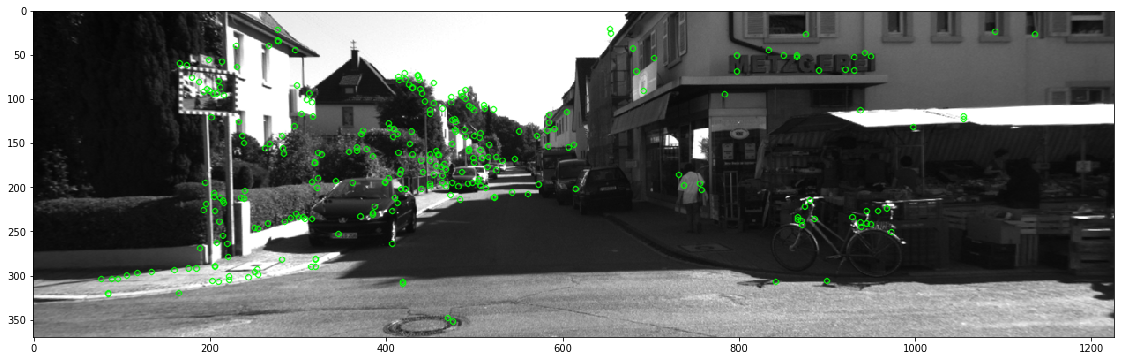

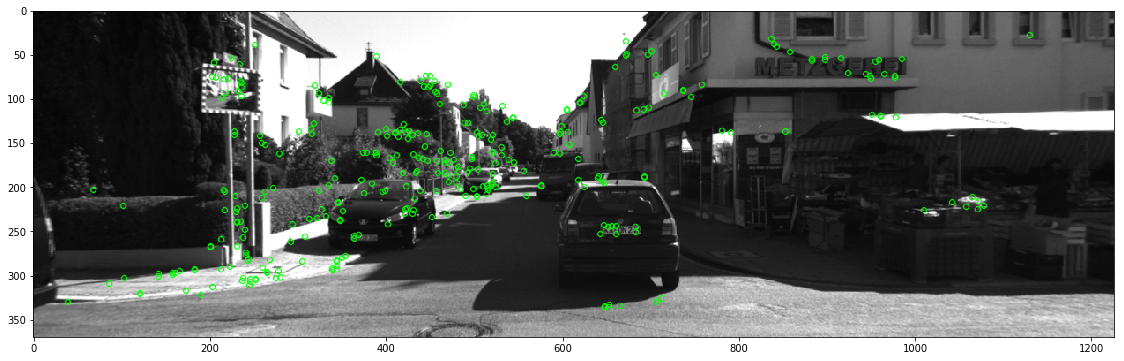

In [13]:
show(draw_frame(frame[1]))
show(draw_frame(frame[106]))

In [ ]:
len(frame[26].get_observations())

In [ ]:
mp27 = [ o.mappoint for o in frame[27].get_observations()
                if len(o.mappoint.observations) == 1 ]
mp26 = [ o.mappoint for o in frame[26].get_observations()
                if len(o.mappoint.observations) == 1 ]


len(mp26)

In [ ]:
keyframe = frame[26]
matches = match_frame(frame[27], keyframe.get_observations())
len(matches)

In [ ]:
count = 0
for obs in frame[27].get_observations():
    #obs.mappoint = None
    if obs.has_mappoint():
        count += 1
count

In [ ]:
## seq 0-30
#print(matches[0][1].frame.get_pose())
#print(matches[0][1].get_affine_coords())
#print(matches[0][1].get_world_coords())
for m in range(len(matches)):
    obs = matches[m][0]
    mappoint = matches[m][1].mappoint
    obs.mappoint = matches[m][1].mappoint
    last_observation = matches[m][1]
   # print(obs.frame.keyframeid, last_observation.frame.keyframeid)
    #print('last affine ', last_observation.get_affine_coords())
    #print('new affine ', obs.get_affine_coords())
    #print('new pose ', obs.frame.get_pose())
    last_affine = last_observation.get_affine_coords()
    #last_affine = np.array([last_affine[0], last_affine[1], last_affine[2], 1.0])
    affine_coords = np.dot( obs.frame.get_pose(), last_affine )  
    #affine_coords = np.dot( obs.frame.get_world_pose(), last_observation.get_world_coords() )
    cam_coords = affine_coords_to_cam( affine_coords )
    print(obs.cx, obs.cy, cam_coords[0], cam_coords[1])

In [ ]:
## seq 20-30
print(matches[0][1].frame.get_pose())
print(matches[0][1].get_affine_coords())
print(matches[0][1].get_world_coords())
for m in range(5):
    obs = matches[m][0]
    mappoint = matches[m][1].mappoint
    obs.mappoint = matches[m][1].mappoint
    last_observation = matches[m][1]
    print(obs.frame.keyframeid, last_observation.frame.keyframeid)
    print('last affine ', last_observation.get_affine_coords())
    print('new affine ', obs.get_affine_coords())
    print('new pose ', obs.frame.get_pose())
    last_affine = last_observation.get_affine_coords()
    #last_affine = np.array([last_affine[0], last_affine[1], last_affine[2], 1.0])
    affine_coords = np.dot( obs.frame.get_pose(), last_affine )  
    #affine_coords = np.dot( obs.frame.get_world_pose(), last_observation.get_world_coords() )
    cam_coords = affine_coords_to_cam( affine_coords )
    print(obs.cx, obs.cy, cam_coords[0], cam_coords[1])

In [ ]:
for m in range(5):
    print([i.get_world_coords() for i in matches[m]])
    show2(draw_observations_xyz([matches[m][1]]), draw_observations_xyz([matches[m][0]]))

In [ ]:
for i in range(637,639):
    obs = frame[i].get_static_observations()
    if i > 630:
        obs = [o for o in obs if frame[i-1] in [p.frame for p in o.mappoint.observations]]
    show(draw_frame_depth(frame[i]))
    #show2(draw_frame_depth(frame[i]), draw_observations_depth(obs))

frame  637
[[  9.99999620e-01   8.13738095e-04  -3.12589761e-04  -1.88964888e-02]
 [ -8.14186062e-04   9.99998638e-01  -1.43563736e-03   2.29923760e-02]
 [  3.11421103e-04   1.43589132e-03   9.99998921e-01  -3.93015621e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
964 24 963.652487865 24.0872676486
954 29 954.532781606 28.1554697858
1106 34 1105.95961079 34.6241212065
1083 44 1082.65931634 43.7823062705
1107 45 1106.84694894 44.8355077775
1067 47 1067.13930308 46.9056756822
1096 51 1095.6699499 49.9310831222
1106 51 1106.03343488 50.9045501027
975 28 947.90030714 58.2417123582
1114 63 1114.10232107 62.1155472051
1110 65 1109.14916126 65.1517488782
1116 78 1116.24825677 78.3924988187
1163 78 1162.71829009 78.401723692
42 89 41.174828217 89.0899402999
1120 90 1120.26298712 89.7126522394
33 98 33.4485342301 98.3547679994
82 100 82.3732592425 100.346316085
1092 103 1092.8843968 102.940402444
1109 114 1109.03868039 114.113179856
1105 118 1104.96431944 118.1811

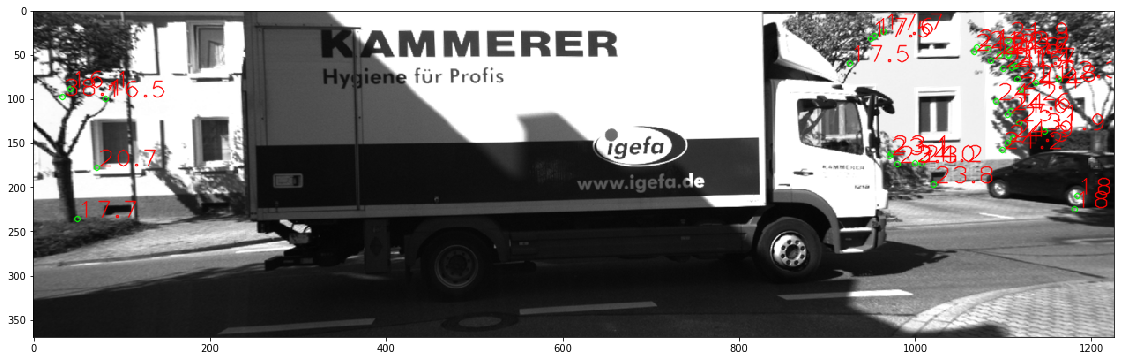

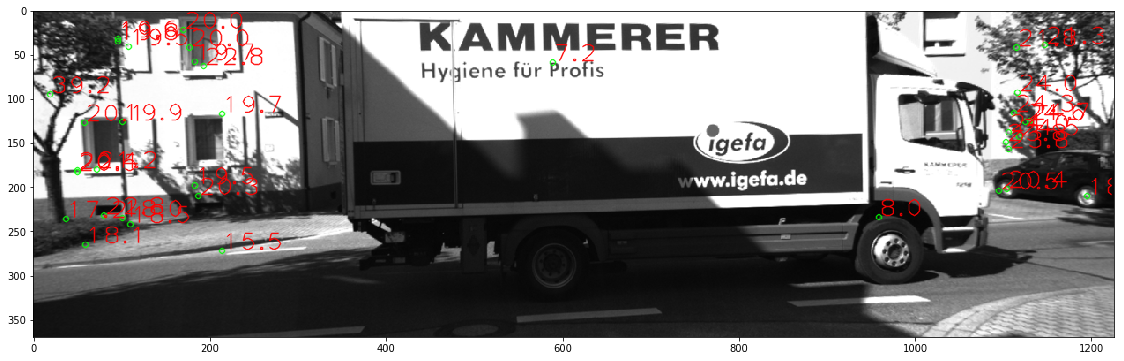

In [9]:
start = 637

for f in range(start, 641):
    frame[f].clean()
    frame[f].compute_depth()
    frame[f].filter_has_depth()

#frame[638].filter_observations(lambda x: x.cx < 300 or x.cx > 1100)
#frame[638].filter_observations(lambda x: x.cx < 300 or x.cx > 1100)



mappointcount = 0
frame[start].set_pose(np.eye(4))
for f in range(start,639):
    print('frame ', f)
    keyframe = frame[f]
    keyframeobservations = keyframe.get_static_observations()
    for obs in keyframeobservations:                
            if not obs.has_mappoint() and obs.get_depth() is not None:
                obs.create_mappoint(mappointcount)
                mappointcount += 1
    # if keyframe._previous_keyframe is not None:
    #     pk = keyframe._previous_keyframe
    #     keyframeobservations = list(keyframeobservations)
    #     keyframeobservations.extend([o for o in pk.get_static_observations() if o.mappoint.last_observation == o])

    matches = match_frame(frame[f+1], keyframeobservations, sequence_confidence = 1.6)
    pose, points_left = get_pose(matches)
    print(pose)
    frame[f+1].set_pose(pose)
    for obs, _ in matches:
        if obs.has_mappoint() and obs.is_static():
            if pose[0, 3] > 0.4:
                obs.check_inv_mappoint()
            else:
                obs.check_mappoint()
    matches = [m for m in matches if m[0].is_static()]
    pose, points_left = get_pose(matches)
    #frame[f+1].set_pose(pose)
    print(pose)
    show(draw_observations_depth([ o for o in frame[f+1].get_observations() if o.is_static()]))

    print(len(frame[f+1].get_observations()))
    print(len([ o for o in frame[f+1].get_observations() if o.is_static()]))


In [19]:
v = frame[639].get_pose() - frame[638].get_pose()
sum(sum(v * v))

2.2363800572142529

3

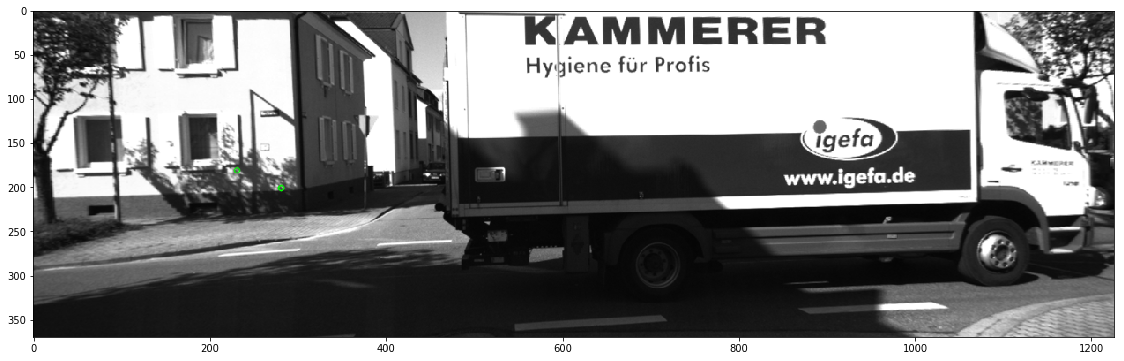

In [7]:
obs = [o for o in frame[640].get_observations() if o.is_static()]
show(draw_observations(obs))
len(obs)